# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

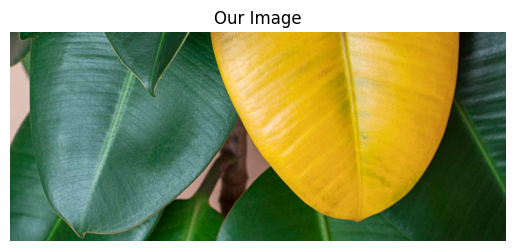

In [1]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

In [3]:
import base64
with open("icecream_cv.jpg", "rb") as img_file1:
    print(base64.b64encode(img_file1.read()).decode())

/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAPAA8ADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6wpVHy4pN/vT6+XP3May7qVelLRQA9etNajd7UtLmZAUUi0tCkwG0UnApaZYUqsqikooFa4xlo+8tFH8FA0RUUv3aSg0TuKtDNQtN4NJiSE/hpFWhWpy/dFFygXdS0i9Ka39w0J3Ad96hVoXpQvSmAtKtJS/w0CY5WpKKX7tJ

(np.float64(-0.5), np.float64(959.5), np.float64(959.5), np.float64(-0.5))

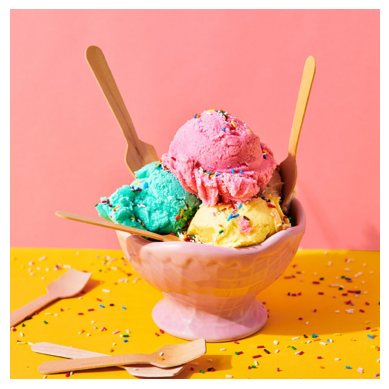

In [4]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_images = """/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAPAA8ADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6wpVHy4pN/vT6+XP3May7qVelLRQA9etNajd7UtLmZAUUi0tCkwG0UnApaZYUqsqikooFa4xlo+8tFH8FA0RUUv3aSg0TuKtDNQtN4NJiSE/hpFWhWpy/dFFygXdS0i9Ka39w0J3Ad96hVoXpQvSmAtKtJS/w0CY5WpKKX7tJkjdv8VNds1I3Wmr0pgn1Gr0pyrilpVG6gdxu33pytRg01qBJ3Gt0pnY7akpn3aTdixlB6UUjdKSdi1uLRTadSBqwi0bfelpNvy0BuwVUpvye9LRQUJ/tU2l/hprdKpO40LTKfRTKI/vVIv3KPu0b/egBv3aX+GmNS0AO/hpm72paTb70ALS7vlpKKSdwHfw0m00L1o3GmAKtJT07Un8VACN1pv8AwKlooAT71LTVIWlX5qSVh2sDdKFpT0pNvvQwsDf7NM/hp7dKSpGhlFFB+7+NU9i7kLLQ3SnbvakrNu5Yz+ClGe1OpPu0h3G7Pain0ymNO45WoXpSfw0is9Atx33mprc5oVaH71LGhu40lKvWkpFIKBxSfxULQMc3Wm/do3e1LQC0ClC0lPVaaVxN2BBmn0n3aj+f2ppWI3HU7/Zpq/LRv96YwfvTd22ov4qkqW2UkKu2nUynp2pp3E9CRelC0tMX71MgG20n8NOpv8NAB/DUeeM0UVLLirCbvaj71G33oHy9aRQbfekpf92koATb96m/991ItG33oGC03d81O2+9G33oELRSLS0AJt96FpaKAGN0py9KWm0AOptFM/joGlcKFX71Cdqdt+WgLnUL0pP4qVelJ/FXQeIJu+an0m0UdvloACcUA5pvz0UAO3Cnbvamr0paBNXCm/w0fw0lAxwGBRwaWm/LQAlBb3oprfdoBbjKVaNu5aF+Wgu4N0pKP4m+lMfvSY0FG3/apw29qazbakYbvl+Shd1EfSn1SdwEVfloXpRu3UtDdgE3ClpPu05aYDlX5aa1O3bVpv8AuUrEB/DQrbV20KtOVd1MBv8AvUKqU5lplJq41qKzUz+GlXpTX70xpWDd96m7m9adtA7VGzbaTLQbvalpi9KkUbqkbVhKRaSlWgdrAP4qd8m356atMb+KqYlq7C/J70bd1N2e1Hz1JQUUUbParKWwUb/em7TQq0DBWpKKKAFVflakpT0am/dpMBaKTd7UD+KknYoPvULS0itVCYtFI1C/LQIcvWkpV60lAC/J7U3d7UfNS0AFFItLQNibvajb/FTVWnbvaoBoWmN0p33qa3Sga3Gs1J/DSN1o+79+gsaP4qZ/DUlMb7tSWLTH705fu02gpDdzetC7t1SbhTaABWp9MVafQJifP702l/hpm40DQfdpKM5oqCkhFoalApdpoC41aN3tTiu2koGncAKf89NHWnfd+9QSwo3+9DfMtJ/DQAtRtUidqZQNDNwp33qbtFOWgYbd1SJ2oX+4KfTRDYUU6mL0qiR9NpG6U2gaVxh4opWO6kqC09Apm7d96nLUf8dAxytS0U3+KgB69KbuFLRQAjN/tU5aSl3e1AC0UiriloAKbTqbQAn3qbT6TaKAGqtO27loVvl+WhWegbbY3btp9I3Smp2oDdHV0m4UA5FG0V0HiADmlpOBTd/vQA+mJ2p9FACL0pp6U7gU2gaH0U1OlOoEFFFFADGX5aNntQ/eigL2G/dpu75qk4IqJ1+ZqSLWoi9KWiik3coYnain0zZ7UgHL0paRelG4U07ALSbRTaKQD6dTaACaaE0FKq0KtLTuJu49dtN3baNppKE7iF3Go26U+k/hpjWg1elLSMdtC9KChq/foaPdTlWhlak1cCPbtpf4aRd38VJRYsT+KnbTTVqSi4DKRulKelMb7uyk9QXcWikUbaG6Uihr96Ka3WjcapO5SVh1NbrSUqjdTGJRRRSYAelFFKBmhO6HewlItDLmhfloSsDQbfejb705fu0lMQUqrQvWnbfloAjXrUlMp9ACfxUjdaSigBFpaX7q/PSUmA7+Gm0UVIBTG6UtM3+9BaQynHpS01utU9SlqNZaNvvTtppv8VRylIZ/DSL91qfRSKGJ2ofvTl6VGzUm7DWrEp6tu61GvzLR92knYppMkpv3aQe9JIzbvlobuK3QkVV/u01utNXd/epaQ7BRRTaB2HUm33oWloAenah+9J/DTN3tQSlcUGn0yigbQvye1JRSbfegLC0Um72o2+9AxV/rU1Mj6U+qSsZt3F/hpn8VOopiCmP3p9MfvQNDKTzKN2WpKg0sI3Smp2p33qWgYi9KWnUmD60CEp1FFADaVVxS0itmgBaRqduNJQJIT5sU1fu0M1LQMT5/eloqGlcpK4+iimruouCViWmUb/eihO4JWOoTtTtwo2im/wAddJ4Ybfmp20U2nL0oAWiimfeagApy9KWmUAOBzTt26mr0paBNXEAApaVulJQCdwopm/3ooKsFNbrSUm72qBiU1V206lXrQWJSY4xTv4qQnuabVgGfdp9JwaOBSAarLQ/ejZ7UbPagASpFqNO1SLVITHL8tObgUyiklch6D8j1qNqczbVpv3qew0rCUU/b8tN2+9CdyriUi/dp233prdKYXuG0U3/Zp9Mb79AwAxTdppKX5/agsbt20bvalpm0VA0PptOpFoBDT1ams3y0+mMtA1uNZflpq0tKq1SVixKVhtpKfTAanRqSiigAoopV+7QAlLtNHyrQrUAC9aF605mqOPfQAtPplKrUAG00lFIP4qAD+KnL1oj/AK0lACNSU6ipbuNOw2l/hprfeptCVyrXA9KKN/vTdxpspaDs8ZpqtRt3UlTdgLuNR7hQq0bRS5ikrC0ypFpu371IpOw1mplP/vVGvWpbuWg/hoWms3zU4fN1pDFooAwKKA3Ck3e1IvQ06gBG60bfejb7077tAbDfu0tFFBN2KzU1adtNJQNOwUU/btWigLke33pafTKAuJ/FTl207Z7UUCbuFOVqWk+7Vkt3FooooEMP3qa39Kf/ABUyT+tBS3I9ooVafSfdqCxqrTtvvRu9qWgAoHvSfdoWgAbrS0n3qWgAph6tR8/vRtFAC0v3VpaYzUADfdpab/DTqAGUqrtpdooXpSsVcWmU+k+T3osFyPa3pTv4KH70UmrAnc6rg0cCm7PanKtdN0eFdBtFOVaAvFLRdCYUjdaWm0wQm4U371FO4FBQtFMp44oAGPOaKTaKbQAUHpRgelFJuw9wqPb70tFSMY3Smq1PqLb81BolcdRu3LT6i/iagFqO3+9H3qap207clANBQnain0CAAnpT1VaF60Ho1Mlu46ihfuUfdppWJ3A9KavWm9aFo0Y1sLRS7jSVICt92mU9/uimVSdxx2EbpTdntTm6U2mUMp38NI33abu9qTLFptKtLUj2GL0p33qNu2loBsZ8nvTX707/AHaNooGNoooptgNXrRuNO3+9NbrVFJ3EoopVG6gYKu2nUyigBfvUKtJS7jQAbd1JRRQAm33p200lPTtQAfwU3caSigBV60lJu9qWkncBNvvRt96WipARulRtJTm6U2mnYuK0I/Mp25vWjaaSh7lCK1DUbfejb71BSVg3e1N+f3padQMTd7Uz+Kl3Cmv3oGlcHbPFRrQzUtQWlYRVxS0i0tA2P2/3qbg06igkZRRQDQPdBT/4KZ1p6dqBCfxUjNTvutRQA1V3LTl+Wj7tH8dADdxo3Gj71JQAUqtTqbt+9QA5O1Gz2o/2afViYyinL92hulAnqC9KWk3Cms1AWCimUVBdhGpq9Kd92j71AxqndS0m3a2aWgApV6ULS0AFFFFABTadTaAE2ijaKdu9qSgApNu6lpF6UAH3aF6UL0paBjH70Uu33NJs9qizKuFFCdqKLMDraTd7U35vSlrqseBYX71LTMtuzS0WQWF/hpKKKErDSsMpf4adSbhTGC9KWkzxmm0AO3Cm0J2p9ADFb1ooX+KkwKTK2G0jU7b81NYbakOolM/jpf4aT5KCw3fNSfxUjLSUFJCNRHSnpSqjUx30JF6U5VqP7rVIvWhOzM2OXrS/xU2kj3y/LF/31TSJempIrUN81UbrWtD06RYr/V7eNm/vNTrXWtE1Dcthq9rMy/3ZKyjiaE5csZq/qidd7P7i0q0bVoZW/wDiaatapFJ3HKtJS7lWhW3ZoYa9Qb7tMqT+Go6NikFRM22nbdtRstJu5S3DduoVad92m7vakX6Dtvy0lJ81NXpQFhzUlIw3U5floDZCUi9KWigYm0VG3WpG6U3Z7UDTBO1NbrTqF/iqyhlItLSfdpPQB240lJ96nL1oTuAbjSUUUwF27aSiigApFajd7UbfepbuP1FopFWlpp3EFFIn3mpaEUgpNvvSUjM9SCTFplG/3ooKSCmUUUm7lLUKKKZuFIaVhaKKKBjf4qXaKb/HS71oHYjpdvy0lHQVBeoUq/dpKev3KAYUzd9aKKASE3e1LRSLQMk+Sm/dpyrQ23bQSNXrTqZS7vloAcq0bPamUUDsL937lN3e1G72o/ioGlYUGnp2pqr81O2e1NK5I7cKNoptFUKw5RtpaZTdxpN2FYN39+j5Pajcab/FSbuUObrUa9Kdu9qP92kUtBKRWpaKAEbpS0U6gBi9KfSbfeloAKKKKAGr0NFLu+XNLQAxdtLS7feloAKZ8nvS03+GgBV6U7d7VGrU+gBNwpaRulCtuoANoptPqN23Um7FI6yiiiuk8MRelLRRQAnAphOKWmVLdxofRRTKQx9H8FFOAxVJ3BifLSJ2p20U37tMlK4UUUUFDd22mn5vvU2RqNwqBpaCfw0n3ac3Sm0FoNntTU6NTv8AZo/3qAuN2mnK23g0bvehdtAxwORTvurTQu2nbttNEMktbf7ZN5SvtVV3M391a8V+KHxUuLi6uPDnhyVre3gby2mX7zV7F4jvv+Ed8A6lq6/LPOjKtfJMzLJI0rbmaVt3+9Xy2fYqVWusHF2ileXm3svTr5kUZXbqdnZfLdhdahcX0KxXVxJN5X8TVHZ3VxasqWsskLbvvRttoaNPM2JRa7PtC/3lrw1TppcsUreg5Tktbno3hf4seIPDrRxau/26xb5W3f6yOvbNN1aw1ixj1HTp/Mt5V/75/wBmvmfy/Mk37PvLtrpvhn4ql8J69HYXUu7Tb75WVv8Alm396vdy3M5UZKhVd4dL9P8AgGaqc2rPfaevWm7drbkfcv8A6FTlPy7q+p+HQ1vfVATmo9opzdKSi1xoZv8AegjNH3aE7VJSI/lo+9TlWmr97/ZoKFpPu05utMoGhFanbfejb705fu0A2N27qbtFOb/Zpp6tQCYtM+9T6KBjH70UUyqTuUtRFb5qGo2+9LQxhSLS0VPUApGp240lWAu00lFJt96AHbTTVp240lABRRRUt3AQfxUtJu27qbu3fcpDFpPcUL8zU7b70XZV7EdMqambPagaZGG/vUbvajb70tSWhjNSfw0/b70LQMSkXpT6ZtFJuwDaKKav3aksSk+9S0UFBSbvalpNvvQAtJt96NvvT/4aAbsNoop6/LQK4yinfw02gEgopFpaB3CkVt1LSfdoAMH1p200lP8AkppXJuCdqd8/vTaF7VQmPpnyLRv96KTdgSD5Kj3e1OYbaSk3cpLqFFJu9qPvUhjdop9FJ/DQAtM2inbfejb70ANXpTlpaRaAFopFpaAbsI1LRSfxUAG33o2+9G72oVvmoDUWiimbkWgBaKZvo30rlcrHbRS0xWp3z+9CdxNWD5PehelLSL0ouOwtMp9RM3y0m7glY67/AIDTW6U7d7UldR4KCmfwU7g0jHatJq5Qh6UUhb3ptIa2F2mhetJT1UUh3HL0paaq7adVJWIbsFMp9MfoaGUt7DKTd7U5vu1H/wABqSlqrgzbmpaZQv3KFqrlD6Z/BT6Yu6gBy9Ka/el/hpV+6KABfuigDFLSx7V3UCbsJTZF3IRTqRfuslNK4Nmb8Zldfhf+6/h+9XyzIu6ON0b5q+tPiBatqnwzvoovvQx7ttfJduyxqySuvzfL/u18TmiazCpLo1Fr5aHNhX+6ce0n+I5li/4E9CxvuWLZ8ytu3U7bt+RNv+y1WLXyvM2O+5l/irhempo1cuQs0kbf7NRzW6su7ftb+Fv9qi1Z2b7/APFVyRUj+Vk+992n2Zls7HuXw18Tf8JN4dja4Zftlp+6nWuq2mvB/hLrn9k+MGsm3LDqC7W/3q96k719rluJ+tYZSl8S0f6fgaxfQj2+9DUKtDN8tegWRv3oX7lD96NntSZohu405O1NY7qX+GpGL8m6mstJRQA2nUiru3U7btWgbaBVo2mnKvy01t6/x0CGstJStSUFLYKY9G/3pu3dVJWLSsIelJt96Wik2VcVetJSbvahaLpBYWk2/NS0m75qOa4WFpP4abuFG4UJ2G0xy9KFWkpVp3FYZ/FSuc0+oqSdio6j6XbtpidGp/3qBMjp24UtM2+1DQ0G56buNOo25qdShlLtNOplKzARaPvU7aaa1OxVxKY33KcerVFUMtD6KZRSKsFFJt96Wga1ADNGMUoOKdQK4ynfw02igNwp9R/xVInagTVhlFO/ho/hoC4irTqZS7jQAlFFA5oKYu001mxTmbbTfvU27iQfNS0i9KWkMTc1G72pabQJCN92helCndTtu2gYtMWRN3361fDfh648QTM7N5drC37xv73+7Xd/2HoKWv2f+yI2j+6zfxVw4nMqGEly1NX5dDysXmlLC1PZ2cn1t0PMf9pPmWnbTWl4g0NtEvF8r5rWf5o6zV6100a0K8FOm7o7aFeGJpqpT2Y7Z7U2RqCc0ytTdLqIo20bt1H3lo2igYK1O3e1N2ij7tAD6bSbhTloC4tNp1M+7QAtMen0jdKTKQ2hO1FCstStFYY5elLSL0papEDf4qSn0ypLH0x+9CtSbRQB1lN+Wl+RaWupO54Qi9KG6UtFFwGfwU1WWpGWo9vzVI0Opy9KMcYoXpVJWEObpSUrMjVHRcUdQ3+9NYsO1KfufhSL1pN3KXcYW60m4U4jFR0i47C/w0idqVR8uKXgUDE/ip1MTtT6ACikXpS0AFKvy0N1pKBbhSr8tJSqu5aq4Mv6WsVxDcaTdfNHdRstfK3jbwvP4Y8VX2lyRfLuaWJm/u19OJN9nkWX+7XF/HrwmmveH4fFGnRf6RbfeZf7tfOZ7hU+XFLdaPzX/AObWlV12l+Z8/xt91nRVVvlanLGqtv+6y1G37yHyvl/dN97/ap0ccsi/e+avn90aFpZk87ft3Vcj3SN5Uv3V+as+3kiVmdP+WVaUdxt/e7PlaoRm1bUIZJbO4jv4PlktmVlavozw/q1vrmj2+pQPu81V8z/AHq+dZE+7s/i+9XoXwX154bq88OXTttk/eQV7WSYl0q/sZbT/NDjoes/w02ikbrX1lzdakb96E7U1t1JUmiWgv8AFso2mhetOoGN27aN26l/ipF60AEfVqNppyr81ObpQTcj+7S/w0/b96o2am1YadyPd8tN/gpzfdptCVzSOuoyn/wUU1utNuxQ3dmjd7UKu756SokUFKvSj+GkpDFJz2pKdTNvy0AN+9RRt20UFDgc07d7U1V+WnbfemlqToxaiqTb70bfemKLsNjWnfdo2+9LTS0B6hTG6UHq1J/DTsCVhKKKKGrlrUP4KKN22m7jS20AazU09KG6UN0qG7lob8lCdqKb8q1BYN1pKKT5qCloLSLSgUUBfWwUsbUlJ/DQDVxaTzKP4aPloCwtPplKrPTTsJiUUv8AwE0bTQlcQ6iimk5o2ASk/hpeMUUihB/FSUq9aWgBi7qdt96FpT0p2AT5abuFC9KWkC0ETq1DRtJtii+9J8q0L0rX8I2a3Wuw/LuWD5qzrVVQpyqv7KbM61X2NN1Oyud5o+nxaVpsNhB/d3SN/tVbuF2rsSiRvl81flXdRK33G/vV8FVm6vNKW71PgOaU588tWznfF9n5ugNKf9ZA25W/2a4aJlZNw/ir0nxNH5nh3UET+GOvK9JbdZK7V7mQVnrRPoshm3CpDomn95aam7RT6Rq+lPoFsNPVqF6UtFAxv8VPWkooAX/gNN5/uU+mN96gA3Cm05ulG4Urj2FpG6U3f70N9yk3cdgTtQEzQq0+hK4N2EAApv3qkVaP4qQXI6fTf4qSgG7Aq7fvUOMUb/eh6B9TrT0ptOPSo/4q6keCh60lKtM/iqRWuP8A4abt+ahulAOaqwx235aQ7dvFNJBpfk96TYkhP4aSh+9JkUikKcf3aZS7vmpu6gpLoDVHs9qcTihTupN2KWgbhQM/xUbRS01qrjEAxS0UUAFFL/DQ3WgSdxKKKKBhRTf4aVfuigBas2McWpWtzo10v7uddtVVXdRHI0Miyr95WqKtNVoOEldPQyqx9pHlPm/xp4Vn8K+ILjS2+6rfK396sH5I2ZH+7/FX0R8a/Cqa5ocfiW1g3TWy/vFWvnmaP5WWVP8Adr4WtQeHqOlLp+XT/L5GdCfOlfcjaRFZX2fL/dWtK13t8kX3W/8AHazYW3L8ifc/hq5ZzbVZfmrJsuexpQ/LCy/eqbQ9SuND1iz1RPvRSLu/3apx/wCs+dttOuPm3fwrTU5QkpR33XqZRWp9MQ3EVxDHcxfNHKu5aazVwvwj8TJqWjto08u64sfu/wC0td1tFfe4fERxVJVY7Nfj1N4jf71BGaKE7VoaDfu0771D96FWgq41Vp3ybaKKAauCdqPvUbPaigkN39+o2+an/wANM/ioKSsN/wBmm/PT6Y/eqRokMpNvvTtppf4aGUM3e1H8NG33o2/LWZYlFJtFLQAzf70K3rRRQVZBu3UJ2oooSuA5fu0771CrQvSrSuQC0tFJt96GrEgtLRTNwpD3D/apnPtU1FNMalYioooZqGy07jWam7vajd8uaavSoKSsPqJ+9KWGKY3WpbuWtA3GmtT/AOGm0ikhFo+ahaB/FQMb8/vT6QfN1paACmK1PptALUKKb/DTqAFWnbTTQuGqRdtNK4mN+f2p1O+T3paaVibkTNTKlZflplJlRCm0v8NA+brSGLRTF6U+gBFpaVRup2z2qkrITdhlIvShqFqQWwfdrrPh7Zs32q//AIfu1x7fdavSvB9q1l4fh3vt81tzV5mcTSwkovrZfqeXnNb2eFcV9ppGpJH+7Zd3y/3aa7LIVX+7Qypu+Vqi8xd23b+8r4qpJJ+7sfKRWlzM8aXi2PhXUp/uqsdeWeGZvtGkQz/wsN1db8ctQ/sv4Z6hdbvmnZYFrjfB6lfCunv/ABNAterw9Nyxs1bRRufRZFC1Ocu7S+42N3tQ1JSL/v19me8LSL0oX71J/FQA6nUxf9qn0AJt96a3Sn0w/K1AAy01Van0UrDTsM2e1O2imr81OXpUjYn8NKvSjd8tNVqrYkfTH70+mOMc1I0rsbub1py/cphFFBpYKfUe72o3e1ArHXL0paVaZ/FXWeAncdRS7TRtNAXGfxU1vvfhU1RH71SgTuwo3c7aKKRYyin0n8VADabTjTODRuUg+T3ptCdqKkYP3p9IvSlAJ6VS2ATaKWl2+9JQJO4UUqrQy4oC4xW3UnH9+jdto+9QMcvSlpAMUtACEgU1fm3U+mqu2gDS0vyLq3n0m6+aOddtfNnjTwzL4f8AEF9pEqNt3bo2/wBlq+g42aORZV+8rVy3xw8Mpqnh+Hxba/LNZ/6/b/drwc7w14rER6aP0f8AkcUl7Kr5S/M+e9vl3Tbk2svy07a8M26L+L+9Vi6h8xftStt/9mqutx/BLu+X+Kvm5Rs7HSveVzQt2imjbzfvVN/yxaL7yr/FVGzmbcysm1WX5Wq1Gqt8u75abXMrmW0jQ8H6xL4d8VWt/wDdjlbypf8Adr6KWSORVlib92y7lr5naHb8/wDdr3L4e68uueHIdzfvrb901e9kOIspUH11X6/oXHc6TaKF6UL92k/ir6PzNU7iUfwUUJ2oGFCdqF+/T6Bsi+7Tl+5Rt201etAwbrTKk/hpm33oKQ3aKNop235qPurQO5G/em/dWlbpTaspaCNR/DR/DTdwrOW5a1G5420J2ofvQnakWFPplOX/AG6aYmO2/LTdv9ynZ3cULTJWgtFJt96FWqbsDFPSm0E/LSfeoY0G4U2jZ7UyouUh6/LRu+Wm7jSUXCwu40lFFJu5UdhtFOptS730GMooZaKRY37tJSt1pKAW4n3ab96lp1BQi0tJu9qSgB1FNooAKRelPpFXFAC09O1CrRt2007EvUKN3zUUUMBrNSU+mstIExlJ8/vS0UFCL0paX+Gmr0oAcrZpaj/ipdwoAWmb/en0w/dagaEVPMZIl/5aMtes2sf2e1tYn/5ZrXmOh2/2rWLWL73zbq9SaRPm3fe+7Xzuf1LOnSXmz5zPZXlCn6v7wZsbtv3qbEyou5l3NQrMzfdqTy93yotfMXlJ3ieA3bRnif7T+reXoWj+HIvvXs6yMq1Y0q3+x6VZ2X/PKBa5/wCJ1xF4o+MVnp2zzLfTFrqj8zfL92vb4Vpc7rYru+Vei3/E+vyul7LDQv11+8aPvNS0m0UtfXHpDKcq0L0p33aBt3G7Xp9FM/3aBD6bRRQAUynL92j5PegadgX7tN+cU+k2ikwTG03aads9qKkoKKKbuNABu3U1qWkPzdKBoP4aSl2+9N2igo7GlWkA7CnV1NXPnWJu9qbuFOVaWknYSYzcKbTm6U3A9KRorIKKa3WhetAxKKd/DTaG7AR/xUq9KWipWrsWFFIvSpNpqkrCbsNWnjpSD/Z6UD71BI5+hplLuNJQC0VgpGpzNTKBpBTH70fdprNuoLSuOVqcDmo1X5qloBhRRRQIT5Per1jHb6pa3WiX6rJDcrt2tVHaKI2aGRZUf5lqKlONWDpyV0zGrT9pBxPA/FXh+Xwvr11o10v7lWbyG/2a5GSH942z5dn3d1fRXxi8Nxa9oMfiO1TdcWfzNt/iWvB7iP7VG2xNrJXxFSjKjOVKW8fxXT/Ixozur/f6mWrMsiq7/wC1WszRRx+aku5ay5I9u2X+7VixuIvmi2t5f8Vc8XqbTV43RpbvMj3JXUfC3Xk0XxF/Z0u5be++Xd/DurkYY2X5PvLTpJJY5llifa0XzL/vVrQrywtaNWPQmDPpn+KmHHasvwzrC654fs9S/ilj2t/vVof7VfeQkpxU47M1jrqFH+zR89G/3pmlgVfloVv4TR/BQv3KBjm6U2jf70L81Athu371JTv4abQUFMb7tPpn3qBob96msNtOfvTKq5dxG6VH96nN0ptZt3NY7C/w0idqkVflpKBXCimfx1ItCVweg3aKWl2+9G33qlorCuN3baNwpaZRcaRIzfLUdG/3plCdxpWH7t1N2/NTV+WpFapGKo+XFMb71P8A4ajoEgpP4qcq01loKTFptFJ92k3YobTKfTW61JohKRqWlbrQHUj2ihelLSL0oGPpPvULSUAFIvSlooAX5aWkWloAfR96mU+gmw37rUlPplA0FJu9qWk/hoGLTG/3KWk3CgBaRelJ/DTqAE+9S0m0UbRQAbRTX707cKbv96VrlI3fBNv5msSXBT/Ur96u9jjb7y/NurlPANt/o9xdsv3m2116Mi/LXx2c1FUxbXRWR8fm9RzxUkumhHcLs2qv3qJLoWsLXj/6uBdzLRM277v3q5X4la3/AGD4D1a8Rv3jR+Qv/Aq8KrUdPml0SPPjTdRqHd2PFfBcza54417xA/8Aq1dlXd/vV3idWrkfhhpMul+G/tU/+uvm8zc1dfX2nDeH+r5ZSi1Zu789Wfd048kVFdBPn96Wk+f3pa9ssKX+Gjb70bfegBaKbTqAGMtCrRu/hpw+XrQA3aKWiigAopFalqAGU5fuilplBS1Ciim7jQMG+7SUn3qFoKSsLSbfelopMZ2K/LSUm40tdbPnGhGpKTeDS1JSVhlGR60HpRTK3G7TTSMVJUbUh9RKTbuoXpTv4qTLEopNy+tH3qS3AWlVqSiquJq4v+5Ru9qSk2ilcLC0u75aSimDVxW6UlFFAJWGUKtH+7Rv96TGPopm/wB6cvSmAN0oXpTd/vTl6UALScfdpu/3oVt3zUAaWl+VcQy6XdfNHIu35q+d/Gmg/wDCM+JLjS2RvJ3boP8Aar3qOZo5PNR/mWud+MHhv+3NBh8QWUW64s/vbf7teDnOH0VePTR+n/AOKouSp5S/M8Buod37p0aNv7q1nw/ubpdzbV/iWtq4ZpNtx/301ZerW6su6JG/2q8GcLPmRtTl0ZreY3ysvyrUkmyaNkRP4az9LuvOh2yt92rm7du2fKtZzVzO3LLU9K+DetNJa3Gg3DfNE3mR16Qy1896Hq0ug6ta6lE+3ym2t/tLX0FDcJdW8d1E37uVVZa+qyfEqtQ9m94/l0OmLCj+On0z7zV6xQbPajdtp24U2gd7gnanfdFNooBjf92kpV60lAxtJ8nvTtvvR8tBS2I2WjZ7U5ulRUFIRv7tNAApy/NS1JqJ/DSUv8NJQAU6m0UXsIXd7U371NfvRu+Wi7HYKP4KbuNCtQ3codTKfTdxoAF60lKvWnbPagA3fw0ynnpTd3y0AhydqjH8VO3fLTf4aGrAJTGbCU+mMu6pZotxgNFJ92helI0BelM/ip/3aSgBF+9S0Uq0AG35aSnr1pKBIbTqbRQMKdTFWn0AAFPpgzT07UCYfwUyn0ygEJ/DQvShaGoGH+7TP4qkpjdKAG0v8NJs9qfQMKKTaKWgQymt91nqWmrD5zpEv/LRlWgfNbVno/hW1S00G33fek+atj5I1Zh96q0EHkQpaqv+rjValkk2rtr8/wARV56k592z4CrJ1qkpd3cj3bmbdXjf7SGqP/Zuk+HEbb9rnVmX/gVeyW6/Nt+9Xzv8Rrv/AISb4yW+nf6yGxZfl/u15GJj7WMKS3nJL8T0Mrp+0xUf7up1tnbra2dvbp92OBVqVelDfe/8doVa/V4x9mlBdLfhofWrYfSLSUm4UDHLRu9qN3tQ1ADfvU+mL92g9WoAfRTab/DQA6nVH/DSr0pXGkLRRTNntUjsFFFFAwprdads9qZQNBSLR92haChaTd7UtJu9qLIDsT0ptFK3Sug+e2EpjtxSFfak+9QUl1F/hpFXbR/s0lAx9RtTtxpvy0N2AbtFLS7f4qSpKuJtFO2+9JTqAY2iik3CgYbRTvu03cKb96gLD6KZtbbTo/vCgA2in0U2gW4ynfLtoTq1NoGCrT6T7wptVcApf4aVelN3fNQA4jNNTtTm6U2PvQAVpaTJFdW9xpM/+rkXbVCkjka3kWVPvLUVaSrQcJdTKtT9pBxPn/xRocug69qGhzqyqrNJF/u1itC1xD5X92vbvjV4Tl1jT7fxhpy/vrNf3/8Au14nJJEy/aN+3dXxfs3Sk6E+mny6P7jCE+ZKS3Mm3Z7G8ZW+6zVseXt2yq+5dtUdWs5ZIfN+X5am0W+863ZJUXdFWfLbRlzkmuZFySPcq7tvzV7B8LPEH9reH2sJX/0ix+X/AIDXj8at9oZHfdXQeA9ebRfFFujt5cdy3lSV05biFhcQr7PRlxldHuH8dG/3pzL81G0V9ltoap3G/eWhV+WnbhS0DGJ2ofvRRQUMopdpp2z2oGRtSU6mbvmoGhr96ZUu5Gpr96Cou4w9KKKKk1G0Uu33o2+9ACUUu33o2+9AEdFITikZt1BSD5PakpFpam5SVgopFpyrRHcG7Dk7UP3oVvlplUT1uPprdaNxpKBpCfw0bfekpNwobLSuNoTtTW3UlQVYQfxUfdoWloKGbhS0m0UL0pJ3G1YfRTN26lpiFWlpB/FS0CbAiilbrTf4qBrYWiin0CuNAzTqcvSm0CGUUrdab/DQUtgWjb70tJ/wKgBKb/FUlNoAKRWo3Cmp2oGO3Cm0fepyrQPYb/s1oeH7f7VrFvHs3KrbqpV0fgGDzNWmn/hjjrmxU/ZUJz8jkx1X2WHnPyO2k+Xc61XjaLDf3qsbd0f/AAKoW27tyfxV+f1E1ZnxMOxHNcfZ7e4ut21YI2avmvwAv9seMte8RyuzN5rKrV7d8UNZfSPAOtXUXyu0flq1eT/CvT/sfhKO6Zf3123ms1a5RSWJzSmukE5f5fifQZLSsp1H6HXL93dQvSlXoaVVxX6Ie+LRRRQA2ik2iloAKKTcKG6UmUhaKZTl6Uk7AwbpS0UykC1CincGhVoC9hqrRTl6UbRQFxtMp9MIoKi7jaRWp233o2+9C1Vy7i0Um33paBHWn5d1N3+9KxwKb/FXQfPpXQrtxTKKKCloFKrU1qPu0rgG72o2+9N2/wAdO/hpDEpFO6nLTvu0A3catLRRQIZtFN2e1O2ijcKCyNvvU5O1FC/LQO4+kXpS0itQIWiikbpQA3f70UbPaigBy/do2ihfuilp2AKKb/DSUbKw0rgnaikPSm0XGP3+9FNPWnJ2oTu7CZfsGiureXSbr5o51ZdrfxV85eLPDcvhnXrrRpU+Xd5sG7+Ja+go5vs8iyp/DXL/ABi8NprWjw+JrNf31mvzf7S14WdYfSOIXTf0/wCBucUl7Opf+b8zxNVWRdjfwrt21ixr9h1BklTarVrSfvNrKm3dVXULfzoVuF2s0VeS1pcqGmhajk/vfw1JJ/DP825fmVqp6fMtxGzS/eq9DM8jNF/dX5a56kEndAnqe5eB9eXxB4dt7pm/fRrtl/3q368k+FesJp+tNpDS/u75dy/71etbXX5Xr7DAV/rGHU5PVaP1N4voLTKfTE7V2FhRQ/en0DuMprLQ3+/Ru+XZQNISmN0p9NoKW9xm3bTW+7TqZUlx2Cm0UUm7GgUUykHSlcdh28Um/wB6Q9KT7y0h2QfeoVaSl3GgNeglJu/hprdKAMUFpD6Vfl+9QvWl/hpolifKtDNTd3tTNxocrD5bj1alpitupw/ipDGP92o6e/emUFoM8ZoopGoKG7hTlpKVaAG7RSfw1JTaAEVflp233oWpKBMF+5RTfu05O1AhlFLuNC/7lAJ2Ep+/3plFA2PfvTV60K1JQIVvuikpW61HuFA1sG4UtIvSn0DG0yn0m0UDTsNoooTtQUOXpS0UUECL9012Pgi38mxmuF+9I22uMb7rV6J4Ztfsmjw7/vN81eTnlXkwnLF/E0eVnE+XD2XVmo0ny/I/zVHuZt3y/dp0Z+ZmqGNm87yv7zV8NUldq58yo9jxf9pTXJ49P0nwvay/vL6dWkX/AGa0NLt1sdLs7NF2rFAq1xvxICeLPjlDpaN+70pV/wDHa77an8Fe7wnRblWxLW9or8/8j63Laap4aHnr94tJ/u0tItfZHcLRTaROrUAG4UtFKPm60AJSfep9M+7SauA3btp9J96nbfeiwDdoo2inLS1ILRWCm0u72pKAE2ijcKG6U2gaVxu40lFFBogoopN3tUjFpfvU1+lC0AdVuNC9aPk9qSuhOx4I/d70yilXrTuAlFFItIBaTH+3S0jNQAbvalpFX5aP4qAFpGbbS0n8NADfvLQvSn02gpMY/eiij7u6gvYKdtFNTtQrUCsL/DTqZQnagLBTl6U2nKtAhaKT/dpadwEbpTaQ9N1LSbuUtgplP2e1R/d3UDFp6dqj3e1Oj+6KFo7ikrDmVa0NNjiu7ebS7r5o512/NWfRHI0beajfMrVNSmq8HCWzMatP2keU8B8WaLLoPiC80jayqrbot38S1j2/8W9F2t/DXunxb8Jxa9o6+ILBf9Oto/4f4q8Fk83y2b/lov8Adr47klRboz3X9L8Dnpy5lcoyTNpt9IkX+rl+8v8AdrWVtqxyp8zVTurVLi383+L+Km6TM7Rtbu+1l/vUSjdWLlqbVrdS2txHf2u5ZIJd1fQGlX0Wqabb6jE+5ZY6+eV2suzf96vUvhJrnnWdx4fuPlmtv3kf+7XpZPV9lVdGWz/MuMjv6KKK+jNhG6Uf8BpaKAIvvUfLtp273pu75aCkN3fLSUjL81N2e1Ddi0Gz2ofvRTXqG7FpDWqOgdKH70m7miWonb8KUDFJ2/Cm0hj6ZTv4qbQAjNSUrUtBZHvWlVqbR/HQVYkVqbu+9Ue5Vo8z60rhysSkWlpV61JY5W28Ghmpu76U3d7VVxWDd8tNVqd97dSVIxVpaYrbaN25t1F2OzFpv8VP/h+akppiHU2ilWqAUCn0ylVqBNBu3UfJ7UlFAmrD6KXKU3IoELRs9qN/vTKB2F+7RuNJSbvagdgb5qaq0tOoGtAptOptABRSL0paAGU5Vpu/3py9KCmLSL/tUtFBIsMbSTxwf3pNteoRx+TDHAv/ACzWvPfD9v8AatahT+781ehSSbZK+Z4hrRi6dN+b/wAj57OZOU4U10V/vI13KrNUIkW1tZb+X/lmrN81WJFZl+X7rVyvxQ1X+xfAurXW/wC9Ayrtr4/ES9lBzfRP7zyqac2oLqzxH4bs/iDx14k8VT/N+/aNWavSuv8As1xvwh0trHwet5Kv7y+kaeuzr7zh7DPD5dTT3er+f/APsqcVBWXTQRaWmfP70bhXtaGgtKPl603d8tC9KSdwFpNwobpTdntSbKsOXpTvvVHTlbatK7E1YWl/4FTdwpm4UXYJNjv4qdTKNntQOwL81S1Fv96KAsObpTf4KKZQCVhfk9qG+7SUUmVYTeKPlpKE6UJXVy2hdvvQtLSp0akI6eiiiug8EKVetG00KtADiu0Uyn7vemVV7gtBPvUN1oWj+KpAWikZqSgaVxVb5aN3tQtN+7QANuptO3fLTD0oKWou7b8lG/3opp6NQVYF+9TqavWnL8zZoAKKPu7qFagL3BWpytTVWnKu2gTFp1MbpTaCWrhTW605V/jNFBSI93y0tK3+5Rt/v0FDdvvQN3enbWFN2+9A1sLT1ZaT+GmY/wBuhOwrXNLT5Iri3m02Vd0ci7a+e/HHh+Xw/wCIriw2bbeVty17rCzQyear/Mtcx8ZPDf8Abmhw63ar++tfmbb/AHa8HOKKhbEr0Zw1I8lS/R/meGxt5cmz/vqs3UI3tbpbjd+7Zv4a1Ljypo12K26o7i1+0WskUrLuX7tebEtDo7pFWOVPmX+Gt7Q9afR9StdbjT7rKsv+7XH6XNtkk02Xd8vzLurorXbJG1u/8VL3oSU4h8DPoqOWK6jjuovmWRdytTl6VyHwx1x9Q0FtOuv9dYtt/wCA12FfX0asa0FOPU2jsFN/hp1MrQoKb8rU7+CmUDQklR04ruprfLSZotg3+9J/DSfP7Uv8NIpKw2o2qQ9Kib/aqWaLcTIpD0akpdxpF2F/hpm72paKTdhpWCo3+7S7hTCcUXKQh6NTfM+Wmu2KjbrUmsY31ZJuFNOD/HTKTd7UdbFqNiZelG4VE0iQqvmyKrSfdVm+Zqa00UbKv/LSRtqr/eo32ISvsifci/M//fVI1vebVlbT5/Lb7rbfvV3vhPwBdafqdvqPiW3jazZf+Pf/AGv9qvTdPh0vWryK1byUt7T/AJY7a9Ojls5w5puz7Hy+YcS0sHO1GPOkrtp6eituzxbT/h/4v1T5YrFVb73zVdi+FGvSMzXGqWtvt+9/s17xqei3kkckujXcdvMy/Kzfdrg4b+DT9QkstWuraa+/5bLG33q8CWRcQVeVLFU4yvLm/d6W+za93fbm20vY8OhxRjMcm6HKrdLXf46HjHiKGz8P6k2mvqK3GxfmkX5dtQaXImsTNFpLG98j/XfZ/m8mvRviB8PPAHxA8O3Gna3FeWMbfMs1p8kkjVm/B/wVpP7Png3WNN8NeH7rVLi5jlu1uJpd0t0/8K/NX0eC4dq4fK19cxPtMSrp2haL3s9/Tp+ZuuKMcpeyWFuor4nNLmflG3Q8uvfHGg6drbaXPceTbt8v75trK1dDHteNZldZI2+ZZF+61eI/Fr4B/HTxT8Np/js8Fm2s3LefdaDb/es7b/4pa0/2TPBHxl+JN/put/apNP8Ah5aqy3M123zXDL95Yv4vl/2q8HCZZmmXQoYfGtVZVIttxd+R31jK6Xrp3CfiRkrrU8MqdWNRtxacdLJfG9b2b0Wl/JHrirup9bnxE0nwv4P1K3srHXI/Ln+VVkkXcrVgN8v8S7W+61ddSm6crM+zwmKhjKMa9K/LLa6sO3e1N3Cm/wDoVH3qjmZ1JXJN3tS1F91qkWncCT7tFNVv4aNxoTuQNahaWimNbBTNwp3y03avpQMfTNwp233paAEWjP3vaj+GkoARulLRSHq1QVcbv96KNntTtoqkDdhy0lIvSn0yTc8FW4fULi6x8sS7a68Mjfd/irB8EwbdNluP+ejVtN8n3fvV8RnlRyxck9lY+VzCftMTLy0+4k+evH/2ktWuIdDs/D1q21r5l3f99V7BH8smxn3V4H8UpJfFnxP0/RIm/wBHsWVm218ziouso0Y7ykkvvDLYc+JV9lqdJotimmaHY2H/ADyhVWq3SyfM2xNu1aSv1uEFSiqcdopL7j6ldwprMMU6kZabKT1G7/eik/ipf4KkoVW3U6mfdp33qBN2Fpn3qfUTdaBjqKP4KKABO1FFFAAnajZ7UbfloCZ6mgA2e1Mqaom3UmEXca/Sms3+1Q26helC2saLYNwpw+brTdv9+nL8tIGH3aaelPpm0UAjq6Xb8tKOlP8Ak966bHz7dhmOMU2nu3FMpPQaFXrQejU1acvWgBq/LTm60lFACNS0UUAFFNp1A2rEf8NKq0tIrfLSbsUH3aa/egjNNXdUlJDV+Wpl6VFTh0pp2Bj2+Zqaq7abuNN3e1FxWJKKarJTk7VQNWH0m0UtJu+WgQ2ijf703caTdikrBuWjcaSk+alcY7dupKKTd7U1KwDlanfdqNf71OVqYDvk/wC+6uaf5V1DNp1x8yyqy1ToVmhbzVf7tRVp+2g4PqY1afPFxPB/Fmgy+HfEF5Z+VtXduirBberN/Dtr3L4teF/7c0mPXrP/AFkC7pP9yvE/L+0Rsq18hGDpN057o54yukYupQ+TcR3sS7dv3q1LWRGZbhH+WmyWqXVvJFv+as/SZpY/Mt5V/wBV8tXJXRta6ud94N1r+x/EEN07/ubn93JXtrbG+ZPmVvu186Qqm3Yrfdr2jwDrX9teH4/NbdNbfu2r1sprWbot+aFB3Ojpj96cABTX717ZutQb7u2ofu089KiZqTLjsOTq1Npf4aSpbsWhP4aP4abRSbuUlcY/3qYelOamL1pFrYSiikZqC47DdwpNxpGam7jSZaQ5+9R7vakMidqY0lSXGLBzk1Hu9qWmNJ5a5b5V/i/2aDRDv4aqX18un2VxeqguJIl3JD/erY0XQdZ16ZYdLtW2t/y2b7tdRr3wT0TVfD82hS6jcLqlz/qr6H/li3+7/dr1cpyyOOxEI4luFJv3pJapdbLr+h87xFnU8swlR4KMamISfJBuyb/vNbL8eh84eB7fXvGXj648W6lq0l5Dpn737PD/AKi1/urtrqPD/wAS4pPiDNo0HhyTV7yeRWj8v/li1ekfC/8AZej+GGia1Y2vjK4vrjWpPNuZZF+7/u1uad4K8KfBvSrd/C2mrqusavN5c19J/rI1aufNMgq4ji2WPwzisDRgqdHfmd9ZymnvJyvq+nL2PH4VzatLA1KmdS9vjK1vdjeNOCtpGOyhCC6LWVm2222dwq3upWNvcaldNDIv3o1rYjaOOFm+98tUo7WWS1hVJ1Zdyszf+y1A11PeNeWUtq9r5f8Ay0X+7X1tjw5L2t4x0S/DX7yzZ6rew7LW6vZrVpV2xqrfw/3q4e0+GmjeF/E194r/ALRv7y4um3eZNJ8v/fNdlN80MPy+Yqr8zN/rFrNuE860kuNSult4oZP3e5vmap9nC/NbU68JVqYdyVGXKp6SS66+lyeS6lvLdWiZfmb5o9tV9UttTvIYZYrhYbeH7y7f/HazoLzUVMlzLZNCzN8u75dy/wB6tmG8ivo9lr83mL81aI0lTdBqUUrL52/QrfElvFmlfDfU4vAgsINb1C28m2S7+W3+b+Jq+OPipoHx4/Yu8C2PxP8AAfjW68ReDdQXb4o0eSTzIbOeX70sH91d1fVviBrDVNE/4R3XLm6ZtPk8yd1/hWuJ+LtvYaL8IdYtNR1a31DwLrmmzwTyyNuWGVvu7q8zM6dKVKTqxurNOzadn6ar1OZ5VUkoTp1LVXPrBNSW6V2ru6+y3r62PmD4R/E74c/FzWYdR8R+I7qSHd59zDNLukh3f7VfSnh7wPqlvp0mr+DdUj17wzK25fOb9+v+ytfAv7JHwZe+8RXm+/W3j1Dc1tJN91ot1fbvw/bxz4Htm8MaDLFqELXPzW7NtXyv4mjavByjAxoRlSlN1Kbd4uTvJaLS/VXufpeIni6uFhKfLTrWXNB/Ba71XaVuzsjeD2s25oIZ7efdt8mdfmpG/uvu3L/DW34ouPFHgfQrzxL4ls9PvrOCRfsk+75vm/h/4DXEXnjmyutQW82K1nPErNJH/C1bYzBxpP3N+xhgZzxceemrwWl07q66d+pvJ2qWizt/t1l/aNhItzD/AHl/hpi/L93c3+1XC4yitVubKabsug75qFbNO+T2o2mpTsVcbt96Wl/hFNbrTTuFxaTb70bvalpgJt+XFH8NLRQBH/DS7RT6bQAv3VakpPurS0rAFFJz/cp38NMAXpTZPljahelKkbTXEMC/8tJFWle2om7as9D0W3+x6Laxbdrbd1TW/wAzM7/eqS6/d+Xa/wAKqtRr8qttZq/OsfV9riZyfc+K5nO831GzTJZ29xdS/dijZmr538Ds+teOta8Qztu27ttezfE7Wk0HwXqV03ytJH5atXk/wr0mXT9Em1Gdf3l829f92s8poPE5vSVtIJyf6fie1lFP3ZzfXQ7Jfu0L92lor9Keh7g6on707cKbUt3KsJ/DSL1p1CdqQwpy9KbTl6UCYtMp9MoGG35aE7U7cKNwoE3YWikXpRuFAR2Bvu1GDxTqNntQNaBvphbcaKYzUN2KUR9Jt96F6UfeqRi0Ui0bv4aAFpNu2lp38NAjqaD0oofoa6UeF1GUn3lo/hoj+5SbuALS07+GmLQAtNp1MXpSbsUgXpT6Tb70bfemJu4lL/DTW6U7+GpuNjW6U2pNvvUbfcoYJjVXbQ33aSlb7rUjQSlX7tNWloATa1O2mkooAXaaF+X5KSnfxGmnYQ9Vpr96lqJ+9NuxK1Yyiiik3csKKXaab81IAalpP4aN3tQFg2+9LSbvaj71NOw9eotO/iptLH/WmmIvaesVxbyaXdKrRyLXz34w8Py+G/El1Zpu8tm3Rf7te8RyNGyy1zfxW8PxappP9sxRbpov4q8HOKPs2sRFadTjkuSfN3/M8Pm+Vt6P8zVn3n+hzLdfwt96tjy027G+9VG8tfOt2g/i/hrz1vYuOjLli0UkKyxOzbv4a9C+FOqRW+qXFhLLt+0r8q/7VeU6Hdfu2gl+WSJq3NNvmsbqG8il+aJtytW1Go6FWNTsCVpNH0VJ/HUez2qHT75NQ023v4vmWeJWqbd8tfU3vZmkdiNvlprdKczbqSg2jfqM/gpu006ioLjsMpm371PPSigtEVMp9NZaC1qJUbdae1RsQtS3cuKsRtTWajd81NfvSNkhlI3y05mpkMVxeXAtbO3M87fdVaW7SRV1FXewjNgbV3MzN8q/3q9N8AeGF0fTbqfxdYxyNqH+piZdzbab4E+Hrabt1nxDErXn3o4P4V/3q76VkmbftVm/2v4a+gy7LnTarVt+i7ep8XnmdRrXwmH1j1kvLon+pT09bKyg/wBCtFhhX5VjWp2k2Msr/wCs/wBmnLDFHHuX5VrE8X3l7Y2VvPpFv9ouPMXdB/Ey/wB6vbXZHzNOH1iqoxer6v8AVmtqlzNDZRJYNH50six7ZP7v96vMpNF8ZePrjxNoMGg/8I3eaQu601b+G4b+8telX1rLeWrbVVWaP/vmsjSI721sVh8QeIG+zwN9zd+8kX+7W9KtKjH3Dowk1QpSnC3PdW3bWt9EtHppZ9yn4JtNZ0bQLV9d1P7drEcXl3m37rSf7NaGhTaok00V/K3kXDbo938Lf3asR6j4XmgaW31OC3W1/wCWTNtZf9qhYZVWO4guFuFvP7v8K1knYqpVdWU3UjZy7q3np0Vv+AU7a+1G8e4+1RQR3UEm35P9XJVWPRpb7VJJdZkXzrhfltWb5f8AgNWdQhns7G8tdISOOb+Ld/FTLHSbiaG1vbzzHvIl27t3+rpG8JRhFzg1FPRd9vXRN/8ADmD4uvL9vs6raSySWf7uNVb5pFrBiuNc0nUobj7YtrZqy7o1/wCWlXvFuo3WhpHqKzq6bvLjf+Hd/drF36jqWm3F7cSr9ok+Vfm+Vv8AdqXufSYGh+4jdLkenzfqepbdNuLVbq3ZW86Py52b5vlavM9c8AfC3UtNk+Fnil2/4R3WZ/Me3hufvS/7X92trwnq1z9hXTrW1+6u2f8Aux/7Vc/N4Z8KeGdUvNYv42vtSn+9cTN+7Vm+7tWlOKnGzV/U4MPgFTnUw9WUvJR3b6Py5d1vpbQ8o0v9kTxF8IfFTP4X8V2t14Xlb/RI7xv30O7+HdXY/C/QNW1z44zLrNvcaTo+jWnkW0bNuW+k/wBlq8q8fePPiR4f15rO/lm1LT4G82P5ty7f7tdF4g+L/ja5+GU3jTwZpyw3+mqvm6fMu1l/6brXzeYycKNSGDbpz3T3V/0vtfpufaVsuzSOEjTqVYydSPJz2ty3tZvztpdr7j0L49+Add8U6rB4fstZa0unDSpb3Uu22k2/3f8AaryPwDpPiabWNU8G+I/DklveRWjNZSfwyba9l8IeLtG/a2/Z/N9a3Kw+LNIj3M0bbZIZ1/8Aiq828eeMPEY8N+F7/RlkuPFGlP8AZNSt4/8AWbV/vV83w9nTxyeHx0n7aCvfS8o3tqv5ov3ZNaOya0ab4slxWK9k8sqJKcG4STuuVrVTut4y/DQ5Pwv408R+HbW60mCK4hjaXdPD/F/tV6/oHjTRNS8KrdSLHaeR96OZtsn+9Xn2mwz+PNSvNb0G4j02azi/02O6XbuZfvLUngvT7XS9ctdW8b6RJqWj3NysbRxt/qf9r/dr6P2ctlqnt5eZ7eMp0cRGUpR9+NpNLdu23Z3Wx6ZDIk0ayxN8rfNUtdd8RLPQ9Hht7bTrNbf5Va2kX/lpHXKL8y1y4jCyw0uSep4eDxSxlFV4ppPa4yjGaft7YpVXbWCOm5HRT6KY7jCKKRqN3tSbsNbDdopy0LS1N2AxulC/doZd1N+7TTaAfRRSK1K7AG6VpeG4ftGuWqf3W3NWfu9q6LwNGjX1xPt+6u2s68uSlKXkcuOn7PDzkux1Fy3mXEkn3ahbev8AwKnN8zbf4qkjVmZV/u1+aVbzm/U+TT5Io8p/aE1BI/D9jpG7/j5l+7TdBs/sOh2dn/cirH+IkieKPifDozszW9iqttrpuF3Ki/d+Wva4RoynVr4uW11BfI+ny+n7OhHz1EpP96nbvamt0r7Zs71oDbabT6ZSKQUUUUDChO1OXpTdntQA+mbPahVp20UALSbV9KNwo3CgBu3bRRRQAyiil2mlcq4bTTfLpaXctILtDdvvQq7aN3tRu9qGrDFpdppKKBCbfeloooGdXTKfTK6DwQopN3tS0AJu9qWmbhRtFQVYfSqtNWlqkrEhSbv4VpaT/dobsMSkVvlptPqShd33qj3+9PqLcaASHU35Pahfmp23dQU3YZSqtG00M1AxrUtJ92loAKKfTKAFUse1G403dt+Wj/boAd92mt0o/wBunbd1ADf+BU7caavy0NQAfepabTqBsKRW3U3d8tOWgLBt96kX7lC/co2e1X0JbHbfl2VYhhiv7ebS5/uyr8tV1+7To5PJkWVW+Zaxr0Y4im6U9mYVY88bI8D8WaL/AGHrE1q3y/N8tYckm1fN+8q/er1z42aPFcQ2utwJ/DtlrxtpGVWd3+X+7XykIyp3pS3jp/wfmRS95JmPqEn9n6h9q/hl+7Wxb3SNGsS/xVk6pDLNbsuxty/MtGg3iSW7b/8AWRVvFXibs94+FGtPeaTJpcr/ADWzfL/u13VeH/DnWv7L8RR722x3PytXuDfx17+Cn7Sik90EehH/ALNC/LR/FSV0s1WwjNTaKKRcdhu00v8ADS1G7cGgpK4xulM3GnVE7ZqWaRXQRmqORqdULfepG0UkN3+9NaVv4Up2/wB6hmZEjZv/AEGo5+5qlqPs7W61C6jsLCJpLidvlWvXPB/hW38IxxvKq3F9df6yT+7VPwD4Kh0W3j8Q3Vx5l9dLuVf+ea11/nRru3fNI1fS5ZgVQSq1F7728v8Agnw2d5w8VN4ag/cWj83/AJIftuG3ea33W/76qKGa43MzRf8AAahuL6SGRYkTd/E1Wmm/5eN21dtexHY+d5XFarcat0rM0U/3v7tZWqfvr+H+zT/pUf8Ay1b+Ff7tXZJEZm/vN/FVZo2n3Kjqjbv9Z/s0zalFQlzf8Ma7XCRrCrJ+8l/h/vVxFt4dv9e+JWoXUskjaNa2nl2zf3Za1dUuJ76FrayWTNqy/vP4mrhPH3jK/wDBsI1m41aTT/sa+ZbRxRM3mf71KWicux6OV4KvOUqWGa9pNOK7q7W3n+SbN2w07Q7zxCYorOKe9079zJHu+aT/AIDXa3lj9qX91IsEPl7WjX/lnXgP7Lmq6THbeI/iN4o1i8n1K8uZJo5J1Zcr/wA8l3V1GgeIPiB8SdU8RWllpdz4dsWXzI55f7v96soVueMZNWuenm2TV6WNqUnUtCgoqUpaK7tdJN62b0svkd1dSXGpaQ0Gmy/vFk8tm/iZf71R6RNcaf8AaPNv2ktY49rRyfxNV7SdPtfDtnDYQTNIsaq32iT70zfxVR16zsrnR9Qgv28q3uY2VmVtrfNWx49OcKjdGPwN6O2u/wCZw1jp+l+MvDesanaozf2fNJJbWzN8qyLWH8OdSvdQ0LVry8svtT2LbruNfuwr/erpPA/hd/A/gm60vTpJLy4n3SLI3/LSszwzfPNoGpfD62s1tdRvmaS5nX+KP+61ZqLlaT3Pr/axcMRTovnpqcbN6NRXxPvb8WyHw/rUtlq1xps/2m20nUV3QX38My/3a8s+L3xTaG6bwNpOlXF7LPMttp827940n+1/s17bdfChvFPwdsfDV54sexurN2ksLyH/AJZ/3Vavlzx54Z8bfD34y+E7vUbWa6062lVpdYjXdA0n+1/dr6bKMPldTC4meNneSpy5Y3t73Rq29tNNfQ+HzjNM4r8R5bh8iT5fbtVna8HCCunJvVc1rO22x7Tq37PXi+Dw3b6ndeI49RvIrZbmSPb80Lf3a+Kvin8QdZ8Ga/qFvYeLbjULrUVaK7hVdsEK/wB1a/RuXxxcafoc1zeQyyXDfKyxr96PbXxz8SPh38OfFXjjTfEt1dWraHBMy32nwr+8k3fxf8Br4LM8NCMIpP5n6nkWPzKrGrLEx5mtuVLXvF9LdnvoeKeCPjn4q+G+tQ+KPBc8ditzCsdzbwt+7k/2m/2q+yvhzo9vq3g2++L/AIl8xry5i89m3bd3+7Xn/ib4b/sp+F/h5dabb6XfTSX277JeRtumhbd/d/urXp3wa0Xw1a/CldL03xyvjS18rb5P3Wt1/utH96vGwGSYWnmLxbjF1XGza3t5+R6WdY94ujHFxoSpOTjFycfiS3Sa2/7et5XG+E9L1LXtPuPil4c8nVtNuW8pbW3Vd0i/7VbWh+JG8TWuoXlrpa28Nn+5k3L/ABf3dtLJoE+i+Ho9R+GUE2j6Xbyf6Vbw/db+9WxofgvSfEWmP/whuu/ZbqVfMureVfvN/FX0cacotJfPzv1R4dXEUuSVWu/dvZOzvBLpO2m2z+8yY/Fs/ia2j0zxHa30lnAu5ZI1/eW6/wDxNVNLvp9FmhtbqX7Zo+oNtsdQ/u/7LV3vhhpPhnPNZ3gt9UutW/ds0i7WjX+7838NM8WReCluLjwk1xb2yzw/afL/AIY2/wBmvm+Lc2jkGVTzGrTlUcHG6juk2ld+S6/JHIsbBVvY0qTdJ6prVNfaklumm/nr6mOy7WZPShvlWuM8JeOLee6k8Ma27RzQNts7ll+W4Wuxb72x/vVhSrQr041YPSSTV9HqrrR9TvqUp0JclRW/X+vwG/x0ynqy01qtgnYSiiipKE+9S0UUAIvy03dualpF6UALTKX+Kl8v6UFXFrt/Atr5elyTt/y0auHk+VWevStBh+zaDbp/Ey7q4cwny0bd2eLnU+XDqPdjVm/0hmpslwsbSS/3V3U35d29aw/G2qf2P4V1S/3bWWBlWvzarVcE5N92eNGmpNL5HjPhGSXWvHuteId+6PzGXdXoNcp8MtPa18M/ap12zXjea1dXX3PDOFeFyunfed5P5/8AAPr4xUVyrpYbSK1LTN/vXvFEifdam7RRu+WhelA0htFFMoKHp2ooTtRQA5elLTFanbhQAbRS0m4U2gAprdadTKTAKKKKRQUjUtJ/DQMaelLScGlqbj2HU2l3CkqnIEFOpm4UbhUA0ddTKVutJXU3Y8BajG6UtOoqRp2E2+9LSfw0KtOO4hy/do3fLQvWmtTbsA3duanLTV6U7b70m7lMbtFCdWpP4aT7tILBTdxqRTuo2igpMbR/BRt20jDcMUCE3Gm7vanN8tN/hoLFpVWhfu01aAHf7tJRSbvagA2+9LS7gy03b70ALS7vlpKKAEH8VJTqZtbdmlcpKwtL/DSUv8NMGCrmnYamq1G7/boJZInan1AtSL/tVSd9CWrC/wANLtX0paKZLVynrWmrrmgXelyp823dHXzRdQvHcTWs6bWgZlZa+oo5fJkWX722vF/jF4XfQdc/ty1i3WeoL97+FWr5/M6Psa6rraWj9ehEfdly9zz2Rkkt/tET/MvytWKtwlnqXyfdb5qmuL5dPvNrL+7nqnqUKqqyxP8AMrbv+A1jGPcqPw2OstbryWjni+Zom81a+iPDOqJrGh2d+v3ni+avmXSbpJLdXT71exfBvXPtENxokr/NF8y12YCp7OrydH+Y4o9I+X5ttJSt8rbVpK9hmqGUU+mfx0i7hUTr/FUjdKiZqTdiojMc5qKT7xqRmqNzuWk3c2iR7jUbfep56VFI1TI2Q1mVetavg/w/P4i1+FNrfZbVvMkk2/LWIzbVZq9r8Caeml+FbeI7fMuP3jNXZl2GWIrJS2WrPLzvHywGFvD4paLy7v7jduFiVdyfLt+7VVZN3zUTXiySLu+7/s1FM8UJ81ZVZpG2qn8S19ej89pxcUosZeTLa3C3TfdVdtWFuBKqy/8APRflVqg1mGW1vFsIk8xWVWZmpnmLNMtvvVaZrGKqQjJf0h0jOsnyLu3f3v4aFkikuPK+8zLtqRvvK23btpqw7ZWlQr/vUDVra9ivHClq3mpKzNF/49VCNLIX7alqdvDL9oXy2jnh3Kq1d3O25tzRr/DuqG6kt5LeZpZ938K/71BvBSvr10djlvFFppFiv9oJpu2xgk3NFbx/6v8A4DUmmeIIvFNjNs1KextbPa3zfKr/AOzXQaLM0tv/AMTK38uSRfLkjZd1c/4k8KX93ZRw2GpR27Ws/nLFt2rJ/s0Xa2PVo1qU7UK7tKL0luvus/v8zo47oX3k3G793Evyx/3qo3Gm6vrFrqU+rfZIbe2+6v8AerE8Jahfat4y1SyvJVhh0+Nd0kf3d392uuudJ1nUlm+yukEMq/N5n3dtSpJq5y1orA1VC6Wid30vrZedjm4vEOkLHb6BZ3nmTsvyzRx/KrVT0b4cz6l4ykSV5rdFXzL25VvvL/drpNDi8H6PZtawQRxtG275l3bmrkfiX8ZbXwx4Z1bRfDVlNea7eQN5Pkru8v8A2mqKlSMY3ud2FeLxNZ4bLISvPRyl5v4n0SW9nc7p49Gt9Julnlj0nR9Kj/10jfLGq189a38avBuuXU2iaIja5pvmeWvy/LI396vFfFPxu+JPxe8H2Pwvs5/JXd5d3JCreZeN/tf3a6z4G+B9Z0dofC/jrwveaHcWM+6K4aP5bhf96vKnjKmJmqdBadz7nBcIQ4fo1cRmtROpd8sFJbL7f8zbeum1z1fUviC/gyOzXWdLumsZlXcyx7vLX/a/2a8W+NFqviTXrPWfgz4Pk1S6niZrvbH5a/71fWPifxNHpultZfYLS8haLy/njVty143rHxJ1bTb2GXTdJgtYY227bePbuX+78tdGLjzR9nN+6/LU4sjq4ivL2+HoKMtft+7JPXWO9z4o8Zab8V/D+tWt54j0a80+6jbzIPLiby9tdFb+NJdDtV8VW/2rw74kj2ss1uu22vF/ustfZmveNv7csVguvB0N5GybvMmX5of9muLuNL+HOpatb6Nq3hyOTz13Rw7f3e6vGxOWU5TUqU2n3/r9D7jAcQ1o0HDGYfvommmvTt6nR/C34zaN4u8Kw6XrP/EtuLu2Vm2t8sm7+KvU/Dl5B4T0mO4sVtpJG+WONo13bf726vKPDPhHwRohW40WKORfMZ5oW+byf9la62bVGvoZJYGhtVj+WPc38Ne5hpSjTSqtNo+BzTBYWvUccNGUacneSe1/TcpeLPEX2XVv+Ej8R6jHNIvyxqq/d/2afrPjjTNS0T59Gs5J9vyyNH8yrXmOoXEs15cTateLMsDboo/7zVzfiDxxrOn31rFYaWs1nL/r2b+GvHxWJTUo2TT7nswyalL2a3cdui8lZHRax4onhuFSKwsWX7yr/Etd54T8cabqkMNvrMSrJFtVWWvDdWvoo9UhRIlkW8+aeT/nnTl8SW/h+1uL/S/M1JrZvmt4fmavCnUV7NJpdz0K+Ap4mmoW16P/AIJ9KXU1rcTf6LtX/dqu3yttrynwD4+utQWG91GJoVuW2tC33of96vWtu5d1aUqrq3vujwa+Flg5KEtSOmHpU7R1Dt+9WzViIu+olJ92nbG9P0pv3qRV7jW6UR/0p9NoGFOpFoVaBDoY/OuI4v7zV6bH+5t0iT+GPbXAeHrf7Rq0P8Sr81d80m2Nq8POK1nGC7M+dzmfNOFPt+pmq21m/wDHq8z+O2qeT4bt9Lif5r6dfl/2a9IkVtqqrbt33q8V+LUn/CQeP9L0GKX93Bt3Kv8ADX5vilOpBU47yaX3hgaanXj5anUabH9n0u1t1XbsgWrCtupzRpGvlJ91flo/hr9ip0/Y040v5Ul9yPok7ht96Nvy0tFUBFt20b/enN0pn8VBUdhaKP4KKBhQnajbuoTtQA+mU+igSdxjfLTU6NTn701etDv0GC9aSn7PamUku40O/hptFFIYu75aSl+9SVLAY3SnLS0m72pDEopNwo3CgoNoptO3Cm0Add96m7vajd7UldLdzwIrQTcKNwpaTa9IoctG33pv3adu+Wglhu9qSimP3pt3GlYfRSL0paQxM7d1NVqKQdKASHqtPptIvSgTVxaYzfLTvu7qbQUtRv3qbt20/wDhptBQq9ab92helC0DFPSm0u33pu0UrjSsOWjd7UKvy0LTJ8xKKdTaCk7hSK1LRUdQClX5qbtFC/KtWDHbfejb70LS0EsVetOpP4qWmnYTVwo3fLRRVCsRs1UfGmixeKPBN9YMu6aBfMjb/drQbrU+l4Fx9nb5lmXbtrkxlD6zQlT6209ehnWWnMump8iatYvcWqtt/fQNWa3zbYp/ut/FXoHjjRV0DxRqWjfw+Z5q/wDAq4m+t0jVvk+VW3LXz+Hqc8E2Det0VdFuHtZmgf8Ahauw0TVrzR75dR0uVo7hf/Hq89kmeO6juovut96uusZt0Ky/5at5J35kNOzR7h4R+KWl65CsGst9jvPutu+61dtGySR+bE6yRt/EtfLfnbbhn2tteuo8M+NtZ0WRYorxpIf+ecldtHHyjaNVXXc0TT1R74rU3duridJ+J2nXUzRajA1uyr97+9XVWerabf8Az2d1HJu/hrup4ilUdoyV+3UtK+paeoX71I38VR7vvVo3c1i9Rrdahp8nQUykbxVkRtUbfcqRqhkbav8An5qmTsaLQt6Lod7rGoWsENuZLdpF8yT+HbXtM08FrGtrbp5cMC7f92qGhiCx0O2WCw+zKy7mh/i3VUuL5Fm3y/M393+9X1eX4SOEhvdytc+FzHFzzSta1oxuku/n6mhZzRXE3z7lWla5iW4kFpArybtqs38K1SvIlk0Xz7C98u427pFb+Gn6TdM2n2ryxbbj/lp/tV6GzOCVJOPtF3tb9fQuxyPDD+/uPMb+81Qx/vJlaVl+aq/nK0jQL825ty/7NCrvVni3Nt+WncIwtv1NCOZI/vS7m/2qjtVla4aXzt0f/POm29rFND5ssvzR/wANTfZ0Zd1u7K23/vmmZPljeJXjuvOt7pF2tIrfNt/hrOulSGzk2IZGlXaqr/C1EOmrcSeTpcrWyxSbppG/5aNV24uoLWVo51+ZfvMtB0q0JWh11sMt42gZIL3/AF3l7pJF/iqlqUcN1G32q9+zwq275fvUX2qRQ3FnFskkaf5flqbUNLSSGaK4i8yNvmakzSCcJxnPS/8An0Mq1aLS7NU06Pc0sm6TzPvSf7VV/HXizxfFof2Dw95Mlw38TL95f7tTzSQW6xyu/nR7du2P5mWsyTxDpIlhutkrLas375V3Kv8As1nUs42Z6VCkp1o1pU+ezvrrd9EzyW5+IniiHUItEXTvI1S5VmXd/q1/2qz/AAF4m8cx3OuHS9GS61SGJp/MuI93nf7rV6Dbrpfxa8TLq+jWq29vp6tDd7l2srVr6XDb+EdB1C10n/iYXUbNJ5ir8y/7NeTTw3vqSk7dD7PEZlhqOHeHWGSqyUeaL6Nvq77Wtpf5nnf7PXgzx9pOpeJPGSeHNLjuNWH2r7C8e3y2/iaJv4a908ReIPtngtYJopFvtvzLJ8zRt/vVW+Ht55Nm1/rLLbw3a7oY/wCJWrH8cTJb7nSfy9zfN/drtg44enq/vPmMwxDzjOHOtBJxata/2Va17u9rf5nFafNe6sZDcyyM0f8AC33a1tOtbXQxcXbaXBfNdwNGrOu5Y2/vVi/BXxrpPjjVPEXh+1t1j1DSpmXa3/LaP/nov+zXXaxapp+nx2COrTLJ/e/irCliIOlztnsY6pKlipYKceXa620avfToecLcXVrI1rfqzN/C1U/FV7oPhPwzeeLdeuFWGBf3Cs3zSN/dWtbWluIlkeX5WX7zV5f4w8L6d44hjn1y6uJI7Ft0Ee792v8AtVwVsZFaJ+h9HSj7e0k+VaXt28vU1vAuuWbXn2CK623Gq/6Sqq37tV/2mrpLrWNO0/WLWzluoVt5W8r5W+VWrxmTUvD+k6fqWtxabeN4fiiWBlhbbI06/wB2t7R5LDVPAen3/wDZN0rLP5sSzf6z/Z3NXNSxT5OXsdNXDRlL2mtnp89fxQ7xRqzWOuXkNrF5zST+U0yt8qrVXxUsGi6lb3EV59stZYP+WjfdasnxQr29rq1vo0UkkzLujj/i3V574TsdZ1SzuF8Q3VwuoTt5aru3KtcNSUpJ37nTGCsrvb8TqPDq3t99sa/vfmnlZraGT+Gr3hHTW0/ULjVIovLml/1kMf3aNe8Pz6fatpd1FJb3UqqzM3ysq1vabZ/2f4d+0WsvmXTRfMu2uOb5B+0926ejOg0vyo4/tHlLHJu3Sf7Ve5WbLcWNrNGytujWvDdL3yW9qu7d56q25l/8dp/h74rMdb1LRrVJI5tHlWCaGT+L/arTAU51XOS1SV35a2/M8nH0lXnTpKSU5N2XfS7X3K57hTG6Vzeg/ECw1xvKnbybv/nnXRRzJL92uto8meHq4eXLUVmFN2/NTqZUAgpNvvS0v3fmoGN+7Ru9qWlwaaA3vBsateXEv91a6iaT/R2/vVzvhOPba3Ev95q17iTbCzbv9mvkc6qv20/JfofM4395iW/QgjuEXdJu+78zNXh9n5WtfFK81FP3iwLu3f3Wr1LxRqC6X4Z1K883btj2r/vV5X8KLeU2eoapcfM1zL96vlcppfXc1oU3tH3n8j0svpWcqnyO83feo+8tNX7tO3e1fq++p6iVhabSj+KkoAKZs9qfSbhQNOw2ihmpq9aCh27bTQdzVJtFCrtoFzDd/vRT6ZQMKP4KKKADf70ylXrTqlu4Ddpp2z2oplAXuFFFFJq5YUUUm33qQEpm/wB6fRQUMoo2e1FAHXbTRtNH3acnaug+fG7TSUrdaa3y0ANbpR/s0tIvSgsWkbpTtvvTdooAF6Un8NOpPvbqAG0v8NLtFJ/DQAq/+PUN0py0fK1ArkdR7vmqbb8vyVHtNBSA9GpKKKTdilqJ92mqd1PpNvvSbuUC0bvalptIGrkn8NNpi9KfTTsFgpm7bT6ifvQ2Fh33t1LTN22jf70gH0i/do/3actWJsdt+WhVoZqSgQ4dKbTh0pn8VAIf/DTN3tS0UAIrfeq1pMfmahHVatHQV+aa6b7sa7qmpLkg5djDES5abZ4D8bLiJvH038W1VWuJvrXzoWX+GtLxpqDap40vrpm3K0rbar/K25Hr5LBvnpqp31+9irL2bjFdEjznVpItF+S4bbDO37tv7rV0Gh3HmQr+9+aqvjzw3FrmkyW8T+W33ov9lq5nwPq1xDG1hePuuIPlavUSTVyFK56NG3mbt71NbyIvz/xLVOGTd5cqfxVYkba27ZtrGSLjJnRKqzQ+ajbWWr1q0v2dpbedre4X7rK1Z+it+5WCrUkctvdbP4Wrz8QlLRm1NuLueheBfGE+tQ/2dqm1b6L+L+9XWN1rxuGZtL1CHUrP5WVl3V69Y3SXtnHdL/y1WvYynGSxFN06jvKP4o7Hb4kObpTafJ0FR8+1esaR2EbrWv4J0+y1DXl+3xeZHbru21kM3zbWrqfhrbyyXl9dLEvlrHt8xq6sFD2mIjF9zjzGo6eEnJOzt+Z2N1dXTeZLE6tu+X/dWsmOS3mut1x91aqa1rEVjqEf2iN1jk/u1p6fDFdWrX6J8u75VavrYvmPlY0vYUlOSsnsyaxhhZbjUrr7qt8q1akmSPUIb19vlyrt+X+GnRxxXkf2X7u35trVUuGlWxk0/wCz/vd3mRtVHI37Sevp6LyGXFstvcSbP4m3K392rmnt5Myr/F8u5qrxzKyL5q/vF/vVatP3ciu/zfwtTjoh1b8tpf8ADlz7Ptkml2bf9pf4qrzWP2qTz5WZWg+6qt/rFqbbP5beQ/y7vlqHzJ2HlMqx/Nt8zd96mckebdPUrWnnxtcfaLSOG1jj3Rtuqro9zYarp832WN/s9qzbnm/iao9ehmu47fTkm27pN0kit8qrU3inUrLStNhtbuWO1Vtsdtt+VWkqZO252wh7TljH4pdr6JdbdW/wKGr+NtB02xhurlWhjaf7Mska/wAVZV1fTnxb5DtPFayQL8rfddf9mtSy8JXF3DbwapFFMsH7+RWX5W/2qbLeJqjTapDLbPHbN5O7cu2P/drJ6Pc7qTw9FuNJX3Td9Ff4baFmTT4rPRdQv1eOFoI/uyfxLXMbYrXRY7N/La1vP3jSLWLrkmo6l42W6i1tm0ONVVo4/mjmruLrw/ZCzj1K6ZVt1/1cLfKqrWSnKd7aI7ORYFQdWd3O0tFs7aL1T1/A4uz+z6dpU3gfQoZbW4vt1zHJH95v95qbY2t/4G8OrdXX/E41BrlfMZPuxr/tVuSNBJNDrH2qG3RW2xr91mWsXxDrTSXi6DYW8i6fqHy3M0a7maolyxV/uPRpVJ4iXs+X3ZPmnfq1vrvtsk9XoaWqX1rZrcXr38U9rtaTcrfe/wBmuD8daXqPxD8PrP4cvJo7eWL5reRtqq3+9XZ+JND8Pab4fj0hrJW2rtVWb7y1xDXeiWXgrWvB97qNydYuF3WMMbbWhWubELnXLO1rHfla5VHEYe7mpJK6uuW9m7Ltu3pY8D8a6F40+F+kQ33gS1mbVL7/AEafULd2821b+6v96u/0X4c+Lda8M2eo+KPG+sLqiwK067v71er/ANh6Ze+EoZbqd7GGCNZmkZd37z+9Vp9VgXT7e1s2aSORfMaeZdrMtckMBTXvS2toezVz6rVtyRXtLtOVley21s/uR4xpvgX4hxyXzy+MmXS4F+WSb71c7ceB9XuLGZ/GWvXX2e5l8tY7dv4f71enatH4l1xmsre1WPw/O22eRW/ef7zf3a43ULi10m6XwvZS3F9M3zLeTN8qr/d3V5tanTp7I9OjjK9Zu7Xokrr1fRnm9nN/xcRfAbQM2j6fGsttt+aORl/ib/arvte1q4Xy7OJo/u/Kq/KqrXL+JtcsPCdm1/pMELakrbYF2/6xv96o/tksmkx6vefNdTxbp1X7sbVxyq8qsjpkueza2RDp+qTyak1vqU7Rsvyy/wC0taU0Nho91b6T4Ug2/bJFlaST5vmrmdUuvtW1kZfl27m/vVuWv2q10241dG2yWMXnxVyTqyewSinZv/gHYeKNUtfE1xYrdRK19BB5crf3ttZ+n30DQw29qq/JKytWH4V1SDXIbfWWdvtF5EzN/s1qeG9LextVt0/eL9p3NJ/F81c95S0b2Mo0o04cnRHQTR3W61ngXau797/srXjvxI16DwT8YJFlfaviGyTymVf4t33q9m0/Worq8vtEeJo5LbbtZv8AloteU/tLeF7rUNN0Pxfp0CyXGnyfZp2X73zV35ZjPqjmmk+eDjrtr1+TRxVsJ9YxGHqSly+ymp7bqzTXo02j0rwb4i0uz0vfKsbSL964avTvAniBNesZhF83kN97+9Xy23w/8a6b4ZtftWpfaLO5Xc01v83kt/datrwX4m8UeGb6Pw+955bbVZZN33lp4fGUcZD2uHmpR1WnkejisvpY6nKVKXvX0vqfV52dOabgVzvgbxJ/b0MkE7L58H3vm+9XTt9/O2umLUldHyVWDoVHTluiIqPSm1K3SmYFAkxtPpMCm0wbudL4dkZdNZf9qrl5P+5ZV+b+81Z+jzRR6bTfMZoZG37v9mvhM6qfvqnzPDqQUq8m+5w/xY1BovBclvu2/aZdtR+BbFdP8LWcX8TJuasP4yXi3E2l6Skv33+Zf+BV2Onw/ZdPtrVPupEtcfBdL2uMrVpa8sUl8/8AgXPXoR5afqydaWk27aWv0Y3EH8VLSNQvy0ALUXyU5ulN2e1BSG7TQq06nL0oGC9KT+GnUi9KBXE/hpE7UfwUUDF+Wkc54oplALcd/FS0n8VLUgN+7Qo3U6j+9QnYBlFKSTUe4UpO5aVw3baAQaWmVJSQUUUygCXcKbRRQB1zdaGb5abuWlroPnxi9Kc3ShdlDUDvdiUq01fvVInRqAbGstJUtMoBOwzbuo2ilpGagoT+GlUbabQnagbQ+mb/AHp24U2gErhRTKXd8tK40rAvWhv6UbjSUm7jCim0Uih1NoooARelPpi9KNwoAWk2ilooATaKWk3CnKPvUACtS0irtprdKsVrj6Yv3qWigLC7mo/hpaRaBAtDUfdpv3qB+Yn8NX5rhdN8N6het95IW+b/AIDVH/Zqr8Urx9J+Ht1s+WSRdtcGZ1HSws5R3t/wDnr+9KFPu0fNO77ZJcXrvuZmZlqS3kXy2R3+ai1jRbNVT5f4qrybLeT5/m3149GHs6aj5GdaXPJsNQt0aNk+8zV5fqVn/YfiRbiL/l5+9XqW7zo23PXK+JNBi1SSOLzdrK25WrrhKzM02XtFuvOtV3v92tqNvM3J97dXH6fM2m3H2WX7rfxV3GjxpNNG/wDDWc0kafCbWlq6wr8u5v7tbE1v50O+JPmp1np//LVPlrYhs5Vh3Nt+evNrXbsawmtzFtVS4s/Kf/WL96uy+H+oPJZzadK/7yBvl/3a5m6tfsdxv/hl+9Wholwum6rDeB9scv7plqMHifquKjJ7PR/P/gnbRfMuV/0zvt21ajbc3yRKzN/s06aTbufd8tegeBdNs7XwrNrLpHcXDf7O7atfc4Wg8TV9nexz43GLA0lVau7pJebOLbw34ghhWf7F+7k+61eheAdPbT9Ja1uNvmSNubbWZ4sh8W2tja6n4esvtVqzbZLFfvL/ALVdHoMd1Db+bdL5czLuZf7tfRYTL6eFqOabbt1Pnsyx1TFYNOTjZt7b3XR9v6sYviDT/tc/+q+aNvlWmaxu0/SYZ72TyNrbdqtU3i7V7DT7uC2l12ws7y+/1NvNIqySNWDeeH7y+1ixg1yeTy2Xc3zfLXc3roGETqU6cqrtFJvbVpb2/wA1c7DT5mv7aPy4fMaNdvmL/FVlo3kX90rLJH96k8Lx/Z0ZvuxK21f9qtWTyriZmiTazU29bHiVqqhVcYrRHLTJ9ouPu/LG37xqtyXiRr/u1qQpbwm4tpUVZP4v9quamsdQ015n1K1WSDduWSP7u2rjudVOca75X028/Q0Yb592xU22/wB7/dprTK9xtaXdH/FWRc3Vvpuh/wBqXs/k2e7d5n96s7R/Flhrlu0+jXEc1urbmk3U21e1zrhgpzi6sIuy0v0v69zdlukjm+wLBxJ+8j3fw1x/ii1tdc8ZaKmo3U0lva/M0O35ZGrSm8QqkVxdzfP5e6OPb96Ss+7sdS1qwi1GRP7PuI/mhZ/4f96uar756OCoyw0/aSfLdNX82tzS8Sapret30fgvTomtbLbunkVv3jL/AL1SXmhabb6Rb6Do0bR29s37z/aZq3Li3S2sbfWIpd0bKqtJ/EzVz8Vy2oahJLLP5MCsu1P+erVEkt3uc1Cq3CKo+7GGr85dW+77djPh0ubw/p9rpOiJHPbxszT7l3eY1Xr+51HxBusNWurdZLO1afavyr8v8NU7y31S30sz27+WqzbmTd/tU3X9CXxJZpKUMcLQ/v1jbazN/drN32R3JRlNVakle79613f/AIOxztjrDeOrPSpf7GhZopGhkfd8u1Wra1a1uo47fRvD+23um/c/aP4dtWNAOn+H7M28sEdpHHD8y/wx1D4f1DTte8QW2k/bFebd58Plt95azi1GPvS1Z11ar55SpQtThdpatdXd9GjBubZNQkfRr5pPI0WRd0zt8zVh/EC10SQ2/jmeHy5IJFhZo1+9HSftAeJv7N8caT4V8KSRtqGvL5V827ctu3+1Vy30WJfC114Z8VXW64XbGrfwyVzTmpSlTtqt35ns4ROnSw+Nk2lPXlXxcr0k/Rs3de1i2/4V/ElrFH50+2eRfvKq/wB2uSkum1zT/P8A4YlXbtq9rupaHH4fh02/lWxt7OPb5m771eIyfE7VND0vxFqnhfybiPT2/wBE877s396uPE4n3km+mp2ZZgJOlL2cfe5m9ezff0Oy8UaXeX0ccUGozWtqzbruONm3TVyPi7WtB8K2f2y6l85VX9xa7v3kjV5zH8avirrSzRWGkRyX23zJWhiZtq1g3Hh/xvqkP/CQ39u0M1421pLpvut/srXk1XKer2PfpYeVDSo0vJGhqGtXHib7PqNxBHbxq22K3X7y/wC9W5cN9qWOw+1LGs67Wb/nm1cjY3Glx27WCX6yalFLtu4/9r/ZrWh1BIbW4RIGaZmVYG/hVv8Aarjkr6G7d1Ycti1wtu8ryRzRfLu/hkrurVr+30GO/uoo/l+Vbdv+Wi1x9nbyzaXcfaLxftls3yqv97+7U2pXXiHwrY2vj/XIG1a62qsmnr921i/hbbWFm3qYza0R1mseFWs9Dtbq1uo7Fb5f3Cr/AA1uW95FY2sOnRM0l95Hy/3a8/8ADfiK6vLiTS9U1RW0+8X7dbSSf8sV/u16Fp8mm3Xl3VhLHNHt+WTd81JxsyJc1ve1LTRvNJHLEm26VV+b+9UfjTQdU17wjdaDoMsf9pTruj8z7vm/3avQ+Vas11K27+GrWlr5jSXVq3mLF+8Vv7zLR7O+jJaurHE/BH4f/H+10e+1fXvDkcOlxM263uPvSL/eWneO/Buka1DJ4o0O4azvLZWb7OrfxLXjt1+2P8bfEHxR1bw5Pra6fpvmtpsNiv3VX7u6uk0lfFeh6l/psski/ekVm3bt1dWZcF1MjxWHzTCztCsm5JfDO3Rro133Pm+FM8qZ5iMTzPknQnyuPX1fk31Jvhb8UL+PWmv7qVobiL91t/vV9Y+GPENv4m0xb6B90n/LSvmjXPBNr4ojXVPD1qtjqkC7mt1/5aLXtXwFnurjwzcQ3Vqtu1s3lt/vVrBtVLLZn0GeU6dSh7e1pRsj0Lb8tCjbUm00xxnFdLVj5ZO4m4U37zfep20U1V/ib5VX5mahDvbU5m4+IFno/iKbw9cN823dXUafrUV9YyXFuy7a+YfH3iJNW8cX1/pcqtGsnlLIv8VdV4V8eS6f4ZurVpf3n96vh82wjrVZVIa3f/AHUw0KiUuuh1nj63+2eOtJtU/2Wr0Tbtbb/drynw7rSa98QLWW4fzP3Hy16q33mquCKPLRr1GrPmS+4pRcEosXaaNpoXrS/wANfajGbd1OVaCMUh6UBcT71JTqj/ioGJs9qfRSL0oGmC9KWk+f3paBDKE7U5ulNoLH0z+CiihO4BTfn9qNytSVKVxoX5/ajcaHprUnK4WDd7VHTvn70tSWhlFFFAwopv3acrUtxtWChfloo4/v0JWEdbRSD+KnL92uk+fG7f4qGWpKZQAirTvu0bjQzUAOqNqN3tSUDSGLuop9MTtQUG3dRwBTtvy02gEwplPooLGY4xRSr1oZal7juG76UlFNpBYdTD1alpFWgYtInVqPvUtADN/vRQnahO1AD6Zv96fTKABO1SK22kpVppXExaRqU9KRaoS7gtH3qWg9KAvqNopNwo3CgofTG6U3f703caVwSJI/mmVKwf2gpJYPA8LJ93zPmrYYsvzUz4qae3iD4czxRLuZU3V52a64WX9banNWXLWpyfd/kfOEe1oVbf8Aw1VuvKZflpuls8lj9nb5Wi+VqmkjXbsb7teZB3WhztWbuU42VW/2qh1S13QtKn8PzbqsNH5Mn97dViSNJLVoPvbvlrRO6sO1mcfqFuuoQq9ru/vLXceBY0uIY9/3ovlauXsY/LkksJU2tA37r/arsNBt/sMi3Cfdb7y1NSSUUaJcysegQr5Kqj/dqxC25Wgdvm/hrNkuovJ3r93+9VzTdP1LVJI006ymurjd91VrzK9bmkoQV32W41GMIc9RpLu9Evm9Cw1n5ytbysrf3ax/JfdJZS7vOib93Xq1v8JfEarD9qlhhml+b733a1JvhHo1wtus73El95vzSQ/3a9Shwtm2MTUKLjbW8mkfMYrxB4eyz3qmIUvKKctfl+hx2g63pPkQXmsjdb2y7btf7y17tp2oeHDotm3h9ohYzR+ZGv8AE1eWfEjwLBp/heTRvB+jfaGuV2y/N80bN/FXQeCPDes+CfA+j6XqWo2eoX0S/NND821f7texw5UzanmeJwOPglTgoqDVtdFdp7tPr26HXXzPLeI8DSxWFqtTb+B72s9WtUmn3d/I6xtaumuNtrFuWT+Jfu1Y0cSeVNPb3G6Jm+9/tVy3giPWdW8O65Bd7ol+1strK3y7l/2azfhdJ4yvr7WLK9v44LDSJNuyRfmevtotpJp7mFXL4xpVlGUV7Plv5p28u7sfP37WXwD8W6zfzfEjwbqU+oLB81zYmT95b/7Udcf+zt+1D42stStfhb4us5tZjvp1ht7qb5ru1b+7/u19L31xFdanN/xNJUj8/azfwt/s1Wtfgj4H8QeM9J+Iml266TrNlLvkMK/LcLXkfUK0MZ7bCy5bv3l3P0WlnuFeVRy/PaftIwi/Zz5bOLS91O2r16r5rqel2Om20evppt3q0iyRxrJIu75Wb/ZrpYf31xM6SqscHzbV+81cp4w8P3U15F4nspJbefT41j+zKv8ArqsahqqaPptj4huopI2+VZIl+8+6veqv7SPy+rSeKjTnCV5SVrdpf8FdTW1zTZbi1WKyuFt5JW3SXDfeVa53xZLHpXgnUGvdUaNZIvLjkZvmZql1DVrj7R9tuk/0VV3Mv8X+7Xzx8cfiRqnjTWtP8K6Dby2yecqeU38Tf3q87E5g6EXpr0Pc4byHE5piadJSShF80paaJa69eh2XhHx9p2reHW0HxLqK/bJf3fzR7ljWsnS9S8JeH/EupaRpDeVHbL5kiq//AB8N/u/w1x1r4C8T6H4kjsryJnk2rJN/sr/tV5b8UvBvjmx+PGm2FhrPk6bryrcrNG33Yl+8tcax1aMFUnHVH36wOWwryUa1oVE5WW1/ReV7H1n4NvLe3jm1K9uF+zzrujVvlZWq1p81z4qffqULQWtrJ93d9/8A2mr56+OnxhsPCOn6X4csG/4nEiqyxr/yzi/vNXoHwb+KC/Ezw+2nWv8Ao66fF/pdx/EzV1UsfGrUVNL/AIJ4tbKqs8H/AGrCNlJ213iloml1utLnsl1qlxCs1va2/mQrHtZm+7urjtHm1ebxC1h4gtQsdtG1zZbP4m/2q6GO5jvE/s6xl+VV/wBZWZqS/wBmapbpdajHBtX9/Pu+8v8AdracE5J3seLhIRpKVLlV5Lzv6/p53LUN5b3nh+bT7qKaFY5NzP8AxNTV1CL7D5LeYtvF91m+7JWbpGor5160IaaHy28mNl+9VPSVupI7qz1+bdYqvnKv3fLb+7VOT0Or6slzN7Jp26672Xcq6h9oFqbqV/t0ksi+XbN/CtULWR/AHjKTxFpelxx3HkfNG33f+A1leJviQnhXS5PGGl6V9q8ltvlyfd2/3qSHxnZ+KrG18QrLHMZl3Txr95f9muKc4Sdr+9ufQ0sFiPZvnh+6knF67+TS/ptnnNnpviPVvjXJ4g16z8n7S3mRtD8y7f71dz4+8bXEF+kWnafJdzqu37tRWV5LY6xeeIYnVo5Y/Kit2/hqjqnij+yVutUf7O0e1WX/AGa43FKDs3ds9ipzYmvTk4J8kFFLZen5GHpOk6vqkc1145vGmaWXzI7VflVVrD1yTw9DqTeVYQq0q+WsLL+7b/gNajatKsP9pS3DTKy7vm/iX/ZrgdWWLWpprq48xVb5Y2/ijrknHSyR3Ri3Jylt2WiXyOgh8ZWfh+GZNJ+x2t1Ovlsyr/DXJ+ItYn1yRf7RuvM/ur/dqrqUfh/T1WC6ZdzR7dzN/wCPVy/iDXtI0e1X+wYri+uF+Vo9u5q5pxkw5Ixd0t+rJri10hrpbiKLy5lbazf3qvQtcWMipdX6w2u7c0m3czVl+D5rzxxZtLpthHC1tJtnjZv3n/fNb2of2RY2/wDxMby3Vom2su6spwFa7sixdapb3S2txpFh5d1K37zd92Zv71aWm291Z+GdY1HWdUX7VqC+Wqs3/fKrV5vCMv8AY/8AwkHg2JtSkgg827ZfmWNf9muLXS9S8UQrdL53+jSbvLpPDySv0M1+8uu25pR2L2umyXl1AvneUv8Aq/8AVrWx4ZsbCzvl1GLUpo5GX5oWb921XtP0e/mtd91F5Ksu3y/4WrptH8O2FvtdoFaRV3balwUdy+e25oQw3Uke69dVZ/4f9mtq3kit7fZbptjZW3LVX7Okyx3CN/F93+7VXULr7Os3m/6v+HbWW+iIS9o+Vnyf8Vv2afEF94iXxp4K1ZY7e8uf38e795D833q9g8Lq8NvaxavFcLdW0CwfamXd5m2ust7Pbefb7httuy7Wjq1tt9q/2XLHNJu3KrL92vfqY2vicPDDzfuQ2OPB5Ng8vxdbG4eNqlb4n6djL09tes9eht9L8uaP7zXTNXp3wz1aLQb7ULW/dpFvpdzN/CrV5brUlrZszxXUmm3ztuaNv71dF4V1qJY1lvbrdIv/ACzWvNcEmnc9HGYZYmg79T36NklXcjKyt/EtOVd1Y/h7UrW4t1e1fdG33l/u1e1rWtJ8N6Xca9rd5Ha2Nsu5pGrRdj4irF0ZcpY2/eZtqqv8TV4X8avjVb2qyeDfCV4rXE/y3d0vzeWv+zXn/wAUP2m9R8ZLNo3ghpLHTPutcf8ALSZa8ntbx92/5m/i3N95mrgxFfnXJD7xrTWW51Gn3DKvkRP8u77zfxVuWd15cy27y/L/ABVx9nebfmWtSxvHWRpfvV506e5updj2L4LzRXnjqbdLuaCL5Vr3xvmZvlr5l+Coax8dw3jt8t4u2vppvlZq1ySgsPTqRj1lf8EYxm56vzGqtLgUtJ2/CvZNBtI1OXrSUFDF6U771DdKSgApFWhW2rTl+agAWloooAio2e1FFBSVg2e1FG/3pu7bQ3YqwN1pKRfmpalsYUjUtNqBibRTaduFN/goKDf70J2plFK40ri7TRtNOopNWC7GqN1OplPTtTTuDVjrFpaKXdurpPnhrNto3e1ObrQq7qAEopNvvRt96ADb70N0paZuFA0LTKfTH70FDV606jZ7UbPaldFDKXcaSihjSuLuNJketFFSOwn8NJTqYvSgYtM+7T6Y/egATtRTKenagbVhy9KWiigQUUUUAI3ShWpaRelADmoH8VH/AAKmnpVN2Euw+on70b/emUm7lKNhN3tTtxpKT/gVIoGoVqSm7hQVYkq9psn26zm0mVtyyLtrN3Clhm8mZZ1+8tY4ikq1OVN9UZ1aXtIW69PU+f8Axt4bl8J+JJLeVGW3um3K1Z+35fKb/gNfQHxS8JweMvC8lxaxK11bLuVv4q+fbFn2yWtwm2aD5W3V8tQcqEnh6nTZ+X+a2PNm+Zc33jbiFF+9827+Km2rKrNFKn/2VWFXduXb8tQ3UcSxs+75vur/ALTV2KVtSYPm0KOrR2sLfapfur92Su++Hfhu88dXEel6Cu5ZV/e3H8MdbXwd+C+t+NNaW68ZeHprfw7Eu5lmXa0zV9UeFfBfhzwrY/ZfDmjQ2cf3flX5ttfRZZw/VzBKtXfJT7fafp2Xn9x8HxFx3RytyweASqVv5k7xi/O3xNdtvxR534R+AfhyxtY/+EgnkvriL7zfwtXoGn+H7Cxb7LpNlHawxL8u1a0riS1s7iO1+9JP92NqmmZLeNpfK+WJd0tfdYPLsJl1nhqaj521fzev4n4vmGcY7PZuOOrym4u7V3ZPyS0WltPvM1bdpJm3u3y1xMen+KL7Wp31LUJNP0eKX99Nu27l/wBmus1LXIrfQ7rV9HljuFib5mb5f+A181/Ez4heN9cupt0V1Z2rrtWGP7rVy5lwxT4onSVapOMKbbajJxU/KVtWjyMVx5S8PKc70VOvViuVSinyb6pvRed/Kx5r+0/+3X4l+DmuXHhL4PWWlSafBIsd3eXS+bNcf3lr6h8+y0r4JeHvihEjWcmrwwXd9IfmjhWX73y/3a+EYvgD4L174hXnjLXpJnaL98tnM26KSWvsr9mf4hWHxb+GHi/4Q/EPRbnTLLRo2s/tV4vlwSWsvyr5bN/drpxPBEMFln9q1OWEoScYW05Yvs/Xe++7Pb8O/Eqeb5lHAzqTm2lOo9Em20uVJ3crJ6dNjaj+NPga18a6L8NNN1v+0E1WL7TZ3Vp80at/db+7Xp0Gm2Ebalq9vGsUt0nl3Kp91ttfnh4K8I+I/wBmya7+Kl/rGnyaPY6pLZ2kMzec11bbvvL/AHflr64+D/7Q3gH4iwtceFw7W+o3Kw3MMjfNAzfxf7tfO5VnVLMYytJNptK2q003R/UGecMTwlGOKy6bq02lzPRNSvdqSVu107NN9noeeeNr230++kluriS2jgufM+X+7ur2XwR4uSTw3HfvpEitt3Rs3y7q4n4u/CnUdam1LRNACtdRxtPGrttZtv8A7NWN8IPidYXlro/w58VwyxaojNBILlfLkXb/AHlauilN0sQ1V05vzPdx1KjnOTQrYZc7hZyinqo2ve29tLH0LpOpXV1Yf2pfr5czf8s//Zai8QLbzWzT3Sr5cbLJ/u0uk7dzWrfLDG22Nf71T3yJNazRP91WXd8teu1pqfmb5adfmj3/AA7FS8sdPvLdpZ4v9ZtkryPxpY6NpGqQ+Lbe1h+2WbbY12/w16T4x1iLQ2sZZm3W837vav3q4H4ryaXa6THpqxSNeT/vIWVd3/j1cONcXC59Nw8qqr01ryzuvltK/wAtyHxVfW97ps3jCC5khaSFfvL/AKxf7tfNGteOLe3+NFv4lureO6b+zfIWHd8tvtbdXp+rXnju7+G9wlnb/ao9Nbddxqv7yOD+9Xyw11qPiD4oKmgwSXWn3kaxQMq/99bq8DEVZ1Xy6q6P0bKclo+ynCpaXK2tHtG2l+q8rnlXjrxpr3iz4ja5r2pSvcXH2l12r92OJW+VVr0X4T+OrzSb6xuk1m4tbfzVWVbdv9Z/vV6RrX7NPja+jW68M+H4Y9QsVaefcu1dQi/ur/tLXqf7BvgD4QzeIfFXhjxfpdvf+Jp/mhjuI90dvF/Eq/7W6tadCbnFS0b2uFfOqWS5fVquPtYU7XjG2ilonrpa2/pY9O0XWPECaKv2ea0n+0bW3N/DHUVt5F9NJf3G68ZW8vc3+rh/3axviBD4l+A/iq68O67bwyeF9Q/5BOpSNtVd3/LD/erYh1K68O+E7eTWLeOzW6kVrRZP+Wit/FXvUnCfuvpueJBQq0o4rC2car91qybT387x6rp1OqeDWdWTzdGnt5be1X5vK+9XEas11eLNbXTNbr/F823c1ZejQ+KtLvtQ1bS9Zkt2vFb5v+Wa1naP45Rfstp8QNNnkls5mka9VflkpVKiatJWOrDZfUw8pOm1OKtt8W13vo9dP0KGtXVlrFneeHJ2WG1W2/dwt95mq94L0uw0nQ1t7KyhhmvoP3kbVy/jbx54S8WeMrfW9Bt2t5rZtqw7fvV0FrZ3Wm282uXksjNeL8sf92uSnBOo2tbfke5OnNYeMJXg5WfK979vPo7le4jSzt5FgRljX7q1zt59ovLdnntf3K/dVq3NUZrfbFLuZm+ZdtYa6ZrusSSWenWtxfSL8yxwrualKinL3UdcElHmbVt7vt6lfSdH1fxQt1BZWE140DbooY13ba5vxhqWkQwzacnnQ69BIv2lWXbHGq03WPHHxT+H80yeDZZNHWVt1zcLF5nzf3f9msmb4Z/E3x1q1r8RPFsE0k2psu2FV8tZv7rNShhnVtRpRcpvTY58RU+q82Ixc4woJXUua2yu+ZbcqXYzftFgrN9o01r5pV3eZIv/AKDUbSWs22/uIobWa2+7tX5q9W8L/BzWdekvIrjV7eO8tvllh27VjX/ZroNY/Zt0HUPBdx5uvRw65t22zL93d/eaqrZLiqMnTqws10e55uG4hyrMcPDF4SvGrTnbllB8yaezTXQ+WdeurrR/E1vrPgOVtNvtV/d3bK37tt3+zWLefBn4jast5fpdSXTI3m+X837xv71fYGi/BvwHpvh3R7W/exuNSs/+P643KzTSf7P+zXXTeOPAek2bWtno62skS+XIzRferFZbyq9aVjZ41TVqFOUtfT5/PofH/wAIPiH8Rf2cvEscXjKzmk0fV4f3lvJ80e3/AGa92uPEngjWdNk8S+BrKNftf7yXy1+6v8S1a8Wa14P1yS1XVNNtb6OD/UW8y/drz3xRqWm6HqUdh4ftY9P0+++Zo4fuxtXm4iPKnCD0Oijh1UmpuLU+rv0XR+Z1lvqkV5CsuzyViX5asSag+77Q8rM23atcPa+JNOt5G23Ufk7fl3NVqz177ZJNFFayNtXd538O3/ZryZc8tjtVJRO2j1SLau7duVvmX+9WPqWoS3zfuJ9rK3yr/erHh1KCa3kurq6azjX5YvMXbuarWmtb3FrHLao37r/WK33q2o0XH4h6Rehe/wBdtfzdsjfej/u1taLa+ZIyIsca/wDPRv4ayVs7iTdLaxfvN25v92us0XSYr7SbiWdG+Vfu/wC1XalymVaoowuzjfFDaDJeXF7PrMkk27yltZIv4q6zwX4ZtbyOO6v7fy4V+9t/hWmrotrb6PeT39lDdXG75fMX5lo8G+KGjs7rTbr5Wi+aWNl/hrjq4iMJamWIq1Hh3Gk27O1/8rGP48+N2kfBOS4l3R6g1y22C3Vvuxf3q8X/AGgv2jrf4raXpOjaClxY2Mf7y7jZv9Y392vN/jt468H+PviEq+ELKa10+BvIkaZvmkZfvNXnfiaGXQ9YWDz1khnXdH/s1UKUn7rb1u7Hx2cY6nThCcFrom/PbpodlY6g33U//ZroLW43Kr+b81ef6XfeZXTWN1u+Z6xnS5Tjo11USaOytbxP+WrblrSs5HVvk+ZXrmbOZFjVP71bVrMu5dr/AC/xVzTTTOuLuz1LwDqH2W80+dX+aCda+rlbzo45v7yq1fHPg2TdHI/8UUitX15osn2jRbG4f7zwLRl0uWrOHoOGk2i7UZ6VJTK9U1QylbrRuNJQaCD+Kkp1M2igBtOj/pTdntTlG2gpjlpaRflo3e1BIlMob7o+tCUF9Lgq/LRs9qG+WigA2e1FH8FN38YqQtcSm0u75aa3SoLW42ihO1FBQ3caSn7PamstQNOw5O1G/wB6ZRQCVwp6dqavWhTtqkDOs+ZVoXpTt3y5pa6T5/YT71OXrTf4aF3rQIduNJSR05utACVH/DT9vvSUFIKQ9WpaKBjN/vRRQ/eoKGU2ikXpQWLRRS/w0AN3Cj733qWigApjLT6KAI8CkXrUtFBVxm/3oVvmo/jplAkiXcKbv96ZT6B2BWp9RfdqRfu0CasLTH705vu0z+GgaG0Ui/LTXagpK43f7U3caaw20tS5WNbWF3Gm7valopczBIb5g9KX71G33pKq5Rp6HfeRMbWb5o5K8j+Nfgd/DuqR+MtOT/Q7n/j7VV/1dejbtvzV0FrDpvijR5tE1SJZI5V2srV5GZYKVePNTXvrVdv6Z5mMpezftfsvc8f8E/A/xv8AEKxXV7Dy9N02f5luJv8Alp/u17N8P/2c/CXg29h1TxBerrWpL93cvyx/8Bqx8IG8V6Vdax4N166+0WOnqraay/wwf3a6i81aK3ZpUevquF8Dl+Mw8cVFNzTs+beMlurbKx/PXiDxTm2V4meAqz5abs1yuycX5qzaa31Owa+srVY4kRVVfurXn/jz4xaT4P8AMi+aa6X/AJZrXI+KviVPZyfZ7V42/wBrdXinjDVJdYvpLpgzTSS7d1foVLC8q55/JH8zcR+JU2/qWVytJPWVlZLy6Xf4Hu/w38Tap4s8QXnivVvljWJVjj3fKteqW9x/aELXXlK0KqzfN92vJPATQaf4Sh+0MqR+Xu8xf71ej+CW/t7wmu/ctu0rL/tSLSxVO2rWisj1+BMfUdKFCpLnqVFKq7vVtvS/Zba9ehg3F1eeOr630uz0n+zdDtpf3rL/AMvDV0V14A03xF5aLa2629t8rSbam1DWU0eFbTQdGby4lZV/2ttcv4O8TX8ep31hLa3q3msybW2q32a1X+9u/vVjeq4c1FWt5n0Sll+HxkaGbTdedZ+9JLTRe7COlrX0St1bb3OT1DwB4G8C/ED7SsX9sR6hB/x5tFu8n/a/2a7jWNP8OeJNBbwhcaXH9luY9siwr5f/AI8tO0Xwba+HdU1a9026k1C81D5WmuG3eX/srXG6X8RoLPUNY8Naz5K2Ons3mXEbfvGb+FVq6tN4+k6Vb311T2d99NjmoY6HCtdV6dsNCcnyKNnyNape031te+0L2VwX4T/Dfwj4Xm8Kt4Xk8VL5iztZzN5nlrXgtz8c/hhceI/Efg7wN8NLjQ9S0/bbf6ny1j/6aNt/u19Gah4i1ezs9N0n4c6XJ/amrrulurpd3lr/AL1cvr3wt8OXV5fN/Z1xDr2pW3/E51Jo1WJl/iVW/vV59DJ8PhqfsqFNQjrayS1729T7bAeIWZxx8MZKvOo04OWr5Wm/hUn8cnF6qyitHfTXubfUvD9npnhvVIfEEGpXkunx+XcNJua4bb833adPofhLxBct411Pw/af2vB+7a527WauKtbP4Y+CbfQ9B8OeHpJLi5XydNWRm/cr/FXQ6m194ZeT+2pPtFncbYPIh+9GzfxVwVsPWwyi6qX9aH7nw7xHlvEkprKqsueGjvo7S97lXK7PR7Gz4r8SW+j6L/wkFvt+ywqvmL/drM8C+MotejfWWZpVuv3ce1vlWma94QCaC1u00lxbou5l/vLXivgHXp/h/wDEBtBup2XSdZbbZq3/ACzasKmIlT5Yz0T/ADPu8syfDZll9ZYd81SGq6XitWvVb/I9N+KmraTHb3drb3rNdQbZI933d392q91HL4ij8O6zqVr9n8uNfMWtrxl4B0vxDNGku5JF/ebl/iq9JuGn6XKu2RbaTy23L8u1a5Pq1SU5OpqhUcXRpYWjGhdzTd2+l4209X9x5n8UPEt54b8FeLvDOiReTa3kD/abzb821v4VryL9mT4e6vorWLX+lqsOpt5kVxJ/d/2a9D/aEsbuTRr6/wBOv2WzZWWZdvyt/u14z8PPFHiuHVNBs7rxFNYaU08ccTTK21l3f8s64q8+XErm2R+i5JgJV8hqSwzinPWTd+ZuMfvb2dtj7W8aWepto9npdnAzLfM0a+Su1v8AaarHwa+Gfgbw14DvvC3heWK11K1uJWub/ajXccrNu+ZvvV0t9v8AJs7Cyl2yeX8s396sDwn4Js/Bdxrmo2t5cXF54gulkm8z7u5a96pFcydr9D8Mr1nicD7Dn5WpXSX2td300Xc8X/4KB694q0j4c6PbW+kNrmg2k6y6pcKq+crL91lr4w+CPxO+JfxI+KFxLq/9pN4Rs4Nq2epKy/N/D5W6vvP44bNeS38B6tO32WOeLUNsf/LRlbdtanSXvgX4i28Nhd+B4rO4tlVEuLWNY/J2/wAXy18zjsbHAYmNZ0alWLcVJQ1aj1sr6tf00e9h4ZvleV06uXxUuVTkk3ZOTXuuTvflk/iUVstDyTxhrl6um2eg6Mx0+FvvN95q5PxRdePl8RaL4c8MvDqF9qcG5o5l+W3jX/lo1bn7SKv8GPCEniWw1hdTivG8mOxm+W53f3l/2a8x+E8v7SvjXS2stE8HM2oauvy6xdfuljg/3m/u1rxXn2UU8qWYZBiFOpOXIqdVOm4NWu5X5bpdlq+jZt4ccWcTY+jWp8T4CGHdFNqrGXNTq97J+9db2V77I9g8G/De31bWobewSG41ptvntGv7vzV/hrqfHPxS8O+FbqHw/wCKvD0ljNbN5c7LDujX/aZq6D4A6HN8Fvh7rev+N9StbnWIJZWadv8AVLt+826vMG/aW8PXkMms/ZbPxJZ6/M0d3axwfaVk/hVflr7Lh3h/McwwTnTcHOMbylF3g7K7cXqmrLfbzOLiXxOy7LMbhniaVSrTrTjTpWUoScpWu2mlyxSe0lvodHpXjr4Ya5rDaXZTxxXE8Kskky/u5P8AZWtJdX0LS9Jur3S473T7ef8A0aTVLeP/AFf+7UOh/DW3uNHg8beLfCq6VpErLHBaMu2e1i/vV9BXNh4ZtfCFnpXhLSbC+sIlWWOBV3RyN/tf7VefSruaSdrvX5d7bn0WbcQZbhMVHBUW6km/ejzq0Unrd7PXTVcuj1Z82R+OvhXp8f2WK1jvLf7s/wBo+8zf3qpeIPjhpNvbx6XZRr9gVlSP5furXsum/Az4M+Lor3VNU0Ly7q5bddwwttWNq4rxl+zz4D8Owp4cl1LbpupbpYJJG/eKn91WruweInQqxmraNM3q5hw9nEKmW4mFRynGUbS1WsXdq17tataLRHz/APGfXPE2h6guqaDLcGK5gWSby227V/2q8ovP2jvEd1a/2Jb3DQ/89JlbczLX13N8CdL8Uasuk+H9ZvdTVrdYTDIf3axVoWP7CnhSw+e80GFZN3yt5q7d392vR4qxEMxzBYjCTtFwinfTVI+N8IKa8PODMLw/xFUgq1KU7WtdwcrxettdT5w+EusprN5daXdXlxJNJGssDN/F8tYfjE/ESXxJJoenWX2yGVtvnR/N/wABr60u/hd4Q0O1vvDtvo66feQIys0TL5kf+0teM2vgHxB4DuJJ9IluJIbmfzGmum3SSNU42OX1sijQkv8AaIS0aW6eru+1tPVX8j3MnpcRf694nNqWKU8qrUopUpv4KiSSdJXaSb1bW93fZHCr8DfjTMsN1cWTbW/76Wt5v2Zfi1eaK1xarDNcRtu3XH8K16/a/GfxHoujtf2KLfTWi7bm3Zl3bf8AZqxpH7SvgjUrNdX83Upo2b/S0VW22v8AvV8b7HBx0nJo+/q4jPGr0qEXZ9Lv71dff12R594f/ZB8Q65pMd/dS2On3DL/AKtm3bqwbr4e3+n3H9l2ssn+hyeXLGq/eb/Zr2jW/wBov4efZo7LwHqUerzagrKrNJtWFq8/0GTxpa61b6jceXfTSyt/pEfzR/7NefiFh46UtfO9yMBWzOfPUx0VGP2U1yvTfz8jl5NLSGzki1GBpm+60bL92tLwjob6xod5qWm7Vh09tvksvzNW5rmsLGLjUrrTlvpvtO27WFvm+9W9pv8AYmizWN7okvkzah8vk/w7f9quZVoSfodtWtONKyWr+7Tf5W6mTouhvNuurhPL/ur/APFVJ4gkfS7e11Gw+W3tpFW5Vfu1k/ELxNL4fjhutGSRmnb/AEmFl+XbTtF1yw8ceC77S4p1865X92yt/q2/2qwqVrOxoqVSSWJkrxva3Zdbmp4svopJo9GsN0bMyys237yt/tV438WNQ1TwrqVxpOl3XltcwfNJ/stXqXiKO8s4V8+VZrjT7Tdtj+6zLXzj4m8Sap4q1BtZ1d13Rfulj/urXnybbuzysdiPq1GNKnKzd9vU8X8QeFVs/OurBWVt25q8/wDEHiBNS1C3i+bzIF2tXvmrW9rND5qOv3fmVq+f/iNov9h6xHeW/wDq7n/0Kvby+SrT5Z7n5tnkamHgqkdrq5vaHefMvz122m3W7bXmehzOsK/3q7jSbjcq/NWWIhZ2OjL67klc7SxZm+eti1uGWZYv4WrnbGTbGtbVj80jS/e+WvNmrnvwlpoenfD2RvJvP4lTbX1t4Rm8zwvp7/8ATKvkXwCzx29w6/3fmWvrTwOzf8Ipp+9dv7qufBytiml2/wAjoj/EfojcopAc0uB/kV7BuMpW60uBSbTQO41m203cKc3So6CkgXdT6ZRQNq4+ikXpS0EjHGOaP4KX+GkoKTuhlFK33qbt96nmsWhaKKRqlu4A1D9KSk3CkOzBelNfvRv96GapTsUN3GkoopFWCiilXrQMSn01etOTtVIlnV0i9KarU+trs8ET7q0bt1LSL0ouxJCgkdKXd7UlFF2DQ6mbhS0UXYJWCiiigYx2zxTd3y05+9NXrQX0Gv0oVcUlKtBS0FoopP4aAFpi9KF6UtABSLtpr96co20ALRSbhTd/vQA+mUUbPagBlOHSlooLCjf70yigTVx+/wB6buNG403/AG6ASsJTKfUW771TJ2NUNbpS0zpRvG2oNEmLSbhUZJpMsaC0h+/3prNSUU0rjtYTd7U6G6uLGRZ4n+7Ua/3mpNss00VrbQtPcSNtVF/ipWvoEkmrS2PRdB1SVv8Aic6SvnXUEDM0f97/AGa87TxrrfjjQ9R8QWfh+602axu2tp7aRf8Aa+8terfD/wCHes6HN/amqXiws33rVf4a6+fRbW63bIo7df4tq/6z/er3OHsuq5fjnjqr5YSjyuLfxPdSt/NbTzWx/L/i7gsJxVTWWZbPnqp6Sj03ur7aP5eZ8gyR6tqUzJb2M00275121DpXwz8feJNR83+zpIreBv7lfWMsngvQZGdbe3jkb73+01Ztvrl7rl8ItJsvs2mrJ++um+Vdv+zX3axaryTSfz2/A/nSr4MVckoe3x+JXM9FGKTk7u11fRWvq30ueUwfDLxpD9nsYRIyzt8yq3yrXv1vZxaDodrYRRL5kUflKq/3qdazW8jK0D7od33v71YPjTxJb6HcLeu26SX9xbLH8372prYipjZKFtvxPpMlyDLeCMLXx1Ko3zWXNJ35UtdH6/oa0axLHHdX8vywbv8Avr+7XJw/EuLVNWXwvpfhxofPkaBrr+Fa2vEWn6pfeF4dLil8u4ulWW7m/wCea1Y8L6bYafpMdrZRR7Y/vXDfeas4qEYOUtX/AFqelXlmGIxlPD4WXs4cqlOTinKV7e4r6rTeS72IbOx+z2smnNL5kzNtb5vur/erzvS/D/hKxvtY1H/hH/tk1szeXJ95Wl/hrvLiZtJjuPstu11dM3zbv+WlZ9jJb+c1qtusbf61l/vNV024pt9TjxdKlXnSpNRTp3tePMldNJaq1+r8+upk+E7fW9P8Ox6jrast8sjTwW7S7f8AdWtLWtQ8zVLF7zzJrjU18pbVW3Rxt/easHxlq0t5a3TwSyNIrfw/wqtc5p3xDiHhbWvGyrJFfaWv2O2En3ZG/wBmtHGU/wB5JfcefTzDDYCSy+nJ8sYp8zad1Btyb7ytok9NVbU6XWJJbzy7Wy0OO6bT59rTbdvk1j6H4o/4SjXtU8CxaXJ9us1WeO4b7rf7NZ/wl8Ra94x0PWNR1S/jk1T5Va1j+Vdu371ZK2PijR9am1TTb2Hzr5likkX71qv96nLDqrB0p/0z2Mg4sqZVi8PnOGUpQk3dWXwJuNtNe3X8NvR9Y8RaZqWj31lYanBNPp0rW2ox27bmt51/havnf4hWc+sRs9kH8uKT95cr96GvSfBvhWy8G/EzVtZ8PXUOpWviX95q1rNJ+8kl/wCe6r/tVF4u06aPw34j05dNa28+TduVfvR18XnGGdKer0sf2P4Z8T0swo/WIQs+a2rXV2e29lrb5M7L4e69eap4J0mW4f8AfbfJkkZv4lrpNW06e+8Lag9vFtkgjaRl/vV8WeH7v4oWPj7RdN0nW21Cztvma1jbavlf7X+1X2ra6lf3Wm2scu5l1BV+VV+b/drHAY720OXqj2uKcjlkeKhWpTjJTblp0V72afkeV+NvD99qfwnuIoBv3Q7pvM/hX+7Xh/jj4y+Bb/wX4b+Hdn4S8+98P3MU0F4rbfs7K3zV778Vry8tbdrG2lNvasv7yNf4q+RfE2m+Gre+vIpbe4juJN3mMv8AF8tcOZY5RnaGmlmfdcF4KjmFH2mLTfLN1IKLtZtcutt9On3n3/4X8UDxRo9v4hs4G/fW26Nf9qs++8Q+Ko/h/qniDxHY/wBk6taz7V/utH/erlv2SvHFn40+FNvpumxRx3HhxvsNzHv3Mu3+Jv8Aer2XxHo9r4n8N32kalukVoGZf95a+gwtVVsPGqne6Px3MfZZRms8FXpJRhUSd9ZKKe3azT1ueA6H4DvvFd+2vXmszSPK25vMr0rTdNg8Ps1hb2sawsqt5n96vF/hF8R9QuPEdxP4ovbSOxWRrOC3jb/Vsv8Aer3G+v0vtt19oj8uNf3ar/dp4SVGonKmrPbzPo+I4Y7D4pYSu1yW0tsuyTS1a2PlH9sPWIoPjd4Z8S3OiRala6DBu+xtHuhkX+9t/vV9F/CqOz+LngDS/Gq6jcaTFJJ8tnbjy1WNf4dtc743+Fdn8ZDbtBq9tayaLJ5i3P8AD/utXRaB4d8QeCNS0260vw7eXml/LDJJB/qP+uu2vlsy4Py/NMz/ALRzCn7TlSSu3bfttdPqPMa2Cq5ThsNhJKniaaad+qV2leWl5Xv3RJ+0b4R8KeKvhrN4J17zdP0m8kVrlrN/LkkiX/lnuX+9XA/CDRPgP8GdIu5vhv4VPmSqu+1b9/tb7u5d33a7L9pZwvh26u28ySG1j8zbHXhPwf8AildSx3vhvRfD1vf61qa7baVf4Vr6OeZywM1Qpu0WraaadrLpoZ5JwjQzjJPr9SHPKMru7SS21be1lq+vY+lPEkfi/wATaXJo2jPE2ranAredMu6O3j/u1W+D3gjxL8N/AupaT4gnV9Qnu/MeVZNy7f7y/wB2vPb74y638LPDdx4gvrJtWs7BlttXa3+aRf7zL/u16r4M+InhL4g6AviLw1fSX2mTwr5bn+838NR7alVqxqv4ktP66nk5hhMZgMPLDqnB0ZSi3JRV24vRN7pa6Rej37nSaRoWlQaTewWcSRyXULNJdN/DXjs+n3XxG0dYrqC3m0nwddtJGytukupV+7/wGu6v/EFxofh3UEvbjc0cLL5P95a8j/Z8s/HOpeLtQ1eyaCPw2qt59qzf3q1qVuecI7nTlWX1I4TFZjVqJOm4uLb3ezSf8zTsunoegw2+gzWtvPFqV1pd5qK+VPa2MjRtH/u7a09f8I6RcaTpeh61f6xPaWj+ZFcfbZVbd/tNu+aubvG0xviRDoNjcNa3HmblaRf4f7tdZ4u8UackP9jXDLJcNJ5f2eP73+81dU6dKpf2ivpZ+fkeRm2RYbMatONalzqpG7TV/dvdeVl0flqzy74mfAu38caxDrPgDxprWk6x8sc95JO00DKv+y1WrX9l/wARr4dj/t74vx319G275YlVW/2Wr0fwPa+TeSaDKqx+QvmM275Y1/2q8IvvF1hZ/ELXpbPWZrjbPtZVk+Xb/srXFX9lhmpx06Wu7ettrn1WW1s3xd8Dgq/LGik1eEZNq9kr20VtlcyNa0nUvh3pWsa3pmiWmsXEH7m5j+8zL/eWvM/Afwy1b4h+F9UuvDniSbRv7VuWjvbdYPmaJv8AZr6e0TxBobW1vPe6dDJN975vur/vV0Gnx+F7VZ9Z0fT7K38//WSRfKrf8Bong6WIUXdNW2/yPdfEeLy+E4eyftG0ubpp0tqrdVY/N2++EHi34c63Nql7K01npl75U6wx7ZGT+83+zXvPw38YWC6h/Z0V0y2t9F5tt/d3f3a+gdYttP8AEeszaXqdlYLZ3dm1tI6r+8k3V5lrn7Mdr8MfDa6la+I21Lz5/Mttv3oYt25l/wC+a+dxOAeHi6lDVK57UOI8PjVHDY/3Jz26pt/lb9TgfiLrH9g/Eiz2OtrZtbLLtX7rS/7VQ/8ACxtO09be1ltZv7Qubncu1fl215D8WPiJe3HxGvrWeJZoYoIo42X5tq7aseGfElnNHDdajqkKyRfLBu/hrxKrmpcy6nt0KEJUoxqbpW/4c+o42s9c8IX9qltDuuYP+PiRdzKv8VeVfCPw3B4dbVGdrhY3n2x7v+WldJ4R1i/m09tXvLiH+y1ttsqq33WqPwzrEsjMny/2b8zLIy/doeKlypS1OOlCeGjWjB6Stf8ArudT8RPEHhzwRofmwCO8muY90kLfer5O1aRbi6uL+KJYVuZWl8tf4a9C+JniC41jxJJdWq/aNPVfKVl+61cHqEPl7m2+Yrf+O1XNzO58Xiaqm+VO9upyc2xW3Sr+7rhfiToNhqmmyXG/y2gXzVr0i8j86H7K/wDF/FWH4o0Ozk8O30SyrJMkbf8AAa7MNUdKomjyMZQ9vQlFq6seD6LcbV2PXfaC33XevNdFk2zeR97a22vRtDkRV2V62NjZnzuT1OZI7Kzk3Kvz1uaa37z5XrmbORI13/xV0mj/APoVeNNWPraTuz1LwPG8kflKvzSsq19gaPb/AGHR7O1/uQLXy38KdHe6vrF33fv5V219WN+7VYv7q7a8jLKvtswrtbQSV/NvX8j0acNpdyZW+WnK1V1kqWvo07mjiPVv9mh+9R7vajd7UC5QaoiuO1Sr0prdKCk7MbRs9qFWncCgoOBRuX1pr96ZRdBa4+iihO1JgN2mkp9MrMaCkalphOKCkrjaKc3Sm/wUnsOIyik2+9G33qTQN3tS0m33paAF2mjaaNxoXrQSxKfTV606qjsDdzqKTIpaK2PDCnL0ptCdqBNWH01ep+tLuFNTtQIfSL0pu/3ooAVep+tOpF6U3+CgApu00/YtGxaCrkRT73FJT9pppXjrQUmG72qOn0zZ7UDH0xO1FG/3oAd96loooAKRelLTf4aAF/2aWkXpRtFADT81N2mncAUUFiDpSf7VJRQAUhOe1Gce9NJxQNIazdqjbpQ1JWbdzWK0GP3ooplI1F2mm7dv36czbVpYbW9vlkawsJrxYl3N5a7ttNK+hMpKMeaTsvuImkVW+agebI+2K1lkb+FVX71eqfDXwdaQ6T/aut6arXl425Y5l/1a1sapdaTo/wAsVrbxtF935fmr2sHkVbEwjUlK1+nU/MOIvFPLsgrzw6puo4aNqSSv2PDZJuGX5vM+7tb726vZfhX4BOk2v9uapbCTULld0at/yxSuO8Qaz4fazuvE1roy31xpDefc2sf3mVfvVz3xt/a08J+HfAui6v4N8T2FveakVfyWbdJHt/5ZstfQ5Jwji6+OjRVm3ouydru/ax8Fn/jNl2c5VKnl6lFtXklrKUbpWg1o9fiW6tqup9AXms/YYSy27SN/u1Fprf2hbNfvK379WX/drnPhz4s1L4i+FPD/AIqutNMdvqmnxTzybfkLNVvxh8QPBfgGWz0vxHrcenzahJ5cEf8A7M392vFfB2KxefvF4qtKtyP93SS92m1o5e7rJ7u77nyVHiKFDAqVJKnDZzejk3a1r9NbfIrzeC9Omut8+6aT+8zVzvxI8Tab4R8JTaNa/K33YF/9CruIbyLy2dJfO/utXzv8dLy6k1KbzfurE3lqv8Nfe5XQWIxEYVvhPynjrM45ZlksRhdatX3HK92lLfW71G/DP4t+INL8a6Z4S1i8+06XfRbY1Zf9S1eh6/o2t+KfiTYadowk+w6eyz3MjfdT5q+VvC/jS6/4WZocugqtxIyqvlsu7dX3dodxKsK3t5b/AGO4vIt0sO35o2/u19JxfhKeXYuEqEVFuC2797eh8zwrhZ55goZXmE5KMJRm9/hV1y8z295LTtt5WPEF0ivJa26eYqqu7+8y1x+vfET/AIRea1t7DTvtH25dsFuq/wAX91q2PEE161i11Ay2s3mfNIy/di/vV5z4kt4tY8fWcug3XnfZo/Na4/5Z18lhqUZq0trM+t4qzjF4T38FJxqSlBKyV7Sf2U9XZbp6bN9jrLTWJbrw7J4j8UKun3XmtEtvG23dXL2v/CZeKNcXRNOlk0e1Zt095/FJF/dWsHxBrXiXVvGmg+F5bBZobm78yeRW+WNasftE+PNW0OVdD8OxSafJZoredH/F/dq+Tkm4pXuvu9D5/EZrCvg3jMROShRlCLtpOtJ3vzNaQutdLaX7l7xMukeC75fBrXv/AB+NuW4kbzGjauZ1D4Xxfu9G0vW7ibWLlvNnjkl/cLF/e2/wtWTZtq3ibwhpvjSL/TNU0/5b64k+6v8AvV33wthTXrHUPsU/malebWkuJvlZv9la3UqkIe0bfn69/uPPw6wmbY9YBUlyVF+7V3pDrGL0vLmTV+mur0RX8P8Ah3wh8P8AxhcQ+H724WO+sfKu4Wbdul/vLUPiBUkkk2q0KyqzeYv3tq1NqV5o2j+Lr63uJYbi6igVZ5Fbdt/vKtZvibz5NNt4vPazVm3RSN/rFiqYRSs+6PVnXVOnVpRSShKVox+zZ2tv1d9nu+pw+peHbDUF034h+HL+6t9Ys5N26aRtsm3+Fl/u16zrGoN4y8N2uqXV/HCs8X+kyW/96vKtW1iwa3k8PW9lcSNbRruaNfvK38VWPBmo69o3iCHQdS+z/wDCO3K7t275Y2rizTAyxuGlybr8T77wx43pcNZzTpYh/uqllJx2jO9uaz77N+j2PHte0PVI9dutS0C8mt7iCTa00bfMy19BfC/xXqGueH2tZPEcr6vpke6CaRvm3Vxvjfw3Hp9xI9qjEPLueSP7rLWFH8XNB+Ht1/a7+GZpowvlyKv/AC0/2q/JqNd4Ks41dOh/oXmK/wBY8vh7CHPJK8XZN7bO/R6/JnovibUtX1qzW5vNt7I25ZFVflVv71fO3jjRWjvJIZVaPzP9ZMv3l/3a9t8MfGvSta0fUG8EWkdw2psqrb+XuaFv9r+7XEeJtPuLrzlurXybjb+8rmxtaMmpxd779jo4alWy+rKlVhyR6K6v06dLPTzO1/Ya8QWGj6X4i8G2ejKuofaVuWnVfmulb+83+zX1H4g16DTdDuHZdszRsqr/AHW218ofsfa02i+P9c8JaZBbyNfW32lppP8AWKyr/DXp3xM8cavax3Vnf2LRsvy/71fRYPMPZZfGUtd16H55xTkssw4pqwhHflk/e1d7a26Ly6HxVoMjap8TNYaJ5IduryyNbq21m+b71foD8I/sXibQ7h7gMrWsax/vF2/LX54eOtHv9J8cL4i01/srN8zsrfeavqHwT+0bb+IPh3b+CbWwuNL1qCNWa+27Vl215mXZosHVlOpLRq/zvsfoviDlOLzjBYf6nG9rJyX2FpdtbtdO59L3Wg6TpMk09vYrDHcL8zf3q5zUviF4s0TTk8P+H7S0kmRlVWk/557q5GD40a9N4ditdf0qGeaBfl+ba0lec6x8WrjWdW0m8v4otB0uzvVkvLr/AFknlK33a9yrntGcVGD1Z+X5bwrjcRNrGU1NRb3fMrpO1l8TvslY9w8eeFLrxBo80Wqaqy29zZ7bltv8TLXwn8JtHew+KeoWaeIG0ubw5PJJt3bftEC/w19OeIf2m/BvjZbzSbe8k02D7Syxs6/Ncx/3lr4i8ceJbXVvinrEumrNZ/vVigmb5fMWvKzXGU604unry9T7/gfLs0wOEr4PHRdNVFs46L8LN20Pq+PXPAPjR4/DmjJNptv4x/d307fw/wC1Xq3wN8P/AA8+FVpd/Bzw94yTVLqCTzpPOb5l3f3a+c/ghpsHibVINJ1TVLW1WRV2ySNtVWWvqa28C/D7wTfXmvXs1vca59lVmnjX94qr92unKa068XXklp18vI8LjGnh8I/7NVSo7q6ilzXlf3ZOTWyWm5sXWnaNa+Jri61mfzIol/0e2X/ls1Wrmw03QtasdX8OaR/Z9vqX7u/8tdq/7LV5P4S+Knhn4iW6X+h3/natZ3LQz2rrtkVlb+7XqWj+Jr3Xrr7E+nyK0a7ZLVl+X/er1sLioTlbufF4/LsZgGoYi65U1JN2VvTr3T116lbxiLKK1u711jtrq35W6MfzN/dZa840uVPDNvqGr71v9S1Vf+Pi6bcyxf7NeweNZLX7CthcLC3y7dzfdWvm/Tddt4vFk+iXm0i4k2xzyN8u3/ZrtxlZUVFy6nr8M0Z43B1FZ2WrXdJ7d7XV7fgdd8QfE0Hg34ZyXVve3R1TV49sk0f8MX92vmT/AIS7QVmhlRbxdQaL5pP4m/u1237UHjiXXrrQdB0RmtdH8PMqtt/5fJW+9XKrp6Sa15EVvbx6pFAssUcjfdWvlMdiva17J3S0+Z+jcPYBYTAKriI2lUcpPXW19E7dOW2nS52XhXxbLpem2914qhkuJvu3iwruaNf4a7LTdcuJo7i80592nr80f+z/AL1cToNjFrC/2WlxJHqVs26SNV+7XbrY2+m+F76C1aO31Sf/AJZyfKsn+7W8K840+Z7HPj40oz1XvSaVuiu97dvM5jxl8QP+EO0m18c39g15LbTeRG38Mf8AvVJ4R+KniPxBcXGs3lms1qls0/2dfusu37q0eLLW31zwDfaXLbK0k0G77L/Fu/vVwfwHknjjks90n7j7yt/6DXIqrqRu3odEcLh6uFquVNc6uk30XZfjsfPK3Wh+IPE2rapZ2c1nb6hdyt9lk+Zo/m+7XUah4b8PeFfsepadL9ukuf8Al3/55t/eau++Jfwx1S+8d6xq3gHRrfy/si3d3b7tvly7fm2rXlfhe4iuIZJ7q4VpN23y2b+KvOxCkm+xpQxkXGMdmlqj2TwXqlrdaD9n8QWreTfS7Vjj+9u/2qp+PviBpvgm4j8JeF2jmurmPyp5PvLHE3/s1R6bJcWdrCkvlx+fFt8z/wCJrx/xZ4B8UaP4gbV9OikvrGeTzVZm3MrVhSpKS988PO8xnRSp0dpb6ndWq+TZrb7vtG1d22sm40e4vpGW1/75ar3hOHVLdo5b9drbd22m61r1vHcNPazq0kvy7VrPnadongKUElco/wBg6Xb2sn2q43TL97b/AA1zupN4ZtbOaKWDzllXazNVPWPEksc0llau3mL/AKyuVvNQS+mbe/yp/D/tV10qc3rJnPUxcErJIy/E1v8AC3R7P7La6d9nml+bdH95qwdJkTd+6/1a/drkfEl9cXniaRJdu2Jtq7a6bRWbate5VpOlTTk22+583RxUcRXfJFJJ20VjrrVn27H+Zq67QY/MaOL+822uTsV+62+u68E2bTXivt+WJd1eTiJckHI+lw+rR9EfA/R7i+8YW/lfNb6fB8y/7VfQlx/rGrgf2cfDbWvhfUNeuIts1422P/dr0a6tWhX5z96vN4fjF4edbrOT+aWi/U9GnWTqOnfbT9TP3CnK1RvTVavb5rM7bcyuWNxpydqhXpUit8tUpdSWiem0zdupy9KsyFpm/wB6fTKCxlKvWnbPam/drNjW1h1CdqbuNJSEPplP3+9MoGgpGpaRqCluNbpUbdadTW60my0JSbvalpdpqSthKVetJRQAUUUUAFPTtTfvU6gg6iiin10Hhp2GJ2p9M2/NTtooENVadwKWigBlFCdqKAChO1OAxQvSgAVaWl+7TdwptWEncbTW/pTn5FR7vakaLuJRRSKd1BQ3Z7UbPan0UAIo20tFJuFABt3UbRRuFG4UALSbhTf46fQAymVLtX0ptA07DKKKQfxUN2LEpj96VulJWbdy0MpGpaT+EUi0Qt1oX7v36JNiq291Va6nwP4Cv/FVwLjUIZLXS0+8235pv92taNGdeap01ds5sdmGHy2hLE4mSjBb/wDA7stfDLw7/a32zVZYo2hX92rN8ytXX6Gth4Ut7rTbJI1WVml+WtLUmsPAfh1rDS7JmWJfljX726vLNb1bVtI8OTaxqjxxTTtuW1X/AFlfe5RlcaNJOVubv/l5H8g+KPiZWq42VLDykqSi5OK25VoubWzbey3R083jS6W4aWKDzmi+7/drk5vFy3GoSalLK11JB/yz3fKrVxt94ouL7T4fKn8vzV+ZV+8tYP26KORd/mfe+b/ar6ulgopXl/SP5ezHjjE4mooU5OSTvrtfpp3XW/3HUTappd9Z61LqKzWP9q/LJHD/AHf4ttYvxU8E/sa+M/h/b+D9Z0u3tbryP3U0beXcwy/3t1YeqeJLNpGuLr7qqyxx/wAK15F4z0Cy8UyN/a88cqXf7uExttaGuLHUqiinhpuMr9HY9/g7jOrlOIc6lOM4tfE4+8ndttdL6u+x6X8Ov26fhr8DPh/dfCGXUrjWpvCEb2llqWF23Cr91f8Aer48+Ln7SniH4r+Jf7e/tW7tY/tK3DldzM237q/7K1Vj+FekfD3Vr7RNZiTUtNuZGZbpvmVa6TwbZ6Wum6lptjptjLHcK0cEkkX3q+ewHEeYfXK2CoydGpO95qOrXVX+zfy3P3ijxdwthfZ4urgZ4uNNR5faVP3eu75Elqu0rtLRHrnwO/bR+IWoeNILC/ea80qeFYNnl/JDt/ir6WvLWD4nyXF5DM1nuiWKXzvuszfer5f+D/gVPDumrqlxArXCt+8VF+X/AIDXsem+MI4bK6jur/7PaovmeT/FI1fRZXgp4Oh++qOUpNu8t9T8a8TuOsLxXnF8FgoUcLCMYqlS0jeN7Pyk76vrZXPXtYsvhlqFroPgvSfDS2s2gzxT/brOL/Vt/F83+1XqmrLLJcWcu5tr7fmX+7Xy38Cvi49x4y1DTbjTVjt5FWL99/ErV9Af2ha6HqEml/2jNJHKv+jNMu1VZv4Vb+KprQ50pRbe9m7tvv6HflGf1MVGpUzKyk3CLSsuRK7h5S5lfVap76arupLW11CPzftCyebG0arXC614DS30FdB0H5biW58+Wb/gXzVreAdWlks2XVE8m6gkZWj/AIf+A1J4st72Nt9rPIslyv7pV+6zfw1yLno1fZpn1uJhgs5y1YypSveLTtpJKW9r7N2t/wAOec+IrjXNH8QafqlhAskzf8S+CNvuq396neIPAOqa5Dp/hW8v4Zry5l8/VLiRtzQxfe+WtSOG6t761uNbulvtQi3N5MPzLG3/AMVUniLUrPUrG3eWK40+Sedftdwy7d23+HdXZzSfKvx/rsfEPA4Z069WvfVp8jdtPd5tVeMZPSOr92KezudJpPh/QfB+irp2g2sc0cHysv8Az8f71cD4F8VS3njjWHurL7LeT/u7a3X5VhVa6KTzfBfh3UrrezSN+/VWbdt+WvO/h7o/iDUNWm+JGotCsNzuigVaxhBWnKWt+p6GY4ypTxOCw+Gh7NwfNKmkmlFXV773W69b7kc6R6b4k1C1u7aSSaS5aSS4b7u6q+tf2zqmvWNukrSW8/8ArZG+6q1a8Wax9ovpPPib7Hu2sy/eZqxdQ1rV47i10jSIlmvrxlig3f6uNf7zV2cr5VJrWx8u69CnOph+ZuHPfTRv3rped31e7ZD4ftb9vEmqXlxcRw6XBHtZdvzSbfu7az9UjuNeuI5URfsKsyyw/wB5a3PHmj3vh23hsHdVkaRfPmVvvVh6t4g8PeF/+JjqnnfZ59tszKv+rZv4qwq1XFcx61CgqdR4etdW1lf+87/ctrdS5oFymp/a/CV/cMkmjKs0Bk/5aRf3a5vxJ4JikupNZuoo2t3/ANVCv3a1LeNND+LTSp5l1Dfab+/m2/Lbr/DWP4k1qWS3WLQ7xpo/NZVZfutXw+fZNRxr9vB8sn9zZ/T/AIaeLuN4ZoLLcfF1acG4pp++o6WWvxWT3vddzzHT5tZ+HviyTxb4SiVbjdtls9vy3S16JN8UvC/iaa3Sfdb6hcrtazm+9u/urXG+Kvil8O9Nkt9O8UXkmi6k3ys0i/u2b/ZauX8RaLFbzLqzywwzXS7rFpJVVv8AeVa+CqUq1D91LVdHuf1jgM8yzP4Rx+Hmua3o/Rroz1jw3qWneAfiRofi+Lzrdop/KuVj+8yt/wCy19K/Ey1tdcs/7Rl02ORpF8+GRf4lavgyz8feN9cvtL8DNo0P9oX1yttHqV18sCru+81foDc2l/ovh/R9L12WG8ngs1jmltV/c/8AAa9vKadV4apTqfDun2Z4HFWIpxzDC4hfxrNPfWKd1+q+4+MPiVobw6xJq0rqtrbLtWPb95q434Pag+pXmqaXe3TST20+5W3fdX/Zr3v4u6XpuoM0VojLGzfvl2/drwKO6XR/idp+paTpEa2sH+jNDH8vnN/eavnq8UpODP1XLMXLHZdFxi07eWlvXufUfhWGHxNZ/Zb9Ha6tl2s33f3db2gfA3w5cXlxvuoLiGRd3l7tzLWd8O9c/tO4a6+x7Ny+X5f3a73wLokum+ItUsrqBlt2j8xZI23V9FltGnVUJuNz8rzjHYvASrKlUdNpXsteutvT9Twv4gfDnSdJ8QLptqtus1r80Me371eEftF/De68FyaX8SXtVa3vm8i9j/ihb+Flr7O1TwvYah42jisLXfcSQ7mmn/5Z/wC7Xg/7dEOl2l54J8ENqkcmpTt5s9vu+8v+0tGMwUaUJ1ktF2PdyniKtiMRhcFzvmkrtvro/uTfmeZ/CXWNLs721v5z/alv8sjRq3zLX1/pl/4futBl8VW93FL9rj8vczbmVv4Yq/Ojwrqlh4F8fXmnP9oW3uo12rH83ltX0p8L/jHpvwc0G+v10STxNp983m/YWb5oZf7y14mExKwlbkm/cls7bOx6/EeBqZpRVagm6kHblvbmV9rvRPZ3Nf4a+Kbn4V/Gu5tde0W3ttF8RybZJmX5oZf4Wr7I8IX11HNdfavLksW+aO6jX71fn78RvG2r/Ei+j1bTrBVW5niu71WXbJDFu+6tfZnwY+MngTx/HJ4I+G/mX66Vp8ct5dSfKol/55ru/ir2shxXNUlSk7K+ndtnxXiBgKlXD0sb7J87ilU/ljy2V23s9ba7mx42uLzXLe6/saNVjh+8zfxV846noc9z4hh+1utvAsnmXLt91VWvpaPUJY5vKi0aS6kb/WRr/er5j/aP1511RvBFqn2e4kXzLny2+6v92unOsS6dK83qmZ8EyrfWPqNGKSavfRtLq/Py8zyb4/8Ai7V/FmvTS+D9sem2MsUcSqv+s2/xU2xkvbya317W3a81R1WOSSP5WjWsXTZLjTfs9u1uu3d5Sru3eZXafDvRbrUvE0lgsTNuZW3f+y18xGvKpK8uvY/V/YUsFh4xirRhHfrbr9/U9X+EnhLW73xU2pL5f2No9zSSf3f9qtT4ja9ofiHWFTS7Nm/sqTy7Z1+7JJ/tV3jTaB4N8EuyajBbX33ZLVpF3ba8V1HxJ4V1C9kfS2uNNm3eZHHt+WRq78wxaw1GNCDu3Zs+AwVWebY6WOcHyw92NtPVvvdaK11a5p2+h/2T4kbxBOsyyXkf3pP9X/wFaz9B0mLw7rVxAlnGy3jNc20i/K0jN/eq3eeKtQ1pPtHiBo7e309d0duv3ttZSzN4iWHxA959j8n5o4f9muCGJ00PVhGq1au7XVnbb+6ja1JotNtNU1m6gVbxLKVvl+Xcv91q+D/DupW9veXV48vlrLdyt/49XqX7QHx2vL6ZvAfhrUvvL/xML6FtytF/zyVq8b8N29hfeJNPsLiVlt2lVWavUSbpe+j47MMwl9aSoS20dtvl3SPdtP0vxNfaLD4tlfzNNg/dxM38Na2qaldNoscSt8zVR8beNNupaf4D8LxM2i2MS+fIq/LI1R6lqUVmsPnxfu1+9/s15VeTjK0TmdR1JOc2SabcXFxcMnleXtj2s396sPxBoN7byRz2um7fKbcv+1XVaLdRTRrPPBJDHL80TSLt8ytS81xPJ2Nbs1u38TL91q5oT5PeSK0kfOPiyzv4dSbVFs2WbbuljWuBbUPMjmunbbu3fK38Ne3eKrPW7xri6l8lY5flVV/u14X4m0v+z2voLi6Vf3bNFt/ir6HBNVUkzxcapUtYnncMn2jVJpd7N833q7rQfurXnOjSO83zfe3fNXpnh+P5Vr2ceuXQ8LJ5+1fMup12nx7lWvXPh9ortHDEzbftLfM1ec+FdP8At10tv92NPvNX0t8NfBctxpM2s3CeXbqvlQf7VfEZ3WlyKhT+KWn/AAflufd4eSpQ9rLZH0l4FhsNP0GzstLl/cxRKta2pbmZd1cb4LsZ9Ht7e3eXcsq12F67EKr/AHq3yaolBUOXl5Ul/XruY4GD9o5Xum7mTIuKhVqtTL8tU5Plr2Jbn0MGrWJFapF6VVVttTK1SuxTi0WPWn/w1WWSrCtuWtVKxjJdx9Mp9Mp8xKdwplPTtRUt3KTsMoopdxpDEoopWWgBo/ipvBp9FA1oRUU+om60mrlpXHUyiipGlYKKKXaaBiUq9aF606gm4UUU1etAjqqE7UJ2o+7XQeEPoplPoAKKb/DTqAGU5fuimHpSp2oGx9FFFAhNwo3Cm7PahO1ABTW606mt1oKTuyPcKNwobpS0FhRSbdtG7dQAtFFMfvR1sAP3oTtRQq0DtYP46fSL0ptAgTtTW607Z7U1loGhrNQtC0D+KgvyEpm2Zmbyomk2/wB1aG/1bf7NetfDnTbKPwmt19ljaadtrSNWuHwzxNT2cXY8bPs6hkWEeLnHm1St6nl+n6Dr2srJNp2lySRxL8zMtZsjNHI0EsUiyK23y9vzV7tcX0un/ukRYdv8KrXlvxE+LPgr4W6nb6p46tlt45W+Rlj3My/3q9KtkjpQ9pKooxW7ei+R8FlPil/a2YLLsLg51as9Iwp+9K+75uiSWrfQv+AfAF7qWoLrGvWbQ2EH3I2X5pWr1LVfEOm6Dp9wjzQo1sv+r3f6tP71SaFrllrmhwa7pDrNa3sKzWjN93aw+WvN7P4c61efEGPW9R1mPULORma/hb7qx/3a+jy3AUcJBpv1fV+XofkniHxjnOaV6UcLRu5vkSv7tNO65n1k76vTZPY39J1u3udLWfVLmG8vF3z+dD91v7teb+Ebmz1bWtd8TeJZY41g3S7m/wDQVre8d+MfD/hCK40jwhYQyXR+8q/djo+GvgFr7R/+Eq8Syq1reNu+xsv3q96PJQpyqS91PY/BsVPFZ3m+GyrCONeVDmdSzvBO3KnKT1k0/n03PP8A4xafeTaLpur+C9BumjkbzbmSOOuM0nwp441LUo4LrQ7ibdD50axp93/er3v4vfEyz8I6Ta2uh+S11/Daqu7atcH8Ifjj4gk8STS6ottcWc/yzbtqNGv+zRRr1uRyivRNnn51w/kTzmOAxGIalKynKEFyptLbXTXfdrW/Y8O8WNFpt3Ha6pHNbtO23LLXmmta1YHWZNLM6rHAu7zP71fQ37X/AIt0bXLu303R9OS0uIv3klxt2rIv95a+Ur+wl/sHxBq6+Vef2eq7rpW/1dYTqyxEU0rPf89DlWQYfKsZUwsKvtIxlyqS2d2rP8bNJ+hn3V5/b11cWsCstnH+7+b5mZq6TwX8P7zVLWRok8trb/Vx7fmqn8AJoNU+IElva6R/bBa23Qw/+zV7fZ2HiPw+2pPLYwW8kv8AqFkX5t392qwGFjUtUn1vsVn+Pq5XfC0vd0i9e7/D1MXwvJ/Z91HZXUsix7tsjKu7b/wGrmpap4X1TXG0vQbWaZopNq3Eny7v+A1xXh7xV438O+Lr7xBeabC0yt5bQ7d0a/7Ven/DvRW8Ta6uqWGlrNC0qtctGv3W3fNXdSm6iUfwa6HzeMwiw69o0pSlazi9Lu2mm51ul+BJWt4tRsLNVmPyK0a/MzV1+sab43vJtL0i9/0ia2TzImVflj/3q9S8L2P2OP7a6W6rB8sSr/drLvvGFxHdSWWk2H2q8nl/df7P+9VvEylU5YQWh7a4Rw2CwkauMxM4urZWS3t0srttv4V6PqZum/EazsdQj0vW7Py9sS7pF/vV6QtwusaW32W8XzNvmxs392vL/Emh2uvbYnZbO+g/1rfwtU3hX+0dYhbwDeNJG0Sv/wATCH/nlXNXo05xVWOjW/Y+kyDPcwwGKnl+Jj7WE9KbXuty/kb6PzktLO7JPtUtxcXlhZSw2flNujvvvRyVi+MNS1HUtNt4IrtdUkguYvMht/uttb+Ku+0fQ4tB0X/hHry3jvIdzbZNv8Ncr4q0mKz02aw8F/6L/wAtJ2X7u3/eqKdSm5pK2+/T/NG+YZfjKOAcqzacovmhrzJ6tRjH4ZNfza6dGV7rxc/iz7R4X1zS/sN55G3c0n8X8K7a1PB/gHxLqnhf+xNn9nxwM224b+9WbceC7qxs4/iRbytdR+UrRLJ97cv96vWLHxe2saDY390kdrHLH+/X+FaivP2UF9XtZ7+TPR4fwEcxxkpZ/OSqKHu7L2lKTVm5LRWfVW6nierfBnxlqGtLo2papa29qv71bzd/rFrzr4y2cui3Enh+zupILqKD/Rpo2+aSvafHnjDwp4ihms7DWbhprP5Ymhb5pG/2a8R+I1roLeE7jWbq/uofEFj/AHv3iwrt+78tVTxFVe9V2tZpL8Tw82y3K/fw+U2cr8ym6ildR+x6p/D1aWhe8A6fYTfAf+0dcivLzxJFcssjTSMzK277tYesaT4j1KxbwzqmjbY5VWVZNu75v4a8i8I/tY/8Kz0FfDniXQWvvNna5nvpPlXc33dv96vYNS/bD8Lr8OIfEWg2sV5fTxsk9pJG32jd/DtWuaWIpU4aWdu7O2lgpYhReI5qfu8t4xupu7+bburbWWtjubjwz4t+wyT2elrNJFbK13N/s15PM3+j3T7418/csSx/wtXceC/2iPD2qfAm6uvGWpNp3jDUI/K1DR23Rz2vzfLuX/d215HZ3n77/Q7WSSGLa0W7+Jq+ZzTGw5lbr9x+mZfgoYdqEZXkviV7tfd16s831D4U6bq2nta+MJZNUurOdpI9zf6z5vlqj8VPh/8A2tptrLq+r3V5rFjAv2RlbasMC/dWvRl26bcXGpas7brpv3Vv/tVz+rXGo6pa30V1aqtxt3WzL/dr5WriWr8v/APvsHiZ0VGEW0tNLvptf9Dk/gz4q1b4iR6t4A8X2X+maZt+yXkK/di/2m/2a/RPwl4q0m4+G+i6RZXLayun232Se4Rfm83/AGq/OrSdYuvhbqUPjzQ4obiSeDyru3+8s3+zXffs1ftdyr8StQsPFR03w34d1Bd7R3XyrD/tf71aYOUoSlUhG0ZaPyfl+p+r4Diahm+Eo4PHTbrwbcb7Suusujtou782fQ/jyxvNt1f3EUcMP8Mf92vlrxVMtnq39packn2i2n3LIv8Ay0avuvXPB/hzxt4fXX9E10X2n3kS3NlND80cyt/FXyR8SPCeqaHqy/6LtmWf9xtX5WauDG5RiKT9rNe6/M/buCc4w+PoSoweq6bfnuev/CvXPtljb6u8SxtJEqyR/wAVfQHhNrfTtCurlAzfaV+Zt26SvnfwHoOtzW/nuqxyLEvnMv3Vr3z4c2t7D4duLeezdpFk3LK33ZK9TJadSnC7Wlj4zjOFJtyhJbq6v9xj6PNaw69deMdZ1GO1WzXbBZyN8zf7VfnF+294v1TxX43vPiLOywtp8qpabfl8xV/2q+2vj1Na2d4rvcbZGXa21v8Ax2vgj9pO8gvvCkiz2v7lrtY1auStipTxkcO17t9fM9bAZbTjlFfNftyp8sNLKFrNWfrrc4zwn8cde1vUlv10bT4227W/dbmr3TwbqlrdWcN/95t26WNf4q+JPCOof2V4hklgSRrXdtr6Z+HOsXE1u11tZV/u1z5vl8aE7UlZHpcF55VzfBN4mV6sW1J97dVotH0PdpPEn2HWI0v/AA9JHayr+4uo/wCFf7rVL8EvjLa/Br4y3Wvf2JNcaPqEDR3dnbpt2/8ATVayo9e1KHwrJdeV50Kt5srMv8NSaL4m8P8AijXo18OJb299LBtX7V8v+9try8M5YeaqQWq2PpsZhsPjMPPC4mN4TTT16evRn2nqvxw8NeMvh9Jq3gW6+wNO23zpP9fH/wDZV856/wCAfEKzXF5eNJdNeNukumbczVF4b+H95ZxtdadqdvH5Dea0LSfLI395Vre8O6D4+hsdS1vwlqMmqfK3+i3n3Vau3HfWMxtKT6Pbb7j5bKsDh+GlUhgakbN68++r0Tl+r0Ob8O/DuwuLiSLXv9FWBtyyL/dr0PUtJ8OeEPBo1LTNRjhmZv3cy/eauHWTxjpMNu3jrTd1nOu2S+t/+WcrfwstWdQ8G6jqUaveXTTabt/ceS25a8lUauHThNbnpYmTxVSM6ta0E9lrF90n362Zz/iDWLnxNqUMtvL5kf8AFI3zM3+1TrrUrezm+y29vHGsC7rm6k+7/wABrcs/B9vY2c0/mrZ2sEXzNM21Vrmb7wvb+KmtdJsPFFnJZvL5jLDLu3VnHDtta7nRLFUI2hB6RW3kV/GHxQ8DeH7G81TWdZjjsZ4vLgh+9NI1eP2/x20bxpb3Xh+XxH/YdvLA1tbXSr80e7+Jqm1z4Y+H/G3iq8uPEFq3l2cnlqyt/rFWuib9mf4X65pv+quNNmVflmh+63+9XVHGYLBWjUb5/RNI+fljq0nKKS5GrLV32tfyPmO30mfwzeXWnRJNqVjBJt/tCGLdHN/tVsaLHZNcSTz3kdvGrfNu+Vlr6++G/wAM9B8C+H77QdLuF1iO5ZZG+1RL8rf7Nef/ALSf7N8vxE0WHxH8PNLt7HxJpkTNd2cPyreRf3V/2q3w+e4TF4uOHrS5Iy+3uvK/a/8Aw58VmGBnl9N1cFF1FHaL0dvXrb8Tl/BOuaTNIthYX8eoMv3vLbdXo2n6bYSXnm3U/wBob+KORfu18u/C2x1H4b+JrjSfiD4Z17S9SuYPMtGji+VV/vNX1Ja+Mfh+/wAMT4lt9TiaTSPmu9QZvl2/xK3+1WPGGVyy6MHhqjlSqLSSWkpfypq6vtbYz4czqOY0pSxEFCrB+9G/wx/md7aX3PQvEVjpfiDwK1hB5Md5B/x6L93bXM6LZy2+m+VqNq038Dbl+VmpPBWs6Z8QbC31vwFqI1eznX5xD96F/wC63+1Xo9qu3T/38CqsX8Mi/davzzDZ3i8mbpYmneKez0afb1PdrUaVVc9OW/VbW8jx/wATeHbWa1mt4kVVlX/gS18i/EDwfrOi69He3WnX39l7m23kkTeWzf3d1foZY6bpd1q32+e12qzfN/dWvMf2yPjTb+B/hxcfDq/+FXnWvia2ZNPvtq/u2/vf3q+14Z4lpZpjVh8LBtve+lv+GPns7tgcP7arq4u6S6n5xx3Cza1cXSr+5aT+GvVPDsO6ONq8d0WO6mvo7KJf9a3zV9DeB9Fdmh+X5YvlX/aav0PO506EI2fQ+Z4YdbFVJyktL6fM9O+Fvht7q4t7KWL5rlvm/wB2vq5vsFnHp/h+12rDbLu2r/erw/4f2f8AZO2eVWWSJdzVoal8SrWz1K6uFuFaZV8qNd1fHYLCfWKssVV66Lyj1fq/yPrsdX5mqNN6L8z6a0VftU0csTK0cS1rXEiszV86/Dn4rXukzbLiXzo5/vK1e7aPrVnr1mt1Zyqy/wAS134PC+wnUm95P8Foj1sJS5ILyLDqrLVWRavOmapzL96uyaPTpdit/FT42qu29adG1YLR3Opq6LCt96po2qpkU+OSqvczlFl7d8tN3bqjVqkXrVmNuUSk+ajd7UbvagYtFNoB7igLD160h6UzcKWgLMXd7U3cKWmUD2B+9MooqW7lpWE/hoWlpFpDJE7UP3pu75aSglK4qtto3GkpP4qCrDl605O1NXrSUCtc6uiiiug8AKKKKADf70UUUAFCrtopy9KAFooooAb/AA0n8dO3Cm0ANZqbu9qWoz1oNF2FbpSfxU6k3CjrcYbhTVajf70fdoAfTKZT6OtirBQnaiihuwWDf70L9+iihaq4WH0yiigENbrTWb5WoaTarVzPj7x9YeA9H+3zxNdX0/y6fZxr81xL/dqZSUVdnLjcbQy7DzxWJkowim23skjo2L/dVWZm+VVVfvV1GgeJfEHhPwH4lubLRLy8vrOBpbCz8v5pG/2a82/Ztk+JU0l94++JXk/6T82m6Xs/49V/2q9Q1z4oXUOpW9q91HG08nlqyr93dX0eXZHiaqjVUuRvbS7s9r9u9j8L4i8beG3hkvZOrTclfm91O0lp5p7XXc+Lbr4gftwfEW6vNG0bRtWhaRvmk2/ZlX/gVcr+0Fqfxh8MeF9H+HXxWlOtatFbNdteRt5nlr822Nm/ir7++IHgz4h+OfDy6XpPiCPR/IkWWVo28tpF/wB6vI/iB8F/h/a2vleJb/VPEF1PDtXb97z/APZr2cu4YwWIjJZliZ2Sfw+87ra6elu5OK8fsTk+PpYjKcpo0KTaSuox1n7ujVm2m1q7pLddTq/2IvGuu+Mv2eND1TxHqUdxfKzwLtj2+TEv3VrovjHrGpeDki1ex12SC3vv3E8Ef3pP9qvjbw5+2Mnwss7rwLq3hAWdvbfuvMsz5bRsv95f71fR3hP4oeAfiV4Lsde1hvOaCBpVab+L/Z212ZTiaGNip4efNZJNNfK+vS5+ReMuQZ5wtOpg87w6oOrKTp1I1bwb5nLlUo6qXK9mknql0IdLs7jUtFuLyCUMzPuiVl+aSvYG8SapdfDWH+zbVreSCDyvLZdrM3+zWl4Ps/A2saHpfiDTrOORmttyqv3aZqupaNcXH/CR3V9st9FHyWsf+r3/AMLMtd+JxdPEVIUp730TtdtdEuq0Pzvh3hnE8N4Sri6NdNVaajJx6Qdm6jk/h5U/hS952Wjdz5a8SeINR0uaS6uoo5rif5m8xdzRt/drzeO4nvrq4v59sMnmbvLVtq19EfF/TNB00S3trZySanct5/k7fl2NXyb4w8QRaesjJOzM7f6tV+ZaurJRtPfyPhKWBrxxM8C2m11Tv9/W73dzvodYvPGWrf2bqk9vfLFH9mjhuPm8tf8AZrzL9pn4M654P8K6brPw3uLiSx1CTytY0u3bcyr/AM9NtX/hLeQa1qS6u3mMvnrHuj+9ur3jxr8Q7P4Ga9F4o8eeH/7Ut7nT2Wyht4/M+T+7KtZ1IKthnKWku59TkEq+W5tGglzRVlJNXSvpf1XTzPFP2dtd8P8AgmGPXZbOH+044/Lgfb8yr/tV7Xa6xqPxI8TWd0ZbZSnzNM3yrXw9H8WIJPFGrapptj5dnqNy0sFrD832fd/yzr9BPgF8CvCXxT+BEOveHddubfxNcN5jytL/AKiVf+Wbr/dooZhCjTjeO3boz1sw4JzDNMbUo0al1K8lGTspW6JdHbY6OTwhpF9oM3h3RNBs5Pti/adSvJF3Mq/7P/fNalvN4Z8C+HbWLQ/s8MN3G0E7Wv8AF/vV2vwx+GGuW3w6uNO126Wx1e8Z1bd/yzWvIfiP+z38WND0e+1bQb+z1aOA+dJDHJtYqv8As0/rlB1ZJy91fifQYzg3E4HhrD43BUJSx83aUfs0qaT3VleV9L72bv0PR/h/HZ2fgu4urW8aSFpd0SyNuZf9ms/xBHdeG9LbWdN3LfaqywQK33lb/Zryr4SeMNT1Dwct7DZ3H7q5/wBay/u42X726vQda1jUvEWsaHEu5Y1lWVZmX935v+zXbGm5S9rFqz1/4B+aSzWi8AsJOnKNalFRil3cmpST8k3bt36HYWOnwR6LDe3q+XqCr5UvmN8u6tTwzq3h66sbjS9Enj/tBlbzVj+9WL420mw8SWO+LxRHbw2MbNP821ml/wBqvHvC91d6fri3lhqX2WZG8pZP7y/7Vc8aDxcHFPX8D2cbn/8Aqnj6KlRUqcly8ycXKSaSclZ2Tvo311PXbq81TydQ1n/hJrW10+zjaOW3bb96vn+1+JOqX0f/AAjcU8kll9qZmK/3d1bXxM8P3+n3lwkF/NcQ3n79trfKzNWJ8NfCLXWpMksUn2dv9f5a/Mq/3qmNGcKistP0/wAz5rN86q5jP6rBSjNc0bObldyeq7KNraLTzPou18fadq3gu3utUtWsY2/0aC3/AIZK5HVPG2keHfAOoeHLLVPtl5ubasi/6vd/CtR614q8NXn2fwlrN1HY2un/AOqvPuq3+7WD4mk8PSeEVisP7PuJFu/lulk/ebamFKMXrda7dtdD6fMc7xdalKpGpCThScOfXmbsudKK0Wvwu1rLTXU1fBWnrrml2fgvwvPFNqN1+/1S+2/vLNf9lqs+PPF3gj4N6DJ4K0HTbfXtUufmu2uF8z5v71aHgu40TwvoLeKP+Efm0W8uY/sLfxeZu/irzLxF4Uu9J8Xsl032673+e38X7tqzlSliJ8uy/r8PIaxssgyylUoQXtpJRckrqnBr3VGLXxTtJttN6PY828TeDbr4heGY9U1nwRptvo9pqCzxyRweXIvzf+g165rmh/CjQ4/Dvi/S9O01tc0xYvL8uDzFjX+JmWsnx14Pv9W8O2tna+I5od0q7oY/ljaL+KpNETwR4Cs77RNEuP7UvLyDy5bq6bcsat95Vrhq1IYdPmtoe1l9TE1rRUkrxWsnezbveCjtd2VunVnK/tPaDayabZ/EPQfCnnWc93Fd67rUnzXM0v8Ad/3a4uTXLXVri31vQYGtYZ412xyLtrrvGHiS38cWNr8I9L1aRtLZv3/2f5trf7VfJUfxH8ZeA/2hZvh/4juI9e03T7ldPXy/l8uJm+Vv+A18XmVWniJyhDRpc1n2P1jI8oxeY03mFGzg7RlaS0lFXdvK19W9bH0vqVj9ut9rfvLpvut/drl/FWk3/hPS4b/5bjduVlX7sa7fvNXZWLaX/bFw1re+Y21VVm+7XH/EbXoLq1m8PWt/Gqysq30f8UkW75ttfKRxi5knt19D16deMJr2sra2vf0/Fbs818B+H9c8UabqF7b6a0mj2cjM0y/dkb/ZryH4weHbW61TbFFGtmsbMzfd2/7LV9DeJviFpOh2K+DfhteKum2kCsyx/wAX+zWx+zz+x9rf7TGoR+LfFV1/Zvw8gud92yttl1Bl+9Gv91a+lUsM8TCOCbbtq+nyR9fmmGyrBTpYPLKzrTSvOS+DpZLzXl89T2v/AIJteI9c8Qfss6fYapdXGoR6Vey2MHmQbfs8C/djVv4lr1X4kfDmLVpPttnb+Y0HzLXrml+HPD/hfw5a+C/AOj2mk6PaKsSpbx7fu1BeaPf3SRWVqy277vmkb+Jf4q7oY+hi5zwrd/yfku9j7Ph/M62VuFSL5WvPp5nF+CfD8WneFWuJbdYZI13Tq1bng+6ub7Q5cyyw27M3ltt+9/u1zPjHxBex+I18IabavNHdbYpP93+Jq7O91L7Dpsek2G2P7Ku1Wb5dtVRxNNXpR2jp8z1scq1WKqVFrVfMtfhj/wAPoj5v+KSRSatqGo3UG6z0+Jma6k+7HX5qfEfxNqOsa1cRWV1Nq2m2128sEKr5n/Aq+/v2jNd8beJtMvPh1oLW66XqEnmalNCvzSf7KtXl3wP+FuieB77VP7Z8LrIt5FttpmXd5dfCVs9y7BV5SlUTkt1orH6VCji62XxhJKMbK1tXpZ3tot+jPijw/wCDPFN1fXeot4buIbGX5gzLtxXqXw21yHQVktddsriSzdtvnRr80P8AtV9Q654L1LXppLWw02PTbX5l3Sfek/4DXJyfAPVtLs5otJljma7ba0cn3q48Rxdg8Xe8o2Vuv6m+S4SnlMeWMm27u7st9dl0ve3Yo/ED4iaDovgux0bRHa+kvlX99/DGv/xVeQ/ECG/1zVLPWbNvJhtIF2tG23bXuWi/sy6o1vG/iOdvsa/Ksa/3qp+Ovg74Q8N+G5k1HUriGFvl8tW3SM1Vhc7wUpxhSldv8T1fb/WP3SXM30vu+n4nJ2OravceF7fxL9tvIdNtWWfzpJ/3kbL/AHf9mvo39mjxj4n/AGll1SWy15dF8N+HlVJltf3c99L/AL1eIfs2Wfhq61638JeKbObULGzZpWs5v+Wy7q+6fA/w/wDhP4m0HW/DPwctbfw7ryqsk/2dvL8td38S/wDjtfT5f7OrJrdr7N7Nqx81xdnGIyxQoVafJprJxUuVtrvpa3WzeuhWvvB8ulx6lYavFCtvcx7laT71fOumt488M+IrptLe4ksVZv8AR5vmhkWvoT9oXxva6bp9l4aV9uoWdoq3sn+7/FXSfAHQ7Xxd8L9/iHSI2+07vlkX5mi/vV6+dcPYqGXUMzioqnVbjDX3m0m9u2j1V7dT8wyPxZwFXHYrJnTc6tJRc9PcV7LR3+KzTt/kz5hXwj8Qfj1rkd14mePRfBtj+7/s+1l2rff7Ulcf42+H/h7RfiMrfDaea102xtPKkWFtqtP/ALNfSknwl8S+DbzUPD2kXE39jXM7NG3/ADzVv4ay9U+CtxtVLBY2bdubbX43iuK8bR5sPToPnV1J20/7dX4n29LF0KlRVFUShbRLz/m/yPFdN8JytJHPcbluG/eeW38VdtY6e0Nvsv8AbGv/ADzWta8s4tFZtOi23F191pP4Vqjb2t+v+jwRNM0rbtzV8lXzuVR2nrI7/aOa02NSzWyjX/Rbf/gVOkjury4VItqzbvlZVq5oulppqsjMzSS/MzN/DWxDaxLtlRNrVrCdSpTXNK3dI5J11B3Wpg+JPDcF9Yx+baw3GoJF5S3EkW5tv92vhbx58D/ilrj654Z0a30/Q9EkvvNaxX5Vmb/npX6D6p/xMrNkgdlkX/VL/tV8y/HzWrrwnJDPe2dxDqzf6rb/AKv/AHmr6fJczxeExUaeGgpRlayeqTWztsvUilglm0Xh5bvTs7PfXt3Ln7EfwL8afDuPXINX1dY1l2ywW8fzec396vpjxloMWm6W2rXCfvLpdsq/wq1fEvw3/aM+Ingu6jv7C8tdSt1b94s3y7v9mvq7wX+0/wDDT4p3VroPiOL+w7i7VYmjuvljaX/ZavX4jwtXEYWdTERvUlu1rFPpK2+i308zqxvDGY5VGLpQ5qMV9nVpefW332LXgmGwuGme4iVoYF3My/w7a+Ff2lPjc978QprrVLj+0liZraCzb7sMX+7X3hYyWfhfxlNptnL51isv3v4Wr4k/b++Buq+FfHsnxTjtYW8P+J9sdtJbrtW1n/utXi+GsMLDHVaVZrn2Xn6PqfKZ5iatOMKlPZ7X6f8AB6Hzd4Ms28ReJrrVEtlhhaT5VX+GvpL4d+H0vNShXfthtfm/3q8p8A6PFoemwxbF8yf5mau80vxQ9jdbLCXy1i/8er9Ox7ljqvLH4F+S0/EzwDjgqCcvjevzep6l4o8bWGj28ku9YWZdtfP9n4oe+8QXU6XTSR+Z8tWPiV4wfUNyPt2qv3q838O3zKzSq/3mr0aOHUKNzz3jGsSkum59IeG/ED/K++vcvh742utLmjZZd0bbfMX+8tfKfhXWN21N9ezeC9QZoVZ/4a4oxcZ2ex9jgsTzRufYlneJfWq3Vv8AMr/NTZPmWuF+GuufufsErf7td5ItVUXJoepSkpaooyLUP3asTLVd+9c0j0aeqJFbdTlaoUIFL/FQmDiXY2qUHuKqRtViNquOpzyRNtNR45zUitSVbM02hNvvSU6kakNMjTtT6ZT6BiL92mv3p9MfvUtMFuNJzTVajb7037tIsfSr1pqrRu9qAFopN3tTcigLD6KYvSnD+Kgb0Fopu8Uu72oEdfTKKK6DwUrBRRRQMFaiiigBy/dFC9KF6UtBAn3hTad92m0DSuFNbrTqKBpWGUx/vVJ92o3+9QUtWLTKkht5byZbWBNzNV6bRVt1bfdbmWolUhD4mYVcVSoNKo7GbRUzW+1v4qj+zvubBqVVjLqEcdh57SG7/emU9oZV++lN3f8ATMVaa3OiM4y+FiU+m7lb+Kkqixw6UdvwpaKACiiihaKwEbfeb+7Vnw/ZaNeeINOn1fToLmaBv9EaRd3lt/eqBetIvmxussTbWVvlb+7ThLlkpdjjx2Ep47DVMNV+Gaa+9WOt1xpdNvGsIG8lpf4lX5WrgdYt4PtEkt/ZNMqr80i/w16BYMvivSlf7RGupW33lb5d1ZMn+kW9xA0Sx3Fm22df7y195leZqSUj+EPEXgyvl2MngsRpq+TTRpeW39dDuvD/AIms7rQrN4G85Vj2tIzfNXC+MIfsutabq32fdCtyu7/Z+b+GuVjvJ/Dt1Hq9g8n2XzP9Jt1b5WX+9XoGqQprWhtLYNu8+LzLb/ZavUpTjSqKcdU/1PlsTjqufZdPC1o2q0Unp1ttJX6OyVujOR/aE/Zb+BnxEsl8b+KNBhtdWVVbzoflab/ZavP7P9nC10TS7afU9SktdPnVfKsYW2r5H+9Xs3iP4ceINcs9DtdW8Ts15O0TND/yzZVqf9of4ZeMvH/gfRfDXgbUo9PaK8jiu5t23bEq/NXzPEmHxn9lTo5PVVKvJ6TUb2V9reZ+r8HZfS424ppy4oUqeEpRS5ak24JtXc5JNpNK3uxtukT+DY9X1LT7ew8JSw6Xo+nqtttVfmbbU2q6X4X8HTXl+2lyX15qK+R9nb5vOdv9muZ+GK/EvwP4HbwR4ml0+61yBmjtLyOXcrQfws3+1XYaPp+o6DpM3ivxfLHcat/q4Fb7sdceQcJUcAoZhmNSWIxO/PNvmUnvyLaC6WR6HFXFc54qvw9kXLSw0eaMpxj+69mtLyuk5tpJpPTVX6nP6bod7Npt1p3irRrW8h3fMzLukji/u15/480/4b+GNQjTWfhpptnN8sumyeX/AMfXzfxVrePPi5qmi6k2jaTbx3GoLtaeSNtyybv4a8f+LXxA1Lxs1rp3ii4t49Qs2+VY2+aFa+0c+Vqc0rdj8Xx2IwVPD1MHgpSdSFkpckXrro5NX0X5b20Oh8U6X8GPBPxE0zxR4UtrXdqCLPd2MK/ufP8A71Rftl6Tq3jr4OR6z4fsrOezsZVudQn/AIreL+6teU+PdHt7XTbHUfDmtx3m5fl3N8yy/wB2vNtW+Mnje78Mz+CrjULmG1lbbd2bf6tv9lqwrVqcqXJFeheX1cZHG1KtZJ89nJRa0a+Fq9/dfVX0fbQufBTSPCtjZyM2k20ksi7l8yP7tfQXwc8Z654F1648RaP+7jEWxrZn/dzf8Br5K8O+LLjT5Vtpv3cy/L5f+zXuHwz1I6s0dm11+8llVtu7+GuzA1KVaCouJ89nscxy7FvMsPUcZppp3u15r+tT27UNe+IHxU1xfFUV/Npduy7NtvKyrHtr1rwnZ+OdSt44Lj4jSXWl3MHkNbyL+8b+Fq5HwzrfhW3uGsLCVo4ZV2rDs+81ejaLHYNeR/6Ky3VtA3keW21dtKrQp0Y8kY2/rzPoeH8XisfiniquLlUlN+8lOSTf/btlqtk0r+RDb6L4X8E6W3hrTbNVtd3zKq/6xv8Aarx3xt4k0iS+bRPsc1vb2Misscfy7a63406l408Npb+IIPJjt4v3gVfvb/8AarwfR/imvjbxNNrfiPTY4I5F8i5hh/iq8PNU5Lmd+Y8jizFe0U8FRh7NUmlZxS91676ytezt1erPYdLbw0NPXQ7C/kWxnZrvULy4b+H+7/vV574m8ZeF9N177B4dn/tCxjXasjfL81R+LLdfFXh+603TbprX7Mv+hwr/ABf7zV6B8BPgL4XbwNDrfip4dY16fc3kxy/LDWterPDtON7d/M8XKcthxPJ4anyKav5e6l0XVX12u3qecXWs65qGm28txOvlw/LF/tf7Ndd8KbzVte15tO0m4+xr5W67WRfur/s10cfw88DeHLK+fXhcNdW0jO1mr/6tf4a4/wAK6S3iLxhDb+D9U+yzNL+7bdt2r/tVspc0G72SPJp5dPLcdQVX3pylblg2prWyT7bWtfy06dF4o1DTLy4h0GeVbi1in3TrIu1vlauX8XaZ4f8A3q6bpc1rHJ/qvM+VVr0T4oeAbWz0+bXreX7Vqm5ftMi/Kvy/3VrxTxB4luNWudN02/1FWs423Nubay7f4azpzpVYKUVc6s8weNy7Gzw2LVpNJxdr2VmrXbvot7dbm7ceE/G9noWn6veeILptNll3RQ7tyrtauw0H4kX3/CbaPonibw/DNb3kPlNqEn/LSn+NPH+jXnhCHQ/DUhmtVjX5mX7rV5hqEnihtNtX17Sbtml/d6fIq/L/AN9VhOlFwaa5X0OuhmMsrxkZ4Ko60YxhzLRxut1s9E+vZ2PTPEmm2vjSxur/AEm8W1t4J2gZY/8AZrwu60WXxFqV1YeH7/bb6e3lrHG37y4lr0jXvEjSfD2TSLRl0PUII/IvlX5ZG/2q4n4DabZ28OveI/tXmNB+4imb7u5q/JfELiWtw5hJ4ikryTSin3bSP3Lw+4dwHGOa4fCVo39om5yi7a6uyXSzsnp0Oq+Ftr4a8Mt9qW1tbdl/dTq3+sklryX9sb4Z+GZPih4d+KGjJb2LahafZruxhX5pGVWbza85/aA0Xxv468RWMvw51mbTYdMXyLuT7T5HnN/eX+9V5tN1Sz0e31HxHrl1rU2n2nlReY25vNr52Gc4rF4WjXlUiuePvRSfMm/N9Ln6Ri8LguHaOKwGAm5pzcI62ShF+85JaNu1lbe57pJ4P8IXXwxs/EGhy7praNd0it97+9ur4t+MHxaVvElxo3hfzLi3sV2tMv8AFLXqTfEK9vvCMmjaJfzW8LK3mwr/AAtXzXqnhqbT/tl0+pKsbMzN8vzM1Y8OwkqtRY2V2n7q1tZ/qLMcThs8qwxFCioPlV7WSbXVW2/PuaXgnWdevLfVLzTrC81C4gjZp41/5Zr/AHq/R7/gmjY/GtvhHdWHiuKOx8F3c7XOkSSbvte7d8y/7tfLP/BNT4XeI/iL8TtWfy/+KP01Vk1SSRfmmn/hjWv1+0PRtL0PT49N0uzhtYYP9XDGu1Vr2sVVrPF1cJFJQaXvJu9rfD5fLo/M+pwWXYHB4alUot+0d+ZNKy10t8ixa6akMaqiqq0660+K63L8y/3WX71WFbzPu/w1Ku5vu1tSp0+VQhHQ6nUnfmb1OO/4Vro0mpNq10rSXH3Vbd81Qal8MfD1/J5s6S7mXy22t/DXd/ulX5m20N5CwtdXsiwwp/E3y1i+HcFi70nC7bvu9+7OqOcYyDUlUfZW/Q8ck/Z80OWzuryxLfu93lw/3q8YXQ3/ALct9LNhHH5t35DRt96vsGy1LTf7LuL+zuo5oPm2stfPHxK8P6trk1x4j8NadMbrT389mhX71fB8Z8EYLBYehVwMbVLvmgr3mt211Vvy9D7ThriHG4itVo4ybt0b0s+z9WbMvww0HTJJLq8lhit4/laSVtq14J8SPjZ8Mvhn4m+x2+jXGvSK3zLb/dWvS/GXw/8Aif8AGXw9a6jL4hggjto1X+xbdv3jf7Tf7Vcl4W/ZgF74mbwlqUVvDcLH9pnkmbc22uDH5bCNagqGDk4yaasrczeybvZbbPsexgMVSjTnPH4pOSTUopvRLd936o7Ky17wl4i+Ecnj7QdBvkkkX9xY3H+uWRq8F0P4C698QNS8rxvr00a30/mSQ2//ACzi3fdr7g0Pwfoen6DHpFvBH5Nsu3dt+9XM2MOnQ+Jbiy0u3t1jg+aS62/KrVeZZbj6VfCKCjTlNqHLHWXNduy9Fu1ppv34cv4gVGNeNDme7Tb2Wlte/X9D4H+J3wV8c/Bj4tWEHhC1vNQaKeKfRrqFd3nL/davsfT/ABb4tXx14Z1278P2mkax9g8vULVfl+0Jt/8AivmrG+IHxfvIdSk0PRrezbUmby/7U2q0MK/3lb+GszwR8N/Etx4mj1HV/FE2vatLtZZo2/dxx199xFGHDeV3xMprFTa9nGC050/du9mn26320ufQ5rm1TiTB0amZxgpwhKLnduU01a7WyW2/XVW1MrVvh/4w+KHxUay1bSZFtZbvz7u6b/V+R/Cq19NaDa6b4FnXTYpVktdqxrGv/LGt7T9Dg0/TVson3bfvM38TVUk8MLqWpbym2FV+Zv71enxdxLnXENPBz9jGNWglGEIt8sbq0nbre1m9ktj+fOGOGMv4YWIhRqSmq0nKUpayfVa+RPq2mxXljPdWrK3nx/LXmOpKml+H7i6a/VbqJtvl7vmr07VryLQ7dUtU3Qr8u3dXj+reGb3XNSmvZYpLfT5ZPvNX5nxtjVSqU4UYc1e0oySvZcyvz32snprax9/kmt/aStDfXr5HH2vhWy8SK08sqrI3zMy/djq5b+E00O1kuok8yFvlXd/FXpGk+C7Czt2dV2w/3f8AnpU2saH5yqFO2BV/d/3Vr5vBcPVKNBV6i/eLs73ff0PdlnXv+zjJ8p43/Z6+X5v+raL5mWpo42urfzUibzG+6392us1Lwy1vu/dSSbv7q1Rk02W3aNLhNrfdrmp0qlKdqnzO+OKhUSaZz+1o90E6bmZfvL/DXD/ELwLb+JtHks9URZpG/wBVJJ96vVLiFYdztFurLktYrxVZm/fK3yq1dU5SUvck1Jbd1r+ZvQxTpyVQ+U7j9mfS9UvPKtVaOb+8rba35v2INShsobiz8aLun+6sibljavf9P0+zuNUk81tqwf63b/errprry47eKJlaHd8q/wB5a7sBnmY0YSlXrOy0XVdtV2PdXEuPwsoxws7d+v5nhuj6HqXhG30/wlqUsk19pi7fMkb/AFy/7NWv2kvhXa/Gr4H3EV1qk1jeeF1bVIFX5vMZV+6y16p468P2euaG11BtXULH9/bSfxMv92uL8L+KImvI1vPmtblfKnhk+7Iv3W3V5NHEVMhzKGPV+WbvfZb6+R4GLUs0hJT+K9/nv9zPz1+HMcWsW66te26yRz/dWuo8WeEdIj8Pyalo1n5N9bLu2xt96pv2rNH/AOFN/Gi40zwzpcmn+HdVgS70/av7nc33lVq4mT4jXU2hyWqN++nXb5n92v3fCr20YV6XwSSa16M8H63SqUnCS1Wnnfr+J5r401ZGtW/hkb73+9WL4fuNsa1m+LZriG6a3ll8xmbduqTSZNsa19C6ajST7nzdKtzV2epeF75lmWvcPAd95kbI71856HebZl+evcvAdx91nrxq8eWSZ9rlVXmVj6M8C6lLDNDL/dr2y3uEuLdXr538I3X7xfnr3Lw3deZarE7fdWta8P3ame/hKlqns31NSZaqyf0q433aqzLXnTR7dJlf7tSJ2qNgPSlBrM6XqTxtU0bVXjapkOK0RzzXQtDpT6ijanfN6Voc7QpPc0UUygYJ2ooX5aKADf70P3plFK40rhSNRu9qa3SpKFooooKSsM+9RTlWloGMTtT6KZQA7cKF6U2nL0oE1c6xetOo3+9NVq6D58Sn0feooGFFJ/FS0AFPplFBAUUL8tFABTWbbTqa39KC+o3eKb96nf8AAqSgq1jT8N3lrZ6g0s7+WzrtVq3L7SbK+ZZd/lt97dH91q43/wBBq1Y6tf2HyxS7l/55tXDisNOs1KD1XQ8rG5fKvP2tKVpWtqXJtLv7GRvNfzFf7rLVNlVm279zL/DV5fE3nLtngZd9Zd01q00ksUvzV4uIx2IwLXt6bce//DXPP+p11/EVn5aosLv/ALu5ajWS38xk2bd396uXuvE2pWN00ESR7f8Aaao4fiRYbm+2WrL/AA7lqKHEOBrfb5X56FLBV4u8V9x1X2eBmba25aa1ntX5Jf8AgNZ9vq2g6hb/AGq1v41j/vM23bV6FXkj329wsyt91lavYpYtTt7OSl6O5pHEYilvJ/NDXjmVtgWozvX76Yqx9nutv73duX/ZpvzyMvm/K1bxxLT1R008ymtJpP0I9xpv3qtNHb+Z5T/epq2e7cyS/wDfVbQrxkdUMxoS+LQgpd38FOa1lX+NWqFd6/f/AIa0i03udca1OqrwkmdH4BGnrrTXV+rbo4tsSrVbxprEVvNJbwfu1lb5v9qsu1vpNPu47u3ZfNWjUr+LWGb7farH5v8Ay0WuyjmLwdPkjG/ofkfiVwNmPFEo4jAyT5Y2s3+RVsWikhZNnysu1t1anw9uFtY9Q0G4uvM2tuij3f8ALL/Zrl9UtdU0VWSL5o4l+Vv71c3b6pfrrlr4js5WW8sfvRt92SL+Ja66XE1OmkqmkWfzDPhqph8TCUIXqU7prZ2ekl523t5H1dpM0H2WH7QqtJt/dr/EtO8R6jc2GkTSJC0kjfuolX+9XjuvQeIPH3g+11XwLri2t9bXaz2kn8O5fvRyf7Ne0QzXq6Pavq7w/algVrjy/utL/Ftr6HDYr289vd0afR3/AFR+hRw8JZSq1GslVfNGUbe9C1uWburNSW3ZqzR41H4V8R+H/Edhqera7ArXLeY0DM+5V/u1lftA/F+1FhaeENPtZluhL5skn8LL/s1c+JGpPda9/wAJRql0un6bYx7fmb/WV8q+NvHK65q19f2F0zRrI0dszf3a9urXjywnJ+8tj8CxlWplsMXlWAT9hVlZuTblKOmrvqrteWnla0PiLxJLKzPBfzLN/FJurjbi+sJrqR3lkkklX97MzbmrP1S4uFjVpWZlkb71YM1jLcXy/Y7rcrL92vLq1p1Z3SIwGXRp0+VyaX4GheakulzLYXDM0at5ituqva2uh+LW1C1llaOORfmmX726uI8capdWtyjwxys0S7ZPl+Va7/4V/Bzx9qmjrr2nNayWuoL5iqzfMteRj8/wOS2lmFVQjLRc2x93lPCmPzShz5enKpZOyavueQLqD6Z4sm0bU4pP7Stm2+Y33ZYv4Wr3P4e6l9nuIf8ASvs7f3t1eSftHeG/EPw98W6Na+ILL7Pqkkay20i/MskX+9WPoPxMu7i609L+AWP2ab/WM23zFr08sx1DFU44nDT54S1Uou6a20Z6GfcM47F4eMatJwmovmi9015dn+Fz9JfDeobdLjsn8uOOVV23G35mau80HWLiG1tV0i6kVYJP9Lab5m214N8LfijpN14dS2vIVmuFjWSBW/iavSdP16/8WedYWSx2czQeZOy/xKv8NfXz5ay92zX9dD8TwmIrZZU5HJ+02UVe+j2utFql6p7nefHG4TUvh1JcRbZ4d+7zF+bdXyL8LbGCHxFdWssX3pP4l+7X1Zri6drnw3ms9Ni8trWPd5Mbbtv+9XiHwe0tLHxe2paiiywvKsDL/vVx0KThUjZbNns8TYz69XVSUklVp09Vte9u19Pv7n0j4V8EeHE0mFzo0e26i/e/9NP/ALGrVi1rpOoNZWGmraw/dkkX5VpsNxqVvqy2unN5ekyNtkkb7sK1oa0uh3EMdl+8aNZV2yf3mrKcnzWls+nY+yo4ehToJ4aEYTpO12kuZpdHa/K76yVraq5zfj/wbqni2TbFfLb7v3Ujf3l/2qk8B/DWw0fVIb9bVY7zSl2rIvyrN/tVe1zxZZeFdUs4ksmvFvIPl3N92WuTb4h+Ldc1Caw0jS/Mm3bWWP5lWrUK1SHu/Dbc8bGYnIsvzJ1K/NPEOSvGKctUrxs7W7PTfW51HxC17S9B1K4l1K9WRfK3fY9v8VfJHxA8SWvjDVroaToi2NuGaN/L+83+1X07b+D7qHR5tU8byrfahPLuWOP5m27fu18633gmXVPiJeaT4Xdf37bpbeZtvkrWUYRilya9zjz6vjsTVUsRDkUnzQg7uSu/tPo9rRvZPoVPh54eVY49GtdSle1uPl8mRv4v71er/FXVPCul+H9F8L6Hr10usQbY41b5lX/arpPBvw18JeB7qbSdZvF1S8ltlnj/AIWj/wBmuT8YH4aeE7y68Va9pc00dmvmRtJ/yzas8djaVCnro4p27PfqdGS8K5hjZ+yi4TdeShJX9+NntZaXbs/u0PM/EWl6j8N7PUPEOreILXxBql5aSr5dx96RW/u/7S1c8M2tr4F+COnxT3Sx/a/NvZ2m+VlZvm2tXhvjLxvcfEDxTcTsiw287eZBIzf6mOua+MvjrxDqXwuTQdMuLq9/0lFnkjRv3MS1/M+eUM24mp4TC5jVTl7TmnZWte9lpo+Xve7P7/n4dcM+D9SeMwWKjHFuhdUJNX5tlKPq0rrvFtbnd+MG/tC1hn0h1uLOD5pfJ/hauDuNYijZdZv57j9wrbrf7q7a9K+E3w3+IfiT4e6TqctwthHeQqq2s0beZs/vNXmvxoksNI8VN4Zl2x3mnwbbySP7sm6qw2Z0MZipZdRfM4XTtrZLR+W+mh+IVuGcxwVKGPx1NxU7a3T1auna7avvquupzvhXUvDOqWt14juPFdraySszfZWrxjWtQ1Hxt4ys/CXhmBpLrULlbSDb8yszNt3VU1zwvBDrlrBp1+si3jbpIVb/AFa/3q+7P+Cdf7H+k6x4y/4X54geaTS9Bl8vR7eRfluJ9v8Arf8Adr7alSwuU82K53OU17iatZ7JPvr1fRHs5bl/P79vdW59xfsv/AnRv2efhHovgHTo421DyFm1S4VfmuLtvvN/31XsEcf90/71Ee/dvf7zVIu4fd+ZqjD03BLmd5bt931fzep7zl2JFX5dn8NSK3/fVQxq33qk27vvfLXpU3dXiZSGtG8it837z+GsXWrC8uPD8kF/dNMytu3f7NbEjMrKqf3vvU6bymjkidfMVl2sta4er7Kp7SDty2uOMuSSkuh4f4O1BovEl94SuGaOHd56qrfK26vQ55fE+h5tvDOjwXtvNtWSNvlaP/aqe18D6Dpt82o2sW1m+7/s10VviONVV/mrw5Ua+NzKvjJXpOcrx5XdpWSa16SetreZ7GPx9Os4uCurap7N99Cpovh3RtBWaSwt9lxefvLmT+81YviDS5be8bxRpIjj1KKLyPMb/lpH/tV0/wDy0+Z/u1UvFaazuok+XdG21q9DFO9B0qPu2Tty9Gk7Ned/vZ51GrP2vtZvmbte+unb0Oa0++v7OHbe7ZoZfmZttcN8YfGGneCNHefRI7U3V2u6SOT5VWL/AGq6Oz8Tada6PeatqbMv2FWVlb7rNXxb+0L8QvEuqi5bQtLl1G8u7lY4IY0Zo9zN8qttr6LwmyWlxjOOZYxqeEpa+9upLpffzku/qfn3ihxdi8idLJcnfLjK73W0YX1k+nkn6vSx7Bc+EdL8d+ALX4kaDax+HLy5+WeC6bbA0St8zfNU+rfHb4ffD3w9DYeErj+0vEEEStvjbbbL/eXdXzF44+B/7aXjC3ttU8b6jthgWJU0uzl2wwxbf7q16B8Mv2TlkhtX+IWtXl9I21/stv8ALEq/3Wb+KvcqYPhDLqtSvxJi5V3OTdLDUbz5ddPfT5rpaczlFLZdT6Cpm/GGfYaGX5U1FQtz1prV6JPR6Pq7JM+xPgT8YNN+MfgdfGMVr9jaKdraeFm+XzU+9trtrrUpWk/0WdVVl/ibaq14/wCFfDtv4ZWHw1pcEOm2Nt9y3t/u/wDAq4v9sabxvH8Er618ET3H2hvlnjt22ztF/ejb+9X5jXzqOaV8V9Uw8sPh4yfxS96CvZJvdNaddD7PA5DVpxpUa9RTqNK7tpe259DR2cEc32q8n+0Sfw/3adI1rcN5sv8AD91a/MX9nP8AbK+Kfw90+TS/GCXXjTwnYyeVPI3/ACEdN/4D95lWv0C+HfxK8JfEbw3b+LfBusw6pptyvzNG37yFv7si/wANeRXisrl7KUEoSd+bVpvzb1v6nRicDWw0/wB78mtrHSXkm6Rv4dv3V/vUQzLcW7RSp/u/71Nmk85V2bfm/iqG++0N5dvbptWX+KvKqVZUpSqp3VvvvohRimlFaMq+TLqky+V8skH3v7rVVutPgaRWuItzK33q6BYYLG38qJ/3n3pGrNuJIlkZNlY1qPLCKrNOX4W6L1WzNadeV/d26HM3mlxed5uxdv8AEtczqmlzw3TXUW1odvyx13V1HujkR/7u5f8AarBuriK4WNXRlbbXg42lTatt1Xqevg8RONuvRkPw18ReHtP+2aXqWlx/brz/AJaSL/rF/u0a5p9r4VvodSuovO0eVvlj/iVv/iao65p9hcabNPaovnL8yzL97dXJ2reIvFHnWUt1JdeR8vzf8s6wedV8Lh6eWVKaqTVnSkkt7397uu9z0sNhIYivLERlyp6TTf5djtl8q/WbX2iVbdv3cCrXgvjTT7jwr4qksg/yy/6TA3+z/dr6CvLO30uxs9Dt7hZPKXczf7VeN/tFaTdXXhWHxfYI0lxorfvI413M0TV9ZxpCFaOHyuKScI8zttzz3XodWFnaalH4b2Xpsv68zyv9qT4Wz/tC/CG11Lwz5jeJvCe6e0tV/wCXiL+Ja/OO+vNU0e6m0rWbKaxvLZts9vMu1lavuTxV8TvEuj+EdnhDV/7N1C8n2xzM23d/sq1eC+JPBPi3x1qd5qnjPwre6pq08O37RCitJJ/d+7Xt8E4+rhsv+r463LFtR1s7ed7K1ycVwhUx1aeJw1WMHu1K9nZN7q9m/TU+bby6lvr7zX/vVqWbbVrb0L4ReL72+ltbzT306RGZfLul2tWRcWFxpd7cadcbfOtm2ttr9HdajVfs6ck2ux+UYLHUKtedGM05rVq+q6HRaHMzXEa19AeAWdoV/vV836DN/pi/PX0h8P8A/j3jl/3a8nFqzR+gZHPnbPcPCO9Wjf8A2q9q0GZoZrff/HXkvhW1XdC+z+7Xqlu3krav/tKtXVX7g+kh7uIgdg3zVCy/LVjaKjZa8x6nvxdijItQqu2rjqG3VVkXaKykrHXTlckjbIqSNqqwt81WF6URVwktSxG1WF6VTVqsRtWiZzzj1JaZRv8Aejf71RmFNLetG403d7UmUkG72paYvSjcKkqwtFR5FGWoKUbElFMB4pNwoCwq7qQnFLv9qZQNIdkU7+GmL1p1AMbuNS1DTsigbVzsaKFbdRXQfOBRTKfQMPkoTtSZFKnagmwUUUUDSsFFMJpN4oHYcvWmv0o3im/eoGkLTKPkooGFFJ/DQOlBYu32pu1f9mnUmBRboBWuNNsLpf8ASLWOSsW48C6DcK3lRSRs391q6BuaFrz8RleCxP8AGpRfys/vVmO1+pwd58MWbd9iv22/882b5WrNbw/4t0WNorJZJP8Anmyt92vTGVKP/Qa8mpwpg96EpQfrf8xOKa1R5nD4y8W6T/x9LcNt+X5lretfiov7uK803dI33mX5a65oYJl23EEcn+8tZt54T0G8+aWz2/7tYPKM0w/+7V1Pylozmng8PN3cdSO18daDeR7nl8mT/arWt9SsryPfZXkMi/xfNXK33w5sJofKsrpo1/2qxJPh94i09vN024WRV/hVvvVhPEZxhn+/oNx/u6/kzneWU2rxkelrJ5y71lWT/dapPM2ruZNteTteePNBXallIy/e+7uqSH4savZ/uriw8yb7u3bWNPiPDc3JV5ovs1+m5jPK6v2bM9S8m3kXe6U1rW3kVkR23Vxen/GLRpv9H1Swkhk/vfw10Wl/EbwbqDKsV55Lf9NF+Vq9jC5phq7/AHdZfPR/iYtYzD9H+ZoNb36x/Z/+PiH+61c/qnhWC4bzYopreb/Z+7XcWrWt0u+yuoZP91qkmhuvL2LF8y/7NbYnCUsTG9SN/Naf8D8Dxcbg8BmUr4zDxcnvL4ZferanA+Fr/wAR/DvUm1HTf9OsZ2/0uzX/AJaf7S/7Ve8abrWk+LtHXV9BuvOj2/vYW+9D/sstecxwxMv+qVW/vf3aj09f7D1iPV9LlktZv+W8a/6uZf8AarTK8dUyX93GUp0m9m9YenddbfcfH5vwTRq3ll3XeMn+Kl+jOR+Png/XPGGrQ2GmvMyzr5Sxx/d3f7VeC6x8I9U8P3DaWqedJbLuuWX7sdfcEPj7wg2mrperaXNZs33rpV3fN/er558deCbLS49av9G8S3V8upyL5cf8XzV9TSzigqsf3qd9N/w1Pw3i3w5xWAoVMdToylzPmk19my6Lqn3PmO40m/8AEF41hpNu0kf3d1aGn+BbrS1k/tJdsn96vpzwn+z7beG/ENvNZ3vnW/8AZvn3kjfdZm/u1wXxDZWMenW9hHCYJW/efxSLX3GCpU+Tmn8W/kfiuY/Xcvgo1FyQd153VrrrY8U1rwul1pdws8K/vfl211v7KXgGzufEd23i/wAX6hbaXpi+Yun7tqzL/vVbW3t5o9r/ADSLV6xtVVmW1/d/7S0sbkmBzSS+tQjNJbNXX4jyzizHZMr4du9092vyPMP2ztP1jxZYXWjaDdWd1p2g3bXcFxcRf6WsX/PNWrlP2ObX4FfEizvvhp8SPDUk2vXK+ZBdTS+W0f8AtR/7VeyeNND1TUHuPE08XnW6rtkkaP5WrzBtE0rcNY0aCKx1aJvMiuoV2stcFHKaOXUvquGioQjslol6H6Xk/iPip0m8Y3OTaalto94y6uL2Nzxt4Q8Ufs1eLo7DUkbWdMuPn0a8X/l6j/hVv9pa97+B/jTUtUgkvLLSYW1fUINvlt/yxVq+Pvin458a+KfiJ4d1TxN4gaa1g8qz+zr/AKuPd8u5a+gfBviD/hVXiSUazbTW7T226xmZv9ndUYLiGhhsZTyvFy9+qm49tPPe9ug+JeB6ubZbV4tyaH7mi489nea5tHyw1Vle91tfTY+vPBNjYeHdFm0bV7dZL683NLIq/e/3q8d8GaXfR+K9butInt4/sbPK9vN/y0/3aseHfiN4jmt18VSvt+0/u/LkX7y/3qx9NtrVtZvrm9vJrdrlW8qSP+826vrKdOfN7Tv2/wAmfjuNzjC4iFDDQg4qi5Kzsnyu1m5LRu935HWaR8UNX1eGSyvbiRbW8l3NHGvzL/srXeeLpPF/9m6bry2q2trbbWWFf9Z/wKvO/gzot79ojlgiW8W2kZmkZflZf96vao9QupmuLjWYlkaKLctqrfMq/wANKrUVKUXGK0WvqepkGBrZtg6scRiKkXN2g+nuu6d3uk72it/M5rT9H8PX2jyfEHxcZpLmNf3lmrfLu/hrd0vXNNs/Ca6poOjMszf8sVXa23/2avNfGPxeTTLO6sLDSY4t8/mXMbfwt/dqHVfiv4h0vwdD4s1lrOSGX91bQx/L5f8AvVy1Z3XNJ7Pvsu1ketgMfg8HVdPDbqD5pxp3k5N+9NylrdafZavod5rni7TdH1axlXUYZpLb5p7X+Kvj/wAffEW70n4xL4yOl+XY6hOyxW6t+8Vv7zVjeLPi5fw3VxqdpcIupSyM21vusteJ+IvE2reKPEiz2+ps3lfM0n/PNq8Krma517Lddf8AgbHZRoV85hJYiKjTfM7a9uVO+6Z+jOn+NPC8PhHT9bsPLvtSll3SyTN+8Vq534yeIPBE3wx17VNZdZLhYGi+zr/y8M33VWvJfhB40t7PT7iy1lY5pLuNYopP4atfHLxBZa14k8N+F9OsrdbPT4/Pvv7sn+9XNnmNpzwri9Wz0uFMRicHX+sx5VycqSs/iT0lfdt/E22fNHgvQdbuLqPRLy1mZrlvm2/eWKvTfHCto7aXpGl26w6Km1dQmj/h2/3qseKPHmiWuoWOraQy+TBG0StCvzSbawfD+uXWtWd9Lf2DSW+psytG38K1+TYui66VVxtHXTu3fX1SP1bNeIMTn+PqYrM8Q61abXv9Eoq8VFLaN9LL9SrrHxi17w/qFrPonia6msYJf3kbN8vlV4P8evilpfxQ8dfb/C8Ulra2sG2eZvvSS11XxSW1t9HutLsLeRbOCXa038Sr/drzTwZpNhdeJI7fWXt9Ps4o/Mh875fMrXI8qwODvmMIe/FNK1tU7Xulu/yP0bh7C5pnWF9jVk3ByTbbbUXto3svzNj4I/CzV/iZ8WtF8E2MN1JNq7L9rk/542275q/dj4f+C9G+H/hLSfBuh26w6fpUCwLGv8Tf3q+IP+Ca3w3WOTxB8VdS0vP2l/IsZmX/AJZL97bX3db6xZ3Tfutyxr97dR9d/tHHSryfuU/cXa6+J/LSPyZ7+LwEcD/stB8yWrf5Gssis2xKdIzKtOE0DR7oWXbTo1ikb5mr2vZ8y5YtXZ5e3QI/9V/dp1uzfM33qcsat8u75aa37n/ZrfkdNxb2RDad0HyyfP8AdqNldd3y06TfuXZ8ytU26Jv46OXmbUugk7aFHyZWvPN8392q/wCrqSZnj3bF+anTbLdfNaoLu9stPtWutRuFhhb7u6uWcoU1KM5W0u3fbzu9kaK8mrK/Qnj/AHkPz03dtX5G+XdVK01LSdRTfo+q215t/hiapY5H2tu/75rNYpSScWn5p3X3p9SnTak1LR9np+Z5P8efDvjq+0mGDwRp0NxayN/pMK/KzS/3v92pPhn8K9M8A+DWvNat7eTUJf8AS51mXcqy/wCzXrk0iW8Pm3Dbdq1w/jDVrKazuLW4dvLZWZdtdme8TvLchhlslGNOHNJRXu80tbOdt0parz16I+fyzhHDf25Vzq7lVqpRbevLFbqPZP8AU5nTb631LWGvZZ/Mhn+8rNVe8N7Z31xa2Hlx28fzLXndvrlxp99s8393u/75r0Cxvl1WGAQRNJ5f3m/vV+DZNxjWxM1GrJxqN3TTd3fRpeXWx+v08tWBacV7tv6fqW49P1SZbXXniWGbbt8tV+9/tVhePdLuvEumrpbTtHcSN/rF/hrsdS15LzSbyK18yzmtY/l8xfmrg9Isb3VPJ/tfVJI7f7yt/E3+zX9EZfQwOLwnsr+0jUj7z/mdrNs3y51L/WZ2jyPRW1tq1ax5Z4w/ZI8DeMfNvPDmo6hoPiZU2rfWrbVuJP8App/eWvPfhX+zb8Tf2bfiXH4v8R+PrdrO8VvP0rT/AN3DdN/00Vflr6n8a2rwafbppt80LLJtZV/1m3+9XkHxFup7fULG6i1xdQt/utu+9G1eBxph6OV5HVpYGHK7JKzvZXV/iv8Ahtuj0cLRnmdSNSrO8G3dNa/fbReR7toPiy11aHz1VY1b5tv92um+0blXY3yt92vDfh/4gaSOO1it/MZvu7Vr1xbxGjj2uzN/Ev8Adr8pyLNamKov2r95afM+fzXL/q1XlgtDQW4VmaL/AMeqrdXX2dll+9u+VV/vVT03xBa/2lNpyRLcSSfdb+7WfeXUsdxJf3rMtvaN+6retmcJUPaUpXd2nb7NtdXs7LXQ4YYWUZ8slbT7+xpandJHcLP5Xlxsv3W/hrB1qPbHM6Pt81dvy1V1HxpBq0P9mssa7m/ds38S1n3XxA8LtGulpLJ51t8u7b8teVVzfC4z2jhNctt2ra7NeluqPSw+Cq0+W8df0L0zLb6LHZI/3V+WqvgWGW316ZLP5muV2sq1mrqH2iH7Q7/KzfLUnhPXn0fxjazp80c7bGWvMWPovFYao3ZJxV+y6s7lSnGlUjHVtNm9r2lppOpNEm7dL8zVlzLFJZ31lKyr58Ekasy7trMu2t7xwzTeKJLCwt5riRlVlWOk1T4WeKG8O3GsXF1DbtCvntbs3zba+rll2MxOMqxwFOU1TbvbZW8318jnoY2lGjTeKmouVlr5/ifnX8X/AISfEaPwe1rp11a6hDo1/LJe2Kqv2lvm+Vlrp/g74glhuLOVWkWSJVX5vvK1Xryf4p+JP2hNSs/CemtJodzBE0t5N8sCqy/3q6yP9n7xz4R1aTVrd47yznk83zIfuq1e5nMfa5fSo0XFuUVP3Hdpy3U0l7sr9H01PbwmY1K7qRxClF3aXMrbaJrunvc8v/b38PNJ4T0f4zeH79rG+lZdN1K3j+7Iy/xV8HrM8jNLK7SSN8zM38TV+oXxQ+B+qfGrwva/De48V2+i2tnc/a76aRfvNX5s/EPwza+CfHGueELDVF1K30q5a2W6X/lpt/ir7zgzFPE5ZGlVVqsb82mtr6H5xm2X0svzGpWpwUVUd01bV21/Eo6DNt1Bf96vqL4dxtJp8P8AebbXy3oap9qj3/L81fXXwTh/ti8s7OKKRo/l3Ntr18eveR9DwynJyR9BeFbF1jh3p/CtdxJsj8lP9paz9P0tLXbsX7lXLht1xCv+0tRX92ikz66GuJjY7RW+WnUL9yivOPYI2X5apzLV5vu1VkWoktDelK25TX5WqwretQv94/WiNqzTsdDVywrVNHJVb+GljarT1M5R0LyjdSUyOSnbvarTuc1rDT0paKY/ek3c0Ad6fUYOaXf70htDKXcaSim3cYUUUjNSAN3tUbSU5vlWqszfNUydi4K5ajkqTcazY5ttTR3H+1SjK+5Uqb3RcXrQvWo45N1SL1q73M9jsk7U3caTtiiug+csKvWnJ2plPTtQJhRRRQMKj3e1SUw9KBoKRqSnUDG0UUm4UAN2e1J2/CkPRqSgqwi0tFFS3cY7+KlpMCm1S0VgEakpx6UzaKErFINwpP4aRvlpf4aLIqwq9KfTF6U+jrYmQvC/xUcf3mpKRaCLXHbty/M1VbrR9GvF33Wmws397bVmioq0qdePLVipLzSf5j1WzOav/hv4XvmbbE1v/utWDqHwnuNv/Er1b7v3VavQv4aGrxq/DmW19fZ8r7xbX/AKjUmutzx9vDHxD0VW+zvIzfxSRy1Nb/Eb4jaG3lPLMqqvzecu7dXrSsyr9+obiKC6XbdWkMi/7S15c+FqlJ82CxUo+v8AwLfkN+yqaVKaf9eZxNj8dr+SP/ic6HC38LSL96t6x+KHhfUv3X2iSNv4t1SXXhXw5ersl0qP/gNc3qXwt0aRmn066a3k/u1yVcDxBhk7ONVeuv42f4mX9n4Ofwrl/r5ndW+raNeRs9nqlvJ/wKpFj+Xf8rN/Cy/NXntv+zx8QW09tW8KtDfRy/N5cc21qy7zw38YfCq+fqml6pbrF/dVpFrz6uLxuGaeMwko+aTOaGEw1SXJQxEW1pZtXX6/geoLG9ru23Ey/wC61Y+seGdG1iNlv4F3S/xL8rLXn9n8WvENi3lX/wBnk/h2yLtauk0/4vaTcRxpqWkSQyN/y0j+Za7cDxPTptexryg/NtL/ACPCzjgjAZtC2Y4OnVXnFN/fv+JX1T4W2txNby6TdeWsHyyqy/6yuN8ZaP4l8I69ZpF4cm1TQZ4maSaxX95HL/dr1qz8WeGbxf8AR9WhVv7sny1uWN9bzRslrdRybv8Anm3y19Th+K8wqRS9qp/d+mp+a4/wS4WqSlKjQlRk+zbS+Tuj5H8SeIvH1vo8nh7VrWSG1ufmVWX7q1xMOgy2rbb+do5G/u19yXmj6ReSbdU0uG4X+9Iv8Vc/4g+FvgbXo9t/pC27L/q5Ia93CcX+zaeLpv5a/M/P8y8CsXSi1leLi12mmn6XXMj5nj8A2eseFbzQdL0bR5r65Xz11C8j/fw7f+ebV4F4+8W/EXQtYs7vX9UuL6z09vs+5vm8tf8Aar7rvPgLEv8AyBPEC+X/AAxyL92vNPG/7N3iC+XyG0hdUhvG2yeT83y17ksdkmbVqeIpTiqkb25tGr72vsfJ4TJON+EqFTAYzDzqYWfxqD5lJedu26I/BHxUOs+G9N0+zX7Zf3UP7llX5VWuns5PEum6K2qa35ckaz7Y4dtfL3i2y8d/s2XUnh24iuo9FuG3WF+E3fZ2/wCeTNXqHwx+M2i+JvCNrpVx4ttrrxJafvnhkbau2vtsFjaeJtCUveS7q2n5s/Hc/wCD8Rl0Xi6NJujKW7UuZLV3asuVLZp7P1PqvR/ihq+g+Gfst14X/sPzYt1o0P8AF/dZq5C/+I2raYJrrX9bihTV18uS4ZtzKK8j1T9pOyzu12Nr3yo/9Zu+Vf8AZr598bfGOfXJ757S88yORt0Mf93/AGawxWLo4WPuvmk9zpweVZxnNSMZqUKUNI62snp00va6va9nuetzfEqw8ZeONS0248aR2NrE3mLdXH3bjb92sTxd8UtMazkeXU21CZm8u2t4W/drt+8zLXy1Drl1rGtebcWu795+8/urXfLNokcPleau5vvM38NfO1K9WpF8z33PvqvCmEy+dNyjzO22/r9//DGpJr+pavfXFvas0Nu33ZJP4a63wHpWkwrJaapa+c23dJ83zMtclHrWiW7bYrfzLfbtbb/6FW5p/iCwmX7bYbo5IF2+Z/C1eRVrQoptHSsDUqtQpwtHT52O2sfE/wBnurXw/wCGpbi3077Svl29w25o23f3q6D43Szab4psdJsp/tV1dwRef5bV5rY339qWcjWCxteLP97+JlruIZNO1S8h1me6W3uNDgWSfzm3NMytXk1sTzJOWyJjl0oOVOatKbVne1rXv5Ky1Oo0P4RzXWmtb20P2W+ng+aaT+9XB3l1e/De61LQfEyNb3EEHmxySL8si0fHD44fEDxp48s/EHwoi/s/QYNPgins2+VvNX7zV5z4/wDiRrXxKtmn8fXSrY2MG3zo4trL/vNXmYrBTqys5Jxe9t/+HPsMFgMHSdN0XeS2a1TXW66O5574o+NFrrEdxpGl2DXH2ltu7bXKaN4X8WePvGmjeDpo2WTUZljiZf8AlnHu+atLSb7wXobTf2Xp1zcSNH5kc0kf+s/3a+of+Cefw5l+InxEk8a6pbxqts++Dd/yz210Y7FwyLB1MRhqVmlaN93OWi0/F+h+t5HhX7NYeNSSpvWS1StHv5n6f/AL4aWXwr+Gmj+DbWBY1tLaLc3975a3/EkPkyfarDbHMv8A3y1WrjxFa2+m4WdfMVdv3q4HVPF3nR3Fvu+b+GvzPiPPsBkGXwwMZ/vGr3TV7u7d2urbdz3sFhMRjMRKvbd/Kx1Gj+KImbynfy5l+Vlb+KtiPVkmk+T5a4B2tNU0mHUIo2aaL722rGn65brYs9/IyLXi4Pimu3GjiKkVePMpLRNefZrZ/kdlbLISvOC1vZrz8j0FdWaP7702bVvti/Z/N21w2m68b6RohuZV+6396rclx+8+SvTpcaTxNDmhK8Xo1+ev5M5JZWoS95anbW+oQafD5T3HmN/epsfiCy3eVu3VwcjXUjfebbTY2lhbfuaipx1iaLjTpUlGK76iWUU2m5S1Z6VJ++t96/Nuqh4m0GfW7NYrK8W3uFj2ruXcrVBourRf2fHv3M27a1blxcRW6q//AC0r7+jUwedYF1Ju8ZxjfXa/Z9LHiP2uErJx0aeh81Xnwl+Ifg/XI9X03VkWPzvMaaFvvf8AAa9w0DXJNQsVmv8A5bhfvSfwtXFfFP43/DX4fXcOl+KtWWO4n+9b2/7ySNf7zL/CtZ9r8SdG12zt9R8MzrdaLP8A6q4j+7JX59Wp4bg3EyxtOs/q8lZQ3u+97bJde3c9ifEMeKKiwk3GVakve5dGk+jPQPEGsTzW/lK3ytXnd9qn2q8uPN3MsEW1V/vVveILz7Lo9jeStt3L8v8AerhWuGvLxvs/3pa+U40zurVxEIuTbai+XyauvxPUyrCR5G7bfmNXwTpfibS5LywnaHUlb5lZvlq94Jh1HSdTj0bVEbzv4WX+KtLwjYy2958zKscjfertv7HWa6ae3VftCrt3VpkGSLMaWHxUIclSnJJr+a3W292vQ7cRmPseahN3i1p5f8Ax9cWKN/t6xfMvyt/tV5l4/wDEQ+xPBpcflQQf6VBPt/5af3a9A8Ratb6HOtnPFM0kjbdu35Vrx7xfqnja31+S18JaNb3mm3zbf3vzKrf3q/d6GNp0MNyRet7NRV2m/Q9ThzDOrOMpJWSurtJNevpt31Gap4q8R6po9x4qi1a3jvvsyrbWe35tteRNY+KtWvo7qfS5ppLn7rf7Ve16L8P59P1CbVPEd/EslzH/AKn+Fa3NCtfsWjT66LWOWOzm+Z/7i1lmWVPN6Ko4qTinq+/e7Pqf7Qw2DpyhhoqSbSVtN9FFPS68znPg62r6LdXFxdaX80UW1vMX7tdM3jm/upriLToI90rbflWuf8TePNNtdaZdBv1azu4/3i7f4qdodxayX0MsW5V/2a/EuJcd/ZU4ZNgKrdOM23Ky3lvZrseLi8PHEN4mrCzaWj6W6NG1DeJ4fWS6ZpJNUl/5d6va1qV7qGnwxJZ+Tbp/x8r/ABbqvaLNBcXDajdWqssTbdzLVfxBrVksklrEv+t/i/vVwQw9OhhHL2vLTlolbV+bvfVvRngym5117l2uvRf8Mea+MLPXtS1SztfD+neZHEu1pm/hre0XwW1jpc11fyrJdfdk2/drUa6exj8hH2xt8zNUlrqllJbtbtKy+V/D/erlo0sNGShXav8Ad6eqXyO+daq4KMNl16mPp/mtH5SMskdn8tcvDcfZ/EVvqMtw23z/AJVWptauri31ZdD026+z7l8+eRv4v9muP8aeIP7Lt/NgdY5ImrjjQq1IwhFa33/L8DrppXv3PphfiJYeCdS/tm4tPtTXdt8u3+Kvl344ftS/ErUtQbRtO1GPS9Pkk2yR26feX/arY8SeMk1D4cx6pYXTTSW3+tb+7XzPNry69ql1pNrYXWoatL832e3j8xmWv0vL8wzXFQ+r3fsd+VbttWld7tXObLsBg8NiFWqQUprTXVJLY+jPgz4ysI7OSK/td1xLu8uRV/d1qeKPjBL4Zkhi3xzW8rfNt+bb/wABrF+BPwt+OXh7Sb3VNR+HStp95Gy21ndS7ZFrQ8K/AvxfZ61Jf/EHw0sNrPP5rKsvmLHXp5Vw3mVWtPDOk6cFrGa+1fdProd+PrYGvX9tTqK1tVdfOy6W7FjS/iomtfNFoN1Ju2t9oWCvkD4r/seeN/iP8VdY8T+D7ePS9H1BlnaS8k+Zpf4vlr9D2uNE8I2bWth9lkh/hXytu2uB1zxNZahNJ5UXl/7v8VfpuWZPPKItureTVnojxq+GwmY2jVg3GOq1sfJfgv8AYD03SbiO98W+L2utvzeXDX0V4P8Ah74X8E2f2XRLVV2/8tG+9Wl9udqGkfd/rfvV0VJq/NJ3fmephaVHCw9nhYKPp/wS80yxr975qqwyPNfQrv8AvNVOa4+aptHb7VrlrEn8PzNXDiK/OrI9DDUnzqTPQqKbuNG41gejYSmSKu2nK33qaw3UmUnqUZlqHdtq09V5F2tWL3O2DuhytUi9aqq1SK1CdgaLUbVJuZulV45KkVqtPQxlGzJFahetNX5qcejUyRKKVflpKACiik3e1Aahj/bpKdTG+7QUiORqqzN8tOmk21Vmm3LWUnc6IQI5JNtQrebWqOSSqcjbWqDax0Vnch1rQDg1y9ndVtW9xWkZWMKlO+p3wOKkTtUa05XFdh8q0OpP4qbSr1oFYdTM4opH6UAuwuc0u00lFA7C/KtMpm/3p24UDSsG4VGzU7dnvTW20DSuB6NTfu0tFK5Qq/dpKRaduNJbgG40lFFVZAFJ/DS0HpQCIn70bt1OXpTlWg0vbQFoWjb70/8AhoMxm33o/ipy9ab/ABUALSLS0UAKejUylH8VNb71A0G4VEc9qenamt1obsWlqB29sVHt+apf4agfvWbd9y4q6PRPhPqzC3uNN8xlaP5l+avTLXVGZPKlZZF/6aLurwDwnqraTr1vL/yzl/dtXrv24Qt8rfL96tKWYSw07Selv60PguIstX1tztpJX/RmjrPg/wAEeI02a34U0+63fxeWqt/47Xnevfst/C3VS0ulxXemTfw+W3yrXo9nfeYv3lq9DcKsn3/vV11ctyzNI81ejGV+trP71Y8Ohjsfl7tQrSjbpd2+56Hyf42/Zd8UeGbWbVPDmqf2xH/FDt2yV4/Hqz6TeSWd1f3Wl3yNta3kVt1fd3iz4gaD4XVlf/SLj/nnG1fMvxa8WXWqaoviOLwpprSRf6uZotzL/vV8dmvA+VqXNhakqb8tfzPtcn4hzPEw5cTBSVt3pc5W38YeN9NZZZTNLb7flWRfvVtWPxkuo/k1zQ1WP7u5fvV5H4i8ceMrqaR7jVNq/wB2NflWse38ZavJJtvLqGZl+X94v3f9qvAnw/muFf8AsmJU12ldP8br8T6BVcLiVatRs/L+kfTGm/EjwzffJ5rW8n3d0ldFDrH2yOP7LeRtGn/PNtqtXx74m+KV54P0uPW/+EUk1zT4m23LWbfvIf8Aa21R8P8A7UHwg8QTQxQeKtQ0WT+JZkbarf3aylTz3DQbrYZzj3h734Ru/wADy6mJyf2vsp1fZz7TTSfo2rP7z7SvrO1vrdrLVNGtdQtZfvQ3EayLXjfj39k34C+PG8+48Jf2DqC/NHdaazRstUdF+Il9eRxy+HvF9veWf/PTzV+auut/iVr1rtfUdE86Hb96Na58PxPDDzUeadKXzX4XuOtw5TxtPnShUT63TPljx5+wF43+03Engb4jwX1v/wAsre++83+zXzT8QPg38ZPhncSReKPBt4qx/wDL1aq0kTL/AMBr9Ubf4geEtQ2vL5kM38VajW8GqW/lWV5b3EMq7vJk2tuX/ar6/AcY4qVnzxqx89H+n5HyGN4Dy+zUabpvy2Pxhj8US2+6JlaGRfvKy7Wp0fiqXczytur9QPiJ+zD8I/HnnS654Gt7e4l/5etPXy2rxC8/4J9/CtLmSZfHGq28DfdjaNty/wDjtfQ0+M8C4/7RGUH6X/FHzdbw7rJt0OWafnY+QLXxp5K/vX/h+7urUtfiL5kLWatIzfeWONdzNX1lp/7DXwR0hlfVdZ1bVP8AgW1a9M8K/Bn4S+C2j/4RzwLY+Yv+qmvF8xv++q8zH8c5dR/hUpTfoor8X+h0YXw4xM5XrVIwXlq/wPkXQ9D8R29na6zZ6lHJcXUXm/ZW+9H/ALLVYm8eXGmyTW+pQbbxV2yq1fXHiL4I+BfEFwt0kTabfN8zTWvyruryXxj+yH4jurz+3vC+o2upbZVZobj5ZJNtefhuL8vxNT/aHa/dbfPY+g428NuH8XlUKmSU5xxEfiXNdTSW9ntJu21tz079mb9nrwJ8bf2cfEHiuwuJI/FkEk6MzfehZfur/utXmeofs5fEOT4G6p4y1y103+zdKklae3WNmmk8pvmr0/8AZA8Ya94J/aQt/Alrpt1pemeI7R11S3uI2WHzF/iVvu1+jOjeE/DVvpd94fTQoZNPnZmnVl3LNur6XB4ShmNJV6enNd7/AGujuulux+ZcO/VpYKFTHYOUKkdEneLSvrfa7vs35n5o/s86f4Q+M2kyfEi48NWdvb+GLZrS2tZrZVkXavzfL/FXu37Jvh3w5o+g+IvGllaw2NrqF23kKq7fmr1q4+EfgHwHrcll4V0u3t1u2adrdU2+X/8AFV8t+JLnxX4u+LusfDLR/Gmk+A/DUUXnx31022KS6/55rX5Xi5zxOfzyPCwvOnHnd5XitdE9Ltq/Mv0P1ihSljcK50U5WSbajrbq7K7/ADPaPEni6VbqSWKWTarf3vlrLs/iFp0jfvZVWZa+SZtU+M1rr154cvde01o7GRovtTXa+XMu77y/NW7b67rPw31LR/iN8QbG6/4Rn7bFBe3TWzLAys23du+7tr5St4d4zEt1qjUpSejXdnk/8RHyDA4n+zpVOaqtHGMZNrW2tlovNn234O8dJbWs2mW8UM39oSf61vurXZag1ncaf9ltbBWkX5Wb+81JYeC/hz400W31Hw5Lbzabcr59ldWMisrK3+0tT61Zp4VtYfsvmSQxLtbd95q66uS4/J8FKnjpRdGMVFSsm4pvWyt3d2/00PQqY7C42sp4ZOM3q0+v4jbPT2sdtrdW6rJt3blqxcRxQ/eRVqGLVLrUtIjv5oNszL8sf91qdHDLNGrTtub/ANBqmqCpqng05JpOLateO2vn+Zi3Ny5qj1W41Y2bcy06O3nk+Xbu3Ntojba2x22stdB4baL983k7pF+7WuV4CnmeIjQb5bvV77eXczxFaVGDla5L4Xsb23mmgurVVWP7sn96sv4yf8JL/wAK+13/AIRS6WHWHtGWzlb+Fq7GO6+zrtf70nzVzuuWUuu7tOluvLs1+aRv4m/2a/QquF/sjJ3g8BedTXlT5d3qk9lZJ6t9L31Z83Vp/wBoTarPljJWbV72tbTzPzl+Gn7J/wAV/wBpfxXdXHxF1G88M6PEdtyzS7ru6/3f9mvsLwf8IU+G+n2Pw20GeNdF0Vt0DSfM0n97dXpWmyad4V8x4pVjkVdvmN/FXG+IfGiTTM2m/NdS/eb+Fa+VzzEYJZJT/tucYVoSb9nTlZWta1ur2u3a3SyOnhzh+nlEnSy+FoNfE9W33bZV+ImrPqV5HYQP5ir93bVjwrou7SZJWtf9I3bVZv4axdP0+bUtQjn3yfKu5mb+9XqHh/T7eTTWiiWTzPut/tV8bkOFlxJmtXH4hb3sn6aWfddD6bF1lgMNGjBnF31ndWN5DFv2qzfw16BpM21VuJdyqvy7m/iqvB4Zt7eRfOVppFb5WatbULWLyUx+7Zf4f4a+9yPIq+WVq2KTstGo+i7+tzx8VjYV1Cnb5nnfxUuG8mO/07d533W+X7y15nD42ureP/j1jVo22/L/ABV7Neb5HaK6svtUafw/3q4Xxd4HRIZL/TLX5vvNGq/6ta8fH5nnOBr1MfgJ3j9qDWzW7X/Adz6nJMdhaVOOFrxv2d/wMLVtJn8TLbv5redt8z738P8AdpPEEOqQ+CWt4PLjh3bZFX+Kuq8O+H1ka18268tpF2rurb1b4aMP3EF41zbSfMyr/DX09PP8VmeW1KtOhLnlFxupLdrTS9977HZUzmhQqQozkuWLutD500/wfdahG1x5X3fm/wB2vRPDvgO/js472WVYbf8Aik/irvtL8C6docjQSq0it81V/EF9b2tu2nWSM3+ytfmsOHY0KXt8zeqv7qfXp0McVnssVPkw/XqzB0/UrCxVrCJGuplb7y/d21k6tZytI1wiq0y/dq40iWLeakSxyMu3/eqvJdSyM08sqx7V+7XBUmqlP6vUei2SWy6XbCC5Z88evnuY8i362Kxai3zfern/ABV488P/AA18Pyaz4lnVvNbbaWv8VxLW9NdLcTfxMu3c3+7XwT8Vvi1eePPiNqmpazLu0nw9ctaabZ/d2sv3mrtyDIf7VxTnq4QWr6u+iXq392prOsoWg93+R9BWvxQivre88S3j7rq5basf/PFf7teR/ED4nT6pdLpGk2txqV9O37i1tV3Mzf8AAa3vg38C/ip+0bfeV4csJPD/AITX/X6pcRMu5f8Apn/er75+DP7M3wr+Benr/wAI/pEepa0y/vtWvF3SM3+z/dr9RyHgZ1qn1itpG+z6eWhw4/N6OE9x/F2W/wA+iXrr5Hy98A/2Ovi54s0H7b8Ztfbw/wCH77bOuj2//Hy3+9X1r4G+FHwv+E9j9l8F+GLS3k2/NcSR+ZNJ/vM1dbqWsIu53l3NXD+IPFSQxyOku2v1PBZRg8DrTgk+9v6sfO1MVi8wdpNqL6Lb5vd/M1tc8VPCsjNOyt/vV5b4o8eOzSIssjM3+1XO+LPHnmMyrLu/4FXn99rkt9I371q3xGNhS92J6uDy5qzNjVr59Qk/e/d/u/3qw5rdVZpYt3yr92o1ml3b5f4qtRq0m7+FV/vV8/is1pR+OWp9Bh8LU05Smt1tj+T5akhkZv8Aeb7tXo9NsFjkaX5V20W91FDD5UFuu5f+WjV4lTOKdubWx69Gm4NIj+yr5e+V/wDdq94Hs7htSur+Vdyr8qtWT9olurhbeLdJJK21a9C02xj02yW3T/gVedlWY1szrydrQWv+R6NOnye8+paWjd7UL/epa+kbuaDFI20ZFC9KctTcohkXduqnMtXmWq8y7qhq6NacrMoq1SL1psi02P8ApWLVjr3JFarEbVWpY5Pmq07GUo3LytTj0aoY2p24VoncxcbMd8tLTFaloFYXd7UlFFBQUjfdpaKBWM64X71Z8zbVrWuF+Wse6XburGW51U2UZJqhaTc1E3+xVf5qk0bsWIZNrVrWd1/BWDu21atbja1AJ3PZNopw+XrTd3zU+vQPjxGpy/KtRt0p28betAmLSbvam7t1NoGO3ClplH8dABtA7UmBS0UXLCmUu40lABRRSKu2iyHcF6UtItLQlYQUUUUAFNp1ItA0G3dzTlWkpV60WsJhtNO2/LRRQJq437tJRRQMKKKT+KgBaYy0tL/DQVsRqu2o/wCKrG35artQUncGqH+Ft9SN92hlqOVo1RBu8uRJF/hbdXrGn3X27T4ZV/iVa8okX+Gu5+H+pGSya1frC3/jtcOL/d8lXazt8np+DseNnlHnoKqvs/qdLY3UtrcMjbtrVJ4k8RPpejyXET/vGXbTriHcrOv3lrl/GiytpbJWUalbAUakKbva7S/P7j5rD0KeKxEOZdTzfVJJbyRriV2aaX+9WDNI9u0ivF5kLLtljatyRfvJsZv7v+zWTJG0ytF/y0WubBZmqytM+rq4NRV4LQ4PxB4R0GHdcWrr+9bcqs33a8t8VeF4rdpL+1uFWT+6te2ax4bXUo2dd3nLXA6toc9rIyX8TL/d3V31J2V0jTDRXc8nh1C6s5GlV2t5Put/Esn+9XD+MPhn4N8YTNqNhBHourffZo1/cXH+8tewah4ZW4ZliTburm7rwXfru2Kzf7tZ0cRUoyU4Npix+XYXNKLoYmClH8fVPoz528d3XjvwXpR0620ua3Rl2rdWbNtX/vmuO8LftC/F/wAHS403xjfOi/8ALO5bzV/8er60/wCEb1y3jaJEWSNvvRzLuVq5+4/Zwi8fXX+i/De6muJW2rJZrt+avXeY4bGx9lmNGNReif4HwdLgSrk95ZRUcFe+ra19f8zkvDn7dupSeVa+O/CFrfRj701q3kN/47XsPgv9q/4L62sfla3qWg3X/PO4+7/31WJYf8EqfiJrrfaor3+x4W+bbeDLL/3zWkn/AASE8eSruX4kaSp9Gjf/AOJrza3BuQ4736MJU35XS+53X4HTDOuIctkoVKkKqXdqX4rU9Z0X4yWt1GtxoPjnS9SWX+Hzfm2123h/x5a+IrhrW/0tluPlVZlXcrV4Dp3/AASH+Jds6yQfGDSrcr/zz8xK9w+Ef7Afxr8AalDdah+0JY3livytZtA3/oW2uHE8EYinTf1OrzeUlb8dT0aPFlKcksbQ5W+sXf8A4J3V54LvW+dLWO6jZdy7f4a52TwvLDNI/nyK3/PGRflWvoLT/grPYrHv8ZTN5X3tv8Vai/CfRmjaK8v5Lrc25mZfmry1wdmddfvKSi/8SOt8RYKk/dnzfJ/qfL8djf2/+lRKsi1pWM1q0KyszKyfdX+7X0I3wV8FyM3my3X+z/s1JD8E/h8qthLjd/erkl4eZo5Xg4fOQ3xTgmtVK/p/wTyPQZtLuprV7yK3kZWVWm2r5ir/AL1fRg1e5k0qzuPB0kc9vbbVbc27cv8AEtcjH8IfAtu261+0K1aeleFrXQFkXRtTnh837y/w16WW8LcQ5dCWHpShFTsnOM7Sil1Sas1fdddjws4x2CzTlnC/NG+klo79+p4T+1p+0L/Yaw6D4eszY64n/LxNHtb/AIDX5ufFD4weItU8Ryf2tp0N5GvzNIv8Ujfer9bvid8E/Dnxc0WTRPFt1GzP/qL6NVWaH/gVfOv/AA7V0OzmmltfidHdQyt80NxF81etgchx1KvUxePpxqVpaOasuaKtbRaxWm3zufb8P8S5Tl2VU8Fg6zwuITd6nJ7RNdmmvhfbdHxl4C0Xxj8UPDOp+I/DngnUrzSdF+W9uI4tyx/7v96vqXwv+0fLe/BvRfhd+0L8LrjSfBWoOljba1eW37i6i3fdb+41erfDX9m/46/AWxk0v4R+MPDt5pN1P59zpN9G22T+9/DXpn7RXgu9+M3wHvPAf/CK2c3iKNYLmCx2qsLTxSKzKv8Adr1amUwq4erBc8G1st9NdHt08jyeJuIMVnVbC0sRUw9VRnd1IRcZPS3vprmS1v11S7Hf+Dfh54N8P/DTR9I+EO2z0WztlbT1jdmVoqy9F1aw15biGW8juJrGbyLuNW3SRt/tLWf8H9T8eXnhqHS9c0iPwlNZW0cC2kn3Wbb/AA/7NFx8HPCfgO91r4n6HrklvrV1F5+qFpd0F1tX+7XyOLyytntCOZLDypT5Xz02/dk0/wCW+r310ut+58VGEsDWlgqk05c1ota7+a0sdHJeaTbs1hpqrtb7u3+FqksPs8m6yun2tH8zSVwHgbXj8TvD0HjXwM1r5/3bzTZG2yRt/d2tXTafZ65cWc2qX+h3Onru8loZPmZm/wBn/Zr5hwx9GXtKuG91XtaL5HDfRrt8mulz0K+Fjh26VSXLNaNN2kpeaev+ZNDJb6pfzQWbbvJ+6zfxVreF3nOpTLGpVY1/eNUGk+Cbxl+1favJZvvKtbP/AAj+pWGnyLFqkUMjN97+9UcMZHmKxlPGY2k6aTlJtNWe7irXuui63OTF4nDtOjCad7Lqa/iC4Sz0VZX+Vtu6uHvPFthJDsjfy2Vf++q2/ET3l1p6WbtlY4/vL/FXlTW7x6l5Uq/LupeJHFFfLMTQ+pW5XFRbaej6jyPL4VacnVeqbaKt5dXmvXSxfM3zfd/hrsPC/hHTl+e4tWmkX/vmp9M0nTtPuFlSPzPP/vV2cN1a2MLfutqp91Vr5rhnhiNbEyxubVIuSd3f3l3T7a9zvzHMZKKpYeLS8jJbw3Et0s9vF93/AJZ/3a6SNYrG3VGVVZv7tUY9WnvG/wBFtWXd/FReWeo3ckaxL92v0zBvC4WNStl8HOUrbKyv5f8AAPnqrqVWo1nZLzNBZlX5/u1yeva9YXU3kRXDeYrbWVf4qveJI/EFtZt9ltWkZ12qq1X8J+A307Gsa2qyXTfN5bfw152aYnN80xMcpwNBxjvUnNNKK8u78kaUI0KMPrFWWvRdWWtLsdSmaRIoGVdvys1Ok0u60+3klutu5vvVrazr0Wi6fJe3sUnkx/dVVrzvVPilZXUMkXlN83/jtb5njcl4dUaGLrv2tm1fTfys9HstS8JRxePlzQh7ulzY/s21vFZFTyWX5lat7S2ltdN+z/w/89P4q8bh+J08bbJUVlib+KjVvjJePCyQJHGu35WWvlsFxtk+Gk68VJStayW9/wAF6nsVsjxlW0LXX5Haaw11JJM8rfLG33lrk9avLe3ZWaVdv8TfxVzdj4+vb5f7R1S6jt7FG3Sbm+Zqh8afGbwlfW/2jQdJjm/d+RuZl+Zq8etmtHM6NStGXJJNWUrttv0utPU9OhllejOMHG6622XrcuXV8kkjXDKqx/eXc1YN5rFrqTeV8q7fu/7VeT+IPjp4e0Fv7N17zrW627pN33VWuDs/HfxA+KWvNoXwy8P3UgkbatxIrbdv96vPwGTZtm81CFLR63ez+a6Hr+xpUVq9Tc/aG+MXirwfZt4X8BwLdeJNX/0aNl+ZbWJvvN/vVJ+yT+wDcahJD4/+LMtxNHPJ9rkhuF/1zfe+7XvHwN/ZN07wveR+P/irftrHiB/mjt2+7C1fQl5rnl2you1VX5I41+6tfvvCnCccpwip1t5ay8+yb7Lol8z5jMMxXtr4XWe3M9or+6tm/P7jQs49I0HS4dG0S1js9Ps1WOKGNdqrWDq2vRRszpLWPrHiTy4Wfctea+IvG1vD5kr3CqsdfcTqQoxtorHl4XLpTfNU1bOk8TeKvLjZnuFX+781eJ+MPHjzTeRay+Zu+VvmrD8VePLrVJtlu26P+9XJrcbmZkXc396vnsfnEaastD7DL8pcdTUa6aaRnunaprWSWb5Yotq/3qo29vLI2/ZurWWZbWNW+9J/dr47G5xOb0dkfSUMBGCvbUuW9qkfzv8AM1TRt82yL+GsmHUJWmVVl3bvvKv8NaHnbVb+H5fvV4CxkpT1Oz2Siia+uNqrav8Ax/NVXzFjhZv4m+Vaq+dLM25/mahm3XGz/nl92ljKjcFSXX8gpQt7xveCNJaa8m1OX7sHyrXcbd1U9BsfsOkwxbNrMu5v96r2019jlGEWEwkUlq9X6v8A4FjSUrsNppj9KftNN2+9elYSYbfelPSil27qY9hlRSLVjy/rUbrSsVGWpmzLtqu/ytWhJHVOaOueSsztpSuNVqcq1GnapFoRclYmjb5amVty1XjWpo1rWOxhJLcds9qKd92hWpkAo20bhR96m7PagB24U3f70bPao5G20DirsbJtZay7yOrzSVVuPmWspG9NWZi3Ee3dVNq0plrPkX5mqDSQykVttG4U2gi57ptNN2itz7JCvem/Y1r5ReImTPq/u/4J8SsVHqjF2ijn+5W19ji/u05bOL+7TXiHkr+0/wCvmDxUV0MP5/emn71b32OL+4ab9jt/7lWvELJXvN/cCxUexh7Pam/P7VvfYYP+edNaxt/7tX/r9kn/AD8f3D+tR7GLRWx9ih96b9iWhce5HL/l7+Bf1qBjUVr/ANnRUf2eldEeN8kl/wAvh/WYGRRWr/ZsTfw0f2Wtbx4vyWX/AC/QLEwMqitVdLX5qb/Za1p/rVk0v+X6H9Yhcy1alrR/stP9qm/2ZVx4myh6e3j95SrwfUz1pav/ANmU3+y2/vVa4jypv+PH7w9tDuU160bjVz+y2b+Oj+y3/vVrHPsrl8NeP3h7en3Kg6UtWhpMv8TUv9ku38Vaf21l3/P+P3h7an3KNFX10d6d/Ysv9+hZzl0nZVo/eL29PuZ1FX20WX+9UP8AZsq1p/amBe1aP3opVqb6lSirP9nXFR/YZ1/grVY7Cy2qR+9GiqQfUiqJutWPsdx/dao2tbj+61WsTRltNfeioyjfcgp1L9muf7lN+zz/ANyqVam9pL7zXmXcjZa0PDV62m6tH837ub5Wqh5Nx/dqNllX51Xay/MtZV6UMRTlSk9GrbiqQjWg6ctmrHsazbtv91lrJ8TW6XGkzL/Eq/K1Q+H9S+3abHKzfMi/NVrWN8mmzf7tcVJVMRhPaP4kmn6rR/5/M+HjB4fEKL3T/U8dkuoI932x/JZfl8yq99ZtHtuE+ZZfuyL91qtXkMFwrRTqrL/dqHSfK01ZNJunZrG5+7u/5YtXiwpKraUdGfZe05EZvmbWZGqO40+w1CPZOnnLVi+t3t7hreX70Tfeb+Kqa3ESybEeu+lXnQVpaoyqUIz96Gj7mHqHw5iZvtGlys3/AEzajw/8FfFvia4a1t9Nkt4W/wCWzV614B0GLULpby4TdGv8Ne2Wd5a29v5USRrHt+XbXv4LC08VFTd0jwsfnFbBP2cIqUu55H4L/Zt8JaDDG2vI2pXS/wALN8terafpel6PD5Wl6bDaxqv3Y1rSjuLVvn2LUn+isvyV7tChQpaU0j5XF5licU/38m/y+7YqxqknzsvzVYWNVX7tTL5C1J5lr/wKuuDRwOrfYatqy/PFt+apvssk23e21f8AZqP7REtN+3Kv8Va+0Rj+8lqi4uj7vmWWpF0X5fu7qo/2pt+49H9sSr8yS1SqQsZuOI6M1F0FNu6o/wCxUX733ao/2tK3/LVqhk1iVv8AlrVc8OhCjiOrLUmk2/zbflrJvLHyf46mk1plX5m3Vj3moSzMz/w1LqQ6HbQhVb1YMyfw1Csn8bvVfztrfeqNrj7396pVRPRnfGnfQmkuEVm2SsrVC2oSqv8ArWX/AIFULSfxvVdmX7/3qpVDeNGLTuXpNSluPmuP3m3+FqjaSKZWiuLeOaNl+ZZPutVFpv7lHmP/AHvlpy5ZfErlLDpaxHWun+H9N1T+2dJ0G10+6b701qvl7v8Aeroo/G1+snmy+XcMn8Mi1zPnMq/eqFpv4nes1hqEfhil6aCqYVYjWr7zta7bbt67naf8J2JF8r7EsOxv4f4qbqHia3vI18qJpP7y7q4lbhFb+Kj7Q67n+7XnY/IMPj4ShKUo37bfdaxjHL6cLOK2/U9K+2abcWK/6TGrN/C38NYOoaDZyTLPEscjf3t1cit4y/Pu+9UkesSxt/rW/wC+q8DNOBsNmcFCq7pWtpfbqVRwlbDu8Hud9Z2NrM0bOqs0VbENjFJN5svzbf4a81t9elj+eKdlatC38XX8P3Zd1LDcLSwi5ZRjLXXz833OSvha8neJ6UqwW/3FVajvNWsrVVZGj3Vwf/CWSTbfPZqqx3Gmzah9vluppv8Apm33VrrxVHMqUeXC0o9r3tZd9vwRywy9N3rNnpVjJKtu1wvzf7TVyfi7xppfh21k1HUbyFVX+FW+auX+IGm+LfF2iNYeHPF66THt/wBWv3q+QfHXwr+JFnJJ/a/ifVriH7vnN8ytXzXEWLzSlBYbC0ZK323qr90l+tj2MmyKhin7WrVjp9lb2+f6XPdPHn7Uenxwzab9qt4YWj+63zeZXzrq37RmkbpPKuo9zN92uBvv2fdR1Jv9I1zULht33VZmarVj+xjrN40ksVrdSbV3fvG218Y+FKmc1VXzOdSrNKyvHReS6JH2FGjQy6PLQjFLrrudFY/tHeDfOkt/Eetta2+3cv8AFub+7XD3v7VX2i6mi8OadNIsTMsW6L73+1XVWv7JtxZru1HwzJcKv/PT5q9O8B/AH4WXSrYapYXGn6pF/C0fytXrYPw8wSk26TbfRuyX4fqOpjpRXNzK3krnzfeePPi14wmWIJJHav8AMyr8taGj/D/4rySRyr9q+zzyLtX+Fq+upvgP4Zs9PZdEvVW4Vvl3fxVN4b0Xxf4PXYiWeoQs25rVvvL/ALS19ZhODcPRShKCiuyX/AOZY/2t5Qd35ux89x/s6/EPxJq01/qmm3V1t2r5dw3y7a+jv2f9JvPh/cSaXf6H9hklX93Iq13Vn4glvId7boW/utUepeIrW1XzZbqP5f71fUYTLMLl0IxpWSR5lfEyqxdKrHfTRnWXmtS/N83+9url9W8WW9nG3myrXnvir4rWdrGy2su5q8j8TeONU1hmiilaGOX5d1PE5pToLRjwWT1KtuZWR33jL4reZJJZabKvmN97/ZWvL9Y8QXV9JtWdmWsNo3VmiZ2Zv4mb7zVahjRY/kX5q+PxmdTq6QZ9ZhMrp0FZIkjXcyu33atQrtb7n+7UcMO5VRN25q1re1itV824+9/CtfL4nF296T1Z7NOklokSQx/Z4fu/vGrPvLyWPcm/bu/u1JdX3k7n+9I38P8AdqG30+WZftF18v8AFXJBOp78tjVvlQ7TWWNVd2+Zq1JLh5PlX/Vr/wCPVgyMjTfJ8qrWhHdJHbs8rfdrCrB05qSBpyRch+8zN/DVrw3p/wDamuQ2q7mXdvesu3uJZLVrhn27vm/4DXrfwK8G3GpafqHiLyss7eXGrf3a3wdF4vFwhL7TUflu/wAEc2LrwwdF1J7IvyrtbZt+Wo9ntXYa54duUt2P2Xy9tcrHpd+3RWr9FrVqFKXK5pfNHPhcZSxFPmTSIdntRt+arS6Xf/3KP7N1D+5WX1mg9px+9HR7Wn3RV2e1Gz2q1/Z91/do/s+8/wCeNNYmi/tx+9CdWPcr7RRtFWl0+6/55U37DdL/AA0fWaH86+9f5iVWD6lFo/lqjND96tr7BP8A88qp3FjKv8NS69GS0kvvRvSrxT3Mfb706Nammt3Wmxrn7lSqsE91953c6ktxy05etCwO3dakW3lq/aQvuvvIc13Gs3y1XaTbVhreX+7VOaGVapy7Dg4vqSLMF/jpy3H+1WfI0q/wVGs0v+zSU7bmnLF9TY82q80lVfOk/uU1mlb+Gq5kwUVfcbJNtqvNcbqdJHLt+5WbMzru+Sobua3sSNJ96qczJUckj7vuN81Rszf3GqVoS5Jjdxo+T2pu9v7jUbh/damQ3Y+lPMf1p3mfSqqtRv8Aav439s+U+C5Cxv8AajzP9qq+/wBqPMZqPbOwuQseZ/tULJVff703c3rUTxDTGqZc832FN3+1VdzetO3+9JYlsORdCwslG/3qusj07cKpVrByEm6jdUa/7NDbl+9Sk5cvOk7eg7a2JFanb/eoR/s05W/vUQnpcTiSU3caSmbhVubFYkU5WjzB6VHuB+9Td/vWLrNaFcrZKX9qTd7VDuNCtQsXJaIfKybd7VJbwy3DMkVVK19FvIreNlfbXqZPGGNxcaVeo4xe7uY1nKnG8VcpzRtC21qb5n1purXS3Fxsi+7Vf5lrPNK0cNi50sNNygno7s0pxcoJyLiyf7dO841TWSpo2XbWFLGVGrqT+8TgSeYzU3d81NJ2jFH8Vb/WMRJpRk/vBRSQ7ctHyeoqORdtR7m9anE4zHYKXJU5ovzuirXJvlpu1KjXe33KGWXb92kswzGS54uTXzGlqHyf3abhf7q03cKbx/frnWfY+Hw1X95ry+ZI0cW37q1G0MH9xabu3UbjWq4kzRPStL7ylFrqaGhzJZ3G1f8AVt8tdMsa3FvJB/eXatcXGzEfJ96uo0e885V3fLNF95W+9X7n4TcT1cwhWy3Fu8vii31vuvU8bNKL0qx3PM9Wt/sd1NEy/NE21v8AarLmj8xfn+7XbfEzTfsq/wBsxJ8v8W2vK/7QvbiSSW13eWvzV+jVKUMLJwSPYwlR4umqkf6aNzxBvutJt79PvbvIlasuzs9sn2fav+9VjSfElhcW95peqI0fm/Nt/wBqprVWW6h/utXBiZwVSML7nbBShFxfQ9S8G26afpq7f7tdF9s8tawdFZY9PWJn3Vamk+Xd/DX1FFuFOKj2PkcRH2lVyluWJPEH2Vvv/LVyx8RJdKv72uR1BfMj+Rqo6etxDueKVvvfdrH29aL91lLBUakD1CHVG2/LUjalu+euV0/UvMjVX+8taC3G77jV20cZzxTPNq4NQlZo2m1B2pv9pfWsdrj5dyPULXTqu+t3iNL3M44ZbG1/aXy1H/aX8NYbXW3+OqrXjM33qzeMt1NqeDTOk/tb5d9N/tZG+T7tc+s1RtJu+41JYuRosHE6BtS3M3z1G147L/rawfMf+9TWumX+OmsVIawUehvNdfLsqOS6RV+RK59r6X+/UbalKqt81NYxoawD6HQNfRNuR1qm10m5l3Vh/wBrfLVO41jb/d/3qf8AaKRtHAS6HQNebZFRdrf3mqSO4+b5nrk21qJVqa31RWm3fNRHMo3LeCqpHVSTfL/dqq1wm7a1Zbagknzu9QyahErfI1dCzGNjNYaojWaRdv36j87b8jPurDbVFVWRpaqtrDsvyNVRzSK3ZtHD1WtjommVvk+7UbTL9zdXLtrVxub51VlqP+2p9uzetWs1gxrC1ux0yzS/e3/dpy6lLCrfxVyq+IJfm37ahbxFLtbbtqlm1Pe5r9XqvRo7BdcZflao/wC3tv8AHXCyeJPL/h+aqsnixP7jN/u0/wC1qILAt6cp6dH4qeP5UnamzeIkuI9l1tkX/arytvF33tkTVT/4TT5WTa1ZvM8O9wWWa8yjZnpS/wBh29x9tgs7eOZf4lWrTeIJZF3vL8v+zXkLePEXd5sUm2s9viE6syWqyf8AAqhZnh4LQ0eXznur+p7U2tSs3+vb56qzatAszXE/lrMv/LSvDbj4gas3mJF5i7awbjxt4gkVv9czf71Zzzil0KjllS/RH0JJ4otbf5IrhWasm88cWEO5pbhmZP4q8DbxJrkjf61lZv4maq8l5qlxuW6vG3f7NctbOopbnRTypv4mezap8Vkt1ZbeXbu+7/erh9W8dapqjNvnZV/vVyNrZyt+/f73+1VyGH92ybWkr5/G5+o6JnrYbKoU9VHUJLqdtz7Wbc33qjW3lm+bcu6rkNjcNtVqvW+morM9fJ4rPIvrc9alhUkZdvZ/NsSr1vprSfwVqRrZx/f27qr3WoXHzJaxeWv+9XhvMq2IfLTi/XodSpJaEnkxW7fcVpF+7/s1RkuJZJGdf3kn97+7VfznZmXey/7VaGm2qSfJ/q1WumjRn8VUG1FFfT7HzJmvbj5pFq1eXCt+6Si8uoo1a3i+9VVfmXez/NXpRXMkYvUpyR7f4/mqrq032HR5r99zbvlVf71akNut1J/sr95qj1q1i1JYbX7tvE27b/eq/djKPPrrr6A25NxXUk0tZdSjs7CJP31yq/L/AHa+qvCNv/wjPh+z0uBPLZY9zf71eE/CnQYm17+0rpFZbZa9kbXNzN822vy3ifiP2ePVPCycVTvt3lv+Gh5Ob0pVlHDpXS1f6I6C6vJbr/j4dmqm8cH91aw5NeT5tzVVbXl/5618lWzzE1ne8m/U82ngpwVkrHR/6P8A7NN/0SuWbxEq/wAdRt4g3fcesf7UxrVo3+9mywkzrP8ARqZvtl/irkP+EiP96o28QO38VT/aGY9JP7y1g5nZeZa+q0R+RJJtrif7eb+/TofEjxzb93Wrp43H86c5u19fTqH1OZ6Bfafb2tq1w9czNNbyL8u2sfxF40urqz+zwPWDZ6tdLGqy7t1fR8QV4SnTeWVZcvLrq1qVhcLWjBue9zppre1k+8tQfZrVd3yisRtYeoW1KWRvv189GpjHq6svvZ1qFVaXOgjt4Gq1HbwL/Atc7b6k8a1Y/thNv/2VN4rHwd41Zfewaq9DUuI4Kw9Qjib5fNZaJtWz/FWbNM0jffrro5jmLtz1pfey4Koupn3WnpIzbbhl/wCBVR/sd/8An6k/76rW2/xU3y/rXpQzjHwVo1pfezpVSe1zPj011/5eG/76qT7DKv3LqT/vqrm003b71qs+zKOqrS+9j9pPoyi1refNsvZP++qqyWus/wAN61bG33pu3d/FXRT4mzWG1eX3i9rU7mK0Ovbf+Pxah8nXv+fxa3vLX7lN8v610x4tzdf8v2P2szn/AC/EP/P0tRtD4m/5/Vromh+ajyK0jxfmy09sw9tM94t4d/8AurWfealBbyeVvq9HN5cLLXP3GmtcXXmtX5c6sJxUdu/+XofOUo803zbGtbzecu9am3fLVeGPyVVVqTcKyjNlNK+g7cjULTScCmq1QqjjIViWk/iqa3tZZvvIyrTZlih+5Kte28nxn1X63Km1T7szU1eyGVdsdNlvG+T7tU1ZK3tJ1K3tbdt+2urhzC4HG46NPGztTWrMMTKcIXprUm03R4omZpdtYPiTVre2m+zxfe/2akm1y5a6k2L+7rHksxcXX2qdd1fZY7ijJsuy2pl2X0lNu6u1t5oMLh5Kr7TEPpsTWczyK2+rW7dUCIFX5V21JX5XFtaI6ppN3Hq1G/3plK25a0VR7kBuNN3fNijO7imt0qHNFpDlb5aFao6fWKux8qF3e1O3baj+7TlraE+wmhy7aFXdSUsf3jTp2k9RMds9qco20bhQq11cuuhDBulEcm1t1DdKjbdtatMPXeFrwqw1cXf7gtdGPeLfjUGbzfl/u1pWrfKu+hl3N91amjtd61vnvEVbOsVHEYiKXLZWW2g6dOFCnyIr61fS2dv/AKPtrrPA8dvqVir3SqzNXnfisXWn2TXIG7Z/DWf4D+JEt1I1nFE0MiV+i5Nx2sLTiq2Di6SVpae9tvr0OLExhio/VqMmp736feejeJtPitbj/RU+X/ZrDaOVV3fLWtJffarfzbhttczfX1xJI0UCsy1GMyXhvM5vM8TX9jGevIt/uOvA06nJ7OXTqTfa4o5PKaT5qkmuIoYWl/u1ix6bdSTLK3y10VvYxXEPlSvX5nndLL8PinHL5uVLu1qd9dU6Vne/c4M/FzQbTXk02V9sittr1abUrC6sbPxDpcq7l+WRf7y15H4q+F+h3GoLqMUW2RG3bq1NH1KC1iWwglbYvy7a/RcixayvJ5ZllcOaKa5rtJxkrWku67pnTj8FgsXCnUwrakt137nqWrTWF5pjWd1tkt7mNvLavI5NPt7OOT7Kn7mJttdlfXm7Q2Rfur8y/wDTOsvSdPabzN/zQ3K/M3+1X7YsxpZ/gqeOotapN+vVf5HiYGm8FGSfc5NbO1a8+1LArSVaW42zK0u1WX5qsXVjLY301rKm1l+6396s/VldVV/u/wANeRi6EpSjd2ktme5SqRlZPVM9E8P6tFdaer760Guty/xV5/4dmnjt18pty/xV0Ud5cLXq4TNpxio1Y6d+h4+IwMVUbizSuGRt3+1UdivlybH+81UY9Q3SeUyf8Cq8v7yNWt/++q97D1o1dUcMqcoe6zUaFo23p8tNh1Bo2aJ6bDdeZHseoZlTazfxVVWk0+eG5jCz92ZqfbF+V6huLpG+bdtrJ86Xy9n/AI9Wbcak1vuX+KsJYvk0mXDB8zvE0LzUHj+f+Fay28SRQyKsvzK1ZOoaxKy+U6/erF/fyM0TL97+KvPqYqTmlTPQo4RW/eHp1jeRXUP2i3dtv+1UzSO3ybKxfB7P5LWsv3ovu1tXCttba3zLXpQm+Sz3PPqxVOo4oasny/NUcjIzVH5jKv8ADUMkzfxbaPasFEbJJtVvnrFvNUSHdul21JqV95cbfPtavKfGXiaXc0Hm7Vry8wzKODp8z3PSwWEdWR2TeKIPMaLdu2VIt1LdL/o77l/u15Do+pXF9deVFu/3q9E0GS6t/wDW/drzKGKxVZc0kerVwcKcdDW+0PH99G3VchuF2q/m1VvvlVZU+aqP9pfei/irtp4txepzex51odF9uX+/81V7i4Zvn37VrJj1BWX5ov8AgVOkulZdm6t/rpCw7XQLjUF2t/erPbVG3bt3y1X1K8it9z79392uZk15PM2bN1cGIzaGHXvyOqlheZXSOom1R2/i+Wq/9rbd3zt8tc3/AGt5n8a/7tWrebzm+b71cNPPITejOhYSy1RpTap8u75qz7jWvvfvfmqreNLtZErJuGdt1dLx8pLRlLDxXQmuteZd371qz5NauJP4tq/7NU7jc38H3ajjjb5tn8Vc8sc11NlRitEiwusXG5oop2pralKy/I+1lohsW2t8lSLprN8iVzLNY3tzFewRTk1CX+Bvu1VkvJ2+eV/m/hq5cWbx7t0Xy1Rkt2Zt+zdXXDFc6vcn2KXQh864kb5JWqSORm3bnpv2eWNd/wDFTvJ+b5G3N/drVV79RezDb5nyN8y1esbGWT7tV7eF1k2bd1a1xN9hs1it13M1cOKxM/gp7msYLqEklnZr+9l3NUa6xAu7yLf71U7fR7i+k3y/x1sW+j2tiu+4dflryK/sIv8AeScn2OhEMd5dXX+qXy1/iapIfNk/jao5tQXc0VrEqrVrTVfy971j7NRXNy2KcrEPk+Xu2fM1Nbaqt8zVJcSbWZE+9TbezuL5ti7tv8VdsKcUlOWxDm2Qw28txJ5S/drYXyrWFrdW3SVXmuINNj+zwbWm/vVDZxtJHJLK/wA1ac/PZ7Im9yGGPdIz06P943lJ97+Ko/8A2apo2+yrs2bpGrsb5VditfQmXyrdfs8X/AmqaGzdpPk+Zf4f9qqM1vLNYyJE+2af7tdZ4X01oYY5bjcywLtXd/E1fPZ3mccBhZTT9+Wkf1f+RpTjZ36I6TR1/smxW1T/AFjfNI1WGvpW++1U/Mb0o3bq/H5Rc5Oc1qzKUed8z6lhrqVv4qb523+Oq6tto3e1Lk8ieVLZE3mfSm7/AGqPd7U3cKagHKTb/am+Z9aj8xvWm7/aqUR2aVh3mfSnefVfzKb5nzVfITYmaRG3VH5lN3CrNrpt1eRtLErMtbUqEqrUaau/IJNJXZW3Cm7/AGomV4ZGV/vLUe75aHFw0YJXJPMf1pvmP/fpu5qjaTbQo8w1HuSTXEUMe+VvlotbyC8+e3bd/s1yPja6v49Nk+xf6z+Gtz4J6HfzafJe6y/zV9blHClXOMN7ShNc97JPy3Na0KdDDPETe3Q2lV/7rU35l/hZatal4g0u1vGtYtrbaq3GsWtxH+621yY7h5YGEnKvByXRbnFRrurZKL1IqfUKyO1O3Pur51qxsLSM1LRSHyiNSUUUCsgpNop9IrfLTE0j2Td8tC7aNuKNntXy/s+bdHgWsPpOf7lN2e1WrONGba9NxSauROXKrkFOtlVrhPM+7uqtf3S29x5S1JG25fNq6NSMKila9ncck3G/c9IhtdLk0/Z+7+7Xg/iWTXrXxY0Vu3+js1d9HcXSw/61lWs+S1WST7RKu5q/T8/8QJ5jlMcuhh1FdX8vvOXKqX1CpOc3zXVtRtqz+Wu/71WF+X/dosbOW6m+zxfeatK80G9sY/Nl+7X59gsnxuKw8sTSptwju1sjarWgpcrerM37tH/AqPMVqEjlmZkii3VyqDnLlgr+S/yK23AnbxRu9qGhlhbZKrLTfu1nOm4PlmrNdOoJ32GzTLDHvZqsaL5WsMypItUfEFnqkmhzNpdq0k3l/LXzz4N8YePvCvjK4g1t5FjZv9W1fqfC/AFDF0KeY5hUbhL7KR6OCy6WZUKjoySnHofTF9a/YZNjMtMjtZ5l3RRsy/7Nc1a+KJdWKvdSr81emeDrrTVtvKmZd1eVV4Twz4inlVWfsqdrxb69tzxsXKrgaKnJXZy/2Sf7nlyf981GI/m+ddv+zXpELaNJcbd8dY/i7TbC3t2ltdu7/Zr0Mx8Nvq+Eni8JiI1OS91ddOxw0M19pUVKUWmzj9vzUtMjZ2VmdKPl/hr8v9k4O01Z9j1x9Ju20lFRZpqw7D1b5ak8zy491QrTm+ZdtOXtoq8TNxKM2ofNsWrFrM0i01bOLd92po40j+7UwhJtN6Gj5VHlQN1qSOby+lMopzornuS0paM5z4gahq8kcdnZWqtG33mrS+H3hHS44vt11EvnN96rU0KTf61d1OF0tlGy+ZsWvusVxbg8Ri6FanhFGNONml9prZs5qOGlRoypwk25O/p5LyLWrXFvHI1rb/d/2aoqqR/w1JawxXkn7qRWZq1JPCd/Mu6J91ePWwmYcWYiWIwVDRaWXTrY39pSwyUJysZIzninLI/9+o9Wsb/QT/pqMqf3qow6tazfxLXgY7KsVl1V0MTTcZLdM6YQ9rHnhqu5auo1uI281tqrXHx3mm/2q0UH3lauw3JNCVV/vVmr4cs47j7VsXzP71fSZXneX4DKq2DqUpOrU63sl8jow81TupmhbyJJC0Tou1qvabaxWtn5CfMu7dVGOPy1+WrULSLGz/8ALP8Air2OBOJp4Cs8BVbdKeq8n/kcdaKeqLF5Y2+oQ72VfOj+61c/rmi+ZZ+ai7WWug+0LHtbdt/u/wC1Q0iXELL95a/dqM44iHLLdbPucylOi047HG6DG9ncKn/LP+KuumsU2rOqfK1Zq2aLI21FrasZtsflP92vQw9KMNJbMnE1HJqcNyjJp+1d6U6zb7O2x60o/wB2zK9UbiPbI2yu2NKNJpxOX2ntdJE0it8zxULvb73zUQzfLsaiRfm3pXfTqRqKz3MHdOzCGPburL1rSfM/erKy1pQttbY/zM1F8yyR7EX94n8NZVacHpJGkKsozTRyMejvG372XzP7ta1vpdqyq+z5lo+61WIZvLrmVCEfhR2VKs5K6eo2OOWOTfE3l7fu1M2sPIux32yf+hVJG0Uy/I1Zt9b+YrK3y/7VRWpuaXK7NdTOnKM5Wmi0uoRfdl+X/aqndalbr/y13VkzfbbVWSX5l/hasHWLiWNd/wB2vIrYythlavB+qO+lg4VJe6yxr2rRLG3z/NXlutRz30zJ/ercur5pGbZuZqj0+1ea482VK8Ws55jVV4tRR7NKksPDUk8L+H0tY49+7dXdW8MXlrsTatU7OO3hj3MlWPtUTL/d217dGMacbHFWqOb3LEi7Y9iVzupL83yNtatRrzzNybqy7qNriNt/y1nXirXKopp6kcf7tdkt0zVHJMixs0su1V+as26knjkWKq91DLfWskW9q8us5yXLE7YQXUy9Q8QSzSMtuy+XurJvJrq4X/R0raj8Oqq1cj0uKP76140cucqnPLV+Z1e0hFWRydrDftJ/qmrrNNkWP5Zd26tS1t7f/nktU9Sa1jaRIvvV3zw9OK/eKzIVfmfKkXJLeKaPzUrn9Qh8vdt3VJHqT2/yxNuWo5r5WZt6fM1eZWqzoO8NUaqF9zHa3dv71TW9rFGu6f7tSNfIsfyr8392s+aO/vm27GVa55Sr4v3W+Vd+pVlEbea025ordPlqxo9800myWq8ehyyf8BrS0/S3s90qvXfRw2EpQtG1yWy1fWqeXvd6wZoX87/pnXRSSeZHsesuaF/m+b5adOtGGlxKLZR8l/maoY7VPO83yv3lXlhX/VKjVctbFmb+81VUxqpK7ZSgQ2Nn5aszIu6pJPI85ZZf4avfIq7ErNmX99t2Vx0q3t5Nsq1iRdSfb5VrFt/2qrtDPNJ/pD7lqSGFI181v++aJGVfkWtoqMH7iAhaNF/2WrStWeOHdu+as1meRtiJ96ta1hdYf3qfLRW92K5wbuU7ez+0TNP92Ork10lvG0Vr/wB9VDJebvliXbHVdt61olKdvabdgtYrtukkb+9/erQX9za7Eqnu2t8nzNV5dkMe+WumW6ZMlfYht40t42uJfvN91aFV2bzZfvPQrbm8+X/gNOhWWaRfl/i+X/arKvVjBOrUdki4xvojQ0m1+2TeV/d+9/s11kbQW8Kpv2xr92s/TbFNPt9n/LSX5maud8dNq/8AZsyaXu8xl+XbX5tiqqz3MIw5uWOyvsdEKaqS5E7HSTeItOjk8pJVkb/ZarlvcRXEfmq/y14r8PfDviZrpp9euJF2t91q9W09Xj3J822t8+yTBZZCMcPW55dR16NOHux3Nrf703cahVno3+9fK8nc5XG5Ju3U3c6/xU3f703carlCw7zH9aN/vTKKVmJq4/f701mpu72prdKq1xWJlVG+dnruNBvLWx0lnfa1eb3C3W391Ukd9frb/ZWdlWvpeG8wpZPini6mrSaS8zkxmHliafs07aodqWpfatUmdPu7qcrVVht9rbnqwvy/crx8TW+sVZVWt23951RioxSQ6k/hptFcoEU1nFcLtlXctWrW6uLC1a1s227qbGrN935qkaG4VfniZa7MNisRhvfoScfNCkudcr2M230uLc0sqbmb+9VpYYo/upUn+1Ru/wBmsJVZ1dWFuiBflp25fWm0n8NZA1c09J0t9Sk2o1R6pYpp83kblao9P1W40/c8H3mqjNNdXl01xcPXqpYH6gt/b31fRRMVGp7X+7+JPRTF+WivJsaD6VaSk3bakbR7QvSlpmz2p9eG43Vj5wKRJGXrR96m1hKjzLUW+5HJb+c29/vVcsYVkmjib7tQr0p0bbW3VvhYQo1IykrpNCqXcbHSeJGstN0ncn3ttcfZ3T3S79lb1vYT+IF8qWX92tSalZ6Xotv5SbfMr9JzTLMXxdCOPwtJUqMI6N6XtucGGqQw69g/em2U9LuvsN0s9bGueIor6z8pV+auTjuvObelTK21a+Qy/ibG5RhqmBw8vclurG9XBQnUVWa1Qy3jbLb66PwrJaw3W2fbtauf3+9TRyOv3W21xZPmH9lYunjIJSlF316+RWJpe2puD0ub3jiSyjVXtdu6uZjZpI91Tyf6R/rWY0irt+X+GuriPNFnmOeMUFBNJWQsNS+r0lSvex1Wi6pYW9vsnVfu14/8QvBMWveJF1TS0WNlb5q7jcabt969uXHGbRwVPBUJKKhaztroaZfzZfXliKb1ascLD4NnhuI50lkVl+9XbaastnD95qm8v+7U1vb+Z/ra8mrWzTinGxnXbnU222S9DXEYn2sff2LFn580nmqzVpXDNcR+VcMzVDGyxrsSpo2r924U4QjlFJVMS3KctWun3M+cxOJ5pe4Edjb+Xt21n32iy7d1vW5Gv+3U0cabf71e3m3CGV51BxrU0n3Whz0sfVoO61ONW1uo1/epWTea/YafJtum8uvTPsdu0ex0Wuf174a6J4iX97+7b+8tfneI8G71f3Fe0fxPWwecYSdS2Kul5HJ2/ijRrhttvdRs3+9WlHcJIu9HWsFv2b1hvFvLDWZl2t93dXYaX4ButPjW3e48zb/FXg5n4W5xg7PBv2i6p6P/AIJ6mKxWVJKWFrc3k0Z6yFqdu3VY1Cx/s2Zot26qu7ctfnmPwdfLKzwuKjaa3RlGUaiUobFTUL1NPsnum+6i7q888L/GXS/E2vXGiWsEitA21mZa9EvIIryFreVPlb5dtc/pvgTw/pd41/a2EcczN8zKtYUa+DVKarxbnb3WnomR7Os60ZKaUFurXb9H0Oiab5dzNtrF8RLLfWrR2Ev7ytLUrdriFordqr6fp0tt/rW+auGhUVJqrfVPY9DDSVNqr1Rg+DW8Q6bcf6e+7a1ep2fiyaPZ8q7f4q5jan8KrUm7ate1hOJswwNaVfCy5OZ3aVkr+hlmEaeYT56kEvQ2vGWrRa9YrbonzV57Jo/2Nd+6uow39+qt1b/aF21jmvEOMzvFfWcW7vb7isB/sUFSp/CZNvq0Vr8stbFvdRXUe6KsPUNBaaH5H2tWfDqjeHY9l3uZf71ckcMsUrUdZPoek8PTxMb0neXY7Grun3qWqSRSruVv4a85k+LXhyFtst5CG/3q3NE8ZaRrq/6Hcxt/u12Ry3N8maxcqMopdWtNTkrZZXdPmnB8p0GoKk0LG33Ltb5VqvbySxyLL/yzl+Vl/utUkcm1t1OSXczbk21+p8JcYxx1KOErtKrHbzOP2biuVB5b+Y296kVvl+Vt1RyMrR7Gf73y1Vhke13I3zV+rYfGU8RSTjuczpNPmNZZty/7S1XuJvm3VGslNmXzI/N/uferpoYj7LMnR6jlk3fPuqSO4RWZJf4qz45trbKc0m+tvaOMrkun0NBlZWV1eqeqTSsu9PlaiO4ZV2vVe+uP3ez5q2lX5lcI07SV0Zq3l1Gv3N1EmoSzR7Nm2oWmp3mJt+RFb+9WLxDR2+zXRE1rdS2/8dakdxFcR7GrBkk2t/s1JDceW3yVg68r6Cnh1JX6mo0bw/7S1i65DbzKzeVH8tan2pZIWf8AirmdcuvlbZTrVoVYWFQhP2hzNxp6tM2zatWLexWNv/ZqhjmRZG2fNVpbhpPkSuHkUdT1+aVrFyG48tdjruWo5Lj5dy7W/wBmofOXd5VN27fn/u1Eny7EKCeoNJ5jf886jbdtb9622mr97+9TmXd86Vk5OSsy0kjL1D5pI2+9U0f+zUkkO6mxrtbayVz8hrfQa3ytv/hp21GX5qp+Y6tIrfw0ec+379ZqXI9S4rQvRsiq1cnq0jtMyxferekmXyW3N81czfSbpNlebiK/tKqRtShrdkf71V+9uqFbiVm/2qmX+/soW3iVml3/ADVg3B6s3uNVtvz/AHqmW4dfnpqwru276JFXbsesZRhLRhuO+3Nu/df99VN9oZY91U4Y9u1Fq1Iu2NqzqyhCyDYktbxZty/dqTyVk+T5dzVirvVm2VajupV2vv8AmWvOxeHrt3oM2XKaX2Xy/mllX5aqzX3lxstv97+9VOS4aTc/96oV27vnelhsvqTfPiZX/ILo1LXzWh812XdVW4ZGm/i3VaWbba/8Bqjb2txeSfcZVr0cNyxcqk3ZIzHeZu+RP4akjs5Zlar0Njb2/wB/5mp01xtX90u2peOUnaivmTYjt7GKP5/vbasTSbbVvk/3abZr5kbOztub+Go9Q+95St8q1MH7SpFN3Y0rMpwq39z5qc3yts/ip0O/dsifczVIzRWat5v7ySu6VXldtws2xsNqsf3/AL1NuG8xv9labb7pt1xK9CtE26WV1jhX+JqaqNtuRSVmOjXzNzN91a3tBs2/4/ZV+Vf9WtZNnsupl/55r93/AGq6iFl27VX7tfH57m85L2FPRdf67nQociuTM1R+Wjbt6rTt26o2mib5d618hGLexPK+gLDBGu9VVad5kCr8j1j+IJL1bOT7F8zfw15HqGpfEaGaTyt23dX1uQ8NUc5pOpVxKg09nuZ1JSj0bPdlkST7nzU77v36434d6xqjLH/biN/tV3GralZTMq2q7a8vMMlWCnUjGrGSg0lbrfsTezStuQUm72qFWdqPM+teK49i7EtJuFXNDtbe+uvs8r7adr2nxabdbIpdy13Ry6vLCvGRj7idm/P03MvaR5/Zvcz6Kj8ym7hXGotlWvsTbttJu/26i3babv8AemotBysk3LRu9qh3GjcadiuUk3fLR5j7ajTo1CtRZCUTW0fVrOxbzbqJWrU/4SbQ7rcmxVrk5IYpF2VC1jEu7bX1uUcTf2Xhvqroxknfda6nDXwUK81U5mmjSvLq1a4Zbf7tR7vaqscKx/xVJu2181WlGrUc4K13t0OuMeVWRY3fLR8q1Y0vT576baifK38VdcvhXS7O1+0XTr8q162T8NY7Ok5YaPurdt2Rx4jGUcLZVHq+hxKyUeZ9adqk1t9qZLX7tVVkZa8fEYeWHqypStdO2mx1R95KXctfPTtr/wB2jTby3hk3XX3a0L7XtJkhZLeL5q9DBZSsXhp4h1Yw5ej3foYzqOnNQUW7mavy0K1QxyeZ81SLurx+XubHtWz2oVW70+l2rXi8iPmr2Gr0prbqd8nvTtu6lyLYV7EK7qdUm33qN+9Ty8iHe5e03VJdP8zav3qzdQjl1K4a4nZqmX7vy0ZrtlmeKnhI4N1H7NdFsZwpqnP2kVqQwwrCu1akfvT6K8z2SitDRu7ux8dneSR+atu22o/9/wC9XXWuuadDo7QMq+Ztrh1klmuJZPurur6HPcqwGV4bD1MHXVSU1eS/lOXC1aldy548tvxLi0tMXpTl+avBXvJHQ1YWlXc3yqtOjheT7tXI44rdfm+9X02Q8L43PqqhQjaPVnPVrRpq7IY4fLXfLTo5PMk/2abNG03+7U1rHtr+gMg4YwmQ0kqaTn1Z5lau6nXQuKvy1Mp21HGrVMq/LX0yR57Vi1D92rUdV46tQdK6aTtY46hMvzLtqaNahhX5amX/AH66476HMyTd/cqG+vIrGzkurhvlVf4qkVW+/wDw14/8bPiAmm2v9jWUv76X5a4s1zKnluEliaj229eh25Zl08xxMaNP5+gf2vda9rNxcKzeQrbVrQ8yvKfDvjpNNtVt5f8AgTV1lj44025X55dtfx5xBLG5nj6mNrJvmb+7ofo1bL50nyxjotEdZuNG6sm21ywnHySrVyO8t2/5arXzsoTh8SON0pR3RY3e1DN8tR7/AGo3fLWUk2Kw7cKNx/u01O1PpWGJuFJ/DSr0rUs/Dt/dQ+aF4au/LspxmbVPZYOm5y7IyqVoUlebsjLb/erN1jR4NUt5IrhV+Za6STSfsqs963lqtW9N8OpfWslzubb/AA19Zg+AOIpKNaFFx/B6Gbx0KK9on8z5C8WfAPW9Q8TefZXDfY2b7teveA/hnB4XtY9sv7yu+ka1a5kiRlZo2pyx1xZnxRmteh/Z1edox0a727nbga9TA4V4WjJ8rberu9dSONdq7f4qk8t/7tamn6a/l/ap12rXN+Itcnjma106Ldt/ir1Mj4PlWw6zHG4mNCK2v8XyRlRcsTV9nT+bLlxH5i7N+1lqusys2x6p6TJfyLuuvvVauI/3e+vqsk4ojVrPC8/vrRPpL0Xdm8qKjLkkywsm35Jam8zdHsrHj1CKNVS6+791Wq4s22Ta7/7tfo9DFLEU1US3/Q5J0uV2ZHuRl+T71Ec23dVe6/cyb0am/aPMrspYrn0kwdK+pa3f3KbJcJt+eq/nPG22m6gqeS0Sy7pGWuiVRxXN0JUFdJlW4Xd86NVf7Rt+X7tU2vJYW2vUjSedHvRvmrBYlS0Z1+ycUTNMjfI706ORl+TdWesnzMj/ACtTo5qOd3uh8iNZZv8AbqjqTW8m7f8AeoVnrN1SRt3lI/zVy4qvKCTQ6cE5GbNZsrNsfcv8NRrI3ypv21HHqSq3lf3atLJb3C/cqIY+Hw1TrdKUUOWZN1O3JIrK33ar+Xt3bG3f+y0LN5f+0tdLlFpNGZNtTb8tO3fLUPmf3PlqOSasJVLIpK5JJJ5as/3qh+0I3+9VeaT+Dz1qvD/e81a5HWd9DZQvuWL5V2/aEX7v3qzZJovu1NeXm2GSLdurL8z5dz1k5vc1hDTUtNu8lvn3Vh3X+setBbr+Hf8ALVeSOJpPmZa8x1FCpeRulylWNv4Kk8zd1q0unq3zpLupq6a+1k83dWc8Vh76yCzK7Mit8tHmLubfU39murbk3NUbafcfMmxqhV8O/toaVhsLeZJVi4mWOFv4qbDpcsf36dNZtMvzttWuStXoKabkrIbjczWk/u/dpqtuVtitWlHp9rHuV5fm/u1aht4F+VNtU81w0dIXfyY7MxVt55Pk2VYh01mbc9XpLhI/kiSmwyO0m96yq5lVim1HlRUYXJvLSNW3ou2hZnb91Em2myK+3YzU6HbH8++uH23tI80ndhyocq7l+f71Nkb5tvy0NMu1qjjWW6b5F+Wt6EZS1noItWapH871Vmjlurhv4Y6sSbIY1816otNLN935Vrqw02m5x+8XKySSbyV+z2//AH1VNV3Nv+9Uzfu1pqskcf2qf5Y4v/Hq6oy5I8zLSsOupEhjXz3WOH+Jv71VbXSb3xJfRtcfu9Pgbcq/3qr2Og3/AIo1b+19RlaGzg/1EK/dau4jhW3j+z26bVWvNzTOVgIqjQd6ltX0j/m7G8I8iv1IZFsNPXzWXaqVmt4+0G3+VrhasaxpM2pWrW8T/erz+4+Ed1NMzfamrwsuoZbiouWOqtSOqEadvf1Z10nxQ0H7qXFcX4w+Jn9m/wClaavmVND8H9siu9x92ugtfhrpCw7b1Vkr3MFiMkyTERr0JOfRqyen3HNXpRlG0HYj+H/xETxVa/vbdlb+61dt5drJ/wAu8bf8BrF0fwnpei7msolX/drajZI/v187neKwmMxjrYCHJF9CIpqKTepIsMS/6qJVo8tV/gpv2iBWYeau6neYv3lfdXJmGWYrLuT6xG3Mrr0E4NDvu01huo3Cjb8teelZk2GwrLG3mxPtao7hrq4k3XErNU3lSs3y1HIzr/AzVtCrPl5E9H0Bxu79Ry/u1+f5aj+1Wu5l81WavB/j1428faTtt/CtrIyt95q4n4N6x8UtQ8SLceIWk+z7v4q+pw3CdWvgHj5VYpWva+p4VXOuTHrAxozfeVtPvPrBmdVpu72qvb3HmRruqRWr5Rw5dD3CTc1OhhluG2xrueodz1Np+pS6fN5/lbv9mt8NShUqxjUlaLer7Eybirx3JJrWe1G6eL5Xrz/4gfF7w/4BX/iYy/M/8K13Wqa5e6p8vleWq15f48+EOneNpFnv9vyV7tLC5TSx/JVqOVHvs2edjVj6uFf1S0ar2vqiT4e/HDRvHVw0UH7td235q9KW4hk+7KrV86+IPhDe+FdLaXwrK0dx/eWuDs/HXxa8NzfZ5bhrryv71fd5dwHlXElKWIwOLjS1soy/VnzlXPczyiUaWMwsq2l3OCVvuPsZm/jq9oK2t1eLFdS7VrwH4X/FrxH4gvF03XrDy/8Aar2Zdr/PE+35a+RzzhqrwljYQxjjVjv7rumu2mx9HgMcs1w3tqcZQ/xKzXyPQNa8UaNo9n9n0tFaT+8tcbceINZ1KPZLKyr/AL1UVs03b2fdUyq6r8lZZlxVi8benQfs6drKMdFb9SqGX0qOsvefdjbeHy6sbfemq3/fNO3fLXykrydzuSsHlpQtvb/3aarVIrVGommSLtX7vy0tRK1OVqTVyWj3Wm0rU014z3sfLIF6UL0oXpTtvvSgraDbsLTNopaVVxQ43EnYavSlpf4abtFZuNhpi0ijbTtpoWp5WncLjfvUbRTlo2+9OMXNqMVdvQnUNu1d1QyXUULfeqG4vPm+zpVdYWkbe1frHD3h3KtGOJx7tfaKMp1VDSRsW+obl+RKsbt3zferNt4/LWrkM277tftOCwdDBUVRoxSSPJre/LmLSt8tWrdUqrt+WrVurba6krnLJaFyNamVd1RwrVqNU21UUckx0caLU0bbWqONasRxptraMHcxk7jlqaP5m2URqu2m3l5b6fbyXU7KqqtdKioR55OyRj8clGK1Zg+OPFVr4X0W4upZVVtrbfmr438VeKrjxBrE17LcbtzfL/s1rfHr4uPrGrTaXaz/ALmL5dqtXkMOsPt3t96vzrOMTPOKl7fu09PPzP1nhzJ4ZXQU5/HLf59DtI9Sf+/VqPVnX7rstcbDq391q2tPWW6Zfkr5fFZZQjFyqRSR9E2mdVY65f7tsVwy16RobXEmitefb/3n92uH8N+FbrUmXyoGVa9Q0PwetnGvmMzf7NfA4zMcrwlWaqUlNWaSvaz6P5HmY2pCNk3qR+H9Q1a8b96vy12EP3V3VDb2sVqu2JF21YTtX55iasa07wVjwa1RVJaIcv8AfqOaeGFd8rKq1JtFZ+taa2pWrQI+3dWNNLmXM7IinGMpJTdkQ2/izSJr77Kl1G0i/wC1XoC+KVt9PjWBdzV5Do/w3tbG9a/aZvM3bt1dtar5Me3dX1GWZ/X4dqyeVVLOS1bWz8ic0weCqSiqLcku/cPEE17rHlruZV/iroH1pLPwu2nWrfvmj2rWHuRqTZn+KvUh4g5/SrVK7rc7lHl12V+yXU454eFSEKcl7sXdIwtD0maxDSXUrSSM26ug0/ymuoml+7uqHb70351+5XxP1qTrqvLVpp/cddabrXb6nSeLtYt/7HW107b5jL/DXH6fC0cO+dfmq4vzfepu35q9viHifEcRVY1K8VFRSSS20/UwwtGOFpeyj3uN2/NUkca3DeU3yrTaZlvavAp1XCSl2N7N7GZrGhy6bI3/AC2haobOZJI/Kdvu/wAVbTSO67Xbcv8AtVk3mmsrNcWp/wCA1+hZTxY5VFCrJxd9G3+b7+f37HTRnzwUKu/chumfbtf71UVm+b5Hq15i3QaJv9YtZd0strJ825Vr9FwmcLFb/F2/yN40raGlHN5i7N/zf3qq+c6zMs/3v4WWq8dxu+enSSbl/wBqvZo5l7vLPYh4ZXujP1Bk8xttVY7iVf46kvlf7yfNWetxu3bF+as3V5ldM6Kcfd1NJbpJF2b23f3qI/NVfll3VnrJ8v8As1NDcPH9ynRxkoSsDoroXo7p1++1ZOtX0qxt5X8Xy7q0Gk8xd/3axdWV2X+H71VicRGrazFTp2lqZceyH5PvVehkdfnT5az/AOL7tXLdvl2VwTpt6vU672Ly3SfNv+Vm/iWqdxdX9qreVtkWpvL+Wo2jdVb+Jaxp1KtHWD+XQOSL1MmTxBeKzL5Sq1UZtSupmbdK23/Zq9qFm/34krHkXyVbfuVq7o1/bK99SlTUdiws3mffdt1OVpfv723VDGvzfJViOOpTKcUSMu5d9QyLuXbVjd8tQs21fu/NVe0sTZkMm1Y6z2ZvvN916vTKir/tVTVv79cSnq2aLRWLFu06rs3/AC1aWSf/AGar27fu6kVv71eXiVzSehSJFup1/jp32yX0qNWRVoj2tXK6UIq7iMjuLy43LslaiSaXy97PVry4mXe6VTuFSRWWsqVejXkoKNrbsenKUbe48663fNu/vVrRqy/PWbZ2qQ7nd6tNJL/ClduKSqVEqXwoF2LkyxKqyqnzU63+7vaqbLdNtfZurQs7WVoWRItv+9Xn5hy+zXO7EpNbFea6Rtzp81FvDdXH8NTLDYaeree6s391arzapLN+6t08tamOKVlHCw+bLUXYvfZ7Wz/e3UqtJ/dWq7al5jNFbptV6otG25nd91WLfYq1D1XNVbk+nYaiNuG3fKz/AHajX7zbfvU1pPmbf8tRtcM22KD5d3/fVexCXsIKnH/gDUbkn3f9a+5mrQsdJ/tBlluty26/dX+9U2m6L5f7+9Ta38MdbCt8v3PlX+7Xz2ZZrKb5aT17/wCRooqHqEcaxrsi+Vf4Vp23bupq7afXzrYCKNtG0UtJuFK4rIPkWlpNy+tN3+9NtgkkO2/7tV5ofOVk31Nv96buNOMnF3Qk7O5h/wBiz/aGlSVvmrWt4XjXa7VMzfLUe4V3YvMcTjlFV5X5VZFSk5bkn3VqGa8S3jkf71OZqjmhWT5W/irlpqPN72xKdmeF+NPjlreh61NZ2tnJ5cTf3ax7X9pbUY22XFg3/fNezap8PfDmqSNLdWf7z+9WLN8G/CUjb/su3/gNfp2Hz7hx0owqYe1l/Kjb2ltkix4F8U6X4+sfPurOP/gS11kOj6XbrvitY1/3ay/D/hGw8Nx+Vpq7VrcX5Vr4rNsTh6uJlLA3jTeyMpWb0JFjRfu1IvSq/neXWTqXjCz0uSNXXdu/2a8qFCpWdoK7Mpe7sbnP9xqF21a0/WNBu7FbqW6VWb+GpP7Y8Lxts+1LX0WF4RzPE01VtGKavrJI4pY6nF8rvf0M/wD9BqNvu1rTal4cuodllKrSVcXwfdTaf9vt2Vv9msa3DuOpV3QppVHFcz5XeyLjiabipydk3bU5O8t/tELLs3bq8t8QfDfVLy6kuIv4v7q17BJG8LNFKm1lqP5PuVjl+b4nK5P2VvNM7YSstDxfRfAeuabeRy+Uy/N95a9a03zYbaOKX7yrWguyhV3NtX5qrNM6rZry+2SVuxMpXGxyP81H2hV+9U0lvLCvzrtqq0atuV68aPK9SNL3Ost49Bm0XzWlXzq53zlbdtqrHDtXZvZVpyx+X8lenjsVQxVOnCnTUHBWdvteb8zCnSlCUru939xNuNSK3y1CtOXrXlNGhPRTF6U5agGrnuv8NH8NJQrbWrxkubV7HyiVh33aN3y02jbupSutEDVyRWozxjFR7PahW/v1CbtZhYk3e1Jv28Ciile4WE3CnLUadqco21ne24NBuFWNPXzmkSqrNUmmzeTeL/daurJcXHD5rQlU+HmVyKivBtGbcW/l3EiNU1q3ystbGvWMS3Cyp/FWbHGkdf1rh4OMUzglUVWKaI90sjbKuQw+Wv3qbHGv8NSRq+6uxRsc8uxc3bV31Yt5FZdtU/k21JCq7vlppamEoJo1oZPlq1G3y1Rt221Yjbc1aJHHOGpejk3VNG1U4W/uJVfVPEGl6HayT3l0q7a254wjzSdkjD2MqsuWC1Naa8t7WNpZ3VVX+9Xzf+0B8dotNt5NG0udfnXb8tY/xs/aC+w2s1vYXXlx/wAP+1XxH4q+LV1rGrSS3UsjLu/ir57FYupmydHDX9n1ff08j7fI+Ho4RxxOK+Lou3/BO2vNSn1S8kvbht275qmhZ5G2JXO+F9STXlVYEavZPBPwz1HVmjb7Kyr/AHmr5zM8Zh8pp82JfKkfYybWr+8x/Dvh+6vpF/dM1e2eCfhrLujuLxdq11XhP4e2Gjwq8sStJXbQwoirt+Va/FOI+MamYN08PpE8zE4+MFyUvvKum6Xa6fD5UCrWhDC0jKkXzM1NjWrNjJ9nuEl/utXw9FxrV4+3ejau+tup4lacneW7L/8AwjOrLHu+z7t1U2tZbdts8TK1egaT4ytZtsFzFtX+9tq5dXXhmZt8qx7q/ZafAHD2a4dV8qx6T6qdj5v+1sVSnyVqT+R5i3+7Ue33q94svrCHUPK02Lcrf3aoxtvTdX5ZnOW/2Zi54TnU3HrHVM92jKVSmqjVri0UUV43K1saCL/canbvlpo/ipy9aItrYLBuNJRRWTAbRUn8NM2+9DVirkbLRT6ZRcY1htpKKTb71aZadkVbrT4ph5qfLJ/s1l3ULsrQXi/8CrfpkkMUy7JV3V6+AzjEYJpRlov60NqdZwspbHD3EMtrJ/eWhZPM+dH+Za6DUNHkXc0XzLWfD4bvbiFp4E2t/wChV+iZDnOIzefsqdNykld8qvp5rsegq1JxU3JJGXN80bOiVi3EabvNiba392tyaOexkaC+iaNv9qsO+hlVmdfm/wB2vbWYyw8+WTs+xtCmnsQrI8f+1U0M25dn3ahj3XHyovzU2Zbqzb/SLdtv96vRw+KWJjdJrz6ffsU4W0Liybf4qz7y62yf7NNjvPl27ty1VvJEasMS3F6O5UYu+pIvlSU77PtX5HrPjkq5byVEMbVptRWo3DQkWZ4/lenfaFbd89WGt/MWqs1q6t8ny12yxPJH97Bx+RnFJuyY24ZNtZrRo275Fq1Msq/eqnI1cKqpu8WapWHKqr9/bU0flf3arxyK1SRyI1ZyqvoyrE21Pu7KjktYmVt1O3fLvoZuvz1hVxUqa0YWKM2lvN/qpaqtoN6q/fVq0pG2/damxzT/AN75a4P7ZxlPZr7i+Qz4dPvf7n7takksbr+FWatBbiVVb5v+A05bidV+/urKWcYiTu0g5Oxk/ZZ/mRYmqSGzlX5vmrQjuLj5ilSR3DSL/C1TVzWvKPwofLbcoyW91J8qLQuj3TL8zKtXJLi4/hpqtcSN/rW3VyRxlaK92yGkVW8NpN9+4Zf+BVatdJsLOPbv3f7TU5t/3N1N8lP42oqY3E1o8s6jt2Cxaj+yq2yL5qzdY1SXd9ltW2rVxmWztWuP4q51pvMZn/i3VOEourPmeqXcIxu9Byx7vmd/mqb5FXd92q67v79Na4RflRNzV7Ci5vv6bFdbEys8jM33VWnSXSqu2L5v9qqfnO3/AMTV7T9He8+e4+WOt5+zpr2lV8qXT+upSg2QwrcXkm2CJm/2v7tdBpum29j+9l/eXDfxVNDHBaxrFbptWpNy14eLzCeIXJBWj+LNUraE4bLbvvf7VLub1qusyLUkcleU4sVibclG/wBqj8xKZ5i+tTy3IsS+YvrRuWod/vQrU+WwWJvvbqb/AA/crPk1zSI7j7BLexrcf8893zVcVt26tJ0KlOzmmr7XQiTd7UbvaoW3r9+mTXFvaxtLdTrGq/3qIUpTfLBXbEo32LFFUrHVtO1Ld9inWbb97a1Wt/vVVaFSjLkqRafnoJpp2Y+mJ2prM9CtWdhB8/tQq0bjQzLHG0zuqqtVC8pWQw2mmsqf7VYv/CdeElma3fVoVZfvfNVyx8QaDqEnlWepRzN/dVq9GpleNpLmnRkl6MfJJdC4y7v4Ko3Wj2F5/r4t1aNJt9644zlB3i7EmK3hu1ZdqMyrUa+GrKP+Jmre+RWqNo1bdXQsbX25mLlW55L8XvF0vw90Nb/SIJJpm/u1538Nv2tvibN4gtdLurPzLOVtrfL92vojWfC+ja5D5WqWqzL/ALVZOn/DHwlp83m2WkwrJ/u19pkXE+CyrDNSpt1dfeufM5pkuMzHFxqxxLjSW8EtH899TqG8QLrUi3SRbd6/NUit/trVWOzW1j2xJ8q15T8ZvF3ijRVhTw5Ezf3mWvBwOX1eIcc4xkk5XbbPpaUVFKK2PXmkZd1FjfKt0v2htq18s2vx48a2O6K9spm2/wCzWlb/AB6vbq1Z7q3kjkX/AGa9+p4f41JqM4s05YyVrn1BrWtW8jLFb7WqrG3mR7q+T5P2kLy3maJEZmWum+HPxu1nxP4gW1fc0LfereXhdm9HBPGWXs4pu+vQ8ahmeAlifqEa8XV/lvqfRi/dNG4UWa/bpFS3/irabwnfx2rXUrKv8VfEYfK8Xi4ylh6bko7tLRHZVrU6TSnKxjUq1Gv3mpy9K8+1iyRW21Iv3ajXrUm0VmwPeFX5abt/g2VNtNR/eavHlBSVkfKJ3BRtpaKKmwwpNvy07b703b81JoV7gvSlpFzu+ahjtqbWVwbsN3+9OXd3p0cLyVaW3SNfm+avZyXhjMc8qL6rB8v8z2M6lWMNyqtvup32Xb826rW7duSofLb0r9VynwowNLlqZhUcpb2WiOSWLfQdeXT3Uart+7VdY9q1Y27V301WTazv8q1+r06UKMVCOyVvkjmTtohuz2py/wC5WD4g8ZaNocbebdK1eI+Pv2qNN8Ns0Vg6sy/7VclTM8NTqeyUuaXZa/fY7aWArVo89rLu9D6QWNm/3asQqi/O7rtWvj2H9sS3uLffLeRxt/d3VJcftbWslm32driaT/pmtYVMz5Phozf4ItZXKppzx+Wp9jfbrWNv9etQ3HijRrNWeW6X5K+F7r9pLxlfM39kaNqEzP8A7LVi3HjT49+Jmb7FodxCrfxNXJVzutBbQh5ykvyRvTyCLau215L/ADPsDxt8eNG0W1kW1nVWWvln4mftIalqTSQWd1JMzfL8rVy7fB/4yeJpPN1fzl3fw7q6TQf2U/E03z3s6ru/vV87jOIcsT58di4yt0T0XyW57eEwFPBL93FR821f8zyu81rVPE0f/E0Zm/2d1WNB+Etx4iuF8q2aT/gNfZXw/wD2O/C+m6X/AG54jvFkZV+61dFoPhvwppt1JZ6TZLtibbu2153EHFFTJcBTxmHpe5U+HVL58t72CnmGGquUYPmcd+33nj/wr/Z3stDZb+/iXd97btr3jS9Hs9NgWK3iVdtaC2+35VXbUnl7a/Bs3z7HZ5V9tiZt+XRHNXxkq2j0RDtFSKtO2e1J8q7mb7teKld2ObmuPWOpI/l4rMs/E2h3Vy1nFfR+cv8ADurXK8bldWr0Fg5UWlUi0+zTT/EipGdN2qRa9Rythac0j/32plN/iro20MXFMYY1Zt7LQ3Whmpy/KtcziruNilpqN+9TW6U7/dpu33rnqU29UUJRS7fejb71g6co6sq41Wo3CjaKNoqBjlaneZ9ajXpTmqWS0CtS02mUh2HbRTdntTl+7TlbNAyFl/2KSpW6U1O1WlcdyP8AvfLToVVm8p/9X/6DQ3zfJVqxs5ZpFbb8tfQ8MYrH4TMaVfAN86avbtfW/kZ1ZR5feIbqzg8lrfVrVbi3/hb+Ja5++8K+TG0ulpHNC3zbf4lrvms2wy/+hVkzQpazM6p5e7/vmv6vUKOMiq1emubpKyucVLEzp6Rb9L6Hl80f2eRk8pY2pq+b9x3Vlb+9Xcapp9lfbvtUSq395a5268Ntbtutbhdv+1Q6Xs9Ir9P+AepRxEai10ZiyaPpsyt+68uT/ZrL1Dwy+1ngf5v9qug8u6hZvNTb/tVG0m5W+bdXlYrKMFifelDXutH+B1QxFWD3ucPNY39r9+3+VasWN0sbfvYq6jzk3fvVVqJtLsrhfNTateRLII06ntKM9uj1OtYvmVpIz45PMX/Zp23avzJR/Z7xtvRlZabIzQ/M1eo6SceWSMm77ENxb2rL5rpWa1jb7mdWqxdXSyfeqGORG3V5NTKcLUd+Sz8tPyOmFSaW5X+wv/C60LZyrVz7q1H839+uSWTUG7Xf3miqysV47eVfvU5rd/mf5dtTK277zfNTtqVz1cgw8o2977ylVk2Zciov8G2hdq/ffdWhJDFIvzVTktbfd/rdteHiuHZ3vRldeZqqq6kLTIv8NSLMm2mtaxSM3+lKtRtY/K224Vq87+xMUt4l+0j3IdQuvLh+T5fN+WrljCtjZ/L80jfNuaqP2FGk824lXatQ3V5as2171m/2VrseUV61KFCnot5eb+XQHNNWNCST5t+9aPOP99f++qx2urVV2qkjf8Co+1Jt+VKFw3V6yX3D5kazXSL8jutH263j/iZqw1mlkb5EWiS48n5PN3NXTS4Zje0539ES52L2oahLcfI/yrVH+H5ar+Y8jLTmm+8rNX0mEybC4aKhGN/UydRknmfSi4+Vd6bW/wBmqbXW1dsXy/71WNDjSS6a6lfd5X3a7cZRp08M6lWN1FaJdR0nzzSuaGm6HOzfaNUl2/xLCtbn2hFXYifd+7VVZtzbt1G7d941+W43E1cZU5quiWyWiR6sYKKsi4txup3/AAI1TjbZUyyfLXA4dhSjck8vdUy7VXbuqqs1OWSpaZDLSt8tN3Co/M+tCyf36nlJHMzL89Zeqatd2drM1uu5lVttaHmVC3lSffWujDSjTqKVSN0nsB8o6PN48uvi9NrOsrcfZVk+Vf4a9K+Inxu1fw7dR2+m2snlou1mWvWG0nTZGZvsse7+9trN1LwT4c1b57qwjkav0GXFOW42tTqYvD6QjZLdfccmCwn1OMoxle7b18zx/wAK/tCeI9U1qGzurOTy2arnxe1zxpq1xDa6Mki27L/DXpFn8OfC9nMtxa2EayL935a6BbGy27Ht1bb/AHlpVOJsqw2JjicHh7NK2yR3Ko1q1qec/BfT9c0Gzb+1HkkaX+9Xqy3G6qqQwL9yJamXbXyGc5i82xTxMo2bIlLnepY3bqN/vVfdt/io3+1eRyGRNu3fdes3Vre6vLGa1iZl81du6ry9Ka0lbUJuhUVSO6GnY+adc+A/i+a+uLq1v5G8xt33q3Phr8NfGXhvXFvdSupGjX+HdXvVRtX2k+OcfUoujOMdVbYam11Jo7h5FVm+WpPM+tVWprSPtr4iUOZ3My8rLt+emrIv8L1g6x/a8lnNFZ7t38NY/hWTxDazMmrbmWvosDk+ExOX1MRVrWqR2j3+RXImr3O0aTbud64/4ieKtZ0PR2uNEtWmm/2f4a6pZPMX/eqNrNGjkV0jkV/l2tXFk9XC4bGQqYyN4LdCi0ndny/N8aviNIzRfZZlavSPhDrmqeKobh/Ftlu/u7lr0BfBfh7d5r6bCzP/ALNXrXRbKz+S1gWNf9la+szHijAV8PKjhaHK31SSt9w+dmTdeBfCl9ueXS4f++awdS+GfhWT/RbXTVaSX/ZrvvJ+WoY7e4s7pby3/wBYn3d1eBl2dYijWj7WtLkW+t9CLpK6SZ5P4i/ZRs763+1Mv2fd/EtXvh78D7DwPI1xbus0jfxV6pJr3iO8hktb1/lamw7vL+evoM74wxip/UsBiZSotap/1seJh8qwv1h46dCKrd0tRtjDeWMnm28vzVek1LXrj5Jb1tv93dUcbVIv8VfFU82xlCk6NOo1F7pO1/U9GdKE5KUkm0NjV1qZfmqONak/irzW7s0bsSL9ynL0pq/xU5elYknvW72pn8VLtFLXjSlzHyiVhD0p38NJSrS6iYtItN8tmarUdm+3c1dmX5di80q+xwtNyfkRKcY6tkKx+Y3y1NHbov8ArUqTdtXcqfLR5ySV+ycPeG9DDKNfNJc0v5VsvXv95w1MU37sQb5V2ou1akhVP4qjX5fv02S+iVdqV+n0oUMJTUIJRiuiVkctp1H5kjQn5vnqOSaKFf7zVn3GpeTC1xK/lxp/ery34gfGTRtDs5vIuF3L95t1ebjM6oYX4dZPZbtnfhMuq4nySPQtc8aaXocLPdSru/u7q8B+Kn7SFnptvMkF1t2/dVWrwH4kfHrV/EF5Ja6M7Mv3fM3V57pvhvXvFV5vuEmupJf4VrzpQxWMj7THz5IfyrT72e1Ro0MK+WhHmn36G14q+NnjLxZNJb6c8yxs33qo+G/g/wCMviFeK873E27/AL5r374W/sy3Vx5N7rMfkw/e27a+nPDPgzRvC9mtvYWkfyr/AMCr4jPfELA5InhsqipT79Pv6l1aMXripOT7dDwP4a/sd+F9HWO98Rr9qm/55t92vatM+Efw+0pVS18OWi7f70a12SoFX/ZqRV3L92vxnMuJ81zWo5160vRNpfcjP2zgrU/dXloY9r4T8OWv+o0W1j/3Ylq8lhZQ/wCptI1/4DVraKWvEnUqz1nJv1bIdSct2yCOGJfuqv8A3zUirt+7Tl29qd/FURg31IbJvtU81r9jaZvL/u1Tjs4Lf5oIlWpl+98tObrXbUqVKySqSbsrK7exnFcvwkfzL96nK1OVd1N27qxjTlHYq9w+WmtGjRtF/C1SbdtH3VarjTvqxeh4t4y+C+oTajJrvhzVJreeVt21WqDwD4q+Juk6w2g+INLkuLVflW4r3AfMRsqJhC0rI7xGT0X71fZwz7NMwy+eFxFD6xTivjcW3Dt7y7LzPYq8TSnh1hMaoy0tFvSS9O4+3kZl3vUittoTtR95ttfLQvy6u54l7u43ctN3bvlryv4tftKeAfg7fQ6b4mlb7ROu5VWsr4V/tXfDv4r69J4c0aVredE3L5jfer01w7m1XB/2hHDy9ja/NbS3f0GpJTVO65u19fuPaV+WnfdpsLLJ/qmVqd5beteG03H3Cr23BWprUbWWhldqxk3y2e4CUUm0UbRXJYu6BelLS7fejb70hXGr0oPVqPm/ipu/3ppXGHz0UUVXUBv3qSlU7a2tC0VrhvtU6/u693h/IcVxDjoYLCK7e76JdW/QzrV4UI88xul6K8yrPOu1f7tb1rYp9xV+WrkdrI21dm1f4auRxpCrKtf1LknA2DyShCjTim95Pq/+AfN4jHOrrcz5rfdWXdWaSK0UqV0UkP8AHVOS38xWr6qOB5LOK6f18zGlibOxw9xptxZ7om/eQ1z+qWdxtaW3+bbXpl1Z+Yvz1zt5p6RySJsrCthFJXPVw2Mu9Tz1dQ/5ZXkX/fVQyQ2czNtTy/8AdrotS0lJpG81f++awb7S7iz+dVbbXl1KUrWPbpVYS2Me8tZYW3o3mLVP+0PLb96u2tKSSVVZ/vLWbJfWUzNFPF/wKuGb5XY7YNS3JFuIpv8Alqv+7VhYYmVkb7tZcmjtMvm2E+6o7e8vbXcl0n3aiexpyJ7Ed9Z2sbN/DVHyYt3y3G2nahqkU3z79tZ6zI33Ja4E5M6oJ8upckhlX5kfdUa7v+BVCtwiqy+bTftH/Tasm7GiVy0vy/ep3mbaz5Lja1C3Xy1DldXsPlZakmRqz5pFXdTpridfuotUZtSX5vNt13VipO+iLSSJGkT/AIFTo5EZWf8AirPjvopm/wBRTri6ihVvkpSnb3NbjTsR315ubazf981R8xGo86Jm3eRuoa82/dijWphFr3Uh3JF+78i1NHv/ALm2qcc1xNJsR6NQvorePyt25qSg3JQS1YuZFprpY1bcyt/u1Ra4Rmb5Pm/vNVFbiWb5LeLzKdHa/wDLW6l27fm2rXdChGk9dzNyvuWobhm+bduVajuLrzPur+7qv9o85tiptj/h/wBqmyNt+/8A98rXoUaVndmMp23LUK+YuytjTdsf3Kz4f3dur7Pmlq1bzeTtVPvVq8P7W9whU5bWN6Nty76d5iKvzsq/71ZscjRyf7LU3XtP/tjSZrWK6+zyMvytXh5lwrRzBxqJ8jfVLRnbSxTj5mn9tst237ZF/wB9VL5m1fkr51s9B+Idv4iWK6lm8uCX7395a920+8drWOKX722vlOIeHsPlEIOhW9o3v0sdGGxMsQm5RtY1laneZt6VVjk/2qcsm377V8lyHQ9ix5n0p3mfLVXzPpTt3tUuBLdi15ibaj8z5vv1C0lN8z6UKFxN3LHmfNQ0nzVDu9qN3tT5OwiZWo3CofM3ULJScWDVyZZNlCyVD81O3f3KOUkkDbqN31qNWSjzPrS5RKKJlk203zN3WoqVWo5USSLJTWkpv3qdT5UA5fmWjb8tNVttOWT+/S16AOVttD/N/wACqPdto3L/AA0WZBJu2/ItHmfLUdRybmVkpqN9wC81aw09f9KuFj/4FWDrHxM8K6LayTy3qySKvyqrVm+MvDdxq1qzJK25V+Vf71fPeoeD/F+ralJYfYpFjVvlZlr9LyDIckzDCKVZtzW+tvwLi6UU3Uv5eZ758PfionjTUri1+z+XGv3a9CVkr5l8N2OreAdQjaVG8v8AiavdPDPia11q1WW3b5qOJuFMOsG8yy5pRjpKPZdH8zm+tQqz5UrHTK1SbdtV423LuqRWr8ysXuTL0o+0WsbeU08ayN/CzVVkvGhbfs3V8+/ErVvFGn+Lm1mB5lt/4VXdtr3uH8h/tqtKnKfJZX73ZrSoxqStKVj6SVdq/NTlry/4S/EbUvFkcllqMTboP4mr0xW+XfXmZvlVbKMS8NWabXYyqw9nLlLCt8tR/aI4N32qVY1P96o2Z1j+SvJfjpfa9LpNvLpKTK1rLuby66+GMmo59mtHAYmsqNOcknNq6in1seNnOPq5XgauLoUnUlBXUVu/Q+3to/v0MtOX5fvVJHG8lfF06EsTJQpRbk9klc8RytqyvtFSLG7fe+WrCxxRrub5qGb/AGa/Scg8MsRirV8zlyR/lXxP59Dmni1F2iFv5UK7v4qc0z/NvprR7VaofM2/I/3a/YcBl2CyaiqOFgoLy3fq9zifNUd2Cru3fP8ALQs0Ue5Kq3E23+LatVbi8ijj824lWONf4mpVsxjC9jpp4eU9F1LUlwzbtrfNXN694m07QYZLi/ulVv7u6vPfiF8evD/h2Oa10u/haZfvNur5R+I3xy1fxZJJZ6NPJIzfK0leFOtisfJQoLT+Z7JeXc9qhgYUFz1tPJbnsHxQ/aStbOSays71ZFb+FWr5x1rxB4j8dXjKzyeS33VX+KtrwD8F/FXjK8WX7FNMzN80jL8tfWXwz/Z10Hwusd1qkS3Fwv8AC33a8TNOIco4Vi3OXtK3Zav/AIB2tznH3/ch26s+ffhj+zrrfiJo7i6tZLe3/vMtfVXgP4N+GvB9rHttVkmX/lo1d9Y6fa2cKxWsCxxr/CtWFWvxfP8AjXMc8k435Kf8q/UyeI5Vy0lb8yOGFY12qm1akXC05V2rTht7V8ZdvVnLzMA0QbYZVVqcP4q8H/aI8TeI/DeraXqOjSzRxwNuZY1+Vq9C+F/jy88caOt5eWElqyqq/Mv3q+nxfDeIweV0c0TUqdRdN4vs+79NjvxGV1aGFp4zmTjNX9DuFjlaNpVXav8Aeao1VV/j3U3VxdalpX9nW8vkbv8AlotVdL0uXT7dYpblpmX+Jq5cxwuXU8LRngqkp1GrzTjZJ9l3VjzYL3OaTs+xdpVXctNjWpq8qnSvqwbGx/1p2z2pu3atOVq6IJR0kSw27aFjbb97dUit/e+7XgXxc+PnijwPrEmiaXoM0392RY91e1lGSYnOq/1fCJOVr6yUdPnv6Hbl+X4jNKro4e11rq7aHvfky7c1FXxxefGz9oLxEy/2Nod1Hu+7tjr6J+FfiDxlqfh23TxfpElvf7f3jbfvV6Gd8KYjIqEa9apCV3ZxjK7Xy00OzHZFXy+kqlScX5J6o7+Fmjk+T+GvKvEvw38UW+tXWveF9WmEk7ea8bNtr1VWTb/eapD8yf3q+r8OfFHN/DyVRZaoTpVLc8Jx5oyt36o/OOKuDct4vpQp5gpJwd4yjJxlF901+p4j4B+I/wASm8TTeGfFvh6RrWNP3d5t+9XsUMzSruX5am+zwbmdoo/mqTy027lr5bjXPocW5xVzShhYYZT/AOXdPSKfe3Rvdnt5Nl8cnwFPBKpOpyq3NN3k/Vnj/wAWf2bPAnxg1CHVvFCSC4gTarK+35ay/BP7JPwv8C6pHrOixXC3UX3ZPMr3Dy9392m+X/D96vHXEedUMKsHDESVJKyjfSz6eh7CqtSU1bmXWyv9+5DptrFYQ+VFubb/AHqtNJ/Dupvlv/cpvlov3t1eTDnTs9Lmb953e5i+KvGml+Fby3sL1JGklXc7KvyqtT6R4o0PW4ydL1GGZk+8u75hVjVNJ0zWk8rVIEuB/wCy1xWkfCLTND8QTa5pN7NAZP8AlmrfLX6/nFfw0x3DEfqVOtQzKCS35qc31cm3on0XTY+Jy7CcVUc9nLF1qU8DK7Ss1UjpolbR+bZ6B5mfShelRwrtj2tUtfiElqfcWF3e1Hnbaay05lj2f7VVCm5JvsJ8qBZEam/eoVdtNfvWdtbD5UO2ijaKbu+ajf71SQzQ0XS/7SvNn/LNfvV3FvDb2saqi/KtZ/hnT0tdL+0OvzS1pIN7bq/sXwt4Uo5Fk8MVVj++rJSb7J7JfL8z5bH4h4iq4r4USKzL81Ct5jfJTtu6nQx+WrNX6XOmmrI81yVtCOZvm2VDGu5WSpF/2qFV1ZqxnSCziindR7o/ufMtZ8tmsisr7mrWm+99yoVjVt1ck6CZtTqOKuc3faSrfc3VmzaerR+VLFurtrizSSNttZs0ar8myuWWFizuo41taM8x1jw35PmSxJuWuTk8P+dN86fer26TTYpFb+JWrn7jw3FHcbkTduavKq5ded7Hr4bM7e62ecr4XuI/niZlaobjRb1V3ypu/vV6RdaT5cjbEqRtLiazkZ4v4a562XxUOx1LMmkmzwHVLG3W4bf8tZraW/3reeuq8XaTK143lVzLaLfru8pmrxXh5r4We7SrKcE7mfcQ3UK/fquskv8AfrQuLW/t1bzVZlrLkk2t92seRx3RtGSeqJluH/jenLcP/eqju+ZqI2Zv71J0kx8xoNfOq1mzXSSM291qby/M+R91U5tNTzN0Uq1k6NNaj9oXrfaqtK1Zd1eJJM2zbUlwssMPlPLtqjHa2a7v9IVqwp0YJubB1Aa6Vl+9ULTNJ92rHmabGu3arNUkc0CqzpEtb6R+yL2hNDJLHb7Iov3jf3qqtY29v+9v59zN/CtV7i+lmbZu+X/ZqFm+b/4qilh577XIlUJpNSZpGgs18mP/AMeapmhdYfm/i/vU23VJGVNnzVNqnmwqsWyu2lS95JGMqtiqvy7vvU6ztftlwu/+Go44ZZmWLd81bS2bafZs33mavRp0zKU9RuoSL50aL91adCvkyMzv96q/ku0ayy/71Na43SLXfh8NfccXdGhcM3k/M9Q6ktxeab5tqzedB823+9Vi6j8y3jdKrwzS2c27ZXdTwy5eR9zenO6ui1pd1/aWnrcSxbZl+Vqkj+X5KtWbW7KzxIqs33q43xd4uTQb5bCD/XStX5xxPw/Ur4mM6Cs5b9vU9LCVuZcsjro5P46kWbdWTp999qs47hnXcy1cjk+Wvzuvg5UpuD6HbcueZ/tVIrf3Ko+Z9akWauZ0WhN3LW5qFkqr5xo8zb0qPZMRaaSm+Z9KhWShZPvUezsBMslOWTs1Q7t3z0bm3fxUnAVyfzP9qnrJtqqrPR5m3rU8thNlrf70bt1V/OXb9+o2uolWrjTlPSKJuXlk/u0btq/crh/iF8TtL8E2K/dkup/urTfhn40v/FWlzXmor82793Xr/wCr2L+ovHzVo9nu/kP2d481zvFajd7VVjZv46GZ68TkM07E3nIv8dHnbvuVCq7vvU5W2/co5UgbuSKrfxNU27atQx9atWen3l822ztWkb/ZohSlWkoQV2+xMpKKuyNfm/jp1aU3hfXre1a9lsGVU+98tZKyVpiMHXwrSrQcW9rpq/3k06sKusGn6MdtWo2s7Vvn8pd396rWmxxXl1HbvKsat8u6uyt/h/FcSKkF+skf8W2vSyzJMxzSEp4ODkk0nrbf5o58RjaOEaVWVjzPUPDOkapG0V5ErK1N0Xwjpehqyaam1a9evvCfhzR9v2pZJt392uX8SLoMPlppbssn8UbV7eZZDnGU4KUsRWSj1jzX/D/gnHhsyoYuolSi/WxgrHtqZV3VH5iL/rWry/4mfGafwbrVvpum2fnQt/rJNtfNZZlWIziv7HDWva+rsj1YU5TlyxPVmjTbtqnfaHpeoKyXVqsi/wC1XE+E/jl4U8RNHBdSrb3EvyqrV6JGyffRtyt92ljMvzDJqiVeLg+j7+jQTpzpu0ijpfh3SNJ/5BtqsP8Au1qRr81NX+5UirXlVq9TES56sm356mTdx21ajksbWZWWeJWVv7y1Iq1Iv36x5nF3TIPoSOFd3ztuqZpPl8r+GoWVV+49DTf3K/ofJeHMu4ehbDQvPrJ6t/5H57UqSq7jmVNvz/dpsjKsny1XkuF/ieq8027c6PXqVsXGC0Kp0myw0jtu3tVP7Ru+RPmaoWmSOOS4uLhY41+8zV4D8Vv2pvDnhm6m8P8Ah+dbi6X5XmX7q141XETrO0E2+yO+jhk/Jdz2bxN4w0bw7D5t7OrTL/DXyb8ev2oPs6zWGl3u1vu7Y68l8efHbXvElxJZ2t7IvmttaRq7b4R/sm6p40aPXvFfy286+Zukb/WV5mLqYbKofXs6mowW0V1f5tnpUqkI3hhLOS3k+np5nnsmk38mg2/jC/1FrxdTb/Vq25lr2z4A/AOLxFJ/bevac1vZn5olb+Kvobwv8B/h34X0+PTYtGW4WD5v33zV31jY2dnCtrZQLDEv3VVdtfmnEvibDGUJYXKoShfTmdlZeSWx6OIx9KVKFOEVeK3tu+/cz9D8N6RoNutrpdnHHGq/wrXWab4ZuL63+1PcRxrWaqp92p/tE/k+R50ir/s1+YYWvRjVdXHQdRPztr3bPDxM61XWErPu9TV/4RFl/wCX2Hb/AL1YN5NZ6feNZy3kbN/vVIwlZf8Aj5k/76rPbw3plxereyrIz/3t1deLr5diEo4Sg6b783N8jOhGpFt153XkjUtrO6uo2e1t2kC02S1nh+We3aNv9qui8M+IItBt5oPK8xW+7WL4w1jWfEHlrYJHb+U25vl+9XtzyfIv7Ijini39aa/h8ul77XXlqYQr4ieIdLkSh/Nf9NzF1DRdN1Zf+JrYR3G3+8tWLPTbOzXZZWscS/7K1Nb7o12ytubbUij5a+TjCTSg5Oy6dPuPRdSbXJd2/AP4vkopv3ak3L610X6NmZHtNGUWNmZtqqtA702SPzEZG+61ZXUbO10O9zx7xH+1B4S8O6hNpzWUk8kDbXK1P4I/aU8L+NtcXQ0tWs9y/LI1bl58Dfhxe3k15daN5kk7bmbdUmmfBf4d6Xc/arDRljmX+LdX2dfMOD/q7hRw9WNRrR3vZ99XZn0tSrw/7DlpUpqdt2+v3ncR3VrcfPBL5i/3lqrdaLpF9N5t7YQzP/eZams7OCzVbeBdq1aaNVr4iLnP3oNq3yZ84peyf7ttfgVbfT7O3XbBZxRr/srU21VqTb8tN27qqMFu9X5iblLVsF+7Tt38CUZH96mr1rdXihbiUu5vWnbPamqu2sZRl3GR/doVqd5dHk5+7XM6c1oh3QK7D5aN3tR/DQse7+Kk3O6SDQb92m7/AHqZo/8AapvlpUTpyix8yEpNopyx0eXtrJxa1C6Eopcf7dSLDuXdupQi5OyFzJEVFP8AKprRhanYd0R1Na2rXVxHbp952pu33qa3doJUdf4WrowsoqtD2msbq/pfUibfK+Xc9Cjtvs9rDa/3VqSNdv3qdb/vLOGXd95aay1/oHlah9Tpez+Hljb0sj4fmbbT3uOaR9u2hd/l1Godmqxt2rXe4kztGxXhj/v0SN83yU2a4T5qr+Z81S4X3HaU3cdIu+pIV+VqkWPcvz0N+7XbWcoJqxLlpyohhb95sqnfWr+ZvSrjK26pGj85axlRL5/Zy5jH2svyPRDbozfPVyaPbuqFY99Yujc1jJyVzNmsUkmbb81R30Kw2bJtrcWNVVqz77fJGyIlYVaEXFpl+3k2k9jx3xBZ28103yVm2+kxMzfLXdaxp8XmNvgrHWzi3b9jLXlvAQ7H09DFfu1Y5u60FGVvkXbXL6h4RtZmbyl2t/s16xfW9v5aqv8AFWb/AGTaybq5qmWxfQ3o46aV2eK33hG/tfmiTdWLNHe2bN5sDLX0Auk2v8abqr3nhnRrxNlxarXM8ovsdazJfaPnW61B1X+Ki1adv3qO3l165rXwz0uZv9D2r/s1xuveD7rQ7VkiTctcGIwMqas0dCxMJ2szhb64lkmZN3yrVHzFXc+yrl1ayxyb7hKqtJZqux2+aop0LK1i/ajYd8n97/ZraWFrex3y/wAVZNndWv2hfm+WrmqapbySLbxS7lolh5Smo2M3WZGsny/utq0LIq/619zVGuyOhtjV2U8H3J9s2aGlr514v8NaniDb5kaRfe21i6fI8MistbU0bXTLK1dEMIuZSMJVXzIbo+n/ALzzfvVa1BkaTaq/KtWLfbaw/LWbNI+5mevQp0FdMwU3J6jbhla1ZtnzViwzbpv9qtZplkjZKx9vl3H/AAKuv2djsw829GdA0jrZ/f8AmqOGZJl2S/eprSJ9hbfVO3k2tWtOOh009dTUhZrVvvfLWD4q0/Qb7ULWW/T/AEiX5Vat6Nd0e1/u1538ZNc/sO80FokZpJZ1X5a8jOcL9Yp2i7PuvyOrDTSmuY7izhS1j8qL7q/LV6Nqw7O8aa3jn/56ruq9HM336/H8ThnzNSep6inbc0k7VIrVRWZttSRzVwSw7ezHzstK1O3GoVkSjf7VzTotBzsm3GjctR+Z9KNwrmcLaBzsmp25fWq38VPjV2/+KrHktuK5Mzbl+Sjc+2jbt+66stRrJ83yUnFrcV76ok3fL8tRtGki7Hpyt8rUUQlKDugTscn4o+G+jeKGV9R3bl+7WpoPhe18P2q2WnJtjWtran8dOX5a9KpnWNqUVQlO8exK7jY96/e+aplahfmpyrurxpSuMFG2ht1OVaFqAuG2X+CtDSfFGs6DDJFawLJu/iqnTl/367sDmFfLqyr4d2ktmY16UMRB05q6ZpXHjrxXqFvJa3T7YXrLjVdv3KkXZtoVaMyzbF5rNVMVNyaIoUaeGjy0lZFW4sXmX91K0bf3lrW8PeKtW8L28lqyNcK/zK1VV+7TlbdTy3OMXlVRVcNKzQYijTxMPZ1FdG0vxS1eST9/pG5V/vVm6tqCa5qH2/7KtuzfwrUKru+9TlVV/gruzPirMM2o/V8RJON77Lc48Nl2HwkuairMh8nd8o+aud8RfDnQfEkbfb7VWb+9XVRrUirXh4XH18DP2lCTizvcrnjdr+zrpNnrUOpxXsm2BvNVd1evWsbwwxxN/Cvy1YVdv8FLXRmOd4zNVFYuXNy7A5yluxY/61Iv9+j7q0K1eOS5XHLUidqb96nf7tZMzbue/bvvb3qvJcKy/wB2q81xL95Kr3EkUdu11dSrCq/eZmr+kMRjEk1HT1PiaVDmtfr2HNN5n/xVYPiLxpofhmFpdRulZlX/AFe6vOfiZ8etB8M2slrb3Sxqu7dIzV8r+IPH3jX40ag3hzwRa3TLPLta4rxHWq4y8qTUYLeb2S677nrwoQo29ru9ordnXftKftPSXVjNoPh6/kaSVdqrbtXzDoOh/EPxpD/xJvCmoXl5K371trbWr7Q+D/7Ful6ft1bxvdLdXH3mh+83/Aq+ntB8L6D4btVstG0m3to1+Vdsa18tj/EvLOH4PDZbT9vPrNtpN/m1/VzjxeHljJKVWdlHTlj09X3Pzn+H/wCxL8a/F9xDdeI5Y9Ds1ZWZW+9X338Nvh7deBtBtdHudbmvjbRLEu6u3VflqRV21+ZcS8a5rxUoxxnLGmtUorb5u7HhqNLBxcaK33bd2R+W/wB3+GhYytSL9yj59tfJqhC90jXmYKtNb/x2m3azyWdxFav5czxsse7+9Xx9qPxh+J/wI8W3l14vaTUdMmk+a3uPuuu7/lk1fR5Jw7Vz+VSlhpxVSKuot2cvKPmfM5/xHDh90Z1qUpU5y5XKKuodm+urPsNfvN8tO/2lrk/h78StE+JWg2+u6Cskccq7mhmXay11i7v4q8StTlhqjw9ROMo6NPo0fSRfMk311BZKGZn+/uo3L/DQzVN3y2C2t0GynKdrU0H2oppN+8tBsGak2hu1LuSiqVOUnsAhGaXbto3fNT6mUZNaDuRMu75koVVzuqRV4wtHy7acaNveYrke35t2adv96d96jn+5SUFHYTY3c9DbPvV2Pg//AIRxdPm/tdFaT/arita1iJvEElhpGlyNa/8APb+GvpcVw7HB5TSzR4mnJz/5dp+/H1X5nJQxUq9eVFQa5er2H7f9mlVaIw38dOZGNfNU05K9js5ug37zUfMKVFbFKytTadroLkfz+1NWnfNuo2j/AIDXPK7V1oVdEe771Cr96nfLQvy1yta3kwI370b/AHpzdKPkrLRMsFajcP4qF6UHq1QAfJ70tFN/hpJ2Aev3fv0btq0LSU2rk2uLlsU35ttLSKu2kgZ3ng/UEu9O+yu37yCtiSOvPdB1I6XqCXC/cb5Wr0hZFuo1niZWjlr+xfCjimOe5PDCVJfvaNotN6tfZf3afI+OzPDvC4jnivdl+ZXjj2tRJJhdlDSPtqnJM6tX6stdThivaSuhslrub79N+z7WqaOTd81DN8u6hm0qjj7qJoflX/ZoZVZqjhkdlamsz7qLHOlJS1CRmqS1VqbGvmNVpWiVaTXYKsrx5USNpaTLuWqbaa8f8FaH2j93sidqLG4SGTzZ90ixN8y0JXOeFacIvyKP2Py7dndK5O6utszIv3a7jxRqkVwqtFEsP+ytcHNH5kjba5qlK70OrL3LEXnNW8iFrNLpW3tWbdaS9u25EVq3FheFfnSo5GZlZGWsJUbHpQlUg/d2OVvLOVtv/oNRw6a25t1b1xC39yoVt5WqFTO6FWXKUf7LTy/4artpu2Nmd62vs77arzWssnyVXsUy4VL9Tm5LOLd9+uL8Vf6RI1r97bXpU2lv5cjJ96uN1DRZfOZpU3NXLWwynodNBxlUu3see3nhWyvo9nlKrNXL6t8NUbc0H3q9iXQ5f7tRto8q7t6Vj9Rg+h6SxFtz53uvBes2bbliZlWsO4tbiG+XzYmXbX05Joe6Nt8X/jtYd58P7C6kZ5YlVm/2a55YPlejD6xTbs9DxeGPzG/i+arEenyyNtT7q16dcfDFLdfNt23LXP32mrpcnzozbf8AZpKjJdCFiYz0hqYdjo7LJ89bUkMVvDv3LWXcas0km2JdtSM0s1r/AHmrWNPUmTnJjZrj5mqnNNuVvmo+ZmqOSPd9yuuELFrcqq0u75f71WmjSRl/vVHHHt+/V6GzaRq1cbo0jLlKs37uPym/ip1rHub5KkvLdmbZ/dqxYwtH8zfdrF3R206iUS9awqse+uP8XWthqmqW/m26yNbfd3fw10WqaxFY28j7vurXGw3D3kzXTfxNXyPEmN5aahTerLo+9O8jYtVSONUSrit8tZ9q26tBVr86qTs7yPZUmWo/u7KkX/YpqrUkfWuGVVJ2Rotrjtop38NH8VOVa4J1eYYL1pf4qTaadGu6sJTW7AGb5flrgfi1eeKJPD/2Dw1FMtxu+aSP+7XoHl/36PL+Xe0S125dmFPA1o1nBSt3E1c+dfAc3xVtfEFr9ta8a13fvVkb5a+io/3i72f5qb5MS/P5S7v92rEOzd5X8W7aq1153nazhxkqai12Hdte8CqlSKv8FdlfeB7PRfCv9uale7bqX5o464+PdIu/7u6vKzDLMVlnJ9ZjZzXMlfW3munzOfD4ulik5UndJ2v5htNGz5elSR1Irblry3JmzdyFV2/fqRV+WnLHTtv9ypbuJuw1VpyrQq06P5am4m7gq07atOVfvU5drffrNsluw3am2nKtO2ihV+alcLjdntUkdLSL1qQuLSqtG40KdtS1YkkXpQq0Kd1OWoJbHKr07Z71H5yx/M7VpW7adb2/2q6uo1X/AHqiXuq5E6iprmkU1/3Kdt21TuPFVnqDfY9EtGk/vSbflq5Gr+X8/wB6qlCcEnNWFGXPG7Vh3y7acnamqu2pI23VixnpHijxxo3hOza41S6j87+GFa+Ufi9+01eatN/ZHh95Lq43Mqww/wANfV3hHwT8OfDvgux+LXjTVP7ak1e2+0xxyfNHGrV866X4i+A2h/F5r3TvC6tb61c7Wmb7tu2771fuuZYatg6TrV4Oq0m/ZRavpr7/AE1XQ8TK08yhUlgINqCu52stN1G/X1PPfhv+zP48+K15H4h8eXVxb2bNu8uRdu5a+t/Dfw58JfCfwvdy+H9JXzra2aTeq/M21a7PT7vSbyP/AIk11DNaq21ZIfu1eaFZFZflZf4lavwTPeLMz4gny1vdpRf8NaK3Z9fvOdy5U1DS+76/M/Pb4NftA+N7T40arqn2PU9Uj1hvLa3kVvLjavv3R7q4vNNt7q8i8uaRVZl/u1Vs/CPhXTriS6sfDun28jNuaSOBdzVsBUH3PlWjiPOMJnuIhVwuHVHliovW97aLytY8jJsrjlGFWH53OV23J7tsG2rRuSSnNtamqvGK+dd1Ky2PVVmg/wB16X+GkVfT5ad/F96nBeQMaypWF4m8GeGPF9utr4l0e3v4Ym3Ks0Sttat2hlXbVKUoz9pTbjJbNOzFZbFDTdF0vSbdbXS7GG3hVdqrGu2ru35adtxTfvVLkno9+t9y7tu7HKq0mF2tSbfmo/2aly5N1YAXrR5m7pSUv3vlpqo3on/wQsAbbTlb/vmj5VWj+CtYymt2SwVV+/RTWanL8y1CnzaoAVqGb2prMi1G9xbrtWWRY2b7qt/FWcqrVojRNuX+/QrfLULLtbZtan1nCpJsLJk8c38O3dSuz20v2WY7JG+ZVqKHeG3b/mVt1O8Wanb3Xh+4iitZJNQ8v9zJH97dX3HCmUZRnlHExzDE+xrQhzU27cra3Um+r8tTlqcyqRjBXTevkSM1R+d8396uT8Ar40fT1t/F8Crdbv3bL/Etd/p9na2K3S6wywSbd0bN92vMyHJcRn+bQyqjUjFydufVx2b363tpoaYhxwzs9X5a3MzdKy70X5aj85trcrXz/wCMPiN8SLzxTcap4JZZtB8PzbdQ2/8ALRa9Q8C/EzQfiNayXmjK37r5ZV/2q24h4UzPh2KrVveg73cdlZ2V7990etisprYOnCrJpqSu7PWPlLszsFZmanb/AOGoVb5f92nK25q+OdWUtOrPP5USfw0yk+fdtpamU1u0O2txGpoGKcv+5TlV2fZFEzH+6tZwhKcuWKu2F7ake3dQqstSDfG211ZW/utTfMepnFw0e4732BVfb9yhY5f4FoWR9rU5ZnX7rVK5eoveDy5fTbTWjp3nS42s1Rl2NKVr+6Ncw7btpabSbhUjsOVfl210nhfxF/Z7/Y7x/wBy3yq392uZ3PTt396vf4b4ixnDGPjj8G9VuntJdU/L8t0c2Jw0MTD2dTY9W2xSQq0T7lqnND833K4C38eWHhKON/EOqQ2lq3yq0jV6DpGsaXrtmt7p11HNGy7tytX9ncJcW4TijArFYfTZST3i/XqvNHyOLy/EZfao4twd9ehH5flrVWTe1a0kO7+Gq7Wu1a+uU0zlpVot6le3+VadI1TLbtt+5Tfs7Luqk7lucXK423bbHUcklOZdv+7Vdl+bbvpp2JhDmk5Fy1m42b6tSTS29vJ5T7d3ytuqnaw7q0m+W3kt/K8zz1/75qb2OTEcsZqxy95vuNyb2+Wstv3bf7tbV1btDWbcR/36hOx6+GqJqy2Jre+86PY21qjWPzGbf8q1Hax7f9lamkm2/JSkOfuO0OpVumi+5VXai1NMvmNUbRt81ZKKRpCnZasGmiVd9QrJEy0TLuVaFjXbVuNzTkSQSSRRqy/w1mzR2sy/PtqbVo5W2qm2sn7DLtrF0/MdHDKXv81rlj7Laqu/5ao3i2casm+iSxl2squ1VWs2b727/gVCopbHZDC215yGSS3ZW2fwVz9xNdTTN5XyrXWfYUjVn+9WG1vtkbYv8VNUoo3oUoKTe5lrb3EisjytUM3h+1mXfPFu3VvRx7V+fbTWXc3y7qqNONzqjJR2OHvPh7Z3EjNF8tZupeAb+zt28r5q9Ibav8FWI5FkjaJttKWHhutCaleXQ+ebjTbq3kZJYmqNbdtvyp/vV7FqWj2VxIyNEu6ubvvCduu54vlrJ0XE6FVVrs4OOxdm3PWtY2L/AN2tSPRfs7NufdUlxcWtmrK7qzVzVa8YK7JdXn0gZ62sXzO6fdrF1jVrO3VkidflqPWPEG1ZNr7a8n8ReLH1a6bS9Gl8xt372ZfurXiYrMUk7bI3UfZJc+72Rqaxr39sXn2O1+aNW+Zq0LG3+VUSsXw/pLwx7fmZv4m/vV2Wn2Pkr8yfNX51nGZJzc29enoexhKcrXkiS1t2Va0IYfm+enW8Lqv3KuQ277a+Pr4xtnpIjWOpI13VNHCzK3y1JHDXBOu2ac5CsdSLD8tWFho8na3z1zudw5yPyU9aFh21Mq07aqtUczJuQtHTtvy7Kk27acsastTzhchWAfN8tRyaf5m1vN2srblarix/w05Y/wC/VQrzpu8HZg5Dry+1HUlhi1K6a48j5VqNV/vVIse3/ap20U8Ri6uKn7StJyfdmdOMaa5YqyI1X5qdt/uVJ5afwU7btrm5rlXIVV1+/Um33py9acq1LkFxqrRtNSLH/FTtvvU3JI1WnKtSbdtCr81IVxu33oVadtNOVXpXG79Bu005VqRV/goWOp5iG7Eax7qkWOnKvy/LUir8vy1Dkw5mQrGVqRVSnKtOX5V/hpXuJu5G1vFJu3/dqvJoNldK0Tq0i/3atNMsXzOm5a8t+NXjjxR4Xt7O48OXTK0/ytCsTM1exkuVYrOMR7DDSUXZu7dloa0KEsTLki18z1SHT1tY9sUEcKr/AArUm3bXzv8ADHWPir4g8XWt/PYatdWsX+sVotqtX05pui3NxD52qbbWRv8Alj/FRxBlX9h1Y06lWM21d26PtbcvFYT6tJR5k/QzV+9/s1Ise77iNW5bx6JbyRpLu+Ztu5q6q20XT1XZD5Lf7rbq+Tr42NG14s4qtT2VuZbl278L6dN4Zm8L2tqsNukHlW6t92Kvna1/Y91vUte+1eJvEEcenrJv8u3/AOWlfVGz3pyLn5a2yziLN8ojUpYWtb2lm21zO66pvZnnYTNsVgqM6FGVoy3/AOAZfhvw7pvhnR7fRtLi8u3tl2rWxHp1/JateRWrNCv3pKFj+9/t16R4JW1vvD82ly7f7rV6vB/DVHirMngsVWcJSjKSejcp721+9+Vz5zNMwng6ftrX1V/TqzzFl/vU3v8ALXGWOvano3xL1fwTr19HcIjbrFl/u12a/wDfNfMZngauW4mWFrr3lvb9Geq4uNm9mk15p6jk7U+mL/vUP3rmvpYkGZqF+aht26nbf4aSlLfsGw1+9A+VsUMvehY/9qs7e9ewK1g+9uoxihfl/jo3K1TKzjd7ghlJu9qd/DspKxabaRQi9ad860N1oA3VSi17qAF+b5Go2/LtzR8y0fN83zVso6curAG20KzKrVGu1qkX+JP4ayjOUnohM1NP8M6zqVq11a2/7tV+Vm/irwP4qeINZg1iOHSNPuLy+tpP9TH/AA/71e/ah4k1a60VdGsr37LGq7fMjX5q5XSfDunaTLNeRbprqf8A1k0nzM1fW4jE8PZbChVwCqVayXv89lFt9FbVJO/XUvJ8XVwk51a8U+kV5d2yn4Wm8T3Wnx3nitI47iVV2wx/w1uf8C3VNDD9pmigX70rbd1bXxKbwp8PPCP9o6i37yJd25W3MzVz5NwtjOIaWKxuHcIRormd3ZXe0Y+b6HJXxkY14UYxfNN2SSOfVn3VIy72+9WP4a8SWvijS11aytZoY5furMu1q1o2r5eUJ026VTdPU65QcXZqzRJHJtkVm/hb5ayfilFq3jHQW0HS9sbSrta4/iWtRqj2itcLjMRl1TnoSts/mtV9zIhFQqxrJax2PPvDXwf0PQvDv9iXVxLvmXbeSRt/rv8Aero/CfgXwv4Lt2s/Ddh9lWX/AFn+1XQLHtp3lrt+SuvG5vmWYQcMVXlKO9m2132OmrjK9e6qTbT6dCNc/crUtfD+ozWv291VbX/npWeq7vl2Va1i+1nUPD7eH7K/a1Vv+WirXp8LUcili5Tz7n9kldKC1cuz6qNr7HnVnUcoxptK71b6LuY/iXx14S8G20gv7yPzF/vfxVx/hn4jat4qvGSw8OSfYd3/AB9SLtq9p/wh8OR3X2/W2k1a83bt1w3y/wDfNekeFPCT65M1hZNDZwwL91flr7TNs+wfEsIcPcO5fFKT91tKLuut92/V/I6qtfA4Ci5O8n1k3ZL5bmHzu/2q6TwTeQabqyXV1GrL93d/drnPiDJZ/DHTZtZ8W3K2+nwdZl/irypf2s/gtC3yeI7hdn/TGvlcqybiDIszWJp4aftqMk7ct7Pez6art3umfM5rxBlFGn7DE4iMedXV3uu5798cBb+H9GTxbYND5iN+8X/notcXpOpRatp9vqUC7VnXdtaue8HfGHwN8cLa6tfDupS6pHpTbZ4ZV2ba6mOOKALFEqxov3VWtPEHOMPnGaSrrCOhVsudO13K2rsu/wDW535FVo1svg6M/aLW0ltboh9FLu9qSvz49hO4i9KMfxU5aNvvQFxu4UfdWjy/pRt21SC6Y1fl+RKcskM0jW8VxFPOv3o1bc1O3YWRc7dy7d392vm/xPpvjX4Y+LbrxHFrM0YnbzFvJG3Rsv8Adavp+GeH4cSVamGjWVOoleCf232v0/XsenlOVrNak6SqKM0rxT+0+1/69Du/j74Kk8YeHFv7NGa4sG3eV/s14t4R+NXxG+HHirSVl1ZZNHl/0ZreT+GvdPhb8ZNI+I2nqt1CsN991l2/LJU2pfAv4davrA1vUbJpJt27yVb93ur7rh3iypwdTnleawlGdK/I42bV912ab16ryPTWPp0MDPKMzp35XePX5eh7J4N+JVrr1nG1wn2eZl+Xd/FXaQ3VvIv+1XjsOl2VvDHb2se2OJdq/wCzV+z1jXtJ+4/2qH+633q+z4c8Z6FWXsM2jyf3lt810+R+eY7IqVWTnh9PJnq/yfeR6Pvfw1w+m+PtNum8qWf7LJ/zzm+Wugh1qLbvZ1bd/EtftWXZ7g8xpqrhqilF9mj5+vluIw7tJM1pLPzPuVGumy7tmz/vmo4dUX/nrViPUPm3rKvyV60a8e5xXrU76E32GW1X/j3bc33abDDPHIzy/N/eq9N4ga6hWKVV+Wqv2pG/irVuK6nJCpOStNWKt9ZrIrOiVz91Zuu7b92uq8yLcz7qzdQtbfa0qN/wGplG2x1UKzptROdkb+D+Kq7N81WriP5unzVntu3VCVz2KUlLVEm33o+ao13Lup3zMtOO5qnYh2p/HTljTdTtrf3Kkjhfdvdaci5TjYz76H5meq/l7lrUvLfd9z71ZsivHUDo1E4qxHJCir/tVmz/AMVaTNu3b6z7hYmVvnp6ROuE9bMbIyeW1Y7L87fJVy4mRV+Ws2S4lX+OoU4x6mlN8pJ5abfmqNlRV/hqnNqG3+Jaoza9aw7tzKtJ4inHdlqpfRF64barVnyXnl/xVk6l4u06P/l6WuT1DxsskjLb/M3+zXDXzWjR3kjelTq1fhidheakqsz76xb7XE+4jrXJya5qN42xEZd1ZeteItE8O27XXiHWbe3X+6zfM1eBiuI4r3Yb/wBdjsjl7S56zsvU6K61aW43eV8rf3q4vxV4o0jw7byXGr6iq/7P8TV57r3xu1TXpG07wBpcjK3y/bJF/wDQay9D+Hes+IrxbzxDcTaldN/DXg4vM5RXtMXLlXZ7/ca0ff8AdwcL/wB57fLuV9U8VeIfHEzQadE1np/8Un3WkroPDPhH7KsaeVtX+KvWvBfwE1u+VZJbNbG3X+KSvRofgja28e1ZVZv7396vzvOeOsGn7GlJfI7aOFpUZc1WV5HjOm6KkK/Ivy1sW+notemN8JbqP/VMtQt8M9WVvu18fVz6hXfM5npxrUkrJo4dbNf4akjt/vV2TfD3WY/+WVR/8IPrK/8ALKsP7RoP7aL9rDucqsP+xUiw/wCxXSf8IbrK/wDLu3/fNN/4RPWP+fdqX1yk/tIftI9znfJ3U77P7/pW03hfVl/5c2pv/CO6ov37VqpYmm9pL7x867mP5O6neSa1F0PUv+fVv++aP7H1H/n1k/Kmq8JaJoOa5m+RQsO6tL+x7/d/x6yL/wABoXSb/dt+ytS9pHuhXZnrDtWja61qLouqSMqxWrbm/hrzHxR8dPCHg/xsvgXV7W48zcsdzebf3cLN/tV2YHB4jM6jpYSPPJJtpdEuplVxFOjZzla7sd55e6jZ7Vrf2PeNDHdWu2aGdVkjkj+6y03+ybiFWlvIvJhX5mZvlVVrh9pF6XNPaKOsmkvPp5+hm+S9Hk/NXHL4z1BtYvPsWo2klv5m2OFvl+T/AHq7Hw/f2+vzrp8afZ7xl3qW+63/AAKv0jN/CzifKMrhnM6KqYeUFNyg1PkTV/fS1jZb6WW19z4DJfFPhbPcfPK8PiVGvGTiozXLzNO3uPWMr9LPUdt96cq7a6KPwXqX3W+8v3qtR+A7xvvNX5bPHUI7yPu3Vh3OT2mnbPau2j8Att+bdViPwCqr89YPM8OvtC9vT7nBxr/s075a9Ej8B27bd610lxovgbS1hil01Wbb8zf3qxnm1JfCm2c1fMKdG1k5X7HjO1ad5L/wV6s03gvMiQaTu+X+7XO6Ara5qFxat4XuLG3jb5Zpl2q1OGYOcZTcGlHu0FLGqqm3Fq3fQ49beX+GJqmXT7tvuwNXqEPhuyX+FatR6DZx9lrmebp/CgeMh0R5bHot/J/ywarUfhm/k/g216d/ZsEf3V3VJ9jgX7qrWEs2qXsokPG9kecw+D7hvvvV6HwPE339zV3iwxL8iqtG3a33awlmGIl1sZyxcnscva+DbNfv26tVo+DdDkbfdabbzMv3WkX7tdB91aZJLDDFJcSttSNMtUU6+JrTUYyfM+2/yOeri5005t2SGaPawaVMskFlGyqv3dtcHrXhfx9q2rTXGnPZ2NuzfKzLuatbQPif4c1yTyJXk09pG/cNcLtWZa2NU8UaDpKf6bqEbsv3Vj+bdX1Oc5DxLwhUhgs2wkqcn70VOG910ez9Oh5fDnE+Bz+LxeTVY1r6NxfNa3l0+ZxMfwdlvGV9e8W3VxH97y422/NXaaD4b0nw7a/ZdLSRV/iZm3M1Zun/ABD0K9vvs88sdpDt/wBZI22uit7q1ulWeznWaNvusv3a+dxtbHVIqOKbS7WsvwVj3MVUxTfJiLr8vwNZdvzfNQzbV+T5qb8nvQqvu8rf97+KtWkotyZ5LJFkX+9Vy31i8sdy2UjL5nytXinjj466t4R8Y3Hhyw8D3OqWNntWeaNfmb/drrvBfxN8P+Onms9LsdRsbyBN0lveQNG3/j1e5VyvNMsw0Mws402rqcZLS/ezunZnbiskxdKhHE16X7uSTvdPR7XSd0bUfhnQYbyTU/say3zN808n3q0TIi0kTOy7kSRm/ipV/wBr5t38NfPVKkpWb1b67/mcd5P4ncduX1pAqr2pn3Wbe7K391qczfLWHdyWxS1HfeWm/wCrWj7y1G0yfcalKcY6p6gSKu6nFWVcLUYZW+5u/wCA1Ju2/wD2VEXF6v7wd1sN/h+em/7O2nMyN/ErU1V2tuqdG0lqUhy96G27flo3fN/s03b/AHKpp8toi3YfeX5qkVW2/LUat2X5qP3v+7UwcYq7Q2G5l60N92hX3UKvzUnJy0i/+APrcF+X+ChtjULhtwo2t6VMZWS00FuN8xt3ypRt3NUir/d+anKtHs3NK7DmQRt5dRapb2+ttGNYgW88v7qyfMq1ORim7RXUqlSNNwg2k97Nq/rbchJc3Ot11Io4VVdsSRoq/wAKrT1hRvmpy8fx07zKxjSgviQ7sPLSmBdtLuFCt8v96teSnIWqDaKctNG7+KjLKuaXLBaobVxzMq03zm/4DTV3Mrb6G/2/u1nOrKS0dhKI5pPlrS0fWJ9NuPPgl2tWb93/AHaF+7W2GxVbCVo4ilNqSd007NNbWsZ1KUK0HGS0Zh/Gzwv/AMLo0tdG1nUZLW1VflWNv4v71fOLfsG2E25P+Fh6g3/fP/xNfT+p3Mtvp9zd20XnTQRs6R/3q+QPiB+1r4qs9R/svSztvopNv2exi8xvvfdav3LgDhTjvxEpYjNMvx1OlRhK06laaSUuVNK1m9vL8j824tzXIcoxFDBYvAuvWcfcUafNpfv6+p6p8J/2WNL+Ft7cXtj401KY3LK067v9ZXt1vbpDGsSfdX5dzfxVy3w98dXXjLQ7O9vPD15p9w1srTNcReXufb81dSu77v8ADX4hn2Kx9fGzjmM+epFtN6WdtNGt12P0jB0Vh8PCjTp+zilpGyVr97de5N5a7aaqr/ElG5qNztXhvljsdAfJ7UbjSU2styrXF3NR82371G75aWkIZt3bud1U9Q0bTdYs5NO1eyjurOX70Mi1eWlrSnVnSalB2a6rcalKLvF2Zm6Z4b8P6LCsGkaPa2scf3PLX7tX9v8A49T6KKladV8022/N3/McpSk7ydxFXb/dpaKRf7tRckhurO1vFaK6gWT/AGqy20nVtP8A3vh7WZIf+mMjblatumNtrvwOZ4vLp8+FqOPo2NSa03XZ6oy4fGXibTV/4nejNJ/00t/u1qWPxO0GRlie/wDs8n92T5ad80a/JWfqXh/Q9WVkv9Lhk/2tvzV+i5X4r5zg7QrvnXpqYzw2Gq6VIW9DsrHxUtx/x73Ucy/7Lbq0I9eVfv8A3q8dl+GthD/pGg67f6XJ/svuWmrpfxX0lWGk65p+rR/3bhdrV9/l3jBhqlliFb71/wAD8Tzq2TYaprBpeun/AAPxPao9egZW3utNbUIG+ZJfvfw14rb+Ivi5Ddraaj8PPOhb/l6t512rXoWh6D4g1iFZ3dYVb+9/DX6FguMY45R9jTk79bafemefVyelQXNKaS9bm5NdW7fxLuqvuikbZEjMzf3VrW0/wXZRt5t1cSXDL96tq3tbe1Xbb28a170cxrbuNjzJypU3anJv8Dk5LG6tYfPliZVqu1xFt37/AL33a7ryVZo1l+b5v4q+cY/GEui/ETxp4V1zUrdYbOeKex86RV2qzfMtTVzdYSDqYmyj38zbBp4yfs472ueoLdRf3qF1KJWrg5PFVuy/upY5v9qNt1VZvF0sa/uomauF8YZYtfbx/wDAkevHJq89kekSahE3zblrLutQtWVt77a81uvGGqNu2RMtc/qHiTVpt3m3Ecf+00u2uOpx3lcNqyfzua0eHa6d20vmenXGrWsbN+9rHvPE1rHuXeteV3niJYfmv/FGl26/xeZfKtc3qHxM+HNizLqXxI0lW/urcq3/ALNXnT46o1HbDxlP0Un+SOyOT0aX8WrH71/meuXni6yjVlaeud1Lx9awq2191eN6h8cvg3Czf8VhJfSf3beBmrn7z44eHtSk8rwv4A8Tas38LLaMqt/47SXEOMru8KE16x5V98rHXTwmBjop8z8k3+SPTtU+KlvGzLEzNWG3irWdWb90km1q4X+0vjDre6ax+FUej2rL8s19Vfw38Nviz8RNSbRrr4iWOgzbtrWsn7nd/u7qzr5rKOHeJqzUYLdt8yX/AIBfXuj044JwpPEUKEnBdWkl87u6+47y8vtO02FrjXtZtbVf9qX5q5HUvjl4F01mtdGtbzVrpfu+Wvys1ehaH+wdpoZbrxp4wuNQm/2mZlr1jwv+zX8LfCqxrBpf2hk/vLXwOO49yWjf97Os+0Fyx+96s5VXqP7UYei5n97sj5Hk8XfGvx4zWvhzSP7DtZf7q7pGrovCf7J/i/xFcLqniMzXk33vMumr7W0/w7oOkrs0rSLW3X/rnWht3Ls+7XyGM8TcVyuGX0Y0l33l9/8AwTFRo83PJOcu8nf8NjxHwn+zLoejrH/a06tt/wCWcNepaL4T8OeH4/K0jSYY2/vbfmrcVf7tN8uvhMdneNzF3xNRvy6Gs685q2y7LRELb2/vU7y2ZakVadtNeZzMzuiHb/fpy9Kdt96dt3LUlNjKVf8AcWjb81bmg+EdW8QRyXFgqrDH95mr0csyrF5xXWFwNNzqPZL+tvMwr4inhoe0qtJd2YPyt/AtHlp/dWun8TeEl0HTv7UgnE9vH/r2/wCedc9D9nuI1uIGVo2+ZWX+Ku7POG8x4cxH1XHw5ZNXT3TXk9mZYXG0cZD2lF3RD5Mbf8s1prQ2/wDFAv8A3zVry/8AvqmtGzffrxpU5Q3OpTuVWs4GX/VLWtoXg6fxE0y2UEKrCu5maqKxtWjpWp3+krJ9imaNpV2tXrZE8FHGwlmsZSofaUXaT00tfz38rnPi5VnSf1drn6X1Rpr8N9Nh/wCQpf26qv8ACvy1yfjy++H3g37OkV011NO3l+XGu6rNxZrfTSS39/dTN/dZqii02wh3Nb6bDu/vSfM1fb5pn/DH1OWDy7LWnL7cp3mvTVnHhaWLjUVTEV3JdYpcq+8orBE0az28CruXcu7+GvnP9oj9n3XvFWpSeNPh9pFjcahLF5V3a3C/LN/tL/tV9SW+n3V95nkRbvLX5v8AZWoVt5Y9vytXyOS53j+G8VDH4XRu9ubaS6p91+T1R6TrQneEn+J8u/s5/Dn46+A7a1s/Ea+ZaKzeZHcSbvLRv4Vr6E8QaFFrGj3mlRxRr9qgaNf95q7jQfCuqa5uun3Q2cX3pG/irnfHfiHwn4R8TWfho6mxvr1f3cKruZa+qx2C4gzej/rY6EacU004q3M078yi/iSa1ex5+IxGEzG+USV+aDi0r/C0002utj5VvP2cvi9/aVxPb3mhrBJ8q7t3yr/31Wl8Nf2Ztc8M381940+IzXFrI+9be1/h/wB2vdPGlpryrG3hzTWvLiT737zaq1ysfgj4q6pGv2q803TVb+625q7qHiFxDUwtSCxsaUaseWdrJyi907XevoeVw74a8LcPVYY7CUowmrWcm5NNbNKTdn5pHoXh+PSV02OLSZd1vB+63SN81aW3+7Xn3hj4T3ulait/qHi28u5Y23fZoFby2rv2KRt91o/96vzvG4emp89KXPF/as0r9rtan1lVQVR+znzIcse1vnahvl3bmZaqapNcNp90lm2bho38lv8AbrnvgTdavp+uRp451Rb6O+naBYZl+aGf+H/gNffcCeGGJ48weKxeExFOn9Xcbxm3zSUt2kuit13eh8Xn3GFLh/MMNgq9GclXvaSXupr7L63fodUv3d9G2Nm+aJW/3qd8cte074b+INLi2R/Z9Vby5I921o/9rbUcMiyRrLE25WXcrV8hxPwzi+FsfLBYmzttJbSXR+XofTYLExx+GhioL3Zbeq3JPl/uxr/wGh2dlZf4aFX+PbQv+5Xz8Y2d2dPKg/h2PTlX+7TV/iVkoZX/AOWTVpa+pQ1rmKFlWWXazfw0K0Uknyy7v9ms3VLG/upFlsJY1Zfvbv4qo68vjeLSWtfD9hZyXrMu2Rm27a6sLRo4i0alRRfnsvXyNVTi4pqSv5u1jolZv7m2hulUdEj15dPj/wCEglt2vtv7zyfu1obf41rNwcLwTukYt2dtwVv7yVHNEJVP9112sv8AeqTbuX/ap33a0g+SSf3PqRJKSaZ5d4v+FMs0clx4dEat/wA+7fd/4D/dryPxVZ+KNBWPS7TT75Zp2+aNVaVV/wBrdX1b5ibfu7t1RyRp0eNd395lr+gMt+kHnlPJamR51Rp46k4tRdXWUXbR832mt02r+Z+Z0PC3Kctz2jn2USnhqkZKUo0nywn3Uo7WfW25478PfgroM2n2+veK577ULqddzQzN8q165Y2dlp9qtlp1otvbx/dVasbty7qb827cvyrX4TjswxGZVeevNy7LovRbadz9Tr4mpiZOU38uhc3fK1NXzWX5vu01vm/3amjj+X/drmcZVG4JaHI7I07TWbPRtL2/2Jb3l3/z0aFWZaoSeLrppllTwvbrKv3pFjXc3/AqPvfNu27ajbzW+61d8cyx+GjGnSatHayS63101fn1OJYSlKTlNXb83/mOvvF2sXCyLa6CsO5fu1h+BpvHMPiKO88QxWa6XHJuSFfvMtbDfe2bm3VIrf3qVLNcbOvHEVbOUXdXV7NO+iei18jaNCnTpSpQirPrrf8AM9SZfCXiaP8AexQq3937rVyeseA3t7zZpF15kLfeVv4ax9Lka61CG13eXub71ds0dxDuiS4+VK/fMijg/EnBzrZtg4KUJJe0p+7KT63trt3bXY+WnGtk9VRo1W01tLVJdzItfBumwr/pM7SyL/3zWjHoelw/cso2qSNbpVbY6tQzXkirsiVdtfe5fw3k2WRUcNhYK3ePM/vd2clTFYms/eqP7x0drYR/JFFGv/Aab9ltW3ebBG3/AAGmt58a/wDHqzbv4qjW+Rf3X2WSvV9nh7cvJG3aysYpVd039/8AwSG50HSJG+e1X/eWs+48H2sm57Wcwr/tVrfblbd+4bdUf9oOy7HXd/drw8fwxkOZpxxOGg/NRs/vVmdVLFYul8Mn95zcng/UQu+C4jkX/arPm0XVrVm32bN/tLXbR3W7d81WIbpGVlSWvj8Z4SZBitcNOdJ+T5l90v8AM7oZziqb/eRT/A828uWHdvRl/wB5aRpP7j16V5dvJ/x8WsclVZvDekXHzPb7W/2a+SxvgvjIr/YcVGXlJOP46o66efUrr2sGvxPPV/8AHqk3LXVXHgm1Zma1vGVv7rU238E2scbNeXTM38KrXysfCriaFX2Pso6/a548v3/8A7P7YwklzKXytqctSr8u6pr/AEu/s7hoPsEzLu+WRVqvtZT84K/7y18dj8uxmW1ZUsTSlFptap27aPZrzTPQpzjUjzRdxy/3lpy/xVGrbfu/doXf81edGoktNy2h275vvU7dupqtup3yLWsHdCaBtrfe+9Qvah+9NVtq0m7vUa2HR/Kvz/doP95aFbd/tU77y00lKK19CXoG5WX5l+am7fmp23a1C9KpJv49wD/2Wuo0fw7pEPh+48Qa7LHtVWb5m/1a1y8ciLJ92pJpnuLOTS7hmkgb70LfxV73DuZYHKsW8RjKCr+7JKL2UnopNdfT5nFi6dStFQhLl1V2t7dTndA8b6V4su7qLSbKdbWFtqzyLtVq3B5aru+9TLW3tbWD7PZWscMa/wAMa/LT+V3bk/3a8KvONWrKpTjaPRN3t/XQ7G439xNLzdyRfkDbdu5qxbfwb4SstQk1e28Macl7K25pvsyszVsJ825mpytuq/rFV0/Zxm1F7q7SfqkQ4pu5Dtfbt+Vf9lads9qkVkobYvyVwulGBdxqr8v3lpu3+/R8+37tH3qibU1Zr/IY1ttN2+9O27vv0lc87N3WxSE27WpaXdx81B6NWdhiUUU+OJn+6lCTeiE2lqxlPWOrCxqq7XPzVVuryC38xd/+zur2csyDG5tV9lhY3fV7Jer6fn5GTrLoSeSsf+tdabI1urfeqisNvJ/y9eY38W5vlq0sdv5yxRSrItfe0PDePJevX1/urT8TH21mSfJt3pRHbtJ/qombbUnlpD9+Vdv92rVv5q/urdtq13UvDbAp+/Xl8kiHiZLVEMOl3Vw2xE2/71Wrfw7PIzebcKsa/eatS1hl2qz/AHUrQt7dJPnZvl/2a+ky/wAN8khb2kZTfnKyf3WOGtmFWN7MwbfR4fMVbe3eX+8z1qWvhtAzPcOv+6tbCqitJv2t/dp0cn959tfbYDhzK8A17ChBP01+93f4nnVMbWmNt7eC3j2xRMqr/tfeqbbu+421f7q0eZKzfcpsa+Xulf5d1fRwjCOiX6Hntt+9ItbvLj3ozLTlj/i/iao7dXVt2/8A76qTzoFZt7f8BWuqP8z0Rg072WpNH8rLs/vV8l/FL4WeCPiD+0frWk+MLW4b/iVRXMDQzNH83zbvu/er6okmmkj2xJ5a/wC1XhPjiz+w/tLafdSv/wAf2hSx/wC9tWvluOK9WlkOJqYeTjOMbqSdrWa6+lz08n5oYjR7xa/I4iP9l/4bQrts9S1yFf8AZvZf/iqY37LXgdt23xR4hX/t8l/+Kr1z/Y+7T6/lr/WXN4u6xEvvPsOaT6/gv8jxr/hk/wAAyL+98VeIm/7fZf8A4qmr+yH8J2/4+tU164X/AGtQl/8Aiq9oX/cpu33qlxXnSd1iZ/f/AMAl38vuj/keO237H/wEjb/SNDurrb/z2uZG/wDZq39N/Zo+AWmL+4+HmnuV/ikj3f8AoVeg7lXc9SK2PvK1TU4izvEfHiqr/wC35AuZaxf3WX5I5mx+F3ww0n/kG+ANHh/3baP/AOJrat9O0uxVVs9Ks7f+75cK1cZl/hWo+f7leXVxeIrfxakperb/ADK5pWs238zD8a+E9P8AHWitoesyzQwq26OS3+VlavFfEX7NvjS3tGTw54mt9S/ig+1Ltkhb/eX5q+hl3tTlX/bb/dr3sk4vzfIIeywNW0N+VpSjrvo+562BzrGZZD2eHn7r6NXWvXyZwfwx0X4n6LpIsviPrdpqTRKqxtEvzLXbLxUzL/G9N27q8bGYqWMrSrTiouXSK5V8kjzJS5nd/gN/jp23+LbR8i1NHN/eWuWCTdmKTI1jbb8qU1oW/i3VeW4iX+Hb/s1It1atJGrrtXd81daw1JRcnMydWS6Gascrf8sm3f7tOjs7qT/VRMzV8u/Ff9qD4k6D4x1HQfDkS2ttbSeXGrWzMzKv8X3a871D9ob49a5I0UVxqzK6/wDLrYsv/stfoWE8LszxNONadanCMknq3ezV9Vb9T6ejwrmFSKqTlTimk9Zd9dkj7oa1eP8A1vytUe1P4K8F/Z/+IXxVuNJk0bxl4L1q+WWfdbahNHt8uP8A2q96Xay18ZnWTzyXFywk5xnZ6Si00/PR6ejPExGHnha0qU2nZ7rZ+aDaK6rwX4obQ2a3l+a1l+8tcruFOVvL/wDiaWTZjjMjxkMdgp8k4Pdfk11T6rqefi8NTxlJ0qiuma3x68eS2PhVtL8JWUl5fauvlMsa/LGtef8Aw60Ofw/4ZhtryW4aVvm2zN/q66zznXd92o2kdvvfdr6Hi7jfG8WOKxSUVHZR2/4FyMuwlPLsP9XpLd3bb1fl8gXd/f3U7a7fx1HTtUvrXS/D8uqGKRpIP4VXdur42lJyly7s6asnTSaV2SKvmfcXdRtZVX73y/3q8vj1T4oeLLpZ/DNl/Ydju+a4vPvMv+7WP8T/AI1+J/hlrNjo8WjQ6nCsSS3c7/L5395Y/wDar6LAZJXx1eOGoOLqNN8vMtLa69L+V2zyM/zrC8NYRY3MXyxbS0Tk1fq7bLvc9obcv3lqOTft+/XK+Afix4N+JVis/h7Uf9KiXdc6fN8s9u1dUrbm/wDZa87GUKmEquhXTjLqmrP/AIY9DA4ujj6McRh5KUJK6a2Jra6urWGSK3uNrS/eauf8VaN4h8UaS2jWXiaTTWdvmuIV+bbW5tb5v7tQ7XZm3fL/AOzVhGdWjKE4u/LtfW3yeht7KPPzpK/ojS8NarrPhXwq/hq31Rr1tu1bqb727+9XHaH4B0fSNTuNevJpNS1edtz3Vx823/drodz/ANynbW27q9fEZ9mWKw0cFWrSlSjdKLeiX4f8DpYVKjGjOdSnpKfxNK1xq71Vvm21D8zN89WNu771R427q8CVLld0jdNPc6zwL4g0vQ7aZbq0WSaRvvMv8NdhDqng3XF8q6tYfMb+8u2vJ1V/L+SplmZfu/8AfVfp/DviHmOR4OGXyo06tCPSUVrfV6/rY8LG5LTxVWVeMpRm+qZm/EzxV4X8J+MrXwvpunXV19sXc0kK7ljap4IbaOaO8SANIvzK2z5lqRlRm83yoWb/AJ6Mu5qTzEb5/u18xm+b0cdjp4vB0lQjLeMW+Xpttppqtj0qGG9nRhSm3Jrq9W/P1K+safpmuah/bOs2a314i7Y5Jvm21Isf7tV2Ku3+GpFXdu3PTl27a8ivUqYyftK83JvvK7/U6YpU4qC2XTt6ELf3fu0fw/3qdti/4FQyMq/LXG6b6mqYbjTV+9/tUbvl+7TtvzNU3ad0Ddhu35qNv3tj07y9y0bdq0vZu3Na/wAxN3CFUWnMvy7Gao1605v3i7KuDtCwhyt/dpzbdtQt93Yr07d8u1q0Va2lr6Ba4bd33WoeTa21/vf7VEbbZFb+GtqObRrqHyrq32t/z0WsY4m0ko6IwrVXRs+W6MOPEkn8TU6T+5u/3qyfHmoQaHdw6NpN5uurxfMX/ZWuR0v4raHpk0fh/wASzyf2o8m2L/aWu6jl9erT5qcebfbV27ryO2nQqVsOsTFXT6dfX0PTF+X5Kmj3qvyfNUbb1/2qF/75rSPut6HG9USKv3qB/FTef79H3aGl0JG7f+At/epzLtWnfxNTWX/arJpJafeO+pJZ3H2W6Wf722vRLG4sNUs1lt7jc237q/erzVl/iVqcq3EP723upIW/vLX2PBXGlbhSdSlVg50alm7PVPuuj06Hm5hgI4y0uazX9anqUmh3Sqsu/d/s1Vkjuo2/1XyrXkdzq3xc03c3hrxlbsv3vLvIv/ZqI/jV8YdKt2i8QfDu11iP/n40+X5v++a/c8v8RsgzBWp4lQl2mnF/e9PxPAqZRj6e0VNeUlf7nZnrn2y4jXymib/vmq6yblb59tcBY/tN+ARar/wk+k6xoN0v3luLb5V/4FW/o/xy+DPiFlW08faKrfd8mSXazV9fh8dTxaUqM1UT/lcX+TPOrKeG0rU5Q9U1/wAD8ToFbd9x23UeXub5PvVc0+Oz1aNp9NuLWaH/AJ6Rzq1Tf2O8m5/NZdv3q2hUjLRL8CI1qUtpJlHy4l/1qfNTfJtdvyRLV5tNuo5GTzVZf9qq7Wtw0bbYmrT93ui4zbtZlWOzi3fupWVqdHa3C7n+0bqkjjaNvniZacw+981CjC3/AAS3KZGsM8a+akvzUSX16q7mSNl/3aarS/31Vv7tOXfuZ9lRdv4HYdl9pJjVup2++kir/dqGT7FdM0U9rGv95mq0txbt8vzbqGjtZF3PtaipTVaPJNKS7NJr8bhGfI7pW9DF/wCEV0i6kZvtTf7qtVebwVEzbbW8aPdW5Jp8St9/5W/iWpobXbD8lwyr/tV8zjeC8izHXEYSHN3iuV/hY7FmVenrCpp5nGzeEdUj3JFtkX/e+9VGfTb+1Zkls5F2/wB1a9Ch89V2b45KsNJtk2Sxbv71fH43wdybEPmwtWdN/KS+5q51089rL44pnlvmLu+d2X/epysn8NekNY6RMrPcWUfzf7NUZvCOh3C7liaP/aVq+Sxng5mtJXwlenPyd4v/AC/E66efUHpUi0cKvyszNTh8vzbq6yb4fxfestRVf9mSsubwfrluG8q3Wdf70dfJY7gDiXLPjwrkl1haS/DX8DtpZrhK2kZr56GXuNRtI26prjT76D5pbKaP/eWq6/7VfLYqnicM+SrTcX5xa/NI7YOM1dO5z3jnxDdaPo0q6dH++Zfmk/55rXBfC/4xXWu3jeFGtZNYukk+a8X7sK16N4m8J6R4s09tO1R5I42+VmhbazVD4R+H/hTwHZyWvhqw8nf/AKyZvvSV1YfG4OngakK1Nyrv4eiXm3fXTp956kcRg44L2Dhebd72/Xt5G8v8Wz5lb73+zTlX/vmnR7VXbtp0a/3q8unBO13f9Dy7jVVC2+j/AJafK3y05l+Zlpqr/ff5kq2nLSKv8mFxrN/Dtp3ybaayp/E+1qGkRflZq0hhMVVd1Tk/SLf6C5kG373zUfeprT2+1v3u2oW1CzjX97L/AMBqnkuY7RoTa/wv/IamrE2MU3/gJqu2rWC7meVqkhurS4Xckv8A31WEsnzGKu8PP/wGX+RfOupJt3VJ5f8AEz1Ctxa/8/EdDXVmqsz3Ufy/w1zxy3F35fYybfTlf+QnNdyaPaq/d3VI0z7d/wB1V/u1z9x4oVmaDTrVmb+9JVOG4vbi4ZGv/L3N/wABr7fIuBcVi+Wpj37OHZfG/wDL+tBShK12rGteat95YmaNfus396o4Ve62yyo21W+X/arW8K+Hp/EF4umxL5lvH81zN/Ctc/8AFrxp4A+FOsabocuoySTam3lrbx/NIrf3m/u1+y4DIPqeD5sJSUaMd+7f5yt1Z50sZRhXWFWtRq9rbepqQ28G5tkXlq33ttWodP8AO3bNqsv8S1XtZPL2y+avlyru2tVy33/K8X+rlamolym0ENrtj83+9W5p8cW1ZVfduqjH/rNz/Mq1eh+Zo9vyt/DW1CnaWpy1pu2pcj/ibd/wGrUPyx7EfbuqGFfLVl2bm/iqZdrNv+7tr1aScep58tXoWoVTa2771SQx7v8AaqFZIm+f5mb/AGasK0rL8+2Ou+lZ6M5JNxQ6Ntv8VSNM235V8xv/AEGo2hi8z+9Uitt3f3a7oSdtNDF8t7jd0snyyy/NUkdvFG27Yu7+9UfnIq/uqa0yKrSzyrHH/FVpRveWrIfN0LDSbV3febdXhPxWuov+GivCsTfNN/Zs+7/Z+WvTtS8WRQ2832BPOZfvNXhPhvQ/FfiP4pXnxH8RhltbONra03f7X92vjeO82wlHI8TSnOzlBpa7t6WXme1k+DqKr7eWkUn+Ox6U33m/36FX+9Uf71tzfdoVZWr+S+U+nitCWmf7tN/fUfPuoQ0jsF1LwfoHh+1up7f7RdMu5tq7m3VwvjL4heJtUsY7Xwb4Ihkm8z5prj5VVaubpfu/e/3qcrTsuzc1foc/ETF/2asro4alGnyKDtHWSS3b3u3re55VHKqFOr7epecrtq8nb7lYp6e2qSWcb6ykcd1t+ZY/u1a+7Q0cq96b838aba+Am+Z32PUVrBv9qcrfN8+7dVW6uLiOzuJbOLzrpY2aKP8AvNXyrdftAfFTwReajHcW8V5cszNJZ3yeW9r/ALUX96vpOH+F8VxEqn1SUVKFtJOzd+3p1PluIuLMHw1VoRx0ZclR250rwj/ifRH14trK0fm7Nsf3mZqhZVZVliljZW/ij+Za/O/WPjv8RvGV55Fn4q1i+aX/AJdbGL/x35a95/Zrv/jrpdhdafeeE7qTTrufzFk1JmVoV/2a+nzrw2rZLgHiq+Kp86+ztddbOT1+7U+9xGSyw2GWJVeEr2aSe6fW70PpdV3dfu0bUWm7tq5/i/i/3qF3f3K/NFe2h5S1JP8AapvX8Kb/ALVOVt2771aRinuh9blRtP0qaRp5NF06SZf+WjQruap4/s8X+qs7aFd33lj27akhhlm+SJWb+7UNxbyw7opdq/8As1Jy5nZv8WTdN8t/xZ8s/tMfHb45+AfiZDpvg/UV0zQ7SNWgjaLdHqX95WavSPgv+1L8Pvi4kOjX7LoHipflk0+4bbHI396Nq7Txz4B8NePtDm8P+KLBbqFl/d3C/wCst2/vK1fDnx5/Z3+KHw9MMXhDQbrXoZJ1ax1ixX/Sbf8Auo1fr+Q0eG+LsvpZViFHDYqmrKatFS83fSV/tJ2fWLscNTDLDL2tC/N1W7kfoi27dsddsi05drfxV4z+z3rXxku/D9jpvxJ0GaPyLZV+1TfLIzf7Ve0WbeTcRysm7aytX5rjcBLLsW8LOUZWfxR95W7q3lrY76kZQWq1tsdNpPhG1/s2TVteZoYtrSRKzbdqf3mrzPw/458OeLdR1DTvD/nSrp7bZJmX5Wrq/izd+JvH2lQ6DoVyul2T/LeTbv3ki/3VrI8O+EdL8J6bHpejWyxxqv7yT+KRv9qvuuL5cM08DRy/JKbnUgveq2acm93K+/kuh5mVqvyzxGMn70npBbRS7+v47lxW/vfNTvMdW+V9tSeSzK3y1H5e3rX5vKhJLU9PSQ2bfMu523L/AHa5/wAT+CtB8X6e2na7ZrLEf9XJ/wAtI/8AaVq6Jl/75oXYv36dKc8NUU6MuVrZruZYjC0cXRlh68VKElZpq6afkz540j9lzxRpnjSTxXB48W1WL5YWhjVZJI/7rV77Z211HaxwTTNcSRL+8k2/ersPCfh/QdQsbzVNZuljW1/5Z7vur/tV578Rv2ivB/gfTbiLw5YLfSJ8qyKv7lm/us1fsGX8H5lxlhKWZ5ti6cISTUNE5ytolZd33fyPIyTC08C45HkeGdovZaRXNru2/wCuxszlLNVluryG1VvlVpm2q1Lu/i27v/Qa/PX4ofFzx/8AErxUtvf39w100v8Ao2n2LfLD83+zX2V8Hf8AhaB8L2Y+IZhjWOBVghX/AF7L/tV81n/BlThrBUsTXrRc5bw6/wDbvWXm+h9jj8pnlqiqk4uXVLp5J9Wd8rNt2t92nfeXb/DTVX+B3oX5Vb/Zr4pTvpJdDzg8zd8ifw05VVm3NUe3722nKu3/AFrUcrnqwJFX+7Qrfw0Rr/vU1W3bt3y/7VaxfJZPQW47y13MqtTVVfm3/wANNb5fu03c3/fVY+0inawKLJF+9u+7RIvzfJTfutSVrCa5LMYrfe/2qPutvprbP7+35qkXZuas7KUtAG/xbP71NZfLWnN8vyfeao1k/h2VjJWdnuNK45WT5tlOZl8um/d/hobY1NT0Yh275v8AZpp++1OVtq/dprfMtJNOO+oAvWhm27kem7tv3Ka3zfNTlJW0Glcd91d++hZttG1mpu5P7lYuFtxtXKt5p1lfSi9uLOOS7gXbHJ/Ftrwnx/o+pav4w09/C/h+6mmgk3Ttt+Vf+BV9ALuqRW8ndtVV3fxLXrZTm1TK6ntYx5nZpJt21Vjpw2JlhlZa9tdi58i/7VKi7tzNSL9+j+LdTTW7R5wfJ/d+Wnf+g01WZmZflp33vkqYtTWgmCttajb/AH6Nvy0KrfNVWbtGwhq/N8tO3bv92nN/tU3air/vUtV6gOzDsZNvy03y4m+TdQy/3aay8/dqKkIy1cUwtcbNCsitFMqurf7NcxrXwv8AAevFn1XwnpszMv8ArGi+aurVl21Ju+WsqEKtCXPh5uPo2vysNTnTVoux49qX7OPguaNk0PU9c0Nm+b/QbtlVWqzb+HP2gfC9mtn4M+PGpTQwf6uHVP3y7f7teqfLtqPav8NfR4PjjiTLbQo4yUkuknzL01uZVcNhsT/HpQl6xV/v3/E85j+Ln7W3hy4jn1Tw14Z8TW8Xyt5MflyN/wCPVoRftl6toKt/wnXwR16zb+JrGTzF/wDQa7JoVWiSz3KyOFb/AHlr6vL/ABWz6DUa2GjU9Iyi/wDyU8+eR5XOWsHH/DJr8HdGPpv7d3wDvtsGs6hq2is33vtli3y16R4a+Lfwj8ZJu0Dx5oV0r/dXzljavMdY8B+Etej8rWPDWn3St/etvvVxOrfsr/Ci++e18OSaXM33ZLOdo2r7zAeJVXEpfWMurRfeKcvzSZyT4bw61o4hx8pRTX3qz/A+pvJtZGZ7O4hmVm+Vo5d1ElntkaLeyyL/AHq+PZP2WfFViu3wN8afEWl7fmjjmuWZVrqfCvgb9qLw/FHa3Hxm0zUrWOTcrXUG6Rv975q+0w+f0sTTVSMZx8pQkn+pxzyjEU2rVacvNSaf3NfqfTK2byfLFtZU/ip3k/Z/9fFtWuH8O+IfG8Fr/wAVlPZ3Vwv3Ws12rWhN4kv5m3ui/L/3zXrRzGjycyv/AF5HH9RxN7NL5P8Ay0OiaF4dyxK3zfNtqS3W4X51Xd/vVzK+NNWj3b/LZfu/d+7VeTxBq8i/NdLGv91aazKhHVX+SK+o4h/El952nzKvzWqq1EbMv3mX/gVcLJrGot/y3kaq7Xl6y/PPJJ/eXdSlnFNbRY45XN7tI9CkuIF+eWeGP/gVVZtS0bb+9v464OSRG+bc0iqv3WahfK8vY6fN96uZ5zf4IfibRypL4pv5I7RtW0Nfma8kVf8AZqr/AMJVp0e7yp5m21y7Ruvzy/KrVXX93JtXdtasZZvW+xFI1jllN7ts67/hNF8tpfs7TL/dqjdeJLC8Zf8Ain423fxNWP5Lt91vmo2vGyrv3Kv3q5cTj6mLjyV1GUfOKf5pm0MBQg7wun6ssXE2myK3laWscn+zWbHDL/E/y/3atQyW/wD9lUO5dreU37tfvV83iOHspxVRVZYanddopL7lodtKUqeib+buNWN23Jvb/ZqOOFF+VtzN/earkexvn31CzIvzp8235lojkeXUtYYeC/7dj/kWqjeiZGyxN8ibm/2qjWH5Wd9vy1auFdYVaLb833qLeGVtyxbWVv4q6lhadJ8sIJeiSBTbWpVVX+43yrU0kbsixJ92myK7N9z5l+7TZo7z7nmqv96raa0Q1dleaPd/D8qVVZbfzN0sW5auTb4933m/2qryWrtt2fw/3qyqLU1pyvuU5Ldlkbf937yq38VQra7pFlaVlVv4auLH95Zdzbf4mqHbEzbf3nyturHkOiMmZrLcR7v3u6PdUbb2VtkTMv8AC1aXkoyt8v8AFRJDKqqq7dv92k4T+yy4VFcz1ZN373722iHypJP7rfw1a8mJfneL71V2s90nlfeaX+L+7XnYuNVU5Omve6evQ3pSi5Wb0Ok8H+MpfBv9oWqxN5l4v7pm/wBXu/hryPTfg/dN4+vPiN4y1lde1K5Zmj3fNHD/AHVVa7BY9b0+OT/V31vu+633q4Xxp408Q+H9Ss/+EK8P6heXVzLtmtWibatfOZXxFnFWVPJ8cnGOtmtEr66+R1U8uowqVMTh0nOS1e97dNdV/Wp61btLGv72Lc38TVas9QuPO+ZGaNf4VrL8PzatfabDdazatY3Eq/ND/drcs7d5JG+b/gNfVJ1E7RPJqKMW1USLmn3G5vnTbWtC08nzRWzfL/FVfTbNbdv3vzN95a1FmTy9lehh6dTl97Q8utOCdooI/tTbfN2r/u1NHbxRyfPukZqhhZP9pW/2qtQttZtzrXp06fN8RxSl0WhcWPb8/wB2pI2Tdu+Vmqn50rLvWmzTW9nbtdX90sMa16FNxj8jllBvQuNNEzbYtzNUczJDG0t1Ksca/wB6sebxEscfm2axw26L81xN8teR+Nvjx4V8P+ZaxX7a1eN/yzh+6tY4nMaOHV5s2w2ArYmShTWv4nsU2uQKyrZI0n+0tcD488faX4Thkv8AVtWjvNQ/5YafG27/AL6r598QfHbxlrStBpcq6Xbyr83l/eb/AIFXCtfSzSNLPcSTTN96aRtzV8jj+InUg4Uou/4H1mB4ZcJKdaVl2Wr9L7LzPVNa+K3iHWpvmuvssbf8s4flrJbxtrjbUGrXHy/7VcD9sZf4mpy6ki/ef5v9pq+DxeHq4+ftMR7z8z6aGFo0Y8sIpL0O8XxzrbfL/a1x/wB9U7/hNNf/AOgxcf8AfVczZ22l3UK/8TbyZm+Zty0atpt1obQ/apVmjul3RSLUVOH3SpqrKl7r8kYx+rzlyK1/Q6j/AITTXl/5i9x/31To/GWvN/zF5v8AvquFbUvlb5vu0W+pO33W21xPK6dtIL7kV7Kn/Kj0aHxdrn8erTf99VrWPi7WfJb/AImM3/fVed6fJLcfJv8A+BV0FvJ5a7P7tebiMFSXu8q+4mVKn/KjqJPFGstH/wAhKanWvibXlmXZqMkn+yzVza3G77v/AH1Wx4bt/tWpRr97bXDUw9KnBtxWnkZunBK9keqafJcXVnHLdL+821h+Nvhx4G+I1rHZ+NdBhvo423K2394tdFGvlxqifdp27d8tfJUsTVw1ZVsPJxa2admvmjxa1KnWVpK6+/8AM5vwb8Mfh58P1z4N8L2enu38Sx/NXUNNcM3ztuqNdq075fvUYjE18ZU9rXk5yfVtt/ezaV5O8ndk3+3/ALNNZl/u7aFb5adtRl3fNWKTloiNOpznj7xxp/w+8OyeIdSspLlVbascf8TV89eIv23NUjkZfD/hTT7WFfutdfM1fRvijwno3jLQ5vDniFZHs5/4l+9G1ecab+yP8F9Pn+23Wk3mpsv/AD2l+Wvv+GMdwvhcK/7Ww06tZN7axt06pK2zPby/EZPQof7ZRc6l+7tbps0j5v8AEn7UnxY8YSNZQeJrzy2+X7PpcG3/AIDur2r9mrxZ8Y/7Dl0LxN4Su7jTpZ/MgvtQb95Cn92vb/D3w++H3hlduh+EtNs9v3W8lWat/wCWT91u2r/Cq/drvz3jHAZjgXl+CwEKdNu6vZO/dcqWvzZnjc3w+Ko/V6OHjCO+itr301/Er/J81OjuJbfd5T7d33v9qhodq03y9tfm0qbWjR47SktST7RLI3zNR5j/AN5d396o93zU1mStINqNkCgtkTLM33/71Edw/wDG26oWZVVqFbdWjqVIPcfIiZZHb5/7tNWRm3NTY1+X79C/eVW/iqVKTsFrDkOGahW/vJTcfN96hWbdU3taJVkO3ZjaL5drfeX+FqzNW8N+H9e0mbw/q2k202mz/eh2/L/vVpr/AHPlamtuX5XrVVp0uWcW1Z3TTej6W7PzRMXKDTg2n5fn6nE+Evgd8KfA2pHVvDvheFbxvm86b5m3V3G7zG+f71Q7v7z0bvmrTEY3EY2ftsTNzlteTbf4mk5Tqy5qkm33ZJuT/eo+T71N+78/y0bty7qzV0ibEnytu+WsvxF4m0Hwnp66p4jvVt7dm2q395qubm2t822ub8eeDdO+IHh+bw7q0rRpu8yCZfvQy/3q7MBWw8sVTjjbqldczj8VvLzN8PTpSrRVdtQvrbe3kcyv7T/wb+1R2SapeNJLL5X+q+626vUNyLGroytHIqyK3+y1fLzfsWS3FwkupePQrK2793B96vbfAnw7fwXGyN4p1DVW2qqrcN8q/wC7X0fEWH4dpwi8kxEpSW6kpO/azskvM7cyoZbSkvqFRyWt+b8Laep2Cr975qNvy0Lv20Ku379fGxj0Z5t2Cs33dvzU3+L56dIyLH8j122gab4XbQ47jUvL+0M3z7mr3eHOHanEmMeDp1YU2ot3m7J28+5x43HRwVP2kot62stWcOu1qcq7m27vlrQ+JHiDwb4T8OzazaxSXUyttW3t/mkaud0PWItc0yHVEs5rZZ1/1My7WWt+JOF8Rw1WjTrSjUi9VKDuvR9mXhMQ8ZSdZQcVe2qsaXmbd3yfdpq/eejc6r8lOb+9XzTnzW1OlOwL0pu372+nfe+emqvzVMlorAlccq7v9qmtt3fdpu5l3bd1G5/uUOStsDVhyr97ZQv8T0bvL/2qFZ6q8brQLh87L8vy01Vdqcypt+Wm7vm+RKUtNJDTuC79zU7y/wCPfTo18xlVF+Zq67S/BMFvbtda8rK0i7lj/u19Jwzwpj+K67w+Bhovik9Ix9X0OLHZhRy+HPWe+y6v5HOrup33dzUbvl+9Qq/xV5/Kou0TUI1z833Wo27fn/i/vUL8240bvL+akrWV0SC/L/HRt2t87UbhRui2/vZY4/8AebbVW59F0E9EO2/LTTs7ZoWRZPm+8q0N83zVLtKN0OLuxv3vlX71O3baPM2/7rVYt7VFj+2XSFVX/Vr/AHq6sry3FZxio4XBxvJ/dFLdt9l/wxM5xgryIYYWkbYn/j1SeTt/i/75qZl3Lui+XdQsLRtv31+y5R4e5ZgUpYz99PrfSHyW7+b+RwTxM3toivHGn9xmanM3lrsZamm3Rqr/ANz/AMeqPzFZd8sVfX0stwWE0pUoR9IxX6GSnKWrDy1b7r/LQuyNfvbm/wB2pN0TK3zqq/xU1WiWP721VrsVkvdX4L/ImOqsNaGLa2xdtG3au7c1OjaL/Wy7m/u0L5si79i/LTV7bh5B+68vf5rK392mt5Xl70dmob95/dX/AGqFbb/x8Sqv93bS531Y7WBdsi/K7KtCyO37p1ZttRrMvzeVEzf8BqRZpVXeqLHsqU+bdgovsO/5abniZak+SSNWfbt+7UMm+T5W/dyN/eqj/ZfmTM1xezSL/dWlfl2KjGL1btY0pJII4VRrhd3/AKDUK31hDHv81d1Rrpdrbqr+UzM38TU6SOBZNnkRrt/vVMm171hxUdk2wXVrOGPd8zM38O2j+0l/5ZWUjM38VEl9aqyqksO5f4d33qjvNc07T2/024jjX+7UPEU4r32kvUlU1J2imySS6umjZEtd27+9Ulu1+0PlbV3f3lrNXxhoO1ZVul/2az5PiRpzNJFa2d1N/DuVflrkq5pg6H8SrFGscLWqaQps3oYbppNtxdNH/ep0lv8AN8krbf71cvJ8QGkZkXRpmb+Fm+Wse4+Klxp/nfaP7Nt49v3prlfl/wDHq4ZcRZdHRVL37L/gG/1DE/FKNvVpHoEMaRxyb4tzVJHbt5e9rfav/oVeJ61+0F4X01dmqePtHs933dsitXH6t+158MtPkV5fiTDN8u393Tp53Gql7GjUl6QZDwvL8dSK/wC3v8j6caNFXfKir/wKo47q1t93m3tuq7f4m+7Xy/Y/tJeBda+XS/FrXjN8yru27q0Lj4iRX0cktvptxcNt/vfLXFVz2pRavQkn/e0/M7KOWe3WlRP0PoqTWtJkhZ/7SjWFfvN/eqr/AMJT4ctW8pb1mZV3V8k+IPjR8U9PhaLRPhZ9sj/hbzK8j8QftQfGm1vGWfw5a6ay/wAMkbbq9DC1cyx756UILzc0/wAFcmpl8aKtJSfpE/QL/hYWk7t1nazTL/u1TvPiZBb7lTS9zN935q/OXUP2jvjTqSt/xUENmrfwwrXP3HxM+JF82698ZXn/AAFq9SnlmYT/AIk4L01/Qw9nRvdU5fNn6Qal8UL+Ff3WkQtb7fmkaX7zVgt8YtUVrhbqz0+3hX7ref8Ae/8AHq/PWTxV4wuI/KuvFuoSKv3V8+oft2qTKyXGuXUi/wB1p63WU1b+/UT+TNYqn/z7/Fn6FTfGbVJrWH7PYWO5fvMs6/vKjh+MF63mRXFrYqq/dXz/AL1fn6t9qSrsXVLpf92ehbi/b7uqXCt/eaVqf9kSf2/w/wCCNcn8v4s/RC3+KUt0sKpFZx/89W89fu16F4N+y+JtPkun3L83yyRsrV+V6zai3yLq90q/9d63vCvxC+Jvge+j1Hwr41vrdoG3LHJLujb/AIDVUsoipXnPT0f+ZjWVVw/cxSfzP1Im8L3kMe2CXzF/vfxVRaxltVZZ4GX/AHq+Wfh/+394m09Vt/iX4L+3Rr8v27TfvN/wGvpT4a/tMfCX4rRtb6brdnZ3irt+y6g3lt/49UVMpX2JX/H8tfwOJ4nFUI3rU3bv/W5qeTu2+Um5l+WrFrb+W29UVm/vba6ptBsL5Vlsv4v+eLblb/vmo5PCqLuWKWTd/u1wvLJ3vKF/uBZhTmtJGHbw7m3v81Wlkgj+ZZ1X+8tOutFa3VmTzm2/e2rWbNJZ27MkUEkkjL8u7+Gkoxp6NfkNNVPhd/Q2obiKP7m5lb+KrEMzSfPEu1f9qvP77xtYaPZyPrOs6bZqv3lkuVVv/Qq891z9qj4HeFd39s/EmGSaL5vJt23bv++a6aNRzajTg5HNWVOkuackvn/lc+hPtCQrH9qlVVb+GpLrUrCx2iOJpmf7rfw18Q+Jv+Cjnw+t1ki8H+FdU1i6X7rTfu4//Hq8h8WftXftHfGS4/svwva/2Hat9230+NpJGX/eWvR+rYhRfOlBedv8zmpRliZqNGMp37Ky+8/QrxZ8UNB8N2rS+IPFun6T/wBMfMVpK8V8TftaaRcLJF4N02TUNny/arj7u6vjnTfBOsx3rXXi3VL7VNal+99qlZvJ/wB6umsYf7Pha1i/4Ft/iavOxcFa0Z3/ACPpMsyyPNevFadu/a+56Vr3xE8b+MpmbWdeuPJb/ljC22Nap2uhy/8ALKWFW/vbq4Nm1Rmb7HP/ALy1JDqmvQtsZ1WvJlg4VFepM+kdR0EoUYpL0PSv+ET1ZrWa/ilhkWBdzKtYq3G5fkb/AOxrF03xZr1ruia6/dy/Ky1Y+2JNuTZt3V51bCQjJcmqNKdWUl+83L3nPtqORfMVlf5qh87cuzfR5u35Kx5OR6FNozbjR/MmW4t7+6hZf4Vb5a1oda1SRY0v72SZYl2ruqNl3fcojjlaP7jbf92tKs3UgqdR3RgqUZS5ktS19s8yrVn9779Zqru3bfmq5Z712pXkYujCEfcLT1O0026t4Y1VfmatBbzd8kX3a5uzjlXbt27a3LeN9tfL16cU7lM0reb/AGq6zwLIn9rfN83y1yNvH/BXQ+F7pbPVov4VrxsbFToyS7GM/hZ6+u6nK25qjjk8yNW/hqRdtfBtWPIauO+T3p3yKv3qjp20UJXGSK1HmfN8+3b/ABVG3yrvesHxF8QvBPhHWtP8PeKNZjsL7Uv9Sr/d/wBndXThcJXxk/ZYaDnKzdkruy1bsuiCNOU3aCbe+nZbnRR/N/u16d4PsbDVPCsmnPFH5nzKrbf4m+7Xzv8AET4weHvhfqUOl69pt9cSTxea7W67ljX/AD81dh8Hv2hvAOv37aRoerNNfXUHmratGyt8tfpfhzCvw/mVPMswoP6nVjKMpuN4qLVuZ72V9HtufDZvn+W4+UsuwuIj7eMlaPNrzLWxzfhPxhr154o1zwX4wsobXUtInZY2X/lpFu+Vq65ZHVt7ferkdc8Datq3xQuPiNe6itqsm1Vt4/4lX+9XXfe+evjeJY5bHMqjyiSdG+llsfa01enBytzNK6WyfXUd5z+lG/2qPy2ZaGbbXhJtbjJG2bfmqNVVW+b5qGXd9771CrTT1TRSVgZUZaF+789H3f8Aapy/K33vl/u1UnKT106AncF27qFZVakp/O3+HdVcqtZiTsNZqlqJW/jehZFVf9lqI2Tuweo7+HelR7lZvn/io/i+V9tOZflqXLm1Q0rDdvzNR5m3+Pd/s03b/wCO05Vb5mVKSfSIw+9uT7q0fLtb/YqP52p33vkRP96ndzANyMq/wtQy7fv/AHmp3yKuxfu0KqfM+75aFFS9QI6Nvy7f4ahvNQtdNj8+9l8uP+9TrLUNO1RW/s66Wbb95V+8tNU21za27mnLPl57O3foWN33sJQqp/G1N8znZQrblZKrmWnUzHfIq/3qkjkVY9lQqyN8n8NO+T+FqqFrCauSM1uzb/Ijb/eWmySStu+RdtR7vvU3f71Mpq/b0BRRNGu5V3fLto+789QrIkcbM7bVT5nb/Zqjb+JtBuh+41izdVbb806/erroYLE4mm54elKSW7SbS9WjmrY3D4eap1qkYt7JtJv0uaEm1W/2aarJ/u05ZYJI98cscqN/FG+6m/Lt31yVYShK0lZ+Z0U5RqxU4O6fVB/47TfvbVenfN99qbsT+/WaNdkO3Luo3fN8j/NSfw0qt/sU7WfKyUxrSN/D/wACo3bfuUL9401qzbb2KLFvI0ciyo3zK25atfErWPEfjjQI/D2naiuls21Z7hfvMtZ6ttpzNur3so4hzHI6dWnl9ZwVRWkuj/4PmclbBUsRVhVqRTlB3V9bM1FjWm/3loVdv8fzUMv3qzkmop2swBmb7tO+Tb89NVd27+7Ttqsq1pCDerAb3+X71ZmteGbDXmje/lmXy/urG22tXaq/cpyruVmZqqm50J89N2a7DVRwd4uxXhtYbG3W1i3eXF93dTm/8dp3luzfL81G1lXd/DWM7z32EmNjVWkVW+7urQ1S4ulkVPK/cqu2Ks9fKWTdtq40l1dXEf2qdf7NVfm/vK1ff+GmOw+FxdbD1mlKaXL521a/U5MXFtp2vb+vvIWvGjZYEf5l/hoa6l+8z1J/ZtrC3mxXHzN/eqGaSzhVp2v4/l/2a/ZXiqb3kjjUE37qJlk3Lv3U2S4i275W+b/ZrD1DxV4csfnn1HdJ/wA841rLXx9pbblt9IvJFX+Jl+9XNVzbCUnadRfeb08HVnrGLOsWSzZvk3bfvf71SLMq7nS3XbXE3XxAlWOR7PQY4f8AamkVa5/UPjIukw+bqOt6Lp6/xeZOtefPiTL+blg+Z+Sb/Q1/s+sleaS9WkepLI+3ai/xVI3m/wC7t/2q+a9U/aq+HenxzJf/ABN03d/dh3VwOrftj/Ci3gaNfFurXzfe2wrV080rV3ajhqkv+3Xb8RvDUY/HWivnf8j7MmvLWH/X3Vqq/wC1LVG48SeH7eNvtGs26/7K/NXw5J+2NpOtySab4S8B6pqGz5mmmbatS/Db4zfGj40+PY/Anw1+HFmbqKPzLmaRmZbeJf4mrs9nm9Rfu8Ol1s5L8tzSWFo0qCxUpS5G7c3LZX9WfaEnxE8NRt/o8txJ/CqqtU5PiEvmM0Wktt/vSNXw38a/jd8c/AGvL4VF1p9nfKv75Y49zLXjuofFT4yeIGZ7/wAaXyszf8sV21zrL88xKU/aU6a+bf5EyeGoy5FTlJ+uh+oEnxGv2mZLiC1j8pfl3SLWHffFaWFmuLjxHo+nxr91WlXdX5mreePL5vNuvFWtTM3+01Sf8Izr182+4/tS4/3mlqZZFmE3++xn/gMWv1RrBt/Bh/vuz9BL74/eBdPZm1n4oWrN/wA84W3ba4fXv2uvhLZ/ul8UahqH97y1r45t/h7qMn3NBvG/3oGata1+FfiORf3HhW8b/thUvh/B3/2jFTf/AG8l/maqGMfwU0v+3T37VP22PBdrdRz6X4Z1K88r+JmZd1c3rH7cGs30k0ul+AY13/6r7ROzV5vb/B3xzNu2+EtQ+b+7FWla/AX4jTfd8H33/AlqXlnDtHStNS/xVf8Aglewx83e7XokixfftbfF+63RWdhpdnH/AHVjVmrDvP2iPjnqHyp4r+yx7fuwxba6i1/Zv+Js7fL4SuF/3q1LX9lf4pzNu/4R5o/96rjiuGMKtPYq3nF/m2S8HinpKT+88luviJ8XdUjaK68f6ltb+7Iy1zd5p+s6kzS6lrmpXUjfxSXLV9NWP7IXxFm/4+IIYf8Aeat6z/Yz8UN/x9apaw0f648PYPSnWpx9Ev0X6k/2SnrJr7z49/4ROJvmlt2m/wCunzVIvhG3/gsI/wDvmvtKz/Yxul+efxLGv+7W1a/sb6HGyreeJZG/3awq+JWS0/8Al/f0Uv8AIpZRRWrkv6+R8Jx+F5Y23wbodv3Wj+Wus8O+MviX4RZX0vXJpo/+eM37xWr7Wtf2RfAka/vby6k21rWv7LPwtg+/Z3UjV5WJ8T8irLkqqU15wv8Amxxy2hTd41LPyvc+b/B/7WWvaPti8ZeEo7qFfl8yz+Vv++a+1/gNqnwB+Nnhme/0i1sNW1LbtvbW6iVZrf8A3VriLf8AZt+FVv8AP/Ykjf7zV0XhH4T+DvAOuw+JvBWl/wBm38f8Ubf6xf7rV4dDjrhejW9pTw803933X/IWNw1arTUaOJaa7rfyb0aO41T9nf4TszJ/whFiy/3liWsO6/Zn+EF1cL/xRtqvmfK3y17Noutxa5Z+f/3+j/ijaprjS5VbzbP95X69gqGCx+HhiMPaUJaprt/l+R8vPNswpS9nUm1Jd/8Ag6Hiutfsg/s56Tu+26d5bKu7723dXF2v7O/7M+pXH2Ky+zyTK23y1k+avojUtHstWbbremtJJ/tVn6b4J8DabM1xZ+HLe3uG+bzF+9XpVMFSqNKnTSXV8zM6GaYulFutXk3/AIY2+88Vm/Y9+CMciuukXG1vu7ZP4qF/ZL+Dse7/AIkMjSN/ekr6E+x2v32X5aPsMUnybdu2sZZZr/wX/marPsSlrN/h/keGr+y78FI41R/C/wAy/wC1WhY/s9/CCFVuIPBsLMv8MnzV7BJp8UirvT5qkhs/LXYsXytUf2cm7ONvv/zB55XtpUZw+k/CfwDY27JZeD9NX+7+4X5az/E37Nfwg8ZQ79W8IWsNx/DcWq+XIv8A3zXqiwqq/KlCxorb/wC7W0MrpaOxzvOcVf3aj+9nzXefs1/EnwazXXwj+K+qWsa/dsb6RpF2/wDAq4/xB4s/bX8KxtayxWt5DF8vnQ233v8Aar7GjhZVZ3f71Cxs25GZW/2WqXgayVoT+9JlRzalN3xNCMn3S5X+G5+bfir46ftWXTNa395cWP8AD+7tK8z1LVP2gvEEjJL4j8SN5v8AzxWVa/WiTRNDuPmvNJsZm/2o1pv9l+HrWRVt/D1ju/2Y1qFgcRfmah93/AOj+1cutyxoSt2vofknp/7Nvxr8eTK9xpfiC83fda6lb5v++q9U8D/8E0/GmreXceIZbPS4925v3Ss1fpVD5Ua7Ikjj/wB1dtWFjeT52lXav95tvy10xwuJlpOpZdoo5p51RpfwKEV5y1/DRHyt4H/4J4fCDw7JHLrd5eatMnzbWbarVpfFrxp8Mf2ddLbwb8K/C+lt4qvo/K8zylk+yr/eb/arX+PX7S2k+FdPuPC/w+v4b7Xpf3Us0fzLb18Q+IvFV7HqFxez3jX2tXjfvJpG3ba8rFqjRbjBc0u71t+lz1svp43MYqripNUv5V7t/VK2ga5qD2LTWrT/AGjUryVp7ub/AGmrJ+2bf73y1m28jMzSys0kjN8zNV5VWT71ePOKXxH1VO0FZHM/EDxhf6bp9r/Yk7W7ebunbb81XvA/j5/EHl2F+i/aG+7JH/FWlceG7PVlZLiDdu/vVa8M/D/S/Dtx9qsIGWRv71VPEYOGH5Jr3l1N6cpcz6o3IY9ys/8AFV6GFm/gVqtQ6fL9xbWRv4vutXO+PLXxFcLpdho+k6pDDLJ/plxDH/q6+fhWjXqqkpJX6u1l+JhmeLeV4OpjXTlPkV+WK95+S7m95bru3/K1SRw+YrM7bVVdzN/dWsyW8n8N2tmt1q8WpWrfLLJIu2Rf+A12uk/DHxL42sWuvC7xzWsq/M1c2YT/ALNkli5KCf2r6feePwvxblvF2FlisucrQdpKcXCUZWvZp2PA/EX7R2l6fdXFr4Z0P7V5DMv2iZvlbbXNw/GD4v65eWuo2EFvDYrKu5Vj+Vlr1i4/4J4ePNQupt/iW3tbORmbyV/h3V1kH7FfxL0PRIfDmg69YyW+7c0033lr24cQcF4aKjCvCUnu5OT6fdc3wGCxWNxE/wC1a7hTSulCUVd3206fMzfDvi7QfFFxJb6XujmiVd275VZv4q6qztdzL89dF8Pf2OYvDdw154q8WtcXD/8ALO3Xaq165Y/BvwfYqqfvpNtfmme8R5LSrOGAqOcfR/m90e9Ur4dSvCV1/XY8fs7dY/4vlratY9y/IjN/wGvYLXwD4Vtfu2G7b/erYtdD0i1X9xp0NfHV+I6Un7sWc8sXTW12eL29jdSfdtZm/wCA1u6T4V1nUJFMUEkKq33mr1eOOCP7tvH/ALu2pF+7/d315dXPaklaEUvncxeLv8KKdjatZ2ccDy+Yy/xVa/go+X5v9mjd8teJKV3dnIH+796j71PpNvzVADVk8tld/mVa+Q/2jPhv8UPEXja4uLXRLjVob5lW0uI/mWGL+7X14v3WSpI5GjXbu+X+7X0vDPEdfhjFSxeHhGTceX3v0a1R34DMamXSnKkk3KLj5pPs+jPmXw/+zJ4u8YaH/aXxL8e6pDrUqqqrDK21VVdqrWpoH7LXjDwvrUOt+H/iMtvNAm2CTyV8xf73zV9CNJu+f+Kmqv3q7avHGdVlKCqJQenJypxS7JNbHyf+rWT/AF5ZjHC01VT5lLlV77X8/O9yjoOn6jpumx2Wqao2oXS/euG/iq/839+k+9R91dn8VfKTk6knN7v+tj3LEnmfwf3aF3tUat81G52qL3GOX+L5/mo+f3o27f491Rsrfw/LT1Glc534leLrrwL4PuPENrFG1wreXH5n3VaqPwX8cal8SPBP/CR6zFbx3kU7QN5Pyq1T/EzwXe/EDwdP4atblbe5ZvMjkk+61ea/Dn9nbxf4XsZLDVvH0kNq0nmta2rfLur7LB0slrZBKFepGni1UvdqTbhbZJaWPUUMFLLLOSVdT878v+R7z5i7flZW/wBpaFZ13b2rL0HRYtBsVsIrqa4/2pG+atJf4l318jJxT5Yu6X4/I8q1tg3fLuT+Kj+HZTVk2tt21I3y/PSUbq4DVXdtShd3zItNVXX56d8i/P8AxVGvQByttVv71N3bt1LSNs3Vo9kwGr/301Sfd+T7u6m7kVfv0L83yPTTUdEAf+g01vvN/DTfvLTl+ZWR6z3KSsZfiDRZ9as/s8FytvIv3dy7lauDm+HvxLtdSjvNB8R2djJu/eSKv3l/3a9QZlaP5W+ao923dXdhcxrYOPJBRa7NX39Tqp42tSpOirOL7q5HZw3iWscV1Os1wq/vJFXbuarCdqF/vrTVZfm3fLXH9q7OYdv96P7yf3qavytTt275ttEZLcBv3aPvU5V+Wmq3y0NiTuVLy2F1bzWU24RTxvG+3+GvANW+DHxAsbi8tdJsLDULN5POgZm2sv8As19FMtOWT5dv3WX+7X6b4e+LXEfhr7ankk4qFWzlGcVKLcdn0adtNHsfG8VcB5HxjKnPNqPNKCtFpuLS33XmeHfDzS/jZ4Rnms7Xw9aLY3kqtKs0u7y/92va4fPaFWlX99t/eL/tVI00v99qav3fkr57jfjLGcdZrPOMxp04Vp25vZx5U7JJNq71st+vU93JMmwvD+X08twSapwVlduT+99uhe0/TZdR3La/NIv8Ndppng3w1rGlxxJeGG+27ZFZvutXF6TqUumyfaIJfmro4dV03V/9ePstwv8Ay1Wv0vwswfBuZ0PquYpPFu6tU+GS6cn962+qZnmkMVP+DJxS1TX5NdUcx4ijsPDWsLoN5qkK3En+rVm/1lV2/ufdauF8U614Of4jR6d4he4v9Qi/49ryPcyx/wCy1dwv8P8Adb+KvznjzJ6GRZ1WwmGhKEE9E2ml/habuu19Vsz1KEKsaEPbO87au1k/Qd5e7+Omr1oZvb/gVG1G/jr4vrY2Hbt3z0bf40emqv8AcRqc0Lqu7/x2mlfYDYbrTdvvQvSjd975q926fxHIN/h3bKd8m3dQvzL96m/Lt2VNt7ACtuWneYytt/hpKQ/N92hNxiNK44fL92m/w/ep272oVV+ZqqTvElKxGy7dq/epsy7fl+9Ui/M3+7QrbvlrknTTfuuz6d7htq+hRurPVWjb7Bq0kLN8vzfNXN+JPBPxisNPW8TxLpMNrL/z8QV6J4bjsJNWh/tF/wDR1b5q4f46N4l+JHiC18JaCs1v4dgZWu7pW2+Z/srX6FkdfkyqtjsdjGpJ8tOL5ZO6Wrd9XHoknqYRr1ZYuGHhGPLa8pNbLoltrc8r1b4f/tGXjM2l+MtBt1b/AJaLbVx+ofAH9pvWJP8AT/jj9nVf4beLbX09Z6XBptjDp1ru8mBdq7m3M1SNDXzUeMM3oSvThT8m6UW/xudrnGpvFfj/AJnyDdfsR+Otabd4j+N2uXG77yrO22o4f+Cd/heRv+Jv401K8b/ppJX2EsdHkou6tV4hcSpfu6/L6QivyRkqdBO6px/8Bv8Anc+U7H/gn38KrP55b+6kb/eroLH9iD4OwN+++1eWq7mZpf4a+jPs/H3qja33fKdrK3y7f71c0+OeJKj/AHuLn8mv8jqhVUFaCS9Ir/I/O34iad4S8LaxqWk+BrP7Lo8beXu3bmkZf9qvoD/gnprF14Lh8YXTaCs39r/dvPut/sru/u11Xij9kvwB4m1h9UuL+8tYZJfNkt1+6zV6Z4P8B+H/AAHo66D4ctfJs1+9/eav0fG+KVHA4GEMmcpVrJNzje2mrbfxSZ63EuKwGc4Wlgad3Sglo9Ne7Z4refsu3Xjb4qap8UvihqUN0t9O8iafD93b/CtejW/wT+F9r/x6+CtPXb/0yr0JodrbNlSfZvavy3H8U51mtRSrVpaaJRfKvuVjxoVnD+Hp6HF2/wANPBFr/wAe/hLT1/7Y1oQeE/D1uv7rw9p8f+7BXSeQ9R/Z2+avIqYzGzfv1JP1k/8AMp4mo95P7zJ/sXTVX5dNtV/3Y6kWxijX91BGv+6taiw/wM9H2fn5Xrncq0tXf7yHWl1b+8z1t33ffo2yt8vmsq1pLb/3aFt1X/W/eapVOo+hPtbmasL7vnZqd9nP9+tL7Om77tC2qyLu/u1fsqj2Q1U8zNWx+Xe1O+xq1aC2/wDBvp32f72aXsqrRDqGfHYptaj7D8v+9WgsO1fk+9TWh2/e+bdT9jUsgVQorapHQsZk+5Wh9nVd1NWH5f8AdqHRqrQammVVh2/wLTvLVlqx5O5d26m7GXdWU4VIboadyTSb660u7+0W7fN/EP71dtpvxC0S3jZtSVrX+Jvl3VwbbdtQzRrMu1lWvs+FuPs04XXsqDUqW/LLVfLqr+RxYvLcPjv4qt5rc9U034nfC3WLjZB4v0vd93bNIqtWgseg6gsk+n3tjNu+75MitXyb4++A/hLxk8l1Asmm6g3/AC2tW2/NXi+rfBn43eDZmn8K+L9XaGP7vl3LNX7rk3ijlOaRSrfup9U3+T2Zwf6nuprhMT8pKz/DRn6QR6HA0bbovM2r/C1V18PptbdFIv8Adr8vZPGX7TvhWSbyvG+tRszfN5y7lqax/au/aj0Fti+MI7jb8v8ApEFfcUM5wtdKUJ3X3/kcVXhXN6OqSfzt+aP0yj0v5fm8ypI9Ni27Glk3NX5w2/7en7TtrD5UqaPcMv8AE0a/NUv/AA8J/aQjjZP7C0Rm2/e2V1xxtJ2XOjgnkuax3o/+TI/RldPikhk2u26JttC6fF8yNu3LX5tw/wDBQb9pmFdj6do7N/urUcn/AAUK/adKTJ/Z+iq0q/e2r8tVHGU5K/OiZZRmUXb2X/kyP0sXSdyq+5qd/ZKtudfMVa/Mlv2/v2ovLWLzdJj2r97ylrP/AOG4v2pZI5Iv7esV3f3YF+Wk8VSX2xLJ80l/y7X/AIEj9SodHiaNnSCRaG0l41Z/s7bt33mr8n5v2sv2nr5pH/4T7y933lWD/wCyqncftHftHXn/AB8fE68Vf9mOsHjaC+1+BtHIsyelo/f/AMA/VTxwq6Hpc16t1Dasse7dI1fBfxU+NHi2+8QNa3njmS3sYt0bLay/eWvBdU+IXxd8SL5XiD4h6pdR/wAS+ayrWPDpcsjb7h5Jmb+KRq8fF4ic6jdKo1E+hyrKZYaH+0xUpdNL2+86jXPG1vcK1n4ZgaNW/wBZdSf6ySuft7XduZ3aRm+9I38VWodN2/JVpbPb8m1q87nhTVonuNSbuyG3j/grW03T3upNirRZ6TLcN8sXzbq77w74b8v52XbXi5jmkMJDe7OijTctyHR/DbMqr5W5m+XbXu3w7+EenafCuteILVbiaRf3cLfdWnfC/wACxuq+IdXt/wB2v+pjb+KvVI4d3z/+O1+McRcS1qsnQpS06v8AQutieRezp/Nmbb6Ho1v/AKjSbVf+2dXFtbfbt+ywr/e2rVhY6k8vb1r4mVect238zhdST3b+85TWfhn4A8STJca54Xs7qSNtytt/irZ0vRdI0e3+y6NpsNjD/djXbWkse2helXPHYipBUpzbitk22l8tjOKULpddX5vu+5V8vd996d5S1Y2iiONWbbWHtGVzEKx/w7Kcsf8AsVNt+9TlX5aE5MLoh8v/AG/0pyx/3am8tdtNjXa1Ozi0Lm0Oqk+G+vQ2sdyjxt5q7lWse68K63bxtLLa7VX5q6aHx3qMcMMTIreUu2sfxJ4x8Tahpt1Z6ckMM08bLFIzfdr9kqZb4dYikpxr1ac+XVWbXNb0fU+co4jOOfklGDV9720ObaPb8zLtpu7+4lYPhPw34o0dZG8UeJV1SZv4VX5VroljZWavx/EUo0ajhCSkl1V/1sz6X53I1+anL91m/u0Lv3NR/sOnytWSAb/HTm2tTltbqeGSWyiaQL/Ev8NZv9rRW8f/ABNF8n+7J/C1dSwtaMFU5HZ7aPX07hFe0vy626dfuL33m+T5qPnWj+6yOrRt8ysv8VN3fNXOtBJ3HK1NX5WoXrTtqNQtXYYJ2o/3abt+WlX+GqTuAfxUh6NTdz7tmz71OZqOtgHf7e+hV3VHu+Wjdto63Adu3f8A2VOX5vu1Hu9qcp20rgC7W/3qP4tn8VG00L97/ao6DWg751+Wj+L56bt206NdzfInzVaV3ZCHfeX71NZt3+9Ve21CwvLiays7yOS4g/1sa/eWpl3KtdGLweIwNT2OJpuErJ2kmnZ6p2fRrVdxQmpax1Dd96nRsqt8tC/3X2037rfc+auZNpFrUG/vJRG23c1N3feo+ba2yi99Rp2HK1G75vuVGrfNUn+69AAq0fe+4lN3fe+enL8rNTvzaANX/apys6q2ymr8y0L8zVKfVASbvlVk/gob/nrUMbbd1O3f7dU5JomxIsn+zTfL/j3bqarfeoXZTUk3ruUH3aPmobrR/DWd7DuOX7u6nRtt+7tqPb71YjtJ5laVVbav3q7cFhcRjaqoYWDnN7KKbb+SIk0lqZsOkaRa3D3UWnW6zS/ek2/NVofL9ynMv8SfdqNWRf4lZWrHEOq6klXbc1ve97+d9S+ZvVu47c+2hXQ/7NN+Zv8AZ20bf4qxi/eTEtzP+IWsS+C9Dj1mW9t4beRf9Y38NeD6X+0Be3XiqOLQbK81iRf9btX921e6eJvCuieMrJbDxDE01rE3yx7vlqPQfB/hTwvF5Xh/RLe12/xKvzV+6/8AESuGMsyj+z8oytc84ctRzUXdvf3tXbqrWOPD4a0nLEScnfZaaH//2Q=="""

img_datas = base64.b64decode(base64_images)
img1 = Image.open(io.BytesIO(img_datas))
img1_rgb=np.array(img1)

plt.imshow(img1)
plt.axis("off")

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [5]:
def convolve(img, kernel):
    img = img.astype(np.float32)
    kernel = kernel.astype(np.float32)
    kH, kW = kernel.shape
    pad_h, pad_w = kH // 2, kW // 2
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode="reflect")
    kflip = np.flip(kernel, axis=(0, 1))
    H, W = img.shape
    out = np.zeros((H, W), dtype=np.float32)
    for i in range(H):
        for j in range(W):
            patch = padded[i:i+kH, j:j+kW]
            out[i, j] = np.sum(patch * kflip)
    return out

In [6]:
def convolve_rgb(img1_rgb, kernel):
    img1_rgb = img1_rgb.astype(np.float32)
    out = np.zeros_like(img1_rgb, dtype=np.float32)
    for c in range(3):
        out[:,:,c] = convolve(img1_rgb[:,:,c], kernel)
    return out

In [9]:
def rgb_to_gray(img_rgb):
    return (0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]).astype(np.float32)

In [7]:
def average_blur_gray(img_gray, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize)
    return convolve(img_gray, kernel)

def average_blur_rgb(img_rgb, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize)
    return convolve_rgb(img_rgb, kernel)

In [8]:
def gaussian_kernel(ksize, sigma):
    assert ksize % 2 == 1, "ksize should be odd (e.g., 3,5,7,9...)"
    ax = np.arange(-(ksize//2), ksize//2 + 1, dtype=np.float32)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2 * (sigma**2)))

    kernel = kernel / np.sum(kernel)
    return kernel.astype(np.float32)

def gaussian_blur_gray(img_gray, ksize, sigma):
    gk = gaussian_kernel(ksize, sigma)
    return convolve(img_gray, gk)

def gaussian_blur_rgb(img_rgb, ksize, sigma):
    gk = gaussian_kernel(ksize, sigma)
    return convolve_rgb(img_rgb, gk)

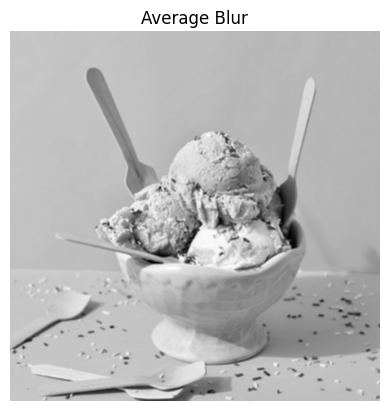

In [12]:
gray1=rgb_to_gray(img1_rgb)
avg_gray=average_blur_gray(gray1, 5)
plt.imshow(avg_gray, cmap='gray')
plt.axis("off")
plt.title("Average Blur")
plt.show()

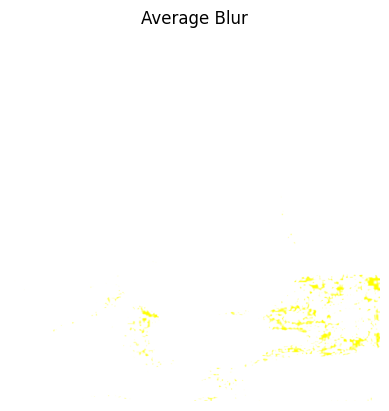

In [13]:
avg_rgb=average_blur_rgb(img1_rgb, 5)
plt.imshow(avg_rgb)
plt.axis("off")
plt.title("Average Blur")
plt.show()

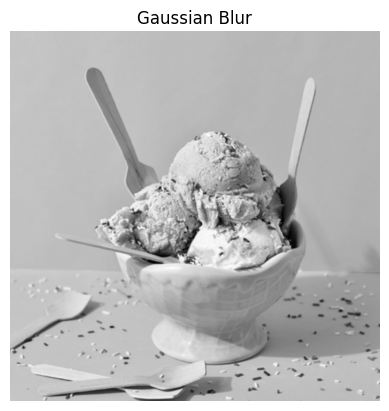

In [14]:
gaussian_k=gaussian_kernel(5, 1)
img_blur_gaussian=gaussian_blur_gray(gray1, 5, 1)
plt.imshow(img_blur_gaussian, cmap='gray')
plt.axis("off")
plt.title("Gaussian Blur")
plt.show()

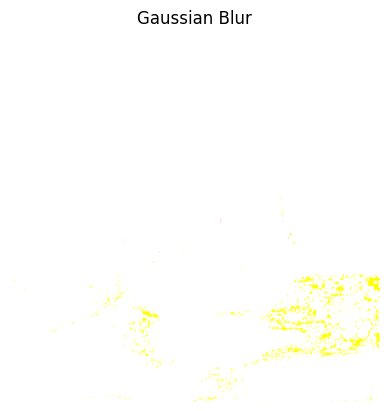

In [15]:
rgb_k=gaussian_kernel(5, 1)
img_blur_rgb=gaussian_blur_rgb(img1_rgb, 5, 1)
plt.imshow(img_blur_rgb)
plt.axis("off")
plt.title("Gaussian Blur")
plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [19]:
sobel_x = np.array([[-1, 0,  1],
                    [-2, 0,  2],
                    [-1, 0,  1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)
Gx = convolve(gray1, sobel_x)
Gy = convolve(gray1, sobel_y)
grad_mag=np.sqrt(Gx**2 + Gy**2)
grad_mag = (grad_mag/grad_mag.max()) * 255
grad_mag = grad_mag.astype(np.uint8)

In [20]:
threshold=100
edge_bin=np.zeros_like(grad_mag, dtype=np.uint8)
edge_bin[grad_mag>=threshold]=255

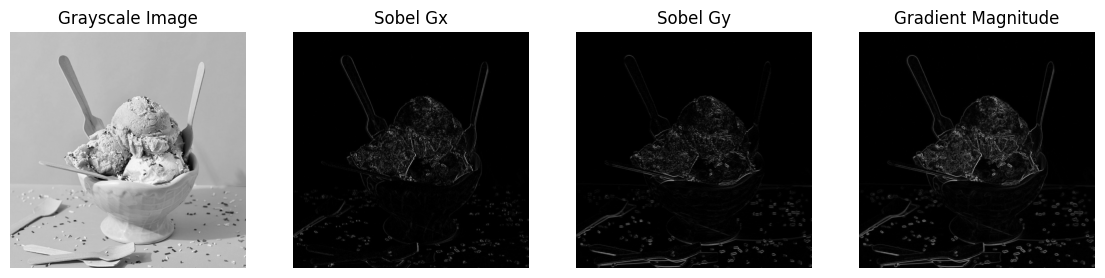

In [24]:
plt.figure(figsize=(14,6))

plt.subplot(1,4,1)
plt.imshow(gray1, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(np.abs(Gx), cmap='gray')
plt.title("Sobel Gx")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(np.abs(Gy), cmap='gray')
plt.title("Sobel Gy")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(grad_mag, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [28]:
laplacian_kernel = np.array([[0,  1, 0],
                                [1, -4, 1],
                                [0,  1, 0]], dtype=np.float32)

alpha = 1.0
lap_np = convolve(gray1, laplacian_kernel)
sharp_np_f = gray1 - lap_np * alpha
sharp_np = np.clip(sharp_np_f, 0, 255).astype(np.uint8)

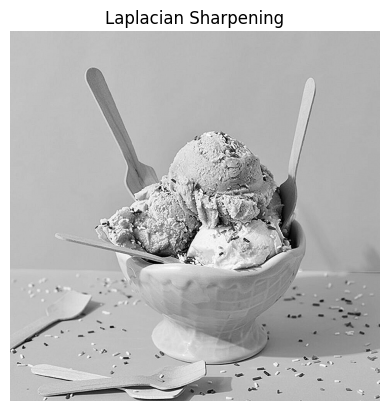

In [29]:
plt.imshow(sharp_np, cmap='gray')
plt.axis("off")
plt.title("Laplacian Sharpening")
plt.show()

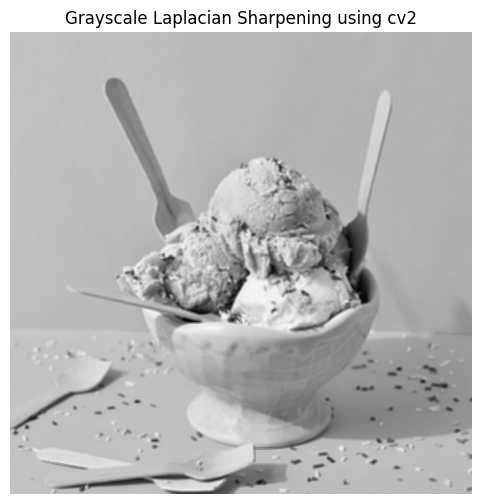

In [30]:
import cv2
lap_cv = cv2.Laplacian(gray1, cv2.CV_32F)

sharp_cv = np.clip(gray1 + lap_cv, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(sharp_cv, cmap='gray')
plt.title("Grayscale Laplacian Sharpening using cv2")
plt.axis("off")
plt.show()

In [31]:
gk=gaussian_kernel(7, 1.5)
blurred = convolve(gray1, gk)
mask = gray1 - blurred
alpha = 1.0
sharp = gray1 + alpha * mask
blurred_u8 = np.clip(blurred, 0, 255).astype(np.uint8)
sharp_u8 = np.clip(sharp, 0, 255).astype(np.uint8)

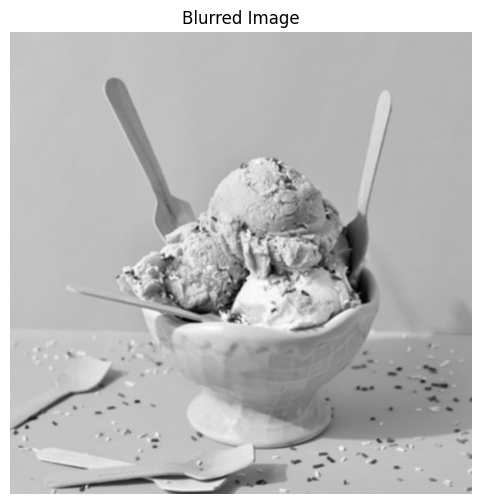

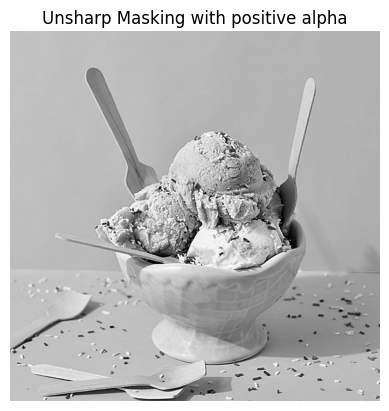

In [35]:
plt.figure(figsize=(14,6))
plt.imshow(blurred_u8, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")
plt.show()
plt.imshow(sharp_u8, cmap='gray')
plt.title("Unsharp Masking with positive alpha")
plt.axis("off")
plt.show()

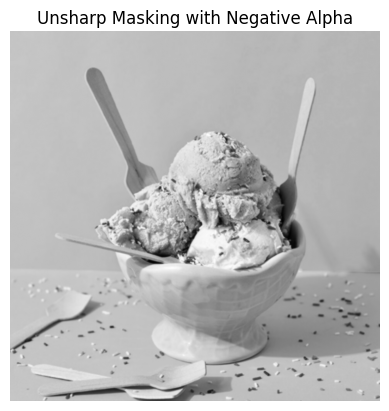

In [33]:
alpha_neg=-0.7
sharp_neg = gray1 + alpha_neg * mask
sharp_neg_u8 = np.clip(sharp_neg, 0, 255).astype(np.uint8)
plt.imshow(sharp_neg_u8, cmap='gray')
plt.title("Unsharp Masking with Negative Alpha")
plt.axis("off")
plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [36]:
def mag_spectrum(img_gray):
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(1+ np.abs(fshift))
    return magnitude_spectrum

In [37]:
mag_original=mag_spectrum(gray1)
mag_blurred=mag_spectrum(blurred_u8)
mag_sharp=mag_spectrum(sharp_u8)

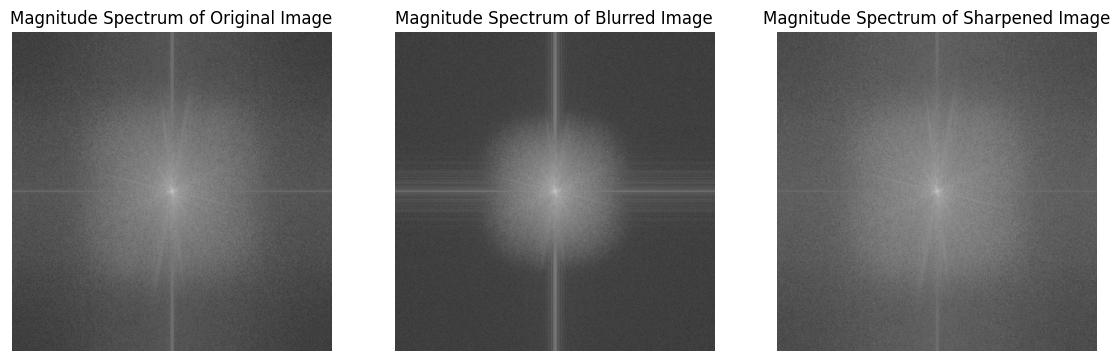

In [38]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.imshow(mag_original, cmap='gray')
plt.title("Magnitude Spectrum of Original Image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(mag_blurred, cmap='gray')
plt.title("Magnitude Spectrum of Blurred Image")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(mag_sharp, cmap='gray')
plt.title("Magnitude Spectrum of Sharpened Image")
plt.axis("off")
plt.show()

1. In the magnitude spectrum, the center represents low-frequency components, which correspond to slow intensity changes and smooth regions in the image. The outer areas, especially towards the corners, represent high-frequency components, which are associated with edges, fine textures, and noise.

2. Gaussian blur acts as a low-pass filter (LPF). After applying Gaussian blur, the magnitude spectrum becomes brighter near the center and darker near the edges or corners. This indicates that high frequencies are suppressed while low frequencies are retained, which is why the resulting image appears smoother.

3. Unsharp masking boosts high-frequency components and therefore acts like a high-pass frequency enhancement. The mask defined as mask = img − blurred contains mostly edges and high-frequency details. When the sharpened image is computed as sharp = img + alpha × mask, these high frequencies are amplified. As the value of alpha increases, the outer regions of the magnitude spectrum become relatively brighter, indicating an increase in high-frequency energy, and the edges in the spatial image appear sharper.

4. When playing with parameters, a larger sigma or larger kernel size in the Gaussian filter results in stronger blurring, which makes the high-frequency regions in the blur spectrum even darker. Increasing alpha leads to stronger sharpening, making the high-frequency regions in the unsharp masking spectrum brighter. Using a negative alpha subtracts the high-frequency mask, causing extra smoothing that behaves more like a low-pass filter, where the spectrum appears brighter at the center and darker towards the outer regions.

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

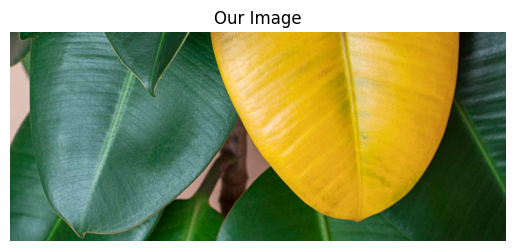

In [39]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

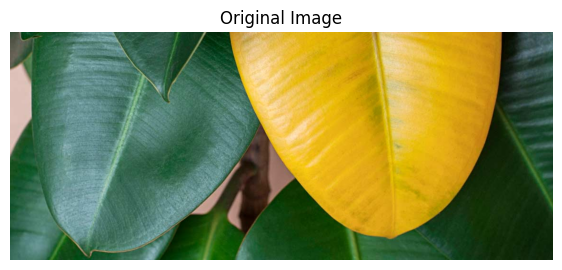

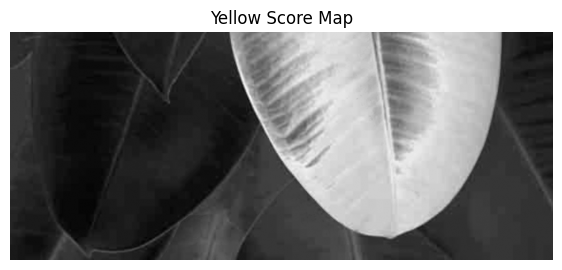

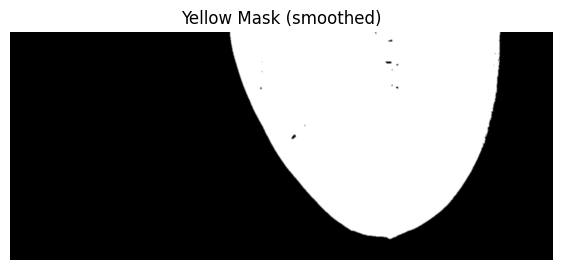

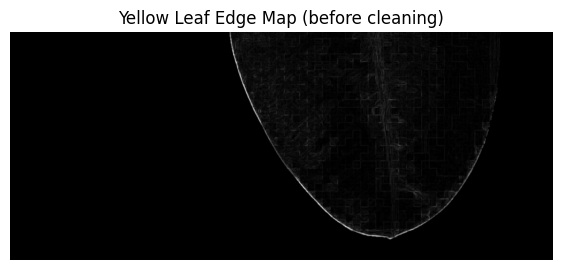

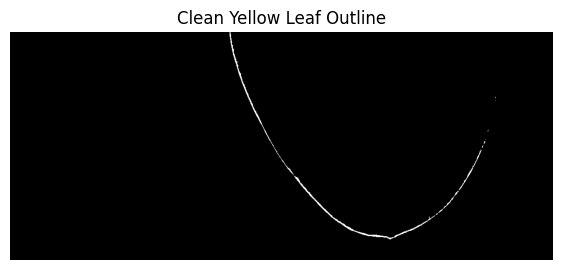

In [43]:
def normalize_0_255(x):
    x = x.astype(np.float32)
    mn, mx = x.min(), x.max()
    if mx - mn < 1e-8:
        return np.zeros_like(x, dtype=np.uint8)
    return ((x - mn) / (mx - mn) * 255.0).astype(np.uint8)

img = img_part5.astype(np.float32)  # RGB, 0-255

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

yellow_score = 0.5 * (R + G) - B

yellow_mask = ((yellow_score > 60) & (R > 120) & (G > 120)).astype(np.float32)

avg3 = np.ones((3, 3), dtype=np.float32) / 9.0
yellow_mask_smooth = convolve(yellow_mask, avg3)

RG = R - G

Kx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]], dtype=np.float32)

Ky = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]], dtype=np.float32)

Rx = convolve(R, Kx)
Ry = convolve(R, Ky)
grad_R = np.sqrt(Rx**2 + Ry**2)

RGx = convolve(RG, Kx)
RGy = convolve(RG, Ky)
grad_RG = np.sqrt(RGx**2 + RGy**2)


edge_response = 0.4 * grad_R + 1.0 * grad_RG

edge_yellow = edge_response * yellow_mask_smooth

edge_map = normalize_0_255(edge_yellow)

thresh = 60
edge_bin = (edge_map >= thresh).astype(np.uint8) * 255

mx = convolve(yellow_mask_smooth, Kx)
my = convolve(yellow_mask_smooth, Ky)
mask_boundary = (np.sqrt(mx**2 + my**2) > 0.05).astype(np.uint8)

thick = np.ones((5,5), np.float32)
boundary_thick = (convolve(mask_boundary.astype(np.float32), thick) > 0).astype(np.uint8)

clean_outline = edge_bin * boundary_thick


plt.figure(figsize=(7,4))
plt.imshow(img_part5.astype(np.uint8))
plt.title("Original Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(7,4))
plt.imshow(normalize_0_255(yellow_score), cmap="gray")
plt.title("Yellow Score Map")
plt.axis("off")
plt.show()

plt.figure(figsize=(7,4))
plt.imshow(yellow_mask_smooth, cmap="gray")
plt.title("Yellow Mask (smoothed)")
plt.axis("off")
plt.show()

plt.figure(figsize=(7,4))
plt.imshow(edge_map, cmap="gray")
plt.title("Yellow Leaf Edge Map (before cleaning)")
plt.axis("off")
plt.show()

plt.figure(figsize=(7,4))
plt.imshow(clean_outline, cmap="gray")
plt.title("Clean Yellow Leaf Outline")
plt.axis("off")
plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
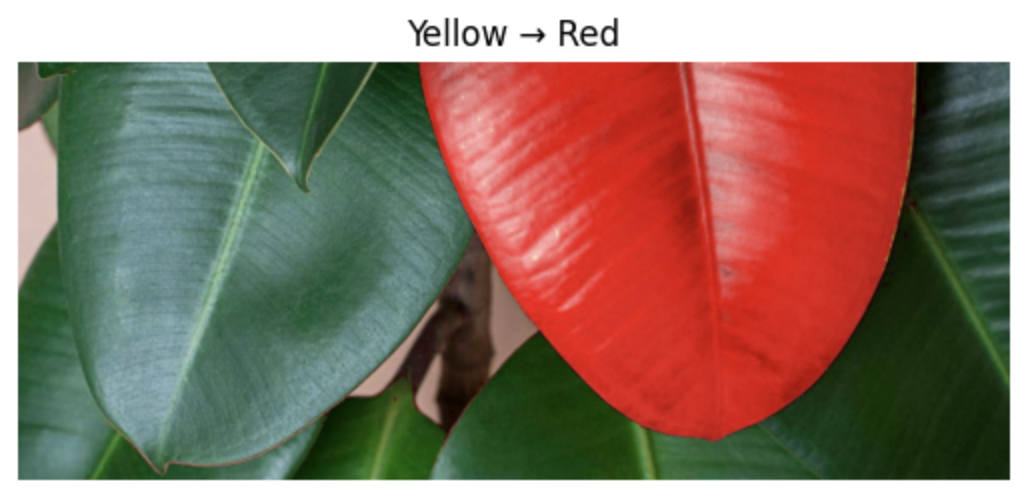

Also, we can change to a less brighter colour
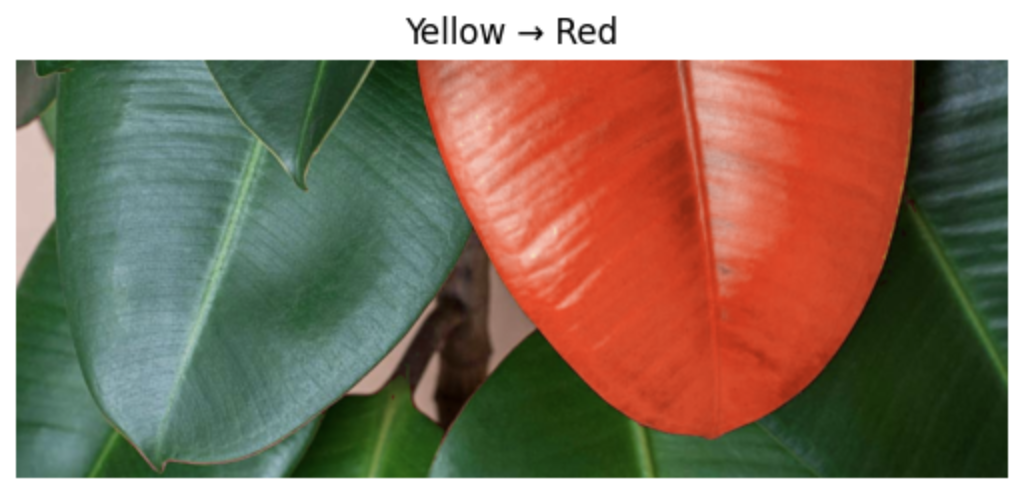

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.